<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
  <img src="https://francia.unam.mx/wp-content/uploads/2021/10/Logo-UNAM-Azul-Landscape.png" alt="UNAM" width="225" height="125">
  <img src="https://mcdonaldinstitute.ca/wp-content/uploads/2018/05/PI-logo-2017-Black-1280x424.png.webp" alt="Perimeter" width="200" height="100">
  <img src="https://swanseauniversity.cloud.panopto.eu/Panopto/ContentCache/637582254009215017/_branding/f80a49ed-5120-415e-89fe-ab8900ad7d40/637582253354333331_largelogo.png" alt="Swansea" width="225" height="125">
</div>


<h1 align="center">
Gravitational Waves from Hyperbolic Encounter of <br>
Primordial Black Holes in Dwarf Galaxies
</h1>

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
 <img src= "https://tadeodaguilar.netlify.app/project/pytorch/featured_hu5e8d079b00a124ce2d95e415b65e7659_32709_2bc9360503bcbcbfe707734df06983d9.webp" alt="Herichical" width="200" height="100">
</div>

<h3 align="center">
Tadeo D. Gómez-Aguilar $^{a,\dagger}$, Encieh Erfani $^{b}$ and Nayeli Marisol Jiménez Cruz $^{c}$
</h3>

#### $^{a}$Instituto de Ciencias Físicas, Universidad Nacional Autónoma de México, 62210, Cuernavaca, Morelos, México. $^{b}$Perimeter Institute for Theoretical Physics, Waterloo, ON N2L 2Y5, Canada. $^{c}$Physics Department, Swansea University, SA28PP, United Kingdom.


**Abstract**
<div style="background-color: #ffe4e1; padding: 10px;">
We investigate the Stochastic Gravitational Wave Background (SGWB) generated by Close Hyperbolic Encounters (CHEs) of Primordial Black Holes (PBHs) within dark matter-dominated dwarf galaxies. Building upon our previous work, this study incorporates the full hierarchical merger history of PBHs to evaluate their cumulative contribution to the SGWB. Our framework identifies the conditions under which gravitational waves from CHEs
and successive PBH mergers become significant components of the observable SGWB, and allows for a direct comparison with signals from standard PBH mergers. We determine the parameter space in which these signals may be detected by next-generation gravitational wave observatories, including the Einstein Telescope, LISA, Pulsar Timing Arrays (PTAs), and the Square Kilometre Array (SKA). Furthermore, we present numerical criteria that define the validity range of our analytical models.
</div>


**Corresponse author:**
[tadeo.dga@icf.unam.mx](mailto:tadeo.dga@icf.unam.mx)$^{\dagger}$

<h3 align="center">
Code writed by Tadeo D.
</h3>

<h4 align="center">
$M_{\rm PBH} = 10 M_{\odot}$
</h4>
    
    
<h5 align="right">
Dedicated to Elizabeth América Flores Frías.
</h5>

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u
from astropy import constants as cte0

In [2]:
# --- Constantes ---
c = 299792458 # m/s
c_ast = 299792.458 # km/s
G = 6.6743e-11 # m^3 / (kg s^2)
G_ast = 4.517103049894964e-30 # pc^3 / (s^2 solMass)

In [3]:
# Parámetros del cúmulo
M_DM_cluster = 1e5
M_PBH = 10
N_PBH_i_Msun = M_DM_cluster / (2 * M_PBH)
N_PBH_j_Msun = M_DM_cluster / (2 * M_PBH)
N_PBH_total = 2 * N_PBH_i_Msun
R_cluster = 1.096132

# Radios de evaluación
r_values_pc = np.linspace(0.1, R_cluster, 10)

In [4]:
print("BOUNDARY CONDITIONS TO CLUSTER")
print(f"Number of PBHs into cluster: {N_PBH_total:.0f} of {M_PBH} Solar Masses")
print(f"Cluster radius (parsecs): {R_cluster:.1f}")

BOUNDARY CONDITIONS TO CLUSTER
Number of PBHs into cluster: 10000 of 10 Solar Masses
Cluster radius (parsecs): 1.1


radius (pc)    n_pbh(r)
0.10           1776
0.21           1656
0.32           1475
0.43           1263
0.54           1048
0.65           848 
0.76           673 
0.87           529 
0.99           412 
1.10           320 


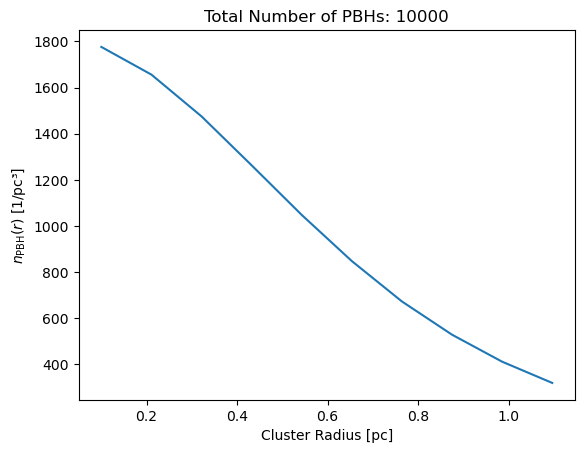

In [5]:
# --- Funciones físicas ---
def rho(r):
    factor = (3 * M_DM_cluster) / (4 * np.pi * R_cluster**3)
    shape = 1 + (r / R_cluster)**2
    return factor * shape**(-2.5)

def n_pbh(r, M_pbh):
    return (rho(r) / M_pbh)

n_PBH_r = np.array([
    round(n_pbh(r, M_PBH))
    for r in r_values_pc
])
n_total = np.sum(n_PBH_r)

# Imprimir
print(f"{'radius (pc)':<15}{'n_pbh(r)'}")
print("=" * 24)
for r, n in zip(r_values_pc, n_PBH_r):
    print(f"{r:<15.2f}{n:<4}")

plt.plot(r_values_pc, n_PBH_r)
plt.xlabel("Cluster Radius [pc]")
plt.ylabel("$n_\\mathrm{PBH}(r)$ [1/pc³]")
plt.title(f"Total Number of PBHs: {int(n_total)}")
plt.show()

In [6]:
def phi(r, M_cluster):
    phi_r = ((G_ast * M_cluster / R_cluster) * (1 + (r / R_cluster)**2)**(-0.5))
    return phi_r * 9.5214e26 # km^2/s^2

def f_E(E, N_pbh, M_cluster):
    E = E / 9.5214e26
    num = 24 * np.sqrt(2) * N_pbh * R_cluster**2 * E**(3.5)
    denom = 7 * np.pi**3 * G_ast**5 * M_cluster**5
    return (num / denom) * 3.404e-41

def integrand(E_val, r, N_pbh, M_cluster):
    phi_val = phi(r, M_cluster)
    delta_E = 2 * (phi_val - E_val)
    return f_E(E_val, N_pbh, M_cluster) * delta_E**1.5

def mean_square_velocity(r, M_cluster, N_pbh, M_pbh):
    n_r = (rho(r) / M_pbh)
    if n_r == 0:
        return 0.0
    phi_r = phi(r, M_cluster)
    integral, _ = spi.quad(integrand, 0, phi_r, args=(r, N_pbh, M_cluster))
    return np.sqrt((4 * np.pi / n_r) * integral)

In [7]:
v_mean_values = np.array([
    mean_square_velocity(r, M_DM_cluster, N_PBH_total, M_PBH)
    for r in r_values_pc
])

for r, v in zip(r_values_pc, v_mean_values):
    print(f"r = {r:.2f},  v_rms = {v:.3f}")

v_0 = np.mean(v_mean_values) #(u.km / u.s)

print(f"\n v0 = {v_0:.3f}")

r = 0.10,  v_rms = 13.978
r = 0.21,  v_rms = 13.881
r = 0.32,  v_rms = 13.721
r = 0.43,  v_rms = 13.511
r = 0.54,  v_rms = 13.260
r = 0.65,  v_rms = 12.982
r = 0.76,  v_rms = 12.687
r = 0.87,  v_rms = 12.384
r = 0.99,  v_rms = 12.079
r = 1.10,  v_rms = 11.779

 v0 = 13.026


In [8]:
km_to_pc = 1 / 3.085677581e13 
# --- Secciones eficaces ---
def sigma_BPBH(m1, m2, v_i, v_j):
    G_astro = G_ast
    c_astro = c_ast
    prefactor = (340 * np.pi / 3)**(2/7)
    num = np.pi * prefactor * G_astro**2 * (m1 + m2)**(10/7) * (m1 * m2)**(2/7)
    if v_i == v_j:
        denom = c_astro**(10/7) * np.abs(v_0)**(18/7)
    else:
        denom = c_astro**(10/7) * (np.abs(v_i - v_j))**(18/7)
    return (num / denom) * (3.085677581e13)**4

def sigma_CHES(m1, m2, v_i, v_j):
    G_astro = G_ast
    e = 1.000001
    if v_i == v_j:
        b = (G_astro * (m1 + m2) / v_i**2)
    else:
        b = (G_astro * (m1 + m2) / (np.abs(v_i - v_j))**2)
    b = b / (3.085677581e13**-2)
    return np.pi * b**2 * (e**2 - 1)

In [9]:
# --- Integral I ---
def integrand_I(r_i, r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster):
    if M_pbh_i == M_pbh_j:
        n_i = n_pbh(r_i, M_pbh_i) / 2
        n_j = n_i
        v_i = mean_square_velocity(r_i, M_cluster, 2*N_pbh_i, M_pbh_i) * km_to_pc
        v_j = v_i
    else:
        n_i = n_pbh(r_i, M_pbh_i)
        v_i = mean_square_velocity(r_i, M_cluster, N_pbh_i, M_pbh_i) * km_to_pc
        v_j = mean_square_velocity(r_j, M_cluster, N_pbh_j, M_pbh_j) * km_to_pc
    term = (v_j + v_i)**(3/7) - abs(v_j - v_i)**(3/7)
    return r_i**2 * (n_i / v_i) * term

def I_rj(r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster):
    args = (r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster)
    integral, _ = spi.quad(integrand_I, 0.1 * R_cluster, R_cluster, args=args)
    return integral

I_values = np.array([I_rj(r_j, N_PBH_i_Msun, M_PBH, N_PBH_j_Msun, M_PBH, M_DM_cluster) for r_j in r_values_pc])
coeffs = np.polyfit(r_values_pc, I_values, 3)

In [10]:
# --- Gamma ---
def Gamma_rj(r_j, N_pbh_j, M_pbh_j, N_pbh_i, M_pbh_i, M_cluster):
    n_j = n_pbh(r_j, M_pbh_j)
    v_j = mean_square_velocity(r_j, M_cluster, N_pbh_j, M_pbh_j) * km_to_pc
    v_i = mean_square_velocity(r_j, M_cluster, N_pbh_i, M_pbh_i) * km_to_pc
    sigma_B = sigma_BPBH(M_pbh_i, M_pbh_j, v_i/km_to_pc, v_j/km_to_pc)
    sigma_C = sigma_CHES(M_pbh_i, M_pbh_j, v_i/km_to_pc, v_j/km_to_pc)
    if v_j == 0 or n_j == 0:
        return 0, 0
    I_val = np.polyval(coeffs, r_j)
    if v_i == v_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, N_pbh_i*2, M_pbh_i)
            for r in r_values_pc]
        )
        v_0 = np.mean(v_mean_values) * km_to_pc
        gamma_BBH = (v_0)**(18/7) * (14 * np.pi / 3) * sigma_B * (n_j / v_j) * I_val
        gamma_CHE = (v_0)**(18/7) * (14 * np.pi / 3) * sigma_C * (n_j / v_j) * I_val
    else:
        gamma_BBH = (np.abs(v_i - v_j))**(18/7) * (14 * np.pi / 3) * sigma_B * (n_j / v_j) * I_val
        gamma_CHE = (np.abs(v_i - v_j))**(18/7) * (14 * np.pi / 3) * sigma_C * (n_j / v_j) * I_val
    return gamma_BBH, gamma_CHE

r = 0.100 pc | Gamma_BBH = 4.730e-18 [1/s] | Gamma_CHE = 1.348e-17 [1/s]
r = 0.211 pc | Gamma_BBH = 4.441e-18 [1/s] | Gamma_CHE = 1.302e-17 [1/s]
r = 0.321 pc | Gamma_BBH = 4.003e-18 [1/s] | Gamma_CHE = 1.229e-17 [1/s]
r = 0.432 pc | Gamma_BBH = 3.482e-18 [1/s] | Gamma_CHE = 1.137e-17 [1/s]
r = 0.543 pc | Gamma_BBH = 2.942e-18 [1/s] | Gamma_CHE = 1.036e-17 [1/s]
r = 0.653 pc | Gamma_BBH = 2.431e-18 [1/s] | Gamma_CHE = 9.317e-18 [1/s]
r = 0.764 pc | Gamma_BBH = 1.977e-18 [1/s] | Gamma_CHE = 8.305e-18 [1/s]
r = 0.875 pc | Gamma_BBH = 1.590e-18 [1/s] | Gamma_CHE = 7.359e-18 [1/s]
r = 0.985 pc | Gamma_BBH = 1.271e-18 [1/s] | Gamma_CHE = 6.498e-18 [1/s]
r = 1.096 pc | Gamma_BBH = 1.013e-18 [1/s] | Gamma_CHE = 5.729e-18 [1/s]


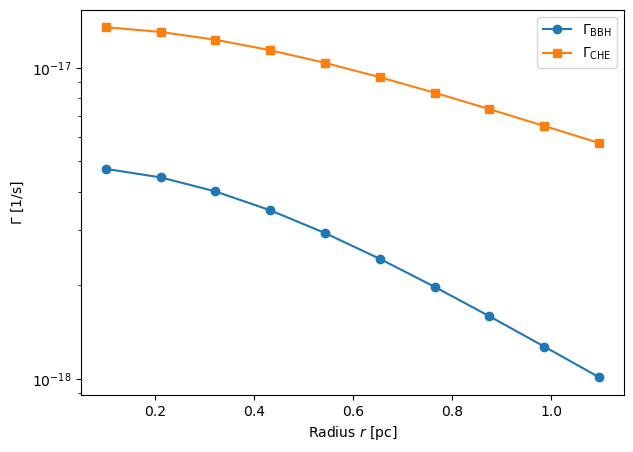

In [11]:
Gamma_BBH_values = np.array([
    Gamma_rj(r_j, N_PBH_j_Msun, M_PBH, N_PBH_i_Msun, M_PBH, M_DM_cluster)[0]
    for r_j in r_values_pc
])

Gamma_CHES_values = np.array([
    Gamma_rj(r_j, N_PBH_j_Msun, M_PBH, N_PBH_i_Msun, M_PBH, M_DM_cluster)[1]
    for r_j in r_values_pc
])

for r, g_bbh, g_che in zip(r_values_pc, Gamma_BBH_values, Gamma_CHES_values):
    print(f"r = {r:.3f} pc | Gamma_BBH = {g_bbh:.3e} [1/s] | Gamma_CHE = {g_che:.3e} [1/s]")

# Graficar
plt.figure(figsize=(7,5))
plt.plot(r_values_pc, Gamma_BBH_values, 'o-', label=r'$\Gamma_{\mathrm{BBH}}$')
plt.plot(r_values_pc, Gamma_CHES_values, 's-', label=r'$\Gamma_{\mathrm{CHE}}$')
plt.xlabel("Radius $r$ [pc]")
plt.ylabel(r"$\Gamma$ [1/s]")
plt.yscale('log')
plt.legend()
plt.show()

In [12]:
# Edad del universo
age_universe_Gyr = 13.786885302009708  # Gyr
age_universe_yr = age_universe_Gyr * 1e9  # yr

# Conversión de tasas a unidades por año
seconds_per_year = 3.15576e7  # s/yr
Gamma_BBH_values_yr = Gamma_BBH_values * seconds_per_year
Gamma_CHES_values_yr = Gamma_CHES_values * seconds_per_year

time_first_merger_yr =  1/Gamma_BBH_values_yr
time_first_merger_Gyr = time_first_merger_yr / 1e9

time_first_ches_yr = 1/Gamma_CHES_values_yr
time_first_ches_Gyr = time_first_ches_yr / 1e9

In [13]:
print(f"{'Gamma_BPBH(yr^-1)':<20}{'Time to 1st merger (Gyr)':<28}{'Gamma_CHES(yr^-1)':<20}{'Time to 1st CHEs (yr)':<28}")
print("=" * 90)
for i in range(len(r_values_pc)):
    print(f"{Gamma_BBH_values_yr[i]:<20.3e}{time_first_merger_Gyr[i]:<28.3e}{Gamma_CHES_values_yr[i]:<20.3e}{time_first_ches_yr[i]:.3e}")


time_z_20 = cosmo.age(20).to(u.yr).value
delta_t_merger = np.min(time_first_merger_yr)
print("\nTime necessary to all PBHs\nfrom first radius coallesences:", delta_t_merger/1e9, "Gyr")

delta_t_CHEs = np.min(time_first_ches_yr)# + time_z_20
print("\nTime necessary to maximum probability\nto produces CHEs in the first shell: ",delta_t_CHEs,"years")

Gamma_BPBH(yr^-1)   Time to 1st merger (Gyr)    Gamma_CHES(yr^-1)   Time to 1st CHEs (yr)       
1.493e-10           6.699e+00                   4.255e-10           2.350e+09
1.402e-10           7.135e+00                   4.109e-10           2.434e+09
1.263e-10           7.916e+00                   3.879e-10           2.578e+09
1.099e-10           9.100e+00                   3.590e-10           2.786e+09
9.286e-11           1.077e+01                   3.269e-10           3.059e+09
7.673e-11           1.303e+01                   2.940e-10           3.401e+09
6.238e-11           1.603e+01                   2.621e-10           3.815e+09
5.018e-11           1.993e+01                   2.322e-10           4.306e+09
4.011e-11           2.493e+01                   2.051e-10           4.877e+09
3.197e-11           3.128e+01                   1.808e-10           5.531e+09

Time necessary to all PBHs
from first radius coallesences: 6.699484879356586 Gyr

Time necessary to maximum probability
to

In [14]:
# --- Constantes ---
G_SI = 6.67430e-11             # m³ / (kg·s²)
c_SI = 2.99792458e8            # m/s
Msun_kg = 1.98847e30           # kg
pc_m = 3.085677581e16          # m
AU_m = 1.495978707e11          # m
erg_in_joule = 1e-7            # 1 erg = 1e-7 J
AU_pc = AU_m / pc_m            # 1 AU in parsecs
seconds_per_year = 3.15576e7   # s/yr

In [15]:
def R_Swarzschild(m):
    return (2 * G_SI * m * Msun_kg) / c_SI**2 / pc_m

# --- Energía radiada BBH ---
def E_rad_GW(m1, m2):
    # --- Parámetros de separación inicial y final ---
    if m1<m2:
        a0 = (2 * G_SI * m2 * Msun_kg) / c_SI**2 / pc_m   # pc
    if m2<m1:
        a0 = (2 * G_SI * m1 * Msun_kg) / c_SI**2 / pc_m   # pc
    if m1==m2:
        a0 = (2 * G_SI * m1 * Msun_kg) / c_SI**2 / pc_m   # pc
    a1 = 0.01 * AU_pc  # pc
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg

    def integrand(a_pc):
        a_m = a_pc * pc_m
        return (G_SI * m1_kg * m2_kg) / (2 * a_m**2) * pc_m  # J

    integral, _ = spi.quad(integrand, a0, a1)
    return integral / erg_in_joule  # erg

# --- Masa final tras fusión BBH ---
def final_mass_GW(m1, m2):
    E_rad = E_rad_GW(m1, m2) * erg_in_joule  # J
    m_total = (m1 + m2) * Msun_kg
    m_final = m_total - E_rad / c_SI**2
    return m_final / Msun_kg  # M_sun

# --- Radio mínimo para CHES (en parsecs) ---
def r_min_CHES(m1, m2, K=1e-6):
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg
    R_sch = lambda m: 2 * G_SI * m / c_SI**2  # m
    #return K * (R_sch(m1_kg) + R_sch(m2_kg)) / pc_m  # pc
    return (G_SI * (m1_kg + m2_kg) / (v_0*1e3)**2) * K / pc_m

# --- Energía radiada CHES ---
def E_rad_CHES(m1, m2, e=1.000001, K=1e-6):
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg
    M = m1_kg + m2_kg
    r_min_m = r_min_CHES(m1, m2, K) * pc_m  # m

    # f(e) factor (Eq. 18)
    term1 = 24 * np.arccos(-1 / e) * (1 + (73/24)*e**2 + (37/96)*e**4)
    term2 = np.sqrt(e**2 - 1) * (301/6 + (673/12)*e**2)
    f_e = (1 / (1 + e)**(7/2)) * (term1 + term2)

    E_rad = (8/15) * G_SI**(3.5) * np.sqrt(M) * m1_kg**2 * m2_kg**2 / (c_SI**5 * r_min_m**(3.5)) * f_e
    return E_rad / erg_in_joule  # erg

In [16]:
# --- Evaluación de energías y masa final ---
E_BBH_event = E_rad_GW(M_PBH, M_PBH)             # erg
E_CHES_event = E_rad_CHES(M_PBH, M_PBH)                  # erg
final_masses = final_mass_GW(M_PBH, M_PBH)       # M_sun

In [17]:
time_values_interval_0 = np.linspace(1e3, delta_t_CHEs, 300) #Years
time_values_interval_0 = np.insert(time_values_interval_0, 0, 0.0)
time_values_interval_1 = np.linspace(delta_t_CHEs, 3.3e+09, 500) #Years
time_values_interval = np.concatenate((time_values_interval_0, time_values_interval_1[1:]))

t_yr=[]
redshift_evaluated_0 = []
for t in time_values_interval:
    t_yr.append(t + time_z_20)
    t_gyr = (t + time_z_20) / 1e9  # Gyr
    z = z_at_value(cosmo.age, t_gyr * u.Gyr, zmax=22).value
    redshift_evaluated_0.append(z)

time_period_1_yr = time_values_interval[799] #yr
time_period_1_Gyr = time_values_interval[799]/1e9 #Gyr
time_period_seconds = ((time_period_1_yr * u.yr).to(u.s)).value
print(time_period_1_Gyr, time_period_seconds, redshift_evaluated_0[799])

3.3 1.0414008e+17 1.8799821607349443


In [18]:
N_CHES_0 = np.zeros_like(time_values_interval)
E_dot_CHES_0 = np.zeros_like(time_values_interval)
N_BBH_0 = np.zeros_like(time_values_interval)
E_dot_BBH_0 = np.zeros_like(time_values_interval)
BPBH_ALL_PERIOD = []
idx_first_all = None
first_bbh_idx = None
Probabilidad_total = np.zeros_like(time_values_interval)
Probabilidad_total_bbh = np.zeros_like(time_values_interval)
for i, t in enumerate(time_values_interval):
    # CHEs
    Prob_CHES_emit = Gamma_CHES_values_yr * t
    Proptot = np.sum(Prob_CHES_emit)
    Probabilidad_total[i] = Proptot
    #print("--> elapsep time(yr):",t)
    #print("Prob_CHES_r:",Prob_CHES_emit, "Proptot =", Proptot)
    N_CHES = np.round(Prob_CHES_emit * (n_PBH_r / 2))
    #print(N_CHES)
    if np.any(N_CHES == 0):
        N_CHES = np.zeros_like(Prob_CHES_emit)
    #print(N_CHES)
    if np.all(N_CHES > 0) and idx_first_all is None:
        idx_first_all = i
        print("Time necesary to obtain 1 CHEs in all radius of the Cluster:", t, "years")
        print("Time necesary to obtain 1 CHEs in all radius of the Cluster:", t/1e9, "Gyr")
        print("Redshift:", z_at_value(cosmo.age, ((t + time_z_20) / 1e9) * u.Gyr, zmax=25).value)
    N_CHES_tot = np.sum(N_CHES)
    N_CHES_0[i] = N_CHES_tot
    if t==0.:
        E_dot_CHES_shell = 0.
    else:
        E_dot_CHES_shell = (N_CHES_tot * E_CHES_event)# / (t)# * 3.15576e7)
    #print(N_CHES_tot, E_dot_CHES_shell)
    E_dot_CHES_shell_tot = np.sum(E_dot_CHES_shell)
    E_dot_CHES_0[i] = E_dot_CHES_shell_tot

    # BBH
    Prob_BPBH_form = Gamma_BBH_values_yr * t
    Proptot_bbh = np.sum(Prob_BPBH_form)
    Probabilidad_total_bbh[i] = Proptot_bbh
    #print("Prob_BBH_r:",Prob_BPBH_form, "Proptot_form_bbh =", Proptot_bbh)
    N_BBH = np.where(Prob_BPBH_form * (n_PBH_r/2) > 0.95, np.round(Prob_BPBH_form * (n_PBH_r)), 0.0)
    if np.any(N_BBH == 0):
        N_BBH = np.zeros_like(Prob_BPBH_form)
    N_BBH_tot = np.sum(N_BBH)
    if first_bbh_idx is None and N_BBH_tot > 0:
        first_bbh_idx = i
        print(f"Time necesary to obtain mergers in all radius of the Cluster: {t} years")
        print(f"Time necesary to obtain mergers in all radius of the Cluster: {t/1e9} Gyr")
        print("Redshift:", z_at_value(cosmo.age, ((t + time_z_20) / 1e9) * u.Gyr, zmax=25).value)
        #print(N_BBH)
        N_BPBH_0G = N_BBH
        #print(N_BBH_tot)
    #print("Binary in every r:", N_BBH)
    N_BBH_0[i] = N_BBH_tot
    E_dot_BBH_shell = (N_BBH * E_BBH_event) #/ (t * 3.15576e7)
    E_dot_BBH_shell_tot = np.sum(E_dot_BBH_shell)
    E_dot_BBH_0[i] = E_dot_BBH_shell_tot
print("\nIf we consider a especific time to evaluated we have:")
print(N_BBH, "\nTotal number of PBHs of the first period", N_BBH_tot)
#print(t/1e9, "Gyr")
BPBH_ALL_PERIOD.append(N_BBH_tot) #Before a total time to evaluated

Time necesary to obtain 1 CHEs in all radius of the Cluster: 23578642.254324585 years
Time necesary to obtain 1 CHEs in all radius of the Cluster: 0.023578642254324586 Gyr
Redshift: 18.337211109225503
Time necesary to obtain mergers in all radius of the Cluster: 188622138.03459668 years
Time necesary to obtain mergers in all radius of the Cluster: 0.18862213803459668 Gyr
Redshift: 11.999125324142904

If we consider a especific time to evaluated we have:
[875. 766. 615. 458. 321. 215. 139.  88.  55.  34.] 
Total number of PBHs of the first period 3566.0


In [19]:
POPULATION_BPBH_BY_GENERATION = [N_BBH_tot]
EMISSION_GW_OF_BPBH = [E_dot_BBH_shell_tot]
NUMBER_OF_CHES_BY_GENERATION = [N_CHES_tot]
EMISSION_GW_OF_CHES = [E_dot_CHES_shell_tot]
PERIOD_OF_EVOLUTION_GYR = [time_period_1_Gyr]
Z_PERIOD = [redshift_evaluated_0[-1]]

print("Total number of PBHs of the first period", N_BBH_tot, "with E_GW",E_dot_BBH_shell_tot)
#print(N_BBH, "Total number of PBHs of the first period", N_BBH_tot, E_dot_BBH_shell_tot)
#print(N_CHES, "Total number of PBHs of the first period", N_CHES_tot, E_dot_CHES_shell_tot)
print("Total number of CHES of the first period", N_CHES_tot, "with E_GW", E_dot_CHES_shell_tot)
print("Duration of period (Gyr):",time_period_1_Gyr, "\nDuration of period (s):",time_period_seconds)
#print(redshift_evaluated_0[-1])

Total number of PBHs of the first period 3566.0 with E_GW 1.59321073014407e+58
Total number of CHES of the first period 5766.0 with E_GW 5.926473039235631e+49
Duration of period (Gyr): 3.3 
Duration of period (s): 1.0414008e+17


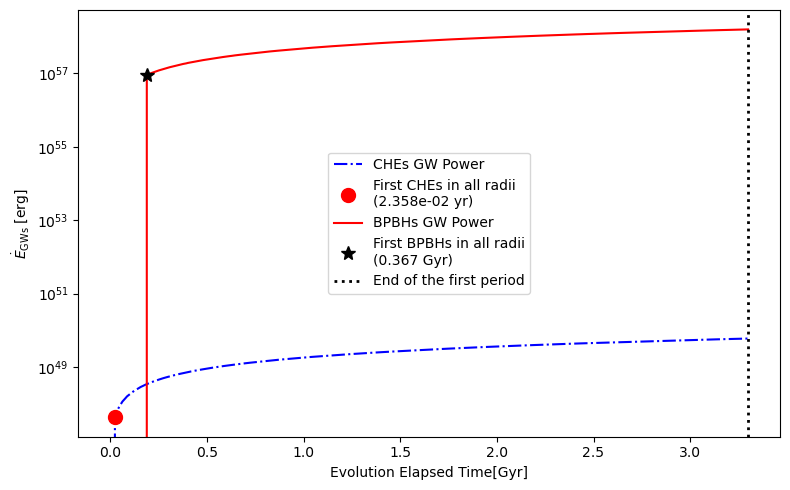

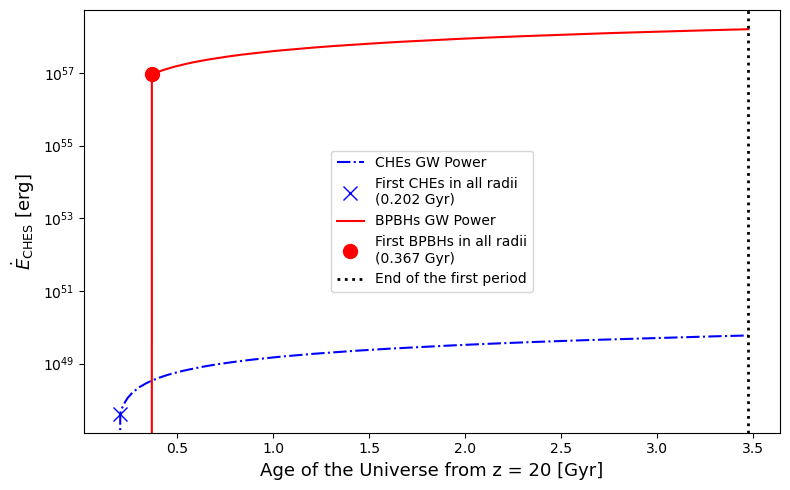

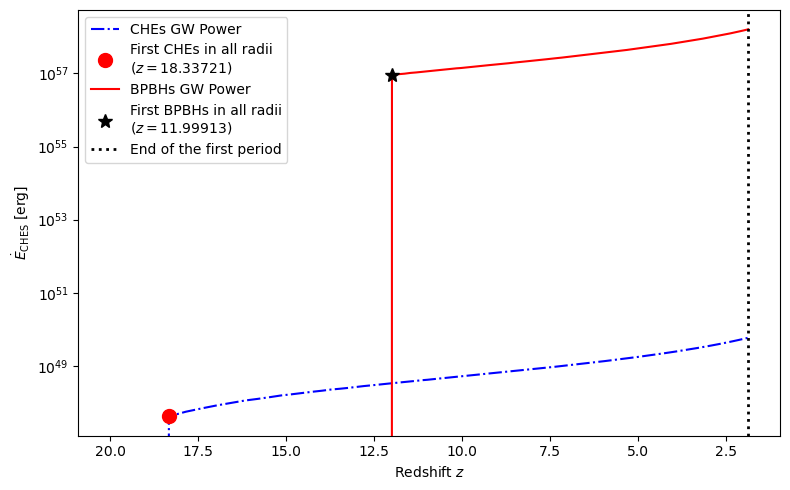

In [20]:
# Recupera los valores críticos
critical_time_yr = time_values_interval[idx_first_all]        # años
critical_time_gyr = critical_time_yr / 1e9                   # Gyr
critical_redshift = redshift_evaluated_0[idx_first_all]
critical_Edot = E_dot_CHES_0[idx_first_all]
critical_abs_age_gyr = (time_z_20 + time_values_interval[idx_first_all]) / 1e9

critical_merger_gyr = time_values_interval[first_bbh_idx]/1e9
critical_merger_redshift = redshift_evaluated_0[first_bbh_idx]
critical_merger_Edot = E_dot_BBH_0[first_bbh_idx]
critical_merger_age_gyr = (time_z_20 + time_values_interval[first_bbh_idx]) / 1e9

# --- vs tiempo evolution (en Gyr) ---
plt.figure(figsize=(8,5))
plt.plot(time_values_interval/1e9, E_dot_CHES_0, color='blue', linestyle = '-.', label='CHEs GW Power')
plt.plot(critical_time_gyr, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n({critical_time_yr/1e9:.3e} yr)')
plt.plot(time_values_interval/1e9, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_gyr, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')
plt.axvline(time_period_1_Gyr, color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Evolution Elapsed Time[Gyr]')
plt.ylabel(r'$\dot{E}_{\mathrm{GWs}}$ [erg]')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_time_evolution.pdf')
plt.show()



# --- vs edad absoluta (en Gyr) ---
plt.figure(figsize=(8,5))
plt.plot((time_z_20+time_values_interval)/1e9, E_dot_CHES_0, color='blue', linestyle = '-.', label='CHEs GW Power')
#plt.axvline(critical_abs_age_gyr, color='red', ls='--', lw=2,
#            label=f'First CHEs in all radii\n({critical_abs_age_gyr:.3f} Gyr)')
plt.plot(critical_abs_age_gyr, critical_Edot, 'x', color='blue', markersize=10, label=f'First CHEs in all radii\n({critical_abs_age_gyr:.3f} Gyr)')
plt.plot((time_z_20+time_values_interval)/1e9, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_age_gyr, critical_merger_Edot, 'o', color='red', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')
plt.axvline(((time_z_20+time_values_interval)/1e9)[-1], color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Age of the Universe from z = 20 [Gyr]', fontsize=13)
plt.ylabel(r'$\dot{E}_{\mathrm{CHES}}$ [erg]', fontsize=13)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_absolute_age.pdf')
plt.show()

# --- vs redshift ---
plt.figure(figsize=(8,5))
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue', linestyle = '-.',label='CHEs GW Power')
plt.plot(critical_redshift, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n($z={critical_redshift:.5f}$)')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_redshift, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n($z={critical_merger_redshift:.5f}$)')
plt.axvline(redshift_evaluated_0[-1], color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Redshift $z$')
plt.ylabel(r'$\dot{E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_redshift.pdf')
plt.show()

# Second Generation

In [21]:
#N_PBH_1G = np.sum(N_BPBH_0G) #PBHs de primera generación obtenidos de la población original N_BPBH_0G desde el primer merger
N_PBH_1G = np.sum(N_BBH/2) # Entonces N_BBH es el array de BPBHs despues del primer periodo

#print(n_PBH_r) #array inicial
#print(np.round(N_BBH/2)) #array de población 1G-17.5
#print(np.sum(N_BBH/2)) #Población_total 1G-17.5
#print(np.round(n_PBH_r - N_BBH)) #Array 0G-despues de 1era evolution
#print(np.sum(n_PBH_r - N_BBH)) #Poblacion 0G despues de 1era evolucion
M_PBH_1G = final_masses
M_PBH_0G = M_PBH 
M_1G = N_PBH_1G * M_PBH_1G 
N_PBH_0G = np.sum(n_PBH_r - N_BBH)
M_tot_0G = N_PBH_0G*M_PBH #masa total de los PBHs_0G que contribuyen a la masa total del cluster
M_DM_c_1G = M_tot_0G + M_1G #masa total del cluster para la 1G
M_LOST_GW = M_DM_cluster - M_DM_c_1G #cantidad de masa perdida por emisión de ondas gravitacionales de binarias
percent_lost_GW = (M_LOST_GW / M_DM_cluster) * 100

print(f"Number of PBHs of initial generation: {N_PBH_0G:.0f} of {M_PBH_0G:.2f} Solar Mass")
print(f"Number of PBHs of 1st generation:     {N_PBH_1G:.0f} of {M_PBH_1G:.2f} Solar Mass")
print(f"Cluster Mass after 1st generation:    {M_DM_c_1G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):       {M_LOST_GW:.4f} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW:.1f}%")

Number of PBHs of initial generation: 6434 of 10.00 Solar Mass
Number of PBHs of 1st generation:     1783 of 17.50 Solar Mass
Cluster Mass after 1st generation:    9.5543e+04 Solar Mass
Mass lost by GWs (BPBH mergers):       4457.4120 Solar Mass
Percentage of Cluster Mass Lost by GWs: 4.5%


In [22]:
M_DM_cluster = M_DM_c_1G
N_0G = np.round(n_PBH_r - N_BBH)     # PBHs remanentes de 0G por cascarón
N_1G = np.round(N_BBH/2)                     # PBHs 1G por cascarón

print(N_0G, N_1G)

# --- Definir las especies con sus arrays de número por cascarón ---
especies = [
    {"name": "0G", "N_array": N_0G, "M": M_PBH},
    {"name": "1G", "N_array": N_1G, "M": final_masses}
]

# --- Acumuladores ---
E_dot_BBH_dict = {}
E_dot_CHES_dict = {}
M_dict = {}
N_coll_BPBH_dict = {}
N_coll_CHES_dict = {}
resultados_discretos = []

delta_t_local = 2.3e9  # años

# --- Generar combinaciones (0G–0G, 0G–1G, 1G–1G) ---
combinaciones_preparadas = []
for sp_i, sp_j in combinations_with_replacement(especies, 2):
    nombre_i, N_i_array, M_i = sp_i["name"], sp_i["N_array"], sp_i["M"]
    nombre_j, N_j_array, M_j = sp_j["name"], sp_j["N_array"], sp_j["M"]

    Ni_eff = np.round(N_i_array / 2) if nombre_i == nombre_j else N_i_array.copy()
    Nj_eff = np.round(N_j_array / 2) if nombre_i == nombre_j else N_j_array.copy()

    combinaciones_preparadas.append((nombre_i, nombre_j, Ni_eff, M_i, Nj_eff, M_j))

for nombre_i, nombre_j, N_i_array, M_i, N_j_array, M_j in combinaciones_preparadas:
    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)
    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas Gamma ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Resto del bloque original ---
    mergers_total = Gamma_values_yr * age_universe_yr
    time_first_merger_yr = 1 / Gamma_values_yr
    time_first_merger_Gyr = time_first_merger_yr / 1e9

    delta_t_local = 2.3e9
    time_period_2_yr = delta_t_local

    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)
    M_dict[f"{nombre_i}-{nombre_j}"] = M_result

    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event

    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_dict[f'{nombre_i}-{nombre_j}']:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{time_first_merger_Gyr[i]:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")

    # --- Guardar resultados ---
    N_coll_BPBH_dict[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict[f"{nombre_i}-{nombre_j}"] = E_dot_CHES

    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")

    resultados_discretos.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Gamma_values_yr": Gamma_values_yr,
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES,
        "E_event_BBH": E_BBH_event,
        "E_event_CHES": E_CHES_event,
        "E_dot_BBH": E_dot_BBH,
        "E_dot_CHES": E_dot_CHES,
        "sigma_BBH": sigma_B,
        "sigma_CHES": sigma_C
    })


[901. 890. 860. 805. 727. 633. 534. 441. 357. 286.] [438. 383. 308. 229. 160. 108.  70.  44.  28.  17.]

Evaluando interacción 0G-0G...
[450. 445. 430. 402. 364. 316. 267. 220. 178. 143.] [450. 445. 430. 402. 364. 316. 267. 220. 178. 143.]
Masses interacting
M_PBH_0G: 10.00
M_PBH_0G: 10.00
Mass_final_from_0G-0G: 17.50

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      7.726e-11      1.766e-10        1.294e+01           80.0      183.0
0.21      7.254e-11      1.658e-10        1.378e+01           74.0      170.0
0.32      6.538e-11      1.495e-10        1.529e+01           65.0      148.0
0.43      5.688e-11      1.300e-10        1.758e+01           53.0      120.0
0.54      4.806e-11      1.099e-10        2.081e+01           40.0      92.0
0.65      3.971e-11      9.078e-11        2.518e+01           29.0      66.0
0.76      3.229e-11      7.381e-11        3.097e+01           20.0      45.0
0.87      2.597e-11      5.937e-11        3.850e+01  

In [23]:
for nombre_i, nombre_j, N_i_array, M_i, N_j_array, M_j in combinaciones_preparadas:
    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc

        # Tabla de velocidades
        print(f"\n{'r_j (pc)':<10}{'v_'+nombre_i+' (km/s)':<20}{'v_'+nombre_j+' (km/s)':<20}")
        print("=" * 50)
        for r, v in zip(r_values_pc, v_mean_values):
            print(f"{r:<10.3f}{v:<20.3e}{v:<20.3e}")

    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

        # Tabla de velocidades
        print(f"\n{'r_j (pc)':<10}{'v_'+nombre_i+' (km/s)':<20}{'v_'+nombre_j+' (km/s)':<20}")
        print("=" * 50)
        for r, vi, vj in zip(r_values_pc, v_i_array, v_j_array):
            print(f"{r:<10.3f}{(vi/km_to_pc):<20.3e}{(vj/km_to_pc):<20.3e}")



Evaluando interacción 0G-0G...

r_j (pc)  v_0G (km/s)         v_0G (km/s)         
0.100     1.121e+01           1.121e+01           
0.211     1.113e+01           1.113e+01           
0.321     1.100e+01           1.100e+01           
0.432     1.083e+01           1.083e+01           
0.543     1.063e+01           1.063e+01           
0.653     1.041e+01           1.041e+01           
0.764     1.017e+01           1.017e+01           
0.875     9.930e+00           9.930e+00           
0.985     9.686e+00           9.686e+00           
1.096     9.445e+00           9.445e+00           

Evaluando interacción 0G-1G...

r_j (pc)  v_0G (km/s)         v_1G (km/s)         
0.100     1.121e+01           7.813e+00           
0.211     1.113e+01           7.758e+00           
0.321     1.101e+01           7.669e+00           
0.432     1.084e+01           7.551e+00           
0.543     1.064e+01           7.411e+00           
0.653     1.041e+01           7.256e+00           
0.764     1.018e

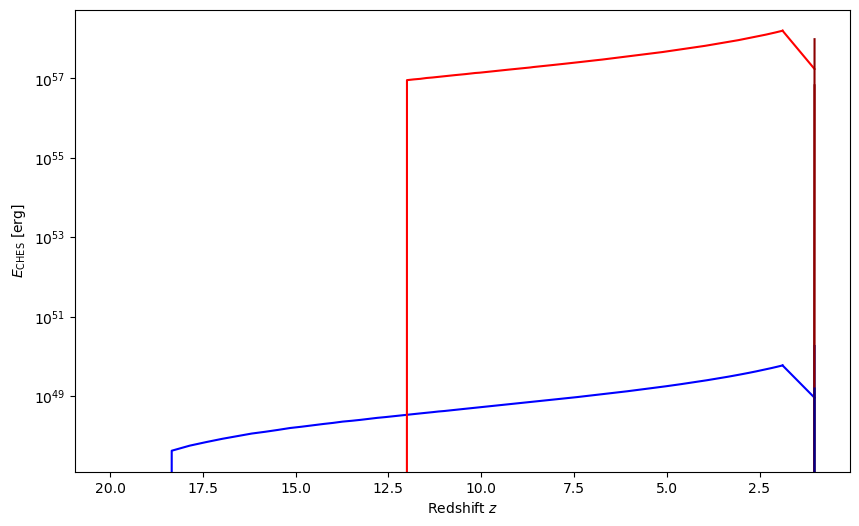

In [24]:
# --- Preparación de variables para graficar ---
time_period_2_yr = delta_t_local
time_period_2_Gyr = time_period_2_yr / 1e9
time_period_2_seconds = (((time_period_2_yr * 1e9) * u.yr).to(u.s)).value

POPULATION_BPBH_BY_GENERATION = [N_BBH_tot, np.sum(N_coll_BPBH_dict['0G-0G'])]
EMISSION_GW_OF_BPBH = [
    E_dot_BBH_shell_tot,
    np.sum(E_dot_BBH_dict['0G-0G'])
]
NUMBER_OF_CHES_BY_GENERATION = [N_CHES_tot, np.sum(N_coll_CHES_dict['0G-0G'])]
EMISSION_GW_OF_CHES = [
    E_dot_CHES_shell_tot,
    np.sum(E_dot_CHES_dict['0G-0G'])
]
PERIOD_OF_EVOLUTION_GYR = [time_period_1_Gyr, time_period_2_Gyr]

t_2nd_gyr = ((((time_period_1_Gyr + time_period_2_Gyr) * u.Gyr).to(u.yr)).value + time_z_20) / 1e9
redshift_evaluated_1 = z_at_value(cosmo.age, t_2nd_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot = [redshift_evaluated_0[-1], redshift_evaluated_1]

POPULATION_BPBH_0G1G = [0, np.sum(N_coll_BPBH_dict['0G-1G'])]
EMISSION_GW_BPBH_0G1G = [0, np.sum(E_dot_BBH_dict['0G-1G'])]
NUMBER_OF_CHES_0G1G = [0, np.sum(N_coll_CHES_dict['0G-1G'])]
EMISSION_GW_CHES_0G1G = [0, np.sum(E_dot_CHES_dict['0G-1G'])]

POPULATION_BPBH_1G1G = [0, np.sum(N_coll_BPBH_dict['1G-1G'])]
EMISSION_GW_BPBH_1G1G = [0, np.sum(E_dot_BBH_dict['1G-1G'])]
NUMBER_OF_CHES_1G1G = [0, np.sum(N_coll_CHES_dict['1G-1G'])]
EMISSION_GW_CHES_1G1G = [0, np.sum(E_dot_CHES_dict['1G-1G'])]

# --- Graficado ---
plt.figure(figsize=(10, 6))

# Periodo inicial
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red')

# Corte entre periodos
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='red')

# Segunda generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G1G, color='darkblue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G1G, color='darkblue')

# Ajustes de eje
plt.gca().invert_xaxis()
#plt.xlim([1.2, 0])
#plt.ylim([1e31, 1e33])
plt.xlabel('Redshift $z$')
plt.ylabel(r'${E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')  # Descomentar si quieres escala logarítmica
plt.show()


In [25]:
print(resultados_discretos[0]['Mass_final'])

17.500049354636


In [26]:
print(resultados_discretos[1]['Mass_final'])

25.000135725492598


In [27]:
print(resultados_discretos[2]['Mass_final'])

30.62523752003832


In [28]:
print(resultados_discretos[0]['N_collisions_BBH']) #
print(np.sum(resultados_discretos[0]['N_collisions_BBH'])) #

print(resultados_discretos[1]['N_collisions_BBH']) #
print(np.sum(resultados_discretos[1]['N_collisions_BBH'])) #

print(resultados_discretos[2]['N_collisions_BBH']) #
print(np.sum(resultados_discretos[2]['N_collisions_BBH'])) #

[80. 74. 65. 53. 40. 29. 20. 13.  8.  5.]
387.0
[471. 433. 371. 296. 221. 155. 103.  66.  42.  26.]
2184.0
[27. 22. 16. 10.  6.  3.  2.  0.  0.  0.]
86.0


In [29]:
print(N_0G, np.sum(N_0G))
print(N_0G - resultados_discretos[0]['N_collisions_BBH'] - resultados_discretos[1]['N_collisions_BBH']/2 ,np.sum(N_0G - resultados_discretos[0]['N_collisions_BBH'] - resultados_discretos[1]['N_collisions_BBH']/2))

[901. 890. 860. 805. 727. 633. 534. 441. 357. 286.] 6434.0
[585.5 599.5 609.5 604.  576.5 526.5 462.5 395.  328.  268. ] 4955.0


In [30]:
print(np.round(N_0G - (resultados_discretos[0]['N_collisions_BBH'] + resultados_discretos[1]['N_collisions_BBH']/2)))

print(print(np.sum(N_0G - (resultados_discretos[0]['N_collisions_BBH'] + resultados_discretos[1]['N_collisions_BBH']/2))))

[586. 600. 610. 604. 576. 526. 462. 395. 328. 268.]
4955.0
None


In [31]:
print(N_1G, np.sum(N_1G))
print(np.sum(N_1G - (resultados_discretos[1]['N_collisions_BBH']/2 + 
              resultados_discretos[2]['N_collisions_BBH']) 
      + resultados_discretos[0]['N_collisions_BBH']))

[438. 383. 308. 229. 160. 108.  70.  44.  28.  17.] 1785.0
994.0


In [32]:
# =============================
# --- Preparación Tercera Generación ---
# =============================

# Masas por generación previa
M_0G = M_PBH_0G  # masa original
M_1G = resultados_discretos[0]['Mass_final']  # 0G–0G → 1G
M_2G_a = resultados_discretos[1]['Mass_final']  # 0G–1G → 2G_a
M_2G_b = resultados_discretos[2]['Mass_final']  # 1G–1G → 2G_b

# Número de PBHs fusionados en segunda generación
N_2G_a = resultados_discretos[1]['N_collisions_BBH']/2
N_2G_b = resultados_discretos[2]['N_collisions_BBH']/2

# Número de PBHs después de segunda generación
N_0G_second = N_0G - (resultados_discretos[0]['N_collisions_BBH'] + N_2G_a)
N_1G_second = N_1G - (resultados_discretos[1]['N_collisions_BBH']/2 + 
              resultados_discretos[2]['N_collisions_BBH']) + resultados_discretos[0]['N_collisions_BBH']

# Masa total del cúmulo tras segunda generación
M_DM_c_2G = (
    np.sum(N_0G_second) * M_0G
    + np.sum(N_1G_second) * M_1G
    + np.sum(N_2G_a) * M_2G_a
    + np.sum(N_2G_b) * M_2G_b
)

# Masa perdida en GWs
M_LOST_GW_2G = 1e5 - M_DM_c_2G
percent_lost_GW_2G = (M_LOST_GW_2G / M_DM_cluster) * 100

# --- Mostrar resultados ---
print(f"Number of PBHs of initial generation: {np.sum(N_0G_second)} of {M_0G:.2f} Solar Mass")
print(f"Number of BHs of 1st generation:     {np.sum(N_1G_second)} of {M_1G:.2f} Solar Mass")
print(f"Number of BHs of 2nd generation_a:   {np.sum(N_2G_a)} of {M_2G_a:.2f} Solar Mass")
print(f"Number of BHs of 2nd generation_b:   {np.sum(N_2G_b)} of {M_2G_b:.2f} Solar Mass")
print(f"Cluster Mass after 2nd generation:    {M_DM_c_2G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):       {M_LOST_GW_2G:.4e} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW_2G:.1f}%")

Number of PBHs of initial generation: 4955.0 of 10.00 Solar Mass
Number of BHs of 1st generation:     994.0 of 17.50 Solar Mass
Number of BHs of 2nd generation_a:   1092.0 of 25.00 Solar Mass
Number of BHs of 2nd generation_b:   43.0 of 30.63 Solar Mass
Cluster Mass after 2nd generation:    9.5562e+04 Solar Mass
Mass lost by GWs (BPBH mergers):       4.4379e+03 Solar Mass
Percentage of Cluster Mass Lost by GWs: 4.6%


In [33]:
# ==================================================
# --- Evaluación de tercera generación (dinámica) ---
# ==================================================

M_DM_cluster = M_DM_c_2G

# Inventario inicial de la tercera generación
POBLACION_3G = {
    "0G":   N_0G_second.copy(),
    "1G":   N_1G_second.copy(),
    "2G_a": N_2G_a.copy(),
    "2G_b": N_2G_b.copy(),
}

MASAS_3G = {
    "0G":   M_0G,
    "1G":   M_1G,
    "2G_a": M_2G_a,
    "2G_b": M_2G_b,
}

# Diccionarios de resultados
resultados_discretos_3rd = []
E_dot_BBH_dict_3 = {}
E_dot_CHES_dict_3 = {}
M_dict_3 = {}
N_coll_BPBH_dict_3 = {}
N_coll_CHES_dict_3 = {}

# Evaluación dinámica
for nombre_i, nombre_j in combinations_with_replacement(list(POBLACION_3G.keys()), 2):

    # === Poblaciones actuales ===
    if nombre_i == nombre_j:
        # misma especie → dividir entre 2
        N_i_array = np.round(POBLACION_3G[nombre_i] * 0.5)
        N_j_array = np.round(POBLACION_3G[nombre_j] * 0.5)
    else:
        # especies distintas → usar completas
        N_i_array = POBLACION_3G[nombre_i].copy()
        N_j_array = POBLACION_3G[nombre_j].copy()

    M_i = MASAS_3G[nombre_i]
    M_j = MASAS_3G[nombre_j]

    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)

    if np.sum(N_i_array) == 0 or np.sum(N_j_array) == 0:
        print(f"Saltando {nombre_i}-{nombre_j} (sin PBHs en al menos una especie)")
        continue

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Colisiones ---
    delta_t_local = 3.3e9
    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    # --- Ajuste: no exceder poblaciones disponibles ---
    if nombre_i == nombre_j:
        # Misma especie: cada fusión consume 2 PBHs
        max_fusions = np.floor(np.sum(N_i_array) / 2)
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)
    else:
        # Distintas especies: cada fusión consume 1 de cada especie
        max_fusions = min(np.sum(N_i_array), np.sum(N_j_array))
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)

    # Energía y masas finales
    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)

    # CHEs
    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event
    
    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_result:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        t_merge = (1/Gamma_values_yr[i])/1e9 if Gamma_values_yr[i] > 0 else float('inf')
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{t_merge:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")
    
    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")
    
    # --- Guardar resultados ---
    resultados_discretos_3rd.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES
    })

    N_coll_BPBH_dict_3[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict_3[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict_3[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict_3[f"{nombre_i}-{nombre_j}"] = E_dot_CHES
    M_dict_3[f"{nombre_i}-{nombre_j}"] = M_result

    # === Actualización del inventario tras la interacción ===
    if nombre_i == "0G" and nombre_j == "0G":
        POBLACION_3G["0G"] -= N_coll_BBH
        POBLACION_3G["1G"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "1G"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] += N_coll_BBH / 2

    elif nombre_i == "1G" and nombre_j == "1G":
        POBLACION_3G["1G"] -= N_coll_BBH
        POBLACION_3G["2G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_a"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["3G_a"] = POBLACION_3G.get("3G_a", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_b"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_c"] = POBLACION_3G.get("3G_c", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_a"}:
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["3G_b"] = POBLACION_3G.get("3G_b", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_b"}:
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_e"] = POBLACION_3G.get("3G_e", 0) + N_coll_BBH / 2

    elif nombre_i == "2G_a" and nombre_j == "2G_a":
        POBLACION_3G["2G_a"] -= N_coll_BBH
        POBLACION_3G["3G_d"] = POBLACION_3G.get("3G_d", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"2G_a", "2G_b"}:
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_f"] = POBLACION_3G.get("3G_f", 0) + N_coll_BBH / 2

    elif nombre_i == "2G_b" and nombre_j == "2G_b":
        POBLACION_3G["2G_b"] -= N_coll_BBH
        POBLACION_3G["3G_g"] = POBLACION_3G.get("3G_g", 0) + N_coll_BBH / 2

    # Evitar negativos
    for especie in POBLACION_3G:
        POBLACION_3G[especie] = np.clip(POBLACION_3G[especie], 0, None)

    # Mostrar inventario actualizado y masa total
    M_DM_c_3G = sum(
        np.sum(POBLACION_3G[sp]) * MASAS_3G.get(sp, M_dict_3.get(sp, 0))
        for sp in POBLACION_3G
    )
    print(f"\n[Inventario tras {nombre_i}-{nombre_j}]:")
    for especie, arr in POBLACION_3G.items():
        print(f"  {especie}: {int(np.sum(arr))} PBHs")
    print(f"  >>> Masa total actual del cúmulo: {M_DM_c_3G:.4e} M_sun")

# === Guardar masa final de la 3ª generación ===
M_DM_c_3G_final = M_DM_c_3G
print(f"\n=== Masa total FINAL tras la 3ª generación: {M_DM_c_3G_final:.4e} M_sun ===")




Evaluando interacción 0G-0G...
[293. 300. 305. 302. 288. 263. 231. 198. 164. 134.] [293. 300. 305. 302. 288. 263. 231. 198. 164. 134.]
Masses interacting
M_PBH_0G: 10.00
M_PBH_0G: 10.00
Mass_final_from_0G-0G: 17.50

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.785e-11      2.611e-10        1.474e+01           66.0      252.0
0.21      6.371e-11      2.452e-10        1.570e+01           63.0      243.0
0.32      5.743e-11      2.210e-10        1.741e+01           58.0      222.0
0.43      4.995e-11      1.922e-10        2.002e+01           50.0      192.0
0.54      4.221e-11      1.624e-10        2.369e+01           40.0      154.0
0.65      3.488e-11      1.342e-10        2.867e+01           30.0      116.0
0.76      2.836e-11      1.091e-10        3.526e+01           22.0      83.0
0.87      2.281e-11      8.777e-11        4.384e+01           15.0      57.0
0.99      1.823e-11      7.016e-11        5.485e+01           10.0      38.0
1

Masses interacting
M_PBH_1G: 17.50
M_PBH_2G_b: 30.63
Mass_final_from_1G-2G_b: 43.75

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      1.583e-09      3.063e-08        6.317e-01           12.0      7228.0
0.21      1.474e-09      2.882e-08        6.782e-01           9.0       5943.0
0.32      1.312e-09      2.607e-08        7.622e-01           7.0       4344.0
0.43      1.122e-09      2.279e-08        8.912e-01           4.0       2746.0
0.54      9.291e-10      1.938e-08        1.076e+00           2.0       1503.0
0.65      7.501e-10      1.613e-08        1.333e+00           1.0       852.0
0.76      5.947e-10      1.322e-08        1.682e+00           0.0       436.0
0.87      4.658e-10      1.072e-08        2.147e+00           0.0       230.0
0.99      3.624e-10      8.639e-09        2.759e+00           0.0       128.0
1.10      2.813e-10      6.952e-09        3.555e+00           0.0       57.0

[Resumen 1G-2G_b]
Total BBH events = 35
Total C

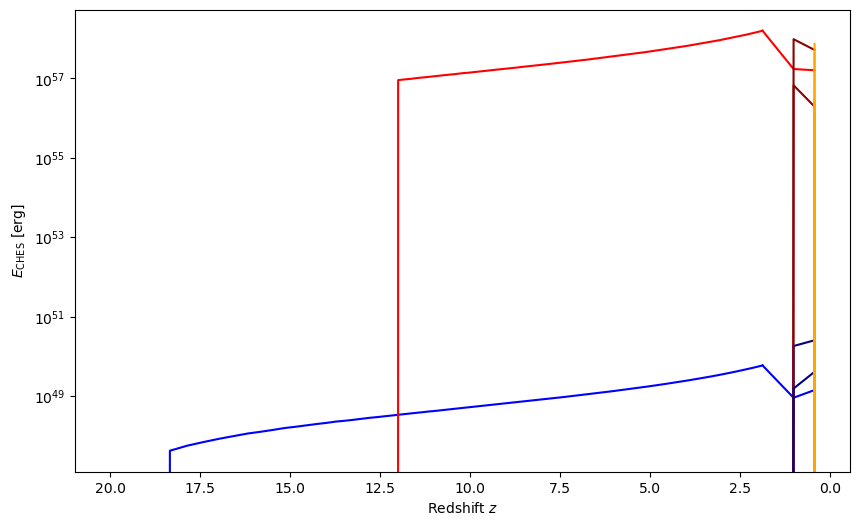

In [34]:
# --- Preparación de variables para graficar (3ª generación) ---
time_period_3_yr = delta_t_local
time_period_3_Gyr = time_period_3_yr / 1e9

POPULATION_BPBH_BY_GENERATION = [
    N_BBH_tot,
    np.sum(N_coll_BPBH_dict.get('0G-0G', 0)),
    np.sum(N_coll_BPBH_dict_3.get('0G-0G', 0))
]
EMISSION_GW_OF_BPBH = [
    E_dot_BBH_shell_tot,
    np.sum(E_dot_BBH_dict.get('0G-0G', 0)),
    np.sum(E_dot_BBH_dict_3.get('0G-0G', 0))
]

NUMBER_OF_CHES_BY_GENERATION = [
    N_CHES_tot,
    np.sum(N_coll_CHES_dict.get('0G-0G', 0)),
    np.sum(N_coll_CHES_dict_3.get('0G-0G', 0))
]
EMISSION_GW_OF_CHES = [
    E_dot_CHES_shell_tot,
    np.sum(E_dot_CHES_dict.get('0G-0G', 0)),
    np.sum(E_dot_CHES_dict_3.get('0G-0G', 0))
]

PERIOD_OF_EVOLUTION_GYR = [
    time_period_1_Gyr,
    time_period_2_Gyr,
    time_period_3_Gyr
]

# --- Redshift del final de la 3ª generación ---
t_3rd_gyr = (
    (((time_period_1_Gyr + time_period_2_Gyr + time_period_3_Gyr) * u.Gyr).to(u.yr)).value
    + time_z_20
) / 1e9
redshift_evaluated_2 = z_at_value(cosmo.age, t_3rd_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot = [
    redshift_evaluated_0[-1],
    redshift_evaluated_1,
    redshift_evaluated_2
]

# --- Combinaciones de la tercera generación ---
# Segunda generación
POPULATION_BPBH_0G1G = [0, np.sum(N_coll_BPBH_dict.get('0G-1G', 0)), np.sum(N_coll_BPBH_dict_3.get('0G-1G', 0))]
EMISSION_GW_BPBH_0G1G = [0, np.sum(E_dot_BBH_dict.get('0G-1G', 0)), np.sum(E_dot_BBH_dict_3.get('0G-1G', 0))]
NUMBER_OF_CHES_0G1G   = [0, np.sum(N_coll_CHES_dict.get('0G-1G', 0)), np.sum(N_coll_CHES_dict_3.get('0G-1G', 0))]
EMISSION_GW_CHES_0G1G = [0, np.sum(E_dot_CHES_dict.get('0G-1G', 0)), np.sum(E_dot_CHES_dict_3.get('0G-1G', 0))]

POPULATION_BPBH_1G1G = [0, np.sum(N_coll_BPBH_dict.get('1G-1G', 0)), np.sum(N_coll_BPBH_dict_3.get('1G-1G', 0))]
EMISSION_GW_BPBH_1G1G = [0, np.sum(E_dot_BBH_dict.get('1G-1G', 0)), np.sum(E_dot_BBH_dict_3.get('1G-1G', 0))]
NUMBER_OF_CHES_1G1G   = [0, np.sum(N_coll_CHES_dict.get('1G-1G', 0)), np.sum(N_coll_CHES_dict_3.get('1G-1G', 0))]
EMISSION_GW_CHES_1G1G = [0, np.sum(E_dot_CHES_dict.get('1G-1G', 0)), np.sum(E_dot_CHES_dict_3.get('1G-1G', 0))]

# Tercera generación (todas las combinaciones que viste en resultados_discretos_3rd)
POPULATION_BPBH_0G2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('0G-2G_a', 0))]
EMISSION_GW_BPBH_0G2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('0G-2G_a', 0))]
NUMBER_OF_CHES_0G2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('0G-2G_a', 0))]
EMISSION_GW_CHES_0G2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('0G-2G_a', 0))]

POPULATION_BPBH_0G2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('0G-2G_b', 0))]
EMISSION_GW_BPBH_0G2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('0G-2G_b', 0))]
NUMBER_OF_CHES_0G2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('0G-2G_b', 0))]
EMISSION_GW_CHES_0G2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('0G-2G_b', 0))]

POPULATION_BPBH_1G2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('1G-2G_a', 0))]
EMISSION_GW_BPBH_1G2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('1G-2G_a', 0))]
NUMBER_OF_CHES_1G2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('1G-2G_a', 0))]
EMISSION_GW_CHES_1G2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('1G-2G_a', 0))]

POPULATION_BPBH_1G2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('1G-2G_b', 0))]
EMISSION_GW_BPBH_1G2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('1G-2G_b', 0))]
NUMBER_OF_CHES_1G2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('1G-2G_b', 0))]
EMISSION_GW_CHES_1G2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('1G-2G_b', 0))]

POPULATION_BPBH_2G_a2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_a-2G_a', 0))]
EMISSION_GW_BPBH_2G_a2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_a-2G_a', 0))]
NUMBER_OF_CHES_2G_a2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_a-2G_a', 0))]
EMISSION_GW_CHES_2G_a2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_a-2G_a', 0))]

POPULATION_BPBH_2G_a2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_a-2G_b', 0))]
EMISSION_GW_BPBH_2G_a2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_a-2G_b', 0))]
NUMBER_OF_CHES_2G_a2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_a-2G_b', 0))]
EMISSION_GW_CHES_2G_a2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_a-2G_b', 0))]

POPULATION_BPBH_2G_b2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_b-2G_b', 0))]
EMISSION_GW_BPBH_2G_b2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_b-2G_b', 0))]
NUMBER_OF_CHES_2G_b2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_b-2G_b', 0))]
EMISSION_GW_CHES_2G_b2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_b-2G_b', 0))]

# --- Graficado ---
plt.figure(figsize=(10, 6))

# Periodo inicial
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red')

# Corte entre periodos
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='red')

# Segunda generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G1G, color='darkblue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G1G, color='darkblue')

# Tercera generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_a2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_a2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_b2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_b2G_b, color='orange')

# Ajustes de eje
plt.gca().invert_xaxis()
plt.xlabel('Redshift $z$')
plt.ylabel(r'${E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')
plt.show()


In [35]:
# =============================
# --- Preparación Cuarta Generación ---
# =============================

# Masas heredadas de generaciones previas
M_0G   = MASAS_3G["0G"]
M_1G   = MASAS_3G["1G"]
M_2G_a = MASAS_3G["2G_a"]
M_2G_b = MASAS_3G["2G_b"]

# Masas de las nuevas especies formadas en 3G (usando resultados_discretos_3rd)
M_3G = {}
for r in resultados_discretos_3rd:
    inter = r["interaccion"]
    if inter.startswith("0G-2G_a"):
        M_3G["3G_a"] = r["Mass_final"]
    elif inter.startswith("1G-2G_a"):
        M_3G["3G_b"] = r["Mass_final"]
    elif inter.startswith("0G-2G_b"):
        M_3G["3G_c"] = r["Mass_final"]
    elif inter.startswith("2G_a-2G_a"):
        M_3G["3G_d"] = r["Mass_final"]
    elif inter.startswith("1G-2G_b"):
        M_3G["3G_e"] = r["Mass_final"]
    elif inter.startswith("2G_a-2G_b"):
        M_3G["3G_f"] = r["Mass_final"]
    elif inter.startswith("2G_b-2G_b"):
        M_3G["3G_g"] = r["Mass_final"]

# Poblaciones sobrevivientes de 3G (alimentan 4G)
N_0G_third   = np.round(POBLACION_3G.get("0G", 0))
N_1G_third   = np.round(POBLACION_3G.get("1G", 0))
N_2G_a_third = np.round(POBLACION_3G.get("2G_a", 0))
N_2G_b_third = np.round(POBLACION_3G.get("2G_b", 0))

# Poblaciones de nuevas especies en 3G
N_3G = {k: np.round(POBLACION_3G.get(k, 0)) for k in ["3G_a", "3G_b", "3G_c", "3G_d", "3G_e", "3G_f", "3G_g"]}

# Masa total del cúmulo tras 3G
M_DM_c_3G = (
    np.sum(N_0G_third)   * M_0G +
    np.sum(N_1G_third)   * M_1G +
    np.sum(N_2G_a_third) * M_2G_a +
    np.sum(N_2G_b_third) * M_2G_b +
    sum(np.sum(N_3G[k]) * M_3G[k] for k in N_3G if k in M_3G)
)

# Masa perdida por GWs en 3G
M_LOST_GW_3G = M_DM_c_2G - M_DM_c_3G
percent_lost_GW_3G = (M_LOST_GW_3G / M_DM_c_2G) * 100

# --- Mostrar inventario previo ---
print(f"Number of PBHs of initial generation: {np.sum(N_0G_third)} of {M_0G:.6f} Solar Mass")
print(f"Number of BHs of 1st generation:     {np.sum(N_1G_third)} of {M_1G:.6f} Solar Mass")
print(f"Number of BHs of 2nd generation_a:   {np.sum(N_2G_a_third)} of {M_2G_a:.6f} Solar Mass")
print(f"Number of BHs of 2nd generation_b:   {np.sum(N_2G_b_third)} of {M_2G_b:.6f} Solar Mass")
for k in sorted(N_3G.keys()):
    if k in M_3G:
        print(f"Number of BHs of {k}: {np.sum(N_3G[k])} of {M_3G[k]:.6f} Solar Mass")

print(f"Cluster Mass after 3rd generation:    {M_DM_c_3G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):      {M_LOST_GW_3G:.4e} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW_3G:.1f}%")

Number of PBHs of initial generation: 3155.0 of 10.000000 Solar Mass
Number of BHs of 1st generation:     265.0 of 17.500049 Solar Mass
Number of BHs of 2nd generation_a:   526.0 of 25.000136 Solar Mass
Number of BHs of 2nd generation_b:   12.0 of 30.625238 Solar Mass
Number of BHs of 3G_a: 833.0 of 32.500259 Solar Mass
Number of BHs of 3G_b: 281.0 of 38.125389 Solar Mass
Number of BHs of 3G_c: 19.0 of 38.125389 Solar Mass
Number of BHs of 3G_d: 12.0 of 43.750546 Solar Mass
Number of BHs of 3G_e: 17.0 of 43.750539 Solar Mass
Number of BHs of 3G_f: 7.0 of 49.375717 Solar Mass
Number of BHs of 3G_g: 0.0 of 53.594629 Solar Mass
Cluster Mass after 3rd generation:    8.9830e+04 Solar Mass
Mass lost by GWs (BPBH mergers):      5.7323e+03 Solar Mass
Percentage of Cluster Mass Lost by GWs: 6.0%


In [36]:
# ==================================================
# --- Evaluación de cuarta generación (dinámica) ---
# ==================================================

M_DM_cluster = M_DM_c_3G

# Inventario inicial de la cuarta generación
POBLACION_4G = {
    "0G":   N_0G_third.copy(),
    "1G":   N_1G_third.copy(),
    "2G_a": N_2G_a_third.copy(),
    "2G_b": N_2G_b_third.copy(),
    "3G_a": N_3G.get("3G_a", 0).copy(),
    "3G_b": N_3G.get("3G_b", 0).copy(),
    "3G_c": N_3G.get("3G_c", 0).copy(),
    "3G_d": N_3G.get("3G_d", 0).copy(),
    "3G_e": N_3G.get("3G_e", 0).copy(),
    "3G_f": N_3G.get("3G_f", 0).copy(),
    "3G_g": N_3G.get("3G_g", 0).copy(),
}

MASAS_4G = {**MASAS_3G, **M_3G}

# Diccionarios de resultados
resultados_discretos_4th = []
E_dot_BBH_dict_4 = {}
E_dot_CHES_dict_4 = {}
M_dict_4 = {}
N_coll_BPBH_dict_4 = {}
N_coll_CHES_dict_4 = {}

# ==========================================
# --- Velocidades iniciales antes de 4G ---
# ==========================================

print("\n=== Velocidades iniciales antes de la 4ª generación ===")
M_DM_cluster = M_DM_c_3G  # masa total al inicio de 4G

for nombre in POBLACION_4G:
    if nombre not in MASAS_4G:  # evitar especies sin masa definida
        continue

    N_array = POBLACION_4G[nombre]
    if np.sum(N_array) == 0:
        print(f"Saltando {nombre} (sin PBHs en esta especie)")
        continue

    M_especie = MASAS_4G[nombre]

    # Calcular velocidades
    v_mean_values = np.array([
        mean_square_velocity(r, M_DM_cluster, np.sum(N_array), M_especie)
        for r in r_values_pc
    ])

    # Mostrar tabla
    print(f"\nEspecie: {nombre} (M = {M_especie:.2f} M_sun, N = {int(np.sum(N_array))})")
    print(f"{'r_j (pc)':<10}{'v_'+nombre+' (km/s)':<20}")
    print("=" * 40)
    for r, v in zip(r_values_pc, v_mean_values):
        print(f"{r:<10.3f}{v:<20.3e}")

# Evaluación dinámica
for nombre_i, nombre_j in combinations_with_replacement(list(POBLACION_4G.keys()), 2):

    # === Poblaciones actuales ===
    if nombre_i == nombre_j:
        N_i_array = np.round(POBLACION_4G[nombre_i] * 0.5)
        N_j_array = np.round(POBLACION_4G[nombre_j] * 0.5)
    else:
        N_i_array = POBLACION_4G[nombre_i].copy()
        N_j_array = POBLACION_4G[nombre_j].copy()

    M_i = MASAS_4G[nombre_i]
    M_j = MASAS_4G[nombre_j]

    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)

    if np.sum(N_i_array) == 0 or np.sum(N_j_array) == 0:
        print(f"Saltando {nombre_i}-{nombre_j} (sin PBHs en al menos una especie)")
        continue

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Colisiones ---
    delta_t_local = 4.7e9
    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    # --- Ajuste: no exceder poblaciones disponibles ---
    if nombre_i == nombre_j:
        # Misma especie: cada fusión consume 2 PBHs
        max_fusions = np.floor(np.sum(N_i_array) / 2)
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)
    else:
        # Distintas especies: cada fusión consume 1 de cada especie
        max_fusions = min(np.sum(N_i_array), np.sum(N_j_array))
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)

    # Energía y masas finales
    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)

    # CHEs
    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event
    
    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_result:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        t_merge = (1/Gamma_values_yr[i])/1e9 if Gamma_values_yr[i] > 0 else float('inf')
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{t_merge:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")
    
    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")
    
    # --- Guardar resultados ---
    resultados_discretos_4th.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES
    })

    N_coll_BPBH_dict_4[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict_4[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict_4[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict_4[f"{nombre_i}-{nombre_j}"] = E_dot_CHES
    M_dict_4[f"{nombre_i}-{nombre_j}"] = M_result

    # === Actualización del inventario tras la interacción ===
    if nombre_i == "0G" and nombre_j == "0G":
        POBLACION_4G["0G"] -= N_coll_BBH
        POBLACION_4G["1G"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "1G"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] += N_coll_BBH / 2

    elif nombre_i == "1G" and nombre_j == "1G":
        POBLACION_4G["1G"] -= N_coll_BBH
        POBLACION_4G["2G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_a"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["3G_a"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_b"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_c"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_a"}:
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["3G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_b"}:
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_e"] += N_coll_BBH / 2

    elif nombre_i == "2G_a" and nombre_j == "2G_a":
        POBLACION_4G["2G_a"] -= N_coll_BBH
        POBLACION_4G["3G_d"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"2G_a", "2G_b"}:
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_f"] += N_coll_BBH / 2

    elif nombre_i == "2G_b" and nombre_j == "2G_b":
        POBLACION_4G["2G_b"] -= N_coll_BBH
        POBLACION_4G["3G_g"] += N_coll_BBH / 2

    # Extensiones con 3G homogéneas
    elif nombre_i == "3G_a" and nombre_j == "3G_a":
        POBLACION_4G["3G_a"] -= N_coll_BBH
        POBLACION_4G["4G_a"] = POBLACION_4G.get("4G_a", 0) + N_coll_BBH / 2

    elif nombre_i == "3G_b" and nombre_j == "3G_b":
        POBLACION_4G["3G_b"] -= N_coll_BBH
        POBLACION_4G["4G_b"] = POBLACION_4G.get("4G_b", 0) + N_coll_BBH / 2

    elif nombre_i == "3G_c" and nombre_j == "3G_c":
        POBLACION_4G["3G_c"] -= N_coll_BBH
        POBLACION_4G["4G_c"] = POBLACION_4G.get("4G_c", 0) + N_coll_BBH / 2

    # Evitar negativos
    for especie in POBLACION_4G:
        POBLACION_4G[especie] = np.clip(POBLACION_4G[especie], 0, None)

    # Mostrar inventario actualizado
    M_DM_c_4G = sum(
        np.sum(POBLACION_4G[sp]) * MASAS_4G.get(sp, M_dict_4.get(sp, 0))
        for sp in POBLACION_4G
    )
    print(f"\n[Inventario tras {nombre_i}-{nombre_j}]:")
    for especie, arr in POBLACION_4G.items():
        print(f"  {especie}: {int(np.sum(arr))} PBHs")
    print(f"  >>> Masa total actual del cúmulo: {M_DM_c_4G:.4e} M_sun")

# === Guardar masa final de la 4ª generación ===
M_DM_c_4G_final = M_DM_c_4G
print(f"\n=== Masa total FINAL tras la 4ª generación: {M_DM_c_4G_final:.4e} M_sun ===")



=== Velocidades iniciales antes de la 4ª generación ===

Especie: 0G (M = 10.00 M_sun, N = 3155)
r_j (pc)  v_0G (km/s)         
0.100     7.852e+00           
0.211     7.797e+00           
0.321     7.707e+00           
0.432     7.589e+00           
0.543     7.448e+00           
0.653     7.292e+00           
0.764     7.126e+00           
0.875     6.956e+00           
0.985     6.785e+00           
1.096     6.616e+00           

Especie: 1G (M = 17.50 M_sun, N = 265)
r_j (pc)  v_1G (km/s)         
0.100     3.010e+00           
0.211     2.989e+00           
0.321     2.955e+00           
0.432     2.909e+00           
0.543     2.856e+00           
0.653     2.796e+00           
0.764     2.732e+00           
0.875     2.667e+00           
0.985     2.601e+00           
1.096     2.537e+00           

Especie: 2G_a (M = 25.00 M_sun, N = 526)
r_j (pc)  v_2G_a (km/s)       
0.100     5.069e+00           
0.211     5.034e+00           
0.321     4.976e+00           
0.432     4.89

Masses interacting
M_PBH_0G: 10.00
M_PBH_2G_b: 30.63
Mass_final_from_0G-2G_b: 38.13

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      4.524e-10      1.404e-09        2.210e+00           1.0       1106.0
0.21      4.217e-10      1.322e-09        2.371e+00           1.0       1162.0
0.32      3.757e-10      1.198e-09        2.662e+00           1.0       1219.0
0.43      3.218e-10      1.049e-09        3.107e+00           1.0       1230.0
0.54      2.669e-10      8.934e-10        3.747e+00           1.0       1161.0
0.65      2.159e-10      7.449e-10        4.632e+00           1.0       1019.0
0.76      1.715e-10      6.115e-10        5.830e+00           1.0       828.0
0.87      1.346e-10      4.968e-10        7.429e+00           0.0       635.0
0.99      1.049e-10      4.013e-10        9.530e+00           0.0       465.0
1.10      8.159e-11      3.235e-10        1.226e+01           0.0       327.0

[Resumen 0G-2G_b]
Total BBH events = 7
Total 

Masses interacting
M_PBH_0G: 10.00
M_PBH_3G_f: 49.38
Mass_final_from_0G-3G_f: 56.88

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      5.537e-10      1.853e-09        1.806e+00           0.0       1455.0
0.21      5.161e-10      1.745e-09        1.938e+00           0.0       1530.0
0.32      4.598e-10      1.581e-09        2.175e+00           0.0       1605.0
0.43      3.938e-10      1.384e-09        2.539e+00           0.0       1620.0
0.54      3.266e-10      1.179e-09        3.061e+00           0.0       1530.0
0.65      2.642e-10      9.831e-10        3.785e+00           0.0       1342.0
0.76      2.099e-10      8.071e-10        4.764e+00           0.0       1091.0
0.87      1.647e-10      6.557e-10        6.070e+00           0.0       838.0
0.99      1.284e-10      5.296e-10        7.787e+00           0.0       614.0
1.10      9.985e-11      4.269e-10        1.001e+01           0.0       431.0

[Resumen 0G-3G_f]
Total BBH events = 0
Total

Masses interacting
M_PBH_1G: 17.50
M_PBH_3G_c: 38.13
Mass_final_from_1G-3G_c: 51.25

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      4.035e-09      4.874e-07        2.478e-01           6.0       46965.0
0.21      3.747e-09      4.572e-07        2.668e-01           5.0       40831.0
0.32      3.322e-09      4.120e-07        3.010e-01           4.0       30986.0
0.43      2.828e-09      3.587e-07        3.536e-01           2.0       21072.0
0.54      2.330e-09      3.035e-07        4.292e-01           1.0       11411.0
0.65      1.871e-09      2.512e-07        5.345e-01           0.0       7084.0
0.76      1.475e-09      2.047e-07        6.778e-01           0.0       3367.0
0.87      1.149e-09      1.651e-07        8.700e-01           0.0       1164.0
0.99      8.901e-10      1.325e-07        1.123e+00           0.0       934.0
1.10      6.884e-10      1.062e-07        1.453e+00           0.0       250.0

[Resumen 1G-3G_c]
Total BBH events = 1

Masses interacting
M_PBH_2G_a: 25.00
M_PBH_3G_a: 32.50
Mass_final_from_2G_a-3G_a: 51.25

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      2.256e-10      8.089e-10        4.433e+00           48.0      173.0
0.21      2.127e-10      7.705e-10        4.700e+00           53.0      192.0
0.32      1.931e-10      7.111e-10        5.178e+00           48.0      177.0
0.43      1.696e-10      6.385e-10        5.895e+00           35.0      132.0
0.54      1.450e-10      5.606e-10        6.896e+00           22.0      84.0
0.65      1.214e-10      4.839e-10        8.236e+00           10.0      40.0
0.76      1.002e-10      4.125e-10        9.984e+00           4.0       16.0
0.87      8.181e-11      3.487e-10        1.222e+01           0.0       2.0
0.99      6.643e-11      2.934e-10        1.505e+01           0.0       1.0
1.10      5.381e-11      2.464e-10        1.859e+01           0.0       0.0

[Resumen 2G_a-3G_a]
Total BBH events = 220
Total CHES ev

Masses interacting
M_PBH_2G_b: 30.63
M_PBH_3G_a: 32.50
Mass_final_from_2G_b-3G_a: 55.47

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      2.183e-10      4.107e-10        4.581e+00           4.0       8.0
0.21      2.058e-10      3.911e-10        4.859e+00           2.0       4.0
0.32      1.867e-10      3.608e-10        5.356e+00           0.0       1.0
0.43      1.639e-10      3.237e-10        6.102e+00           0.0       0.0
0.54      1.400e-10      2.840e-10        7.145e+00           0.0       0.0
0.65      1.171e-10      2.448e-10        8.543e+00           0.0       0.0
0.76      9.644e-11      2.084e-10        1.037e+01           0.0       0.0
0.87      7.866e-11      1.760e-10        1.271e+01           0.0       0.0
0.99      6.378e-11      1.478e-10        1.568e+01           0.0       0.0
1.10      5.157e-11      1.239e-10        1.939e+01           0.0       0.0

[Resumen 2G_b-3G_a]
Total BBH events = 6
Total CHES events = 13
P_B

Masses interacting
M_PBH_3G_a: 32.50
M_PBH_3G_b: 38.13
Mass_final_from_3G_a-3G_b: 62.50

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      2.993e-10      2.280e-09        3.341e+00           80.0      1704.0
0.21      2.785e-10      2.143e-09        3.591e+00           75.0      1627.0
0.32      2.474e-10      1.936e-09        4.042e+00           66.0      1447.0
0.43      2.112e-10      1.690e-09        4.734e+00           53.0      1191.0
0.54      1.745e-10      1.434e-09        5.729e+00           38.0      896.0
0.65      1.406e-10      1.191e-09        7.112e+00           25.0      610.0
0.76      1.112e-10      9.733e-10        8.991e+00           15.0      377.0
0.87      8.693e-11      7.875e-10        1.150e+01           8.0       218.0
0.99      6.750e-11      6.335e-10        1.482e+01           4.0       119.0
1.10      5.231e-11      5.090e-10        1.912e+01           2.0       63.0

[Resumen 3G_a-3G_b]
Total BBH events = 366
T

Masses interacting
M_PBH_3G_b: 38.13
M_PBH_3G_c: 38.13
Mass_final_from_3G_b-3G_c: 66.72

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      5.905e-10      3.252e-09        1.693e+00           8.0       1834.0
0.21      5.504e-10      3.061e-09        1.817e+00           6.0       1338.0
0.32      4.902e-10      2.772e-09        2.040e+00           3.0       821.0
0.43      4.198e-10      2.427e-09        2.382e+00           1.0       411.0
0.54      3.480e-10      2.067e-09        2.873e+00           0.0       180.0
0.65      2.814e-10      1.723e-09        3.553e+00           0.0       77.0
0.76      2.235e-10      1.414e-09        4.474e+00           0.0       33.0
0.87      1.753e-10      1.148e-09        5.703e+00           0.0       13.0
0.99      1.366e-10      9.269e-10        7.319e+00           0.0       0.0
1.10      1.062e-10      7.469e-10        9.416e+00           0.0       0.0

[Resumen 3G_b-3G_c]
Total BBH events = 18
Total CHES

Masses interacting
M_PBH_3G_c: 38.13
M_PBH_3G_e: 43.75
Mass_final_from_3G_c-3G_e: 72.35

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      4.863e-09      9.779e-06        2.056e-01           4.0       160867.0
0.21      4.582e-09      9.306e-06        2.182e-01           4.0       153089.0
0.32      4.207e-09      8.686e-06        2.377e-01           3.0       142878.0
0.43      3.762e-09      7.941e-06        2.658e-01           3.0       130633.0
0.54      3.280e-09      7.112e-06        3.048e-01           2.0       83570.0
0.65      2.794e-09      6.244e-06        3.579e-01           1.0       73364.0
0.76      2.328e-09      5.377e-06        4.295e-01           1.0       63180.0
0.87      1.901e-09      4.545e-06        5.260e-01           0.0       21361.0
0.99      1.522e-09      3.770e-06        6.571e-01           0.0       0.0
1.10      1.193e-09      3.063e-06        8.382e-01           0.0       0.0

[Resumen 3G_c-3G_e]
Total BBH e

Masses interacting
M_PBH_3G_e: 43.75
M_PBH_3G_f: 49.38
Mass_final_from_3G_e-3G_f: 82.19

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      5.353e-09      8.094e-07        1.868e-01           3.0       28530.0
0.21      4.973e-09      7.595e-07        2.011e-01           2.0       19634.0
0.32      4.411e-09      6.848e-07        2.267e-01           2.0       16094.0
0.43      3.758e-09      5.965e-07        2.661e-01           0.0       7009.0
0.54      3.098e-09      5.050e-07        3.228e-01           0.0       2374.0
0.65      2.489e-09      4.183e-07        4.017e-01           0.0       0.0
0.76      1.964e-09      3.411e-07        5.091e-01           0.0       0.0
0.87      1.531e-09      2.753e-07        6.530e-01           0.0       0.0
0.99      1.186e-09      2.210e-07        8.428e-01           0.0       0.0
1.10      9.180e-10      1.773e-07        1.089e+00           0.0       0.0

[Resumen 3G_e-3G_f]
Total BBH events = 7
Total CH

In [37]:
# --- Preparación de variables para graficar (4ª generación) ---
time_period_4_yr = delta_t_local
time_period_4_Gyr = time_period_4_yr / 1e9

POPULATION_BPBH_BY_GENERATION.append(np.sum(N_coll_BPBH_dict_4.get('0G-0G', 0)))
EMISSION_GW_OF_BPBH.append(np.sum(E_dot_BBH_dict_4.get('0G-0G', 0)))
NUMBER_OF_CHES_BY_GENERATION.append(np.sum(N_coll_CHES_dict_4.get('0G-0G', 0)))
EMISSION_GW_OF_CHES.append(np.sum(E_dot_CHES_dict_4.get('0G-0G', 0)))
PERIOD_OF_EVOLUTION_GYR.append(time_period_4_Gyr)

# --- Redshift del final de la 4ª generación ---
t_4th_gyr = (
    (((time_period_1_Gyr + time_period_2_Gyr + time_period_3_Gyr + time_period_4_Gyr) * u.Gyr).to(u.yr)).value
    + time_z_20
) / 1e9
redshift_evaluated_3 = z_at_value(cosmo.age, t_4th_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot.append(redshift_evaluated_3)

# =============================
# --- Combinaciones heredadas ---
# =============================

# 0G-1G
POPULATION_BPBH_0G1G.append(np.sum(N_coll_BPBH_dict_4.get('0G-1G', 0)))
EMISSION_GW_BPBH_0G1G.append(np.sum(E_dot_BBH_dict_4.get('0G-1G', 0)))
NUMBER_OF_CHES_0G1G.append(np.sum(N_coll_CHES_dict_4.get('0G-1G', 0)))
EMISSION_GW_CHES_0G1G.append(np.sum(E_dot_CHES_dict_4.get('0G-1G', 0)))

# 0G-2G_a
POPULATION_BPBH_0G2G_a.append(np.sum(N_coll_BPBH_dict_4.get('0G-2G_a', 0)))
EMISSION_GW_BPBH_0G2G_a.append(np.sum(E_dot_BBH_dict_4.get('0G-2G_a', 0)))
NUMBER_OF_CHES_0G2G_a.append(np.sum(N_coll_CHES_dict_4.get('0G-2G_a', 0)))
EMISSION_GW_CHES_0G2G_a.append(np.sum(E_dot_CHES_dict_4.get('0G-2G_a', 0)))

# 0G-2G_b
POPULATION_BPBH_0G2G_b.append(np.sum(N_coll_BPBH_dict_4.get('0G-2G_b', 0)))
EMISSION_GW_BPBH_0G2G_b.append(np.sum(E_dot_BBH_dict_4.get('0G-2G_b', 0)))
NUMBER_OF_CHES_0G2G_b.append(np.sum(N_coll_CHES_dict_4.get('0G-2G_b', 0)))
EMISSION_GW_CHES_0G2G_b.append(np.sum(E_dot_CHES_dict_4.get('0G-2G_b', 0)))

# 1G-1G
POPULATION_BPBH_1G1G.append(np.sum(N_coll_BPBH_dict_4.get('1G-1G', 0)))
EMISSION_GW_BPBH_1G1G.append(np.sum(E_dot_BBH_dict_4.get('1G-1G', 0)))
NUMBER_OF_CHES_1G1G.append(np.sum(N_coll_CHES_dict_4.get('1G-1G', 0)))
EMISSION_GW_CHES_1G1G.append(np.sum(E_dot_CHES_dict_4.get('1G-1G', 0)))

# 1G-2G_a
POPULATION_BPBH_1G2G_a.append(np.sum(N_coll_BPBH_dict_4.get('1G-2G_a', 0)))
EMISSION_GW_BPBH_1G2G_a.append(np.sum(E_dot_BBH_dict_4.get('1G-2G_a', 0)))
NUMBER_OF_CHES_1G2G_a.append(np.sum(N_coll_CHES_dict_4.get('1G-2G_a', 0)))
EMISSION_GW_CHES_1G2G_a.append(np.sum(E_dot_CHES_dict_4.get('1G-2G_a', 0)))

# 1G-2G_b
POPULATION_BPBH_1G2G_b.append(np.sum(N_coll_BPBH_dict_4.get('1G-2G_b', 0)))
EMISSION_GW_BPBH_1G2G_b.append(np.sum(E_dot_BBH_dict_4.get('1G-2G_b', 0)))
NUMBER_OF_CHES_1G2G_b.append(np.sum(N_coll_CHES_dict_4.get('1G-2G_b', 0)))
EMISSION_GW_CHES_1G2G_b.append(np.sum(E_dot_CHES_dict_4.get('1G-2G_b', 0)))

# 2G_a-2G_a
POPULATION_BPBH_2G_a2G_a.append(np.sum(N_coll_BPBH_dict_4.get('2G_a-2G_a', 0)))
EMISSION_GW_BPBH_2G_a2G_a.append(np.sum(E_dot_BBH_dict_4.get('2G_a-2G_a', 0)))
NUMBER_OF_CHES_2G_a2G_a.append(np.sum(N_coll_CHES_dict_4.get('2G_a-2G_a', 0)))
EMISSION_GW_CHES_2G_a2G_a.append(np.sum(E_dot_CHES_dict_4.get('2G_a-2G_a', 0)))

# 2G_b-2G_b
POPULATION_BPBH_2G_b2G_b.append(np.sum(N_coll_BPBH_dict_4.get('2G_b-2G_b', 0)))
EMISSION_GW_BPBH_2G_b2G_b.append(np.sum(E_dot_BBH_dict_4.get('2G_b-2G_b', 0)))
NUMBER_OF_CHES_2G_b2G_b.append(np.sum(N_coll_CHES_dict_4.get('2G_b-2G_b', 0)))
EMISSION_GW_CHES_2G_b2G_b.append(np.sum(E_dot_CHES_dict_4.get('2G_b-2G_b', 0)))

# =============================
# --- Combinaciones nuevas con 3G ---
# =============================

# 0G-3G_a
POPULATION_BPBH_0G3G_a = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_a', 0))]
EMISSION_GW_BPBH_0G3G_a = [np.sum(E_dot_BBH_dict_4.get('0G-3G_a', 0))]
NUMBER_OF_CHES_0G3G_a   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_a', 0))]
EMISSION_GW_CHES_0G3G_a = [np.sum(E_dot_CHES_dict_4.get('0G-3G_a', 0))]

# 0G-3G_b
POPULATION_BPBH_0G3G_b = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_b', 0))]
EMISSION_GW_BPBH_0G3G_b = [np.sum(E_dot_BBH_dict_4.get('0G-3G_b', 0))]
NUMBER_OF_CHES_0G3G_b   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_b', 0))]
EMISSION_GW_CHES_0G3G_b = [np.sum(E_dot_CHES_dict_4.get('0G-3G_b', 0))]


# 1G-3G_a
POPULATION_BPBH_1G3G_a = [np.sum(N_coll_BPBH_dict_4.get('1G-3G_a', 0))]
EMISSION_GW_BPBH_1G3G_a = [np.sum(E_dot_BBH_dict_4.get('1G-3G_a', 0))]
NUMBER_OF_CHES_1G3G_a   = [np.sum(N_coll_CHES_dict_4.get('1G-3G_a', 0))]
EMISSION_GW_CHES_1G3G_a = [np.sum(E_dot_CHES_dict_4.get('1G-3G_a', 0))]


# 0G-3G_c new
POPULATION_BPBH_0G3G_c = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_BPBH_0G3G_c = [np.sum(E_dot_BBH_dict_4.get('0G-3G_c', 0))]
NUMBER_OF_CHES_0G3G_c   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_CHES_0G3G_c = [np.sum(E_dot_CHES_dict_4.get('0G-3G_c', 0))]

# 1G-3G_c new
POPULATION_BPBH_1G3G_c = [np.sum(N_coll_BPBH_dict_4.get('1G-3G_c', 0))]
EMISSION_GW_BPBH_1G3G_c = [np.sum(E_dot_BBH_dict_4.get('1G-3G_c', 0))]
NUMBER_OF_CHES_1G3G_c   = [np.sum(N_coll_CHES_dict_4.get('1G-3G_c', 0))]
EMISSION_GW_CHES_1G3G_c = [np.sum(E_dot_CHES_dict_4.get('1G-3G_c', 0))]

# 2G_a-3G_c new
POPULATION_BPBH_2G_a3G_c = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_c', 0))]
EMISSION_GW_BPBH_2G_a3G_c = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_c', 0))]
NUMBER_OF_CHES_2G_a3G_c   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_c', 0))]
EMISSION_GW_CHES_2G_a3G_c = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_c', 0))]



# 2G_a-3G_a
POPULATION_BPBH_2G_a3G_a = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_a', 0))]
EMISSION_GW_BPBH_2G_a3G_a = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_a', 0))]
NUMBER_OF_CHES_2G_a3G_a   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_a', 0))]
EMISSION_GW_CHES_2G_a3G_a = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_a', 0))]

# 2G_a-3G_b
POPULATION_BPBH_2G_a3G_b = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_b', 0))]
EMISSION_GW_BPBH_2G_a3G_b = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_b', 0))]
NUMBER_OF_CHES_2G_a3G_b   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_b', 0))]
EMISSION_GW_CHES_2G_a3G_b = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_b', 0))]



# 3G_a-3G_a
POPULATION_BPBH_3G_a3G_a = [np.sum(N_coll_BPBH_dict_4.get('3G_a-3G_a', 0))]
EMISSION_GW_BPBH_3G_a3G_a = [np.sum(E_dot_BBH_dict_4.get('3G_a-3G_a', 0))]
NUMBER_OF_CHES_3G_a3G_a   = [np.sum(N_coll_CHES_dict_4.get('3G_a-3G_a', 0))]
EMISSION_GW_CHES_3G_a3G_a = [np.sum(E_dot_CHES_dict_4.get('3G_a-3G_a', 0))]

# 3G_a-3G_b new
POPULATION_BPBH_3G_a3G_b = [np.sum(N_coll_BPBH_dict_4.get('3G_a-3G_b', 0))]
EMISSION_GW_BPBH_3G_a3G_b = [np.sum(E_dot_BBH_dict_4.get('3G_a-3G_b', 0))]
NUMBER_OF_CHES_3G_a3G_b   = [np.sum(N_coll_CHES_dict_4.get('3G_a-3G_b', 0))]
EMISSION_GW_CHES_3G_a3G_b = [np.sum(E_dot_CHES_dict_4.get('3G_a-3G_b', 0))]

# 3G_b-3G_b
POPULATION_BPBH_3G_b3G_b = [np.sum(N_coll_BPBH_dict_4.get('3G_b-3G_b', 0))]
EMISSION_GW_BPBH_3G_b3G_b = [np.sum(E_dot_BBH_dict_4.get('3G_b-3G_b', 0))]
NUMBER_OF_CHES_3G_b3G_b   = [np.sum(N_coll_CHES_dict_4.get('3G_b-3G_b', 0))]
EMISSION_GW_CHES_3G_b3G_b = [np.sum(E_dot_CHES_dict_4.get('3G_b-3G_b', 0))]

# 3G_c-3G_c
POPULATION_BPBH_3G_c3G_c = [np.sum(N_coll_BPBH_dict_4.get('3G_c-3G_c', 0))]
EMISSION_GW_BPBH_3G_c3G_c = [np.sum(E_dot_BBH_dict_4.get('3G_c-3G_c', 0))]
NUMBER_OF_CHES_3G_c3G_c   = [np.sum(N_coll_CHES_dict_4.get('3G_c-3G_c', 0))]
EMISSION_GW_CHES_3G_c3G_c = [np.sum(E_dot_CHES_dict_4.get('3G_c-3G_c', 0))]




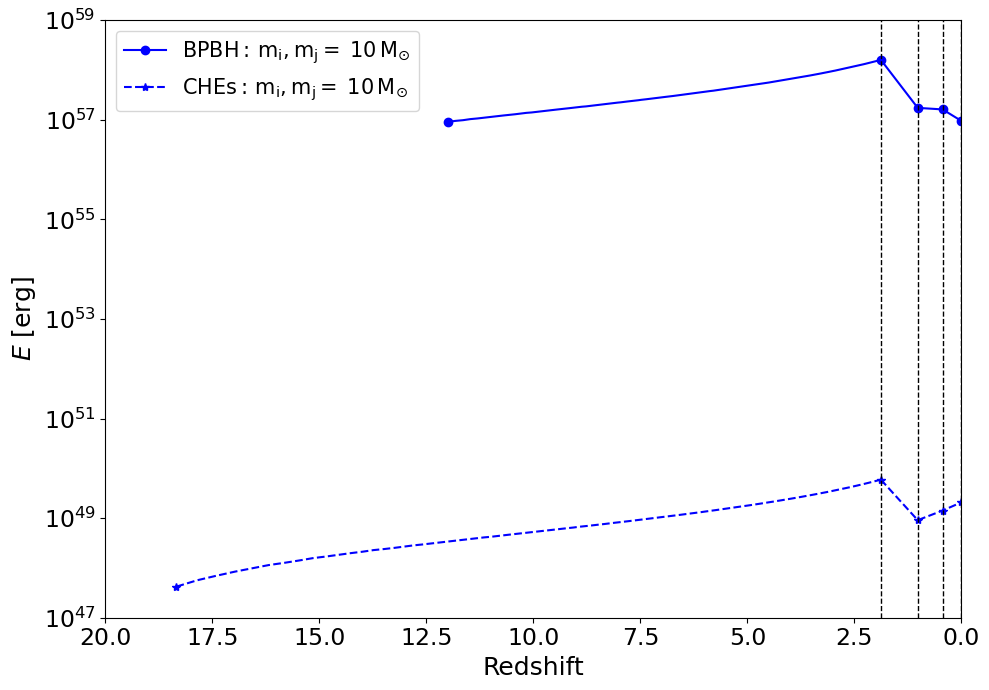

In [38]:
# --- Graficado ---
plt.figure(figsize=(10, 7))

#plt.plot(critical_time_gyr, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n({critical_time_yr/1e9:.3e} yr)')
#plt.plot(critical_merger_gyr, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')

plt.plot(redshift_evaluated_0[4], E_dot_CHES_0[4], '*',linestyle='--',color='blue')
plt.plot(redshift_evaluated_0[25], E_dot_BBH_0[25], 'o',color='blue')




# Periodo inicial (emisión continua previa a las generaciones discretas)
plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--',color='blue')
plt.plot(redshift_evaluated_0[25:], E_dot_BBH_0[25:], color='blue')

# Corte entre periodos (valores totales por generación)
plt.plot(Z_PERIOD_tot[:4], EMISSION_GW_OF_BPBH[:4], color='blue', marker='o',
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

# Segunda generación
#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='deepskyblue',  marker='o',
#         label=r'${\rm BPBH: \, m_{1}}=\;10\,{\rm M}_{\odot}, m_{2} =  18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[1:3], EMISSION_GW_BPBH_1G1G[1:3], color='orange', marker='o',
#        label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[2:], EMISSION_GW_BPBH_1G2G_a[2:], color='green', marker='o',
#        label=r'${\rm BPBH: \, m_{1}}=\;18\,{\rm M}_{\odot}, {\rm m}_{2} =  27\,{\rm M}_{\odot}$')

plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs:  \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='deepskyblue', linestyle='--', marker='*',
#         label=r'${\rm CHEs: \, m_{1}}=\;10\,{\rm M}_{\odot}, m_{2} =  18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
#        label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;18\,{\rm M}_{\odot}$')

# Tercera generación
#plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_a, color='cyan')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_a, color='cyan')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_a, color='lightblue')
# ... resto de combinaciones 3G

# Cuarta generación (puedes darle otro color)
#plt.plot(Z_PERIOD_tot[2:], EMISSION_GW_CHES_1G2G_a[2:], color='green', linestyle='--', marker='*',
#         label=r'${\rm CHEs: \, m_{1}}=\;18\,{\rm M}_{\odot}, {\rm m}_{2} =  27\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# Ajustes de eje
plt.gca().invert_xaxis()
plt.xlim([20.,0.0])
plt.ylim([1e47,1e59])
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


# --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='best',
    #bbox_to_anchor=(0.5, 1.08),  # ajusta altura de la leyenda
)

# --- Guardado evitando cortes ---
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4generations_10M_first.pdf', bbox_inches='tight')
plt.show()

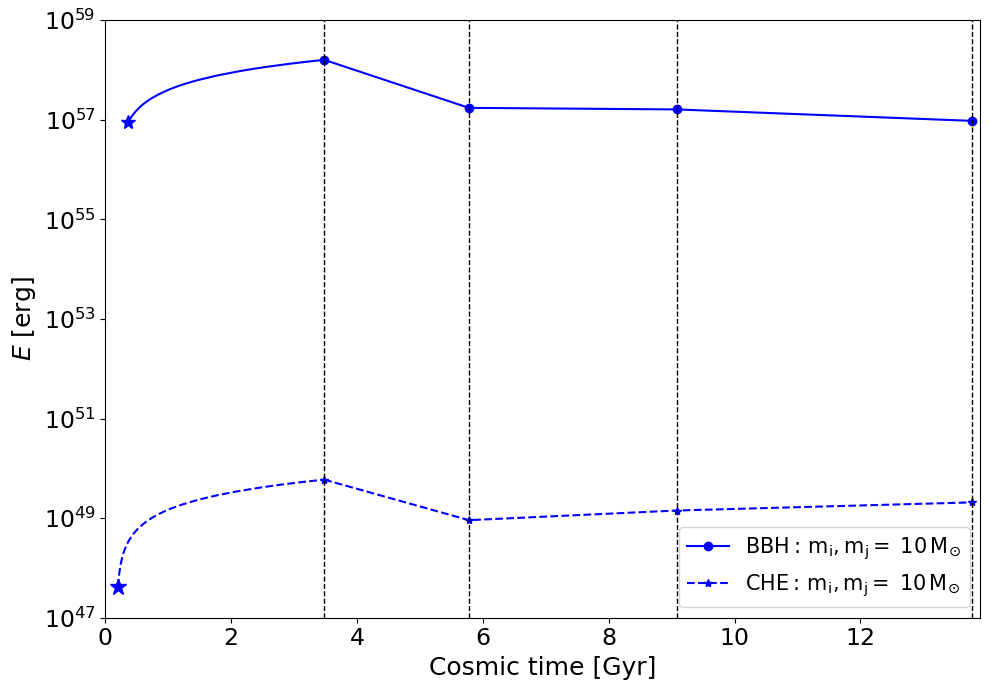

In [66]:
from astropy.cosmology import Planck18 as cosmo

# convertir arrays de redshift a tiempo cósmico [Gyr]
time_evaluated_0 = cosmo.age(redshift_evaluated_0).value  # Gyr
time_periods = cosmo.age(Z_PERIOD_tot).value  # Gyr

plt.figure(figsize=(10, 7))

# primeros eventos
plt.plot(time_evaluated_0[4], E_dot_CHES_0[4], '*', color='blue', markersize=12)
plt.plot(time_evaluated_0[25], E_dot_BBH_0[25], '*', color='blue', markersize=10)

# curvas completas
plt.plot(time_evaluated_0[4:], E_dot_CHES_0[4:], '--', color='blue')
plt.plot(time_evaluated_0[25:], E_dot_BBH_0[25:], '-', color='blue')

# periodos discretos (BPBH y CHEs)
plt.plot(time_periods[:4], EMISSION_GW_OF_BPBH[:4], color='blue', marker='o',
         label=r'${\rm BBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
plt.plot(time_periods, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHE: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

# líneas verticales (intervalos de tiempo)
for t in time_periods:
    plt.axvline(x=t, color='black', linestyle='--', linewidth=1)

# ajustes de ejes
#plt.xlim([0, max(time_evaluated_0)])   # tiempo crece hacia la derecha
plt.ylim([1e47, 1e59])
plt.xlim([0, 13.9])
plt.xlabel('Cosmic time [Gyr]', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# leyenda
plt.legend(fontsize=15, loc='best')

plt.tight_layout()
plt.savefig('Updates/GW_power_vs_time_4generations_10M_GYR.pdf', bbox_inches='tight')
plt.show()




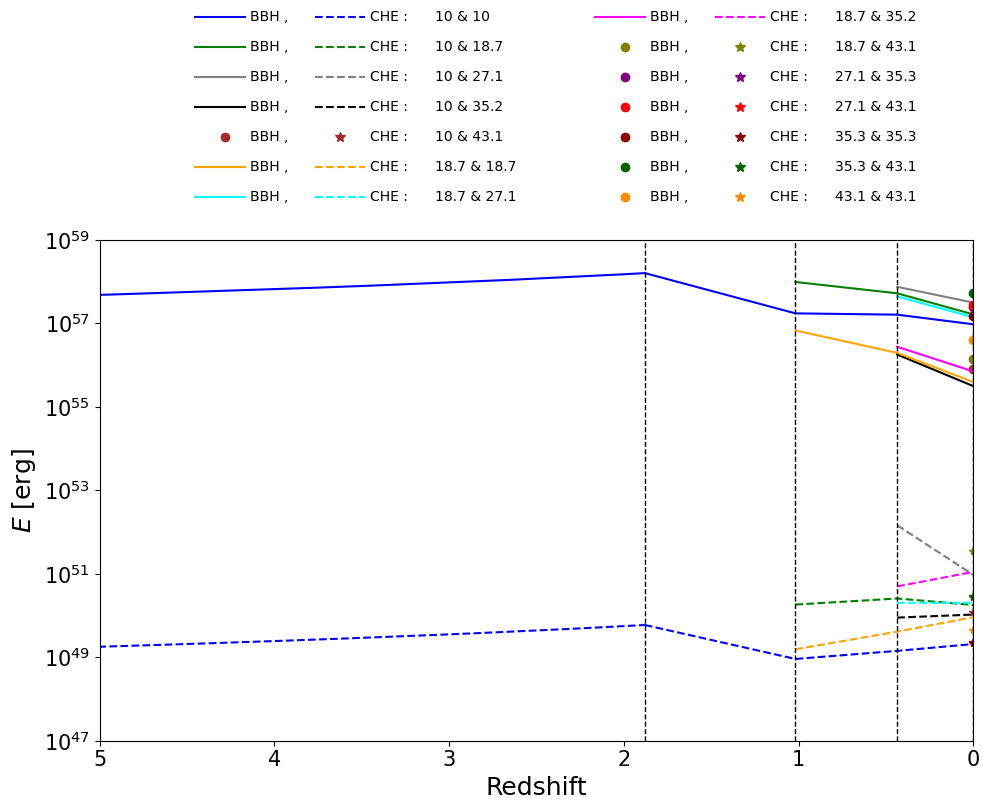

In [40]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))


plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[25:], E_dot_BBH_0[25:], color='blue')

# ================================
# Curvas reales (incluyendo slices de Z_PERIOD_tot)
# ================================
series_info = {
    "10 & 10":       ("blue",      (Z_PERIOD_tot,        EMISSION_GW_OF_BPBH),      (Z_PERIOD_tot,        EMISSION_GW_OF_CHES)),
    "10 & 18.7":     ("green",     (Z_PERIOD_tot[1:],    EMISSION_GW_BPBH_0G1G[1:]),(Z_PERIOD_tot[1:],    EMISSION_GW_CHES_0G1G[1:])),
    "10 & 27.1":     ("grey",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_a[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4])),    
    "10 & 35.2":     ("black",     (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_b[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4])),
#    "10 & 35.3":     ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_a)),
    "10 & 43.1":     ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_c)),
    "18.7 & 18.7":   ("orange",    (Z_PERIOD_tot[1:4],   EMISSION_GW_BPBH_1G1G[1:4]),(Z_PERIOD_tot[1:],    EMISSION_GW_CHES_1G1G[1:])),
    "18.7 & 27.1":   ("cyan",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_a[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4])),
    "18.7 & 35.2":   ("magenta",   (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_b[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4])),
#    "18.7 & 35.3":   ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_a)),
    "18.7 & 43.1":   ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_c)),
#    "27.1 & 27.1":   ("red",       (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_2G_a2G_a[2:4]),(Z_PERIOD_tot[2:4],EMISSION_GW_CHES_2G_a2G_a[2:4])),
    "27.1 & 35.3":   ("purple",    (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_a)),
    "27.1 & 43.1":   ("red",    (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_b)),
#    "43.3 & 43.3":   ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),    
    "35.3 & 35.3":   ("darkred",   (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_a)),
    "35.3 & 43.1":   ("darkgreen",   (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_b)),
    "43.1 & 43.1":   ("darkorange",(Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_b3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_b3G_b)),
#    "43.3 & 43.3":   ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),
}

# Dibujar curvas reales
for masses, (color, (z_bbh, bbh_data), (z_che, che_data)) in series_info.items():
    # --- BBH ---
    if len(bbh_data) > 1:
        ax.plot(z_bbh, bbh_data, color=color, linestyle='-')
    else:
        ax.plot(z_bbh, bbh_data, color=color, marker='o', linestyle='None')
    # --- CHE ---
    if len(che_data) > 1:
        ax.plot(z_che, che_data, color=color, linestyle='--')
    else:
        ax.plot(z_che, che_data, color=color, marker='*', linestyle='None')

# ================================
# Líneas verticales (periodos)
# ================================
for z in Z_PERIOD_tot:
    ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# ================================
# Leyenda personalizada fuera de la gráfica
# ================================
ncols = 2
nrows = (len(series_info) + ncols - 1) // ncols
start_y = 1.33
dy = 0.05

for i, (masses, (color, (z_bbh, bbh_data), (z_che, che_data))) in enumerate(series_info.items()):
    col = i // nrows
    row = i % nrows
    y = start_y - row*dy
    x = 0.20 + col*0.4

    # --- BBH ---
    if len(bbh_data) > 1:
        fig.add_artist(mlines.Line2D([x, x+0.05], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='-', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.03], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='o', linestyle='None', markersize=6))
    fig.text(x+0.055, y, "BBH ,", va="center", fontsize=10, transform=fig.transFigure)

    # --- CHE ---
    if len(che_data) > 1:
        fig.add_artist(mlines.Line2D([x+0.12, x+0.17], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='--', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.145], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='*', linestyle='None', markersize=7))
    fig.text(x+0.175, y, "CHE :", va="center", fontsize=10, transform=fig.transFigure)

    # --- Masas ---
    fig.text(x+0.24, y, masses, va="center", fontsize=10,
             color="black", transform=fig.transFigure)

# ================================
# Ajustes generales
# ================================
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$E$ [erg]', fontsize=18)
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([5.0, 0.0])
ax.set_ylim([1e47, 1e59])
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.savefig(
    'Updates/GW_power_vs_redshift_4epochs_10M_a.pdf',
    bbox_inches="tight"
)
plt.show()


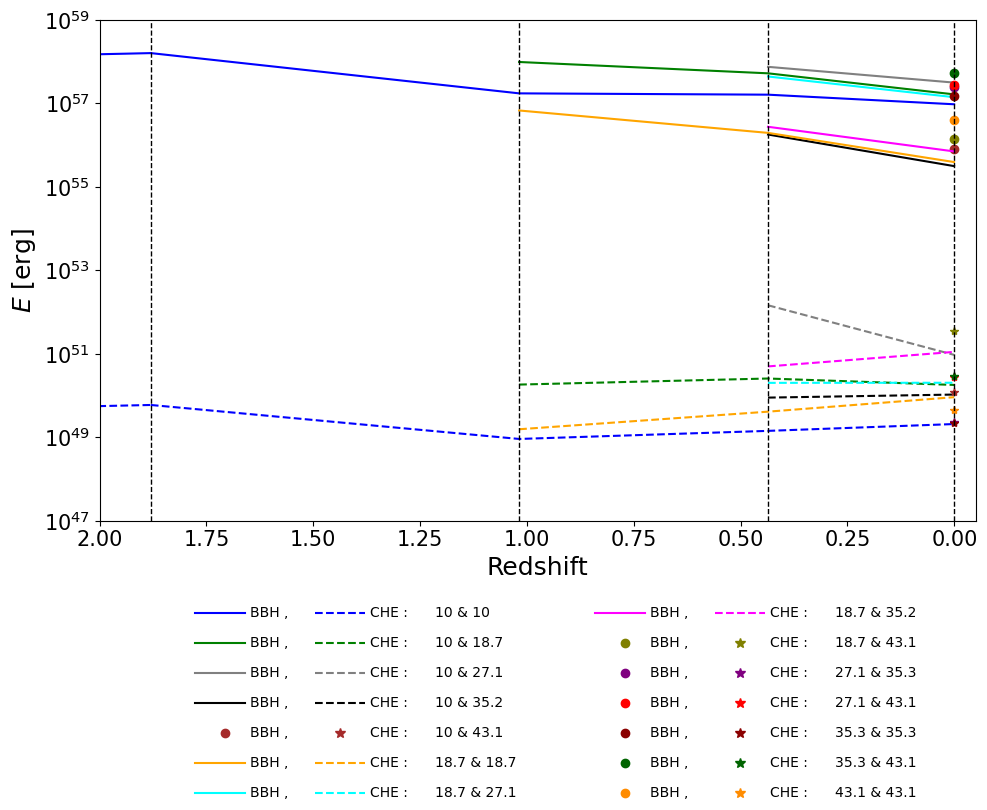

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))


plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[25:], E_dot_BBH_0[25:], color='blue')

# ================================
# Curvas reales (incluyendo slices de Z_PERIOD_tot)
# ================================
series_info = {
    "10 & 10":       ("blue",      (Z_PERIOD_tot,        EMISSION_GW_OF_BPBH),      (Z_PERIOD_tot,        EMISSION_GW_OF_CHES)),
    "10 & 18.7":     ("green",     (Z_PERIOD_tot[1:],    EMISSION_GW_BPBH_0G1G[1:]),(Z_PERIOD_tot[1:],    EMISSION_GW_CHES_0G1G[1:])),
    "10 & 27.1":     ("grey",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_a[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4])),    
    "10 & 35.2":     ("black",     (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_b[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4])),
#    "10 & 35.3":     ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_a)),
    "10 & 43.1":     ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_c)),
    "18.7 & 18.7":   ("orange",    (Z_PERIOD_tot[1:4],   EMISSION_GW_BPBH_1G1G[1:4]),(Z_PERIOD_tot[1:],    EMISSION_GW_CHES_1G1G[1:])),
    "18.7 & 27.1":   ("cyan",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_a[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4])),
    "18.7 & 35.2":   ("magenta",   (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_b[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4])),
#    "18.7 & 35.3":   ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_a)),
    "18.7 & 43.1":   ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_c)),
#    "27.1 & 27.1":   ("red",       (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_2G_a2G_a[2:4]),(Z_PERIOD_tot[2:4],EMISSION_GW_CHES_2G_a2G_a[2:4])),
    "27.1 & 35.3":   ("purple",    (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_a)),
    "27.1 & 43.1":   ("red",    (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_b)),
#    "43.3 & 43.3":   ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),    
    "35.3 & 35.3":   ("darkred",   (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_a)),
    "35.3 & 43.1":   ("darkgreen",   (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_b)),
    "43.1 & 43.1":   ("darkorange",(Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_b3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_b3G_b)),
#    "43.3 & 43.3":   ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),
}


# Dibujar curvas reales
for masses, (color, (z_bbh, bbh_data), (z_che, che_data)) in series_info.items():
    # --- BBH ---
    if len(bbh_data) > 1:
        ax.plot(z_bbh, bbh_data, color=color, linestyle='-')
    else:
        ax.plot(z_bbh, bbh_data, color=color, marker='o', linestyle='None')
    # --- CHE ---
    if len(che_data) > 1:
        ax.plot(z_che, che_data, color=color, linestyle='--')
    else:
        ax.plot(z_che, che_data, color=color, marker='*', linestyle='None')

# ================================
# Líneas verticales (periodos)
# ================================
for z in Z_PERIOD_tot:
    ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# ================================
# Leyenda personalizada fuera de la gráfica (debajo)
# ================================
ncols = 2
nrows = (len(series_info) + ncols - 1) // ncols
start_y = -0.03   # 👈 ahora por debajo
dy = 0.05

for i, (masses, (color, (z_bbh, bbh_data), (z_che, che_data))) in enumerate(series_info.items()):
    col = i // nrows
    row = i % nrows
    y = start_y - row*dy
    x = 0.20 + col*0.4

    # --- BBH ---
    if len(bbh_data) > 1:
        fig.add_artist(mlines.Line2D([x, x+0.05], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='-', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.03], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='o', linestyle='None', markersize=6))
    fig.text(x+0.055, y, "BBH ,", va="center", fontsize=10, transform=fig.transFigure)

    # --- CHE ---
    if len(che_data) > 1:
        fig.add_artist(mlines.Line2D([x+0.12, x+0.17], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='--', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.145], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='*', linestyle='None', markersize=7))
    fig.text(x+0.175, y, "CHE :", va="center", fontsize=10, transform=fig.transFigure)

    # --- Masas ---
    fig.text(x+0.24, y, masses, va="center", fontsize=10,
             color="black", transform=fig.transFigure)

# Ajustar márgenes
fig.subplots_adjust(bottom=0.25)
# ================================
# Ajustes generales
# ================================
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$E$ [erg]', fontsize=18)
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([2.0, -0.05])
ax.set_ylim([1e47, 1e59])
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.savefig(
    'Updates/GW_power_vs_redshift_4epochs_10M_b.pdf',
    bbox_inches="tight"
)
plt.show()


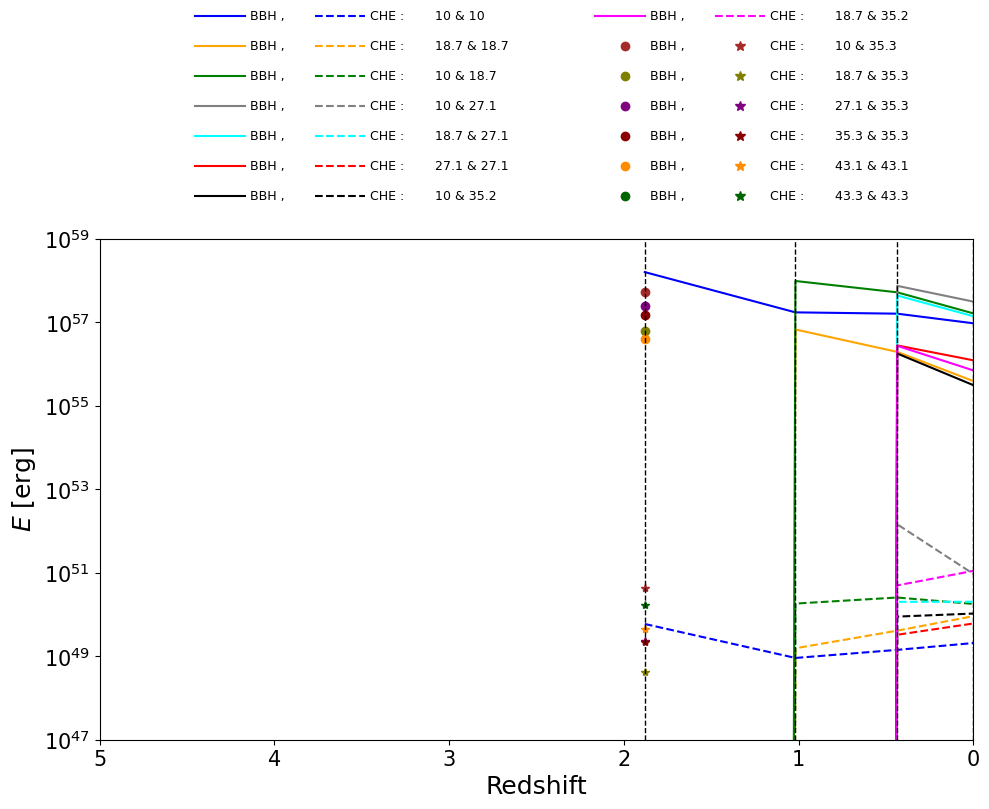

In [42]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))

# ================================
# Curvas reales
# ================================
series_info = {
    "10 & 10":       ("blue",       EMISSION_GW_OF_BPBH,     EMISSION_GW_OF_CHES),
    "18.7 & 18.7":   ("orange",     EMISSION_GW_BPBH_1G1G,   EMISSION_GW_CHES_1G1G),
    "10 & 18.7":     ("green",      EMISSION_GW_BPBH_0G1G,   EMISSION_GW_CHES_0G1G),
    "10 & 27.1":     ("grey",       EMISSION_GW_BPBH_0G2G_a, EMISSION_GW_CHES_0G2G_a),
    "18.7 & 27.1":   ("cyan",       EMISSION_GW_BPBH_1G2G_a, EMISSION_GW_CHES_1G2G_a),
    "27.1 & 27.1":   ("red",        EMISSION_GW_BPBH_2G_a2G_a, EMISSION_GW_CHES_2G_a2G_a),
    "10 & 35.2":     ("black",      EMISSION_GW_BPBH_0G2G_b, EMISSION_GW_CHES_0G2G_b),
    "18.7 & 35.2":   ("magenta",    EMISSION_GW_BPBH_1G2G_b, EMISSION_GW_CHES_1G2G_b),
    "10 & 35.3":     ("brown",      EMISSION_GW_BPBH_0G3G_a, EMISSION_GW_CHES_0G3G_a),
    "18.7 & 35.3":   ("olive",      EMISSION_GW_BPBH_1G3G_a, EMISSION_GW_CHES_1G3G_a),
    "27.1 & 35.3":   ("purple",     EMISSION_GW_BPBH_2G_a3G_a, EMISSION_GW_CHES_2G_a3G_a),
    "35.3 & 35.3":   ("darkred",    EMISSION_GW_BPBH_3G_a3G_a, EMISSION_GW_CHES_3G_a3G_a),
    "43.1 & 43.1":   ("darkorange", EMISSION_GW_BPBH_3G_b3G_b, EMISSION_GW_CHES_3G_b3G_b),
    "43.3 & 43.3":   ("darkgreen",  EMISSION_GW_BPBH_3G_c3G_c, EMISSION_GW_CHES_3G_c3G_c),
}

# Dibujar las curvas reales
for masses, (color, bbh_data, che_data) in series_info.items():
    # --- BBH ---
    if bbh_data is not None and len(bbh_data) > 0:
        if len(bbh_data) > 1:
            ax.plot(Z_PERIOD_tot[:len(bbh_data)], bbh_data, color=color, linestyle='-')
        else:
            ax.plot(Z_PERIOD_tot[:len(bbh_data)], bbh_data, color=color, marker='o', linestyle='None')
    # --- CHE ---
    if che_data is not None and len(che_data) > 0:
        if len(che_data) > 1:
            ax.plot(Z_PERIOD_tot[:len(che_data)], che_data, color=color, linestyle='--')
        else:
            ax.plot(Z_PERIOD_tot[:len(che_data)], che_data, color=color, marker='*', linestyle='None')

# ================================
# Líneas verticales (periodos)
# ================================
for z in Z_PERIOD_tot:
    ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# ================================
# Leyenda personalizada fuera de la gráfica
# ================================
ncols = 2
nrows = (len(series_info) + ncols - 1) // ncols
start_y = 1.33
dy = 0.05

for i, (masses, (color, bbh_data, che_data)) in enumerate(series_info.items()):
    col = i // nrows
    row = i % nrows
    y = start_y - row*dy
    x = 0.20 + col*0.4

    # --- BBH ---
    if bbh_data is not None and len(bbh_data) > 1:
        fig.add_artist(mlines.Line2D([x, x+0.05], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='-', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.03], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='o', linestyle='None', markersize=6))
    fig.text(x+0.055, y, "BBH ,", va="center", fontsize=9, transform=fig.transFigure)

    # --- CHE ---
    if che_data is not None and len(che_data) > 1:
        fig.add_artist(mlines.Line2D([x+0.12, x+0.17], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='--', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.145], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='*', linestyle='None', markersize=7))
    fig.text(x+0.175, y, "CHE :", va="center", fontsize=9, transform=fig.transFigure)

    # --- Masas ---
    fig.text(x+0.24, y, masses, va="center", fontsize=9,
             color="black", transform=fig.transFigure)


# ================================
# Ajustes generales
# ================================
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$E$ [erg]', fontsize=18)
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([5.0, 0.0])
ax.set_ylim([1e47, 1e59])
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.show()



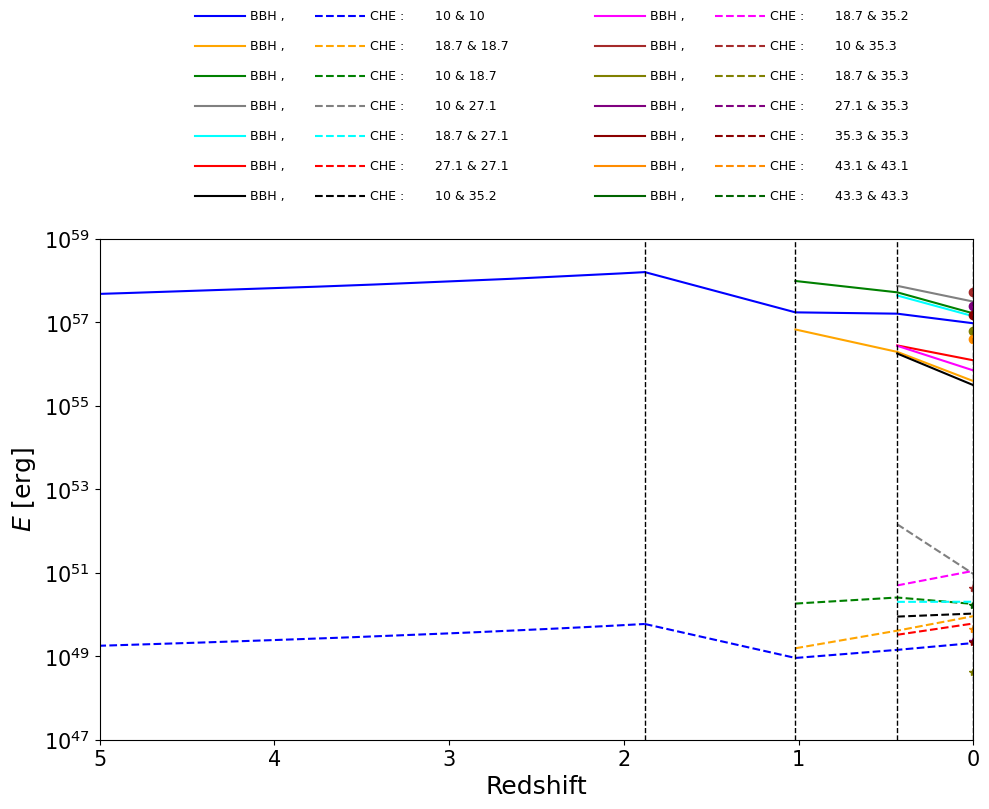

In [43]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))

# ================================
# Curvas reales
# ================================
# Periodo inicial
ax.plot(redshift_evaluated_0[4], E_dot_CHES_0[4], '*', linestyle='--', color='blue')
ax.plot(redshift_evaluated_0[25], E_dot_BBH_0[25], 'o', color='blue')
ax.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', color='blue')
ax.plot(redshift_evaluated_0[25:], E_dot_BBH_0[25:], color='blue')

# BPBHs
ax.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='blue', linestyle='-')
ax.plot(Z_PERIOD_tot[1:4], EMISSION_GW_BPBH_1G1G[1:4], color='orange', linestyle='-')
ax.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='green', linestyle='-')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_a[2:4], color='grey', linestyle='-')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_a[2:4], color='cyan', linestyle='-')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_2G_a2G_a[2:4], color='red', linestyle='-')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_b[2:4], color='black', linestyle='-')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_b[2:4], color='magenta', linestyle='-')

# 👇 combinaciones con un solo punto
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_0G3G_a, color='brown', linestyle='-', marker="o")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_1G3G_a, color='olive', linestyle='-', marker="o")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_2G_a3G_a, color='purple', linestyle='-', marker="o")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_a3G_a, color='darkred', linestyle='-', marker="o")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_b3G_b, color='darkorange', linestyle='-', marker="o")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_c3G_c, color='darkgreen', linestyle='-', marker="o")


# CHEs
ax.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--')
ax.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--')
ax.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='green', linestyle='--')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4], color='grey', linestyle='--')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4], color='cyan', linestyle='--')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4], color='red', linestyle='--')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4], color='black', linestyle='--')
ax.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4], color='magenta', linestyle='--')

# 👇 combinaciones con un solo punto
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_0G3G_a, color='brown', linestyle='--', marker="*")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_1G3G_a, color='olive', linestyle='--', marker="*")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_2G_a3G_a, color='purple', linestyle='--', marker="*")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_a3G_a, color='darkred', linestyle='--', marker="*")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_b3G_b, color='darkorange', linestyle='--', marker="*")
ax.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_c3G_c, color='darkgreen', linestyle='--', marker="*")


# Líneas verticales (periodos)
for i, z in enumerate(Z_PERIOD_tot):
    ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# ================================
# Leyenda personalizada fuera de la gráfica
# ================================
combos = [
    ("blue",       "10 & 10"),
    ("orange",     "18.7 & 18.7"),
    ("green",      "10 & 18.7"),
    ("grey",       "10 & 27.1"),
    ("cyan",       "18.7 & 27.1"),
    ("red",        "27.1 & 27.1"),
    ("black",      "10 & 35.2"),
    ("magenta",    "18.7 & 35.2"),
    ("brown",      "10 & 35.3"),
    ("olive",      "18.7 & 35.3"),
    ("purple",     "27.1 & 35.3"),
    ("darkred",    "35.3 & 35.3"),
    ("darkorange", "43.1 & 43.1"),
    ("darkgreen",  "43.3 & 43.3")
]

ncols = 2
nrows = (len(combos) + ncols - 1) // ncols
start_y = 1.33
dy = 0.05

# Marco de la leyenda
#x_min = 0.18
#x_max = 0.85
#y_max = start_y + 0.02
#y_min = start_y - (nrows-1)*dy - 0.04

#rect = mpatches.FancyBboxPatch(
#    (x_min, y_min), x_max-x_min, y_max-y_min,
#    transform=fig.transFigure,
#    boxstyle="round,pad=0.3",
#    edgecolor="black",
#    facecolor="white",
#    linewidth=1.2,
#    alpha=1.0
#)
#fig.patches.append(rect)

# Entradas de la leyenda
for i, (color, masses) in enumerate(combos):
    col = i // nrows
    row = i % nrows
    y = start_y - row*dy
    x = 0.20 + col*0.4

    fig.lines.append(mlines.Line2D([x, x+0.05], [y, y],
                                   transform=fig.transFigure,
                                   color=color, linestyle='-', linewidth=1.5))
    fig.text(x+0.055, y, "BBH ,", va="center", fontsize=9,
             transform=fig.transFigure)

    fig.lines.append(mlines.Line2D([x+0.12, x+0.17], [y, y],
                                   transform=fig.transFigure,
                                   color=color, linestyle='--', linewidth=1.5))
    fig.text(x+0.175, y, "CHE :", va="center", fontsize=9,
             transform=fig.transFigure)

    fig.text(x+0.24, y, masses, va="center", fontsize=9,
             color="black", transform=fig.transFigure)

# ================================
# Ajustes generales
# ================================
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$E$ [erg]', fontsize=18)
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([5.0, 0.0])
ax.set_ylim([1e47, 1e59])
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.show()



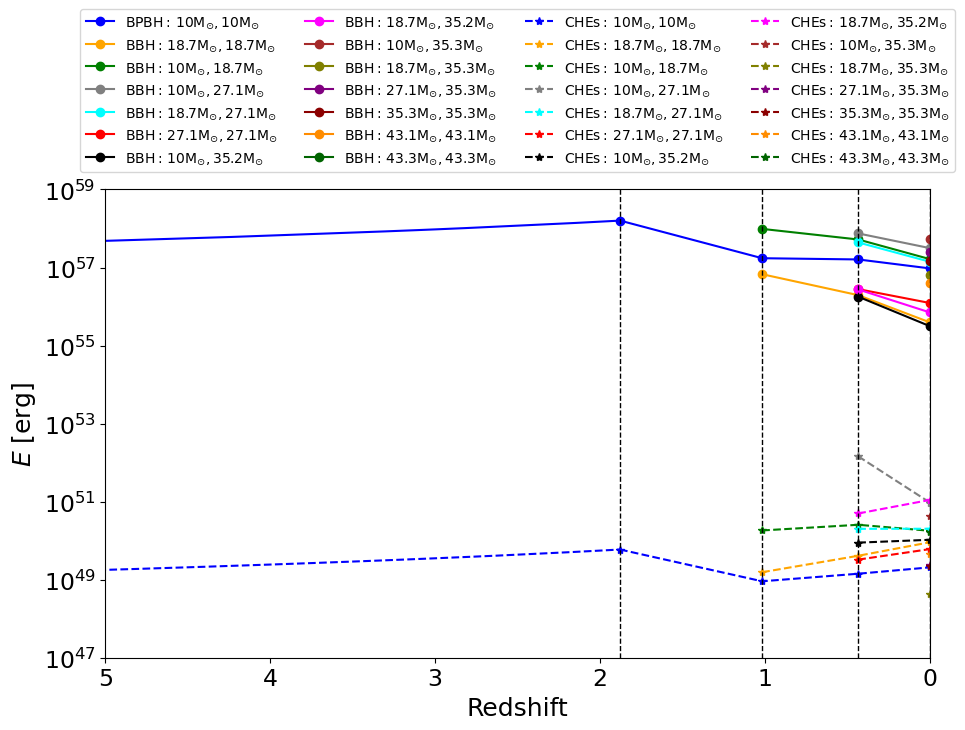

In [44]:
# --- Graficado ---
plt.figure(figsize=(10, 8))

# ================================
# Periodo inicial
# ================================
plt.plot(redshift_evaluated_0[4], E_dot_CHES_0[4], '*', linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[25], E_dot_BBH_0[25], 'o', color='blue')
plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[25:], E_dot_BBH_0[25:], color='blue')

# ================================
# BPBHs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='blue', marker='o',
         label=r'${\rm BPBH: \, 10M_{\odot},10M_{\odot}}$')

plt.plot(Z_PERIOD_tot[1:4], EMISSION_GW_BPBH_1G1G[1:4], color='orange', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='green', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_a[2:4], color='grey', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_a[2:4], color='cyan', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_2G_a2G_a[2:4], color='red', marker='o',
         label=r'${\rm BBH: \, 27.1M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_b[2:4], color='black', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},35.2M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_b[2:4], color='magenta', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},35.2M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_0G3G_a, color='brown', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_1G3G_a, color='olive', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_2G_a3G_a, color='purple', marker='o',
         label=r'${\rm BBH: \, 27.1M_{\odot},35.3M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_a3G_a, color='darkred', marker='o',
         label=r'${\rm BBH: \, 35.3M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_b3G_b, color='darkorange', marker='o',
         label=r'${\rm BBH: \, 43.1M_{\odot},43.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_c3G_c, color='darkgreen', marker='o',
         label=r'${\rm BBH: \, 43.3M_{\odot},43.3M_{\odot}}$')



# ================================
# CHEs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},10M_{\odot}}$')

plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='green', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4], color='grey', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4], color='cyan', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4], color='red', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 27.1M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4], color='black', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},35.2M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4], color='magenta', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},35.2M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_0G3G_a, color='brown', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_1G3G_a, color='olive', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_2G_a3G_a, color='purple', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 27.1M_{\odot},35.3M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_a3G_a, color='darkred', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 35.3M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_b3G_b, color='darkorange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 43.1M_{\odot},43.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_c3G_c, color='darkgreen', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 43.3M_{\odot},43.3M_{\odot}}$')



# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)


# ================================
# Ajustes de gráfico
# ================================
plt.gca().invert_xaxis()
plt.xlim([5.0,0.0])
plt.ylim([1e47,1e59])
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(
    fontsize=10,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.4),
    ncol=4
)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4epochs_10M_a.pdf')
plt.show()


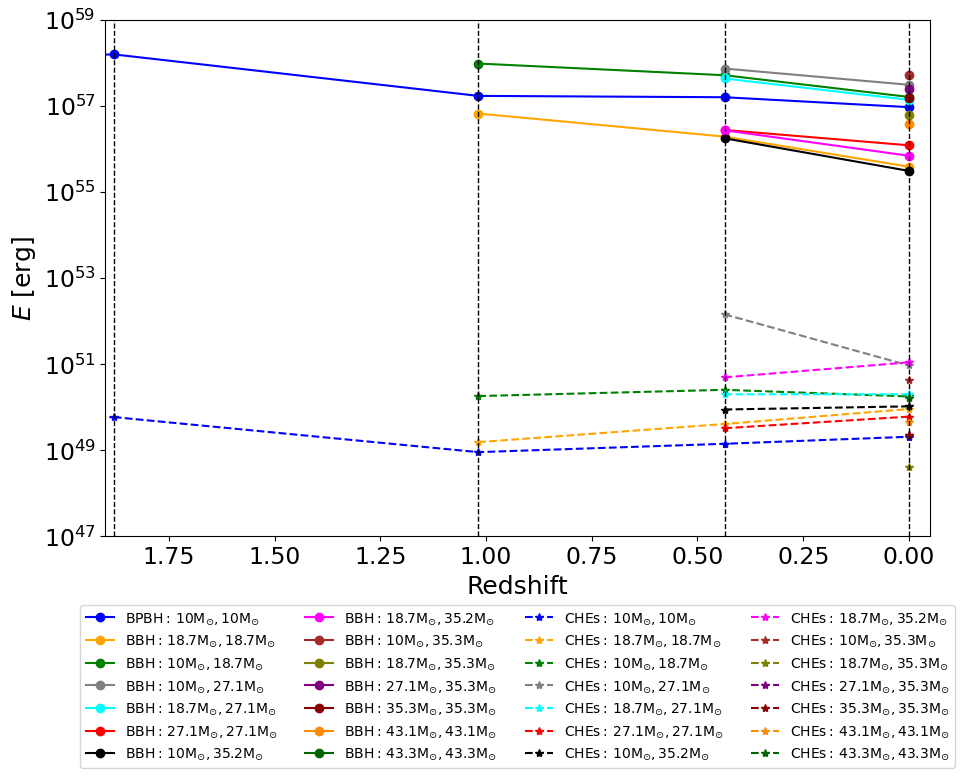

In [45]:
# --- Graficado ---
plt.figure(figsize=(10, 8))

# ================================
# Periodo inicial
# ================================
plt.plot(redshift_evaluated_0[4], E_dot_CHES_0[4], '*', linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[24], E_dot_BBH_0[24], 'o', color='blue')
plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[24:], E_dot_BBH_0[24:], color='blue')


# ================================
# BPBHs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='blue', marker='o',
         label=r'${\rm BPBH: \, 10M_{\odot},10M_{\odot}}$')

plt.plot(Z_PERIOD_tot[1:4], EMISSION_GW_BPBH_1G1G[1:4], color='orange', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='green', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_a[2:4], color='grey', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_a[2:4], color='cyan', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_2G_a2G_a[2:4], color='red', marker='o',
         label=r'${\rm BBH: \, 27.1M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_b[2:4], color='black', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},35.2M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_b[2:4], color='magenta', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},35.2M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_0G3G_a, color='brown', marker='o',
         label=r'${\rm BBH: \, 10M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_1G3G_a, color='olive', marker='o',
         label=r'${\rm BBH: \, 18.7M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_2G_a3G_a, color='purple', marker='o',
         label=r'${\rm BBH: \, 27.1M_{\odot},35.3M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_a3G_a, color='darkred', marker='o',
         label=r'${\rm BBH: \, 35.3M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_b3G_b, color='darkorange', marker='o',
         label=r'${\rm BBH: \, 43.1M_{\odot},43.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_c3G_c, color='darkgreen', marker='o',
         label=r'${\rm BBH: \, 43.3M_{\odot},43.3M_{\odot}}$')



# ================================
# CHEs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},10M_{\odot}}$')

plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='green', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},18.7M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4], color='grey', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4], color='cyan', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4], color='red', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 27.1M_{\odot},27.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4], color='black', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},35.2M_{\odot}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4], color='magenta', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},35.2M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_0G3G_a, color='brown', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 10M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_1G3G_a, color='olive', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 18.7M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_2G_a3G_a, color='purple', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 27.1M_{\odot},35.3M_{\odot}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_a3G_a, color='darkred', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 35.3M_{\odot},35.3M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_b3G_b, color='darkorange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 43.1M_{\odot},43.1M_{\odot}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_c3G_c, color='darkgreen', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, 43.3M_{\odot},43.3M_{\odot}}$')



# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)


# ================================
# Ajustes de gráfico
# ================================
plt.gca().invert_xaxis()
plt.xlim([1.9,-0.05])
plt.ylim([1e47,1e59])
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(
    fontsize=10,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=4
)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4epochs_10M_b.pdf')
plt.show()

In [46]:
print(Z_PERIOD_tot)

[1.8799821607349443, 1.0182487857747407, 0.4359694009926572, 0.000607379747213718]


In [47]:
print(E_dot_BBH_0, EMISSION_GW_OF_BPBH)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.06959558e+56 9.47169587e+56 9.78444055e+56
 1.02758965e+57 1.05886411e+57 1.09907414e+57 1.13928417e+57
 1.17502642e+57 1.21523645e+57 1.25097870e+57 1.28672095e+57
 1.33139876e+57 1.37160879e+57 1.39841548e+57 1.43862551e+57
 1.47883553e+57 1.51457778e+57 1.55478781e+57 1.59499784e+57
 1.63074009e+57 1.67095012e+57 1.70669237e+57 1.74690240e+57
 1.78711243e+57 1.82285468e+57 1.84966136e+57 1.88987139e+57
 1.93901699e+57 1.97475923e+57 2.01050148e+57 2.05071151e+57
 2.08198598e+57 2.12666379e+57 2.16240604e+57 2.20261607e+57
 2.23389054e+57 2.27856835e+57 2.31431060e+57 2.35005284e+57
 2.38579509e+57 2.426005

In [48]:
E_tot_10M_BPBH = np.concatenate([E_dot_BBH_0, EMISSION_GW_OF_BPBH])


E_tot_10M_CHEs = np.concatenate([E_dot_CHES_0, EMISSION_GW_OF_CHES])

print(E_tot_10M_CHEs)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.21410674e+47 5.65307002e+47 6.98925020e+47 8.42821348e+47
 9.86717676e+47 1.14089231e+48 1.26423202e+48 1.40812835e+48
 1.57258130e+48 1.69592100e+48 1.83981733e+48 1.98371366e+48
 2.11733168e+48 2.28178462e+48 2.39484603e+48 2.52846404e+48
 2.68263868e+48 2.83681332e+48 2.96015303e+48 3.10404935e+48
 3.25822399e+48 3.39184201e+48 3.52546003e+48 3.66935636e+48
 3.80297437e+48 3.94687070e+48 4.10104534e+48 4.21410674e+48
 4.36828138e+48 4.51217770e+48 4.65607403e+48 4.79997036e+48
 4.94386669e+48 5.06720640e+48 5.22138103e+48 5.36527736e+48
 5.50917369e+48 5.64279171e+48 5.78668804e+48 5.93058436e+48
 6.08475900e+48 6.20809871e+48 6.35199504e+48 6.48561306e+48
 6.66034431e+48 6.78368402e+48 6.91730204e+48 7.05092006e+48
 7.20509469e+48 7.33871271e+48 7.48260904e+48 7.60594875e+48
 7.77040170e+48 7.91429802e+48 8.05819435e+48 8.17125575e+48
 8.32543039e+48 8.47960502e+48 8.60294473e+48 8.74684106e+48
 8.89073739e+48 9.034633

In [49]:
E_tot_1M_BPBH = np.array([0.0, 0.0, 0.0, 0.0, 1.13483655563465e+56, 
                          1.5146046943312846e+56, 1.8943728330279194e+56, 2.2786088321798093e+56, 2.662844831331698e+56, 3.0292093886625688e+56, 3.4134453878144584e+56, 3.784277805600585e+56, 4.168513804752474e+56, 4.557217664359618e+56, 4.923582221690489e+56, 5.3078182208423785e+56, 5.6920542199942665e+56, 6.067354498235646e+56, 6.442654776477027e+56, 6.822422915173662e+56, 7.202191053870297e+56, 7.586427053022187e+56, 7.961727331263567e+56, 8.341495469960202e+56, 8.72573146911209e+56, 9.101031747353472e+56, 9.480799886050108e+56, 9.865035885201995e+56, 1.0231400442532868e+57, 1.0615636441684755e+57, 1.099540458038139e+57, 1.137070485862277e+57, 1.1750472997319406e+57, 1.2148112577837056e+57, 1.2514477135167929e+57, 1.2889777413409309e+57, 1.3274013412561198e+57, 1.364931369080258e+57, 1.4033549689954468e+57, 1.4404382107740594e+57, 1.4784150246437232e+57, 1.5159450524678611e+57, 1.5548154384285755e+57, 1.5932390383437644e+57, 1.6312158522134274e+57, 1.6674055219009895e+57, 1.7062759078617038e+57, 1.7446995077768927e+57, 1.7817827495555056e+57, 1.8202063494706944e+57, 1.8586299493858833e+57, 1.8957131911644962e+57, 1.9332432189886342e+57, 1.9716668189038227e+57, 2.0096436327734862e+57, 2.04762044664315e+57, 2.085597260512813e+57, 2.123127288336951e+57, 2.1611041022066145e+57, 2.1995277021218034e+57, 2.2375045159914665e+57, 2.2754813298611306e+57, 2.312564571639743e+57, 2.350988171554932e+57, 2.3889649854245955e+57, 2.4260482272032077e+57, 2.464471827118397e+57, 2.5028954270335858e+57, 2.5404254548577238e+57, 2.5788490547729127e+57, 2.616825868642576e+57, 2.6539091104211886e+57, 2.6923327103363775e+57, 2.7307563102515668e+57, 2.7678395520301793e+57, 2.8053695798543173e+57, 2.8428996076784553e+57, 2.8813232075936442e+57, 2.920193593554359e+57, 2.9577236213784972e+57, 2.9961472212936857e+57, 3.033677249117824e+57, 3.0707604908964363e+57, 3.109630876857151e+57, 3.1476076907268144e+57, 3.1851377185509524e+57, 3.222220960329564e+57, 3.260644560244753e+57, 3.298174588068892e+57, 3.3374917600751316e+57, 3.375468573944795e+57, 3.412551815723407e+57, 3.4500818435475456e+57, 3.4885054434627344e+57, 3.5264822573323986e+57, 3.564459071202062e+57, 3.6019890990262e+57, 3.640412698941389e+57, 3.6774959407200014e+57, 3.715472754589665e+57, 3.753896354504854e+57, 3.792319954420043e+57, 3.8298499822441806e+57, 3.86827358215937e+57, 3.905356823937982e+57, 3.9433336378076455e+57, 3.98220402376836e+57, 4.019734051592498e+57, 4.0568172933711104e+57, 4.0947941072407745e+57, 4.132770921110437e+57, 4.170747734980101e+57, 4.2082777628042394e+57, 4.2467013627194276e+57, 4.285571748680142e+57, 4.322654990458755e+57, 4.360631804328418e+57, 4.398608618198081e+57, 4.436585432067745e+57, 4.4745622459374075e+57, 4.512539059807072e+57, 4.549622301585684e+57, 4.5871523294098236e+57, 4.6264695014160626e+57, 4.664446315285726e+57, 4.701976343109864e+57, 4.7399531569795275e+57, 4.7774831848036655e+57, 4.815459998673329e+57, 4.853436812542992e+57, 4.891413626412656e+57, 4.929390440282319e+57, 4.9673672541519834e+57, 5.004897281976121e+57, 5.042874095845785e+57, 5.0808509097154476e+57, 5.119274509630637e+57, 5.1572513235003e+57, 5.194781351324438e+57, 5.232758165194101e+57, 5.270734979063765e+57, 5.3091585789789536e+57, 5.346688606803092e+57, 5.3842186346272296e+57, 5.421748662451368e+57, 5.459725476321032e+57, 5.4977022901906945e+57, 5.5356791040603586e+57, 5.5741027039755475e+57, 5.61207951784521e+57, 5.650056331714875e+57, 5.688033145584538e+57, 5.7264567454997274e+57, 5.763539987278339e+57, 5.801516801148004e+57, 5.839493615017667e+57, 5.877023642841805e+57, 5.915000456711469e+57, 5.952530484535607e+57, 5.990954084450795e+57, 6.029377684365985e+57, 6.067354498235648e+57, 6.105331312105311e+57, 6.142861339929449e+57, 6.1803913677535876e+57, 6.2188149676687764e+57, 6.2563449954929144e+57, 6.294321809362578e+57, 6.331851837186715e+57, 6.370275437101905e+57, 6.408252250971567e+57, 6.44622906484123e+57, 6.48465266475642e+57, 6.522629478626083e+57, 6.559712720404696e+57, 6.598136320319885e+57, 6.635219562098497e+57, 6.673643162013687e+57, 6.711173189837824e+57, 6.749150003707488e+57, 6.787126817577151e+57, 6.824656845401288e+57, 6.863527231362005e+57, 6.901950831277193e+57, 6.939034073055805e+57, 6.976564100879943e+57, 7.01543448684066e+57, 7.052964514664797e+57, 7.090494542488934e+57, 7.128471356358599e+57, 7.166894956273787e+57, 7.2039781980524e+57, 7.241955011922063e+57, 7.280378611837252e+57, 7.317461853615866e+57, 7.356779025622105e+57, 7.394755839491767e+57, 7.432285867315906e+57, 7.469815895140045e+57, 7.507345922964182e+57, 7.54576952287937e+57, 7.58329955070351e+57, 7.621276364573173e+57, 7.659699964488361e+57, 7.697229992312499e+57, 7.735206806182164e+57, 7.773630406097352e+57, 7.81205400601254e+57, 7.850030819882203e+57, 7.886220489569766e+57, 7.924644089484955e+57, 7.962174117309092e+57, 8.00059771722428e+57, 8.03902131713947e+57, 8.076104558918083e+57, 8.114081372787746e+57, 8.15205818665741e+57, 8.1904817865726e+57, 8.228905386487788e+57, 8.2659886282664e+57, 8.30441222818159e+57, 8.341495469960201e+57, 8.379919069875391e+57, 8.41834266979058e+57, 8.456319483660243e+57, 8.49384951148438e+57, 8.530932753262994e+57, 8.568909567132657e+57, 8.607333167047845e+57, 8.64530998091751e+57, 8.683286794787173e+57, 8.721710394702361e+57, 8.758793636480974e+57, 8.797217236396163e+57, 8.835194050265827e+57, 8.872724078089964e+57, 8.910254105914101e+57, 8.949124491874815e+57, 8.986654519698956e+57, 9.024184547523094e+57, 9.062608147438282e+57, 9.100584961307945e+57, 9.139008561223134e+57, 9.176538589047274e+57, 9.213621830825886e+57, 9.251598644695549e+57, 9.289575458565212e+57, 9.327552272434876e+57, 9.365975872350064e+57, 9.403505900174203e+57, 9.441482714043865e+57, 9.479906313959055e+57, 9.517436341783194e+57, 9.555859941698382e+57, 9.593836755568045e+57, 9.630919997346658e+57, 9.668450025170795e+57, 9.706873625085983e+57, 9.745297225001174e+57, 9.783274038870837e+57, 9.8212508527405e+57, 9.858334094519113e+57, 9.896310908388776e+57, 9.934734508303967e+57, 9.972264536128104e+57, 1.0011134922088818e+58, 1.0047771377821904e+58, 1.0086194977737095e+58, 1.0124618577652283e+58, 1.016214860547642e+58, 1.0200125419346083e+58, 1.0238549019261274e+58, 1.0275632261039886e+58, 1.0313162288864023e+58, 1.0351585888779213e+58, 1.0389562702648876e+58, 1.0427539516518538e+58, 1.0465516330388203e+58, 1.0503493144257867e+58, 1.0541023172082004e+58, 1.0579446771997194e+58, 1.0616976799821331e+58, 1.0654953613690994e+58, 1.0692483641515134e+58, 1.0730460455384796e+58, 1.076933084134551e+58, 1.0805967297078597e+58, 1.0844390896993787e+58, 1.0883261282954501e+58, 1.0920344524733114e+58, 1.0958321338602777e+58, 1.0995851366426914e+58, 1.1033828180296579e+58, 1.1071804994166243e+58, 1.1110675380126956e+58, 1.1148205407951095e+58, 1.1185288649729707e+58, 1.1223712249644895e+58, 1.1261689063514558e+58, 1.1299219091338699e+58, 1.1337195905208362e+58, 1.1346578412164396e+58, 1.1356407705165956e+58, 1.1365343426076465e+58, 1.1374725933032499e+58, 1.1383661653943008e+58, 1.1392597374853517e+58, 1.1401533095764026e+58, 1.1411362388765586e+58, 1.1419404537585044e+58, 1.1430127402677656e+58, 1.1438616337542639e+58, 1.144755205845315e+58, 1.1456934565409184e+58, 1.1465870286319693e+58, 1.1475252793275727e+58, 1.1484635300231761e+58, 1.1494017807187796e+58, 1.150340031414383e+58, 1.1512782821099864e+58, 1.1521271755964848e+58, 1.1530207476875357e+58, 1.1540483555922442e+58, 1.1548972490787425e+58, 1.155835499774346e+58, 1.1566843932608443e+58, 1.1576226439564477e+58, 1.1585608946520512e+58, 1.1594544667431023e+58, 1.1603927174387059e+58, 1.1613309681343093e+58, 1.1621798616208077e+58, 1.1632074695255162e+58, 1.1640563630120145e+58, 1.1649499351030654e+58, 1.1659328644032214e+58, 1.1668264364942723e+58, 1.1677200085853232e+58, 1.1686582592809268e+58, 1.1696411885810827e+58, 1.1704900820675811e+58, 1.1714283327631845e+58, 1.1723219048542354e+58, 1.1732154769452863e+58, 1.1742430848499948e+58, 1.1750472997319406e+58, 1.1760749076366493e+58, 1.176879122518595e+58, 1.177862051818751e+58, 1.178755623909802e+58, 1.1796491960008528e+58, 1.1805874466964563e+58, 1.1815703759966124e+58, 1.1824639480876633e+58, 1.1833575201787141e+58, 1.1842064136652125e+58, 1.1851893429653685e+58, 1.1861275936609719e+58, 1.1870658443565753e+58, 1.1879147378430737e+58, 1.1887636313295722e+58, 1.1898359178388332e+58, 1.1906848113253316e+58, 1.191623062020935e+58, 1.192605991321091e+58, 1.1934548848075893e+58, 1.1944378141077453e+58, 1.1952867075942436e+58, 1.1962249582898471e+58, 1.197118530380898e+58, 1.1980567810765014e+58, 1.1989503531675523e+58, 1.1999332824677084e+58, 1.2008268545587593e+58, 1.2017204266498103e+58, 1.2026139987408612e+58, 1.2035522494364646e+58, 1.2045351787366206e+58, 1.2054287508276715e+58, 1.2062776443141698e+58, 1.2072158950097733e+58, 1.2081541457053767e+58, 1.2090477177964276e+58, 1.2100306470965836e+58, 1.2109242191876346e+58, 1.211773112674133e+58, 1.2128007205788415e+58, 1.2136496140653398e+58, 1.2145878647609432e+58, 1.2155261154565467e+58, 1.2164196875475976e+58, 1.2173132596386484e+58, 1.218340867543357e+58, 1.2191897610298553e+58, 1.2201280117254587e+58, 1.2210662624210622e+58, 1.2219151559075607e+58, 1.2228980852077166e+58, 1.223746978694215e+58, 1.2247745865989235e+58, 1.2255788014808693e+58, 1.2264723735719202e+58, 1.2274553028720762e+58, 1.2283935535676796e+58, 1.2292871256587305e+58, 1.2302253763543339e+58, 1.2311636270499374e+58, 1.2321018777455408e+58, 1.2330401284411445e+58, 1.2339337005321954e+58, 1.2347379154141412e+58, 1.2357655233188497e+58, 1.2366590954099006e+58, 1.237597346105504e+58, 1.2384909181965549e+58, 1.2393398116830534e+58, 1.2402780623786568e+58, 1.2412609916788128e+58, 1.2421545637698637e+58, 1.2431374930700197e+58, 1.243986386556518e+58, 1.2448799586475689e+58, 1.2457288521340672e+58, 1.2468011386433283e+58, 1.2476500321298267e+58, 1.2485882828254301e+58, 1.2494371763119284e+58, 1.2504201056120844e+58, 1.2514030349122405e+58, 1.2522519283987389e+58, 1.2531901790943423e+58, 1.2540837511853935e+58, 1.2550220018809969e+58, 1.2559602525766002e+58, 1.2568985032722036e+58, 1.2577027181541494e+58, 1.2586409688497529e+58, 1.2596685767544614e+58, 1.2605174702409597e+58, 1.2614557209365632e+58, 1.262349293027614e+58, 1.2632875437232175e+58, 1.2641364372097158e+58, 1.2651193665098718e+58, 1.2660576172054752e+58, 1.266951189296526e+58, 1.2678000827830245e+58, 1.2687830120831804e+58, 1.2697659413833364e+58, 1.2707041920789398e+58, 1.2715530855654382e+58, 1.2724913362610416e+58, 1.2733402297475402e+58, 1.2743678376522488e+58, 1.2752614097432996e+58, 1.2760656246252454e+58, 1.2770485539254014e+58, 1.2779421260164523e+58, 1.2788803767120557e+58, 1.2799079846167643e+58, 1.2806675208941575e+58, 1.281695128798866e+58, 1.2825440222853644e+58, 1.2834822729809678e+58, 1.2843758450720187e+58, 1.2853587743721747e+58, 1.286207667858673e+58, 1.2871459185542765e+58, 1.2879948120407748e+58, 1.2890224199454833e+58, 1.2899159920365342e+58, 1.2908095641275854e+58, 1.2917478148231888e+58, 1.2926860655187922e+58, 1.2936243162143957e+58, 1.294562566909999e+58, 1.2954114603964975e+58, 1.2962603538829958e+58, 1.2972879617877043e+58, 1.2982708910878603e+58, 1.299075105969806e+58, 1.300058035269962e+58, 1.300862250151908e+58, 1.3018451794520638e+58, 1.3027834301476673e+58, 1.3036770022387182e+58, 1.3046152529343216e+58, 1.305553503629925e+58, 1.306447075720976e+58, 1.307340647812027e+58, 1.308323577112183e+58, 1.309217149203234e+58, 1.31020007850339e+58, 1.3110489719898883e+58, 1.3120319012900442e+58, 1.312925473381095e+58, 1.3137743668675935e+58, 1.314712617563197e+58, 1.3156508682588006e+58, 1.316589118954404e+58, 1.3175273696500075e+58, 1.3184209417410584e+58, 1.3193145138321093e+58, 1.3202527645277127e+58, 1.321191015223316e+58, 1.3220399087098145e+58, 1.3229334808008654e+58, 1.323961088705574e+58, 1.3248099821920722e+58, 1.325703554283123e+58, 1.3266418049787265e+58, 1.32758005567433e+58, 1.3285183063699334e+58, 1.3294118784609843e+58, 1.3303948077611403e+58, 1.3312437012476386e+58, 1.332226630547795e+58, 1.3330755240342932e+58, 1.3340137747298967e+58, 1.3349073468209475e+58, 1.3358902761211035e+58, 1.336828526816707e+58, 1.3376774203032053e+58, 1.3386156709988087e+58, 1.3395539216944122e+58, 1.3404028151809105e+58, 1.3413857444810665e+58, 1.3422346379675648e+58, 1.3432175672677208e+58, 1.3441558179633242e+58, 1.3450047114498226e+58, 1.3458982835408735e+58, 1.3469258914455823e+58, 1.3477747849320806e+58, 1.348713035627684e+58, 1.34969596492784e+58, 1.350589537018891e+58, 1.3514384305053892e+58, 1.3524660384100978e+58, 1.3532702532920436e+58, 1.3542531825921995e+58, 1.355102076078698e+58, 1.3561296839834064e+58, 1.3569785774699048e+58, 1.357827470956403e+58, 1.358810400256559e+58, 1.3597486509521625e+58, 1.3606422230432134e+58, 1.3615804737388168e+58, 1.3625187244344203e+58, 1.363322939316366e+58, 1.364305868616522e+58, 1.3652887979166783e+58, 1.3661376914031766e+58, 1.3671652993078852e+58, 1.3679248355852784e+58, 1.3689077648854347e+58, 1.369846015581038e+58, 1.3707842662766415e+58, 1.3716778383676924e+58, 1.3725714104587433e+58, 1.3734649825497942e+58, 1.3744925904545027e+58, 1.3753861625455536e+58, 1.3762797346366045e+58, 1.3771286281231028e+58, 1.3781562360278114e+58, 1.3790498081188622e+58, 1.379943380209913e+58, 1.380836952300964e+58, 1.381730524392015e+58, 1.382713453692171e+58, 1.3835623471786692e+58, 1.3845005978742727e+58, 1.3855282057789812e+58, 1.3862877420563744e+58, 1.387315349961083e+58, 1.3881642434475813e+58, 1.3891471727477376e+58, 1.3900407448387884e+58, 1.390978995534392e+58, 1.3918725676254428e+58, 1.3928108183210462e+58, 1.3937937476212022e+58, 1.3946426411077005e+58, 1.3955362131987514e+58, 1.3964297852898023e+58, 1.3974573931945108e+58, 1.3983509652855617e+58, 1.3992892159811657e+58, 1.400138109467664e+58, 1.4010763601632675e+58, 1.4019699322543184e+58, 1.4029528615544743e+58, 1.4038464336455252e+58, 1.404740005736576e+58, 1.4056782564321795e+58, 1.406616507127783e+58, 1.4074654006142813e+58, 1.4084036513098848e+58, 1.4093419020054882e+58, 1.410235474096539e+58, 1.4112630820012476e+58, 1.412111975487746e+58, 1.4130055475787968e+58, 1.4139884768789528e+58, 1.4147926917608986e+58, 1.415820299665607e+58, 1.4167585503612106e+58, 1.417696801056814e+58, 1.4185010159387598e+58, 1.419394588029811e+58, 1.420377517329967e+58, 1.4213157680255704e+58, 1.4221646615120687e+58, 1.4231029122076721e+58, 1.4240411629032756e+58, 1.424979413598879e+58, 1.42587298568993e+58, 1.4268112363855333e+58, 1.427615451267479e+58, 1.4286430591721876e+58, 1.4296259884723436e+58, 1.430474881958842e+58, 1.431457811258998e+58, 1.4322620261409437e+58, 1.4332002768365472e+58, 1.4341832061367032e+58, 1.4350320996232015e+58, 1.43605970752791e+58, 1.4368639224098558e+58, 1.4378021731054592e+58, 1.4386510665919576e+58, 1.439723353101219e+58, 1.4405722465877173e+58, 1.4414658186787682e+58, 1.4424040693743716e+58, 1.443342320069975e+58, 1.4442805707655785e+58, 1.4451294642520768e+58, 1.4460230363431277e+58, 1.446961287038731e+58, 1.447854859129782e+58, 1.4488824670344908e+58, 1.4498207177300942e+58, 1.45062493261204e+58, 1.451607861912196e+58, 1.4525461126077995e+58, 1.4534396846988503e+58, 1.4543779353944538e+58, 1.4553161860900572e+58, 1.456209758181108e+58, 1.457013973063054e+58, 1.458086259572315e+58, 1.4589351530588133e+58, 1.4598734037544167e+58, 1.460722297240915e+58, 1.4617052265410713e+58, 1.4626881558412273e+58, 1.4635370493277257e+58, 1.4644306214187765e+58, 1.4653241935098274e+58, 1.466262444205431e+58, 1.4672006949010343e+58, 1.4681389455966377e+58, 1.4690325176876886e+58, 1.4699260897787395e+58, 1.4709090190788955e+58, 1.4717579125653938e+58, 1.472830199074655e+58, 1.4735897353520481e+58, 1.474572664652204e+58, 1.475466236743255e+58, 1.476359808834306e+58, 1.4772980595299093e+58, 1.4782809888300653e+58, 1.4791298823165637e+58, 1.480068133012167e+58, 1.481051062312323e+58, 1.481944634403374e+58, 1.4828382064944248e+58, 1.4837764571900283e+58, 1.4846700292810794e+58, 1.4855189227675778e+58, 1.4865465306722863e+58, 1.4873954241587846e+58, 1.488333674854388e+58, 1.4891825683408864e+58, 1.4902548548501475e+58, 1.491193105545751e+58, 1.4919973204276967e+58, 1.492980249727853e+58, 1.493873821818904e+58, 1.4947673939099548e+58, 1.4957503232101107e+58, 1.496599216696609e+58, 1.4975374673922125e+58, 1.498475718087816e+58, 1.4993692901788668e+58, 1.5002628622699177e+58, 1.5012904701746262e+58, 1.502094685056572e+58, 1.5030329357521755e+58, 1.5039265078432264e+58, 1.5048647585388298e+58, 1.5058030092344332e+58, 1.506696581325484e+58, 1.5075454748119825e+58, 1.5085284041121384e+58, 1.5094666548077419e+58, 1.5104495841078978e+58, 1.5113431561989487e+58, 1.5122367282899996e+58, 1.513174978985603e+58, 1.5140685510766545e+58, 1.5149621231677054e+58, 1.5159003738633088e+58, 1.5168833031634648e+58, 1.517732196649963e+58, 1.5186704473455666e+58, 1.51960869804117e+58, 1.5204575915276683e+58, 1.5214405208278243e+58, 1.5223340929188752e+58, 1.5232723436144786e+58, 1.524121237100977e+58, 1.5250594877965804e+58, 1.5259530598876313e+58, 1.5268913105832347e+58, 1.5277848826742856e+58, 1.5287678119744416e+58, 1.529706062670045e+58, 1.5306443133656485e+58, 1.5314932068521468e+58, 1.5324761361523028e+58, 1.5333697082433537e+58, 1.534307958938957e+58, 1.535201531030008e+58, 1.536095103121059e+58, 1.5370780324212149e+58, 1.5378822473031607e+58, 1.538820497998764e+58, 1.5398481059034726e+58, 1.540696999389971e+58, 1.5416352500855744e+58, 1.5424841435720727e+58, 1.5435117514767815e+58, 1.5443159663587273e+58, 1.545343574263436e+58, 1.546147789145382e+58, 1.5470413612364328e+58, 1.5480689691411413e+58, 1.5490072198367448e+58, 1.5499007919277957e+58, 1.5507943640188465e+58, 1.55173261471445e+58, 1.5526708654100534e+58, 1.5535197588965518e+58, 1.5545026881967077e+58, 1.5554409388923112e+58, 1.556245153774257e+58, 1.557228083074413e+58, 1.5581663337700164e+58, 1.5590599058610673e+58, 1.5600428351612232e+58, 1.5608917286477216e+58, 1.561829979343325e+58, 1.5627682300389284e+58, 1.5636618021299793e+58, 1.5645106956164777e+58, 1.5654936249166337e+58, 1.566342518403132e+58, 1.5673701263078405e+58, 1.568308377003444e+58, 1.5691572704899423e+58, 1.5700955211855457e+58, 1.5710337718811492e+58, 1.5720167011813054e+58, 1.5728655946678038e+58, 1.5738485239679597e+58, 1.574697417454458e+58, 1.5756356681500615e+58, 1.5764845616365599e+58, 1.5774674909367158e+58, 1.578450420236872e+58, 1.579254635118818e+58, 1.5801928858144213e+58, 1.5811311365100248e+58, 1.5820247086010756e+58, 1.5830076379012316e+58, 1.58385653138773e+58, 1.5847501034787808e+58, 1.5856883541743843e+58, 1.5866712834745403e+58, 1.5875201769610386e+58, 1.5884137490520895e+58, 1.5893966783522455e+58, 1.5903796076524014e+58, 1.5912285011388998e+58, 1.5922114304390558e+58, 1.5922114304390558e+58, 1.7335298566387566e+57, 1.605749047618477e+57, 9.521010630147398e+56])

E_tot_1M_CHEs = np.array([0.0, 0.0, 1.4081283495929258e+47, 2.8368133174280844e+47, 
                          4.214106739657662e+47, 5.6427917074928195e+47, 7.050920057085745e+47, 8.479605024920903e+47, 9.88773337451383e+47, 1.1306140033227872e+48, 1.268343345545745e+48, 1.4112118423292608e+48, 1.553052508200665e+48, 1.694893174072069e+48, 1.8357060090313616e+48, 1.977546674902766e+48, 2.1163038480378352e+48, 2.2581445139092394e+48, 2.398957348868532e+48, 2.5407980147399364e+48, 2.6826386806113406e+48, 2.8244793464827447e+48, 2.9652921814420376e+48, 3.105077185489218e+48, 3.246917851360623e+48, 3.389786348144138e+48, 3.5295713521913195e+48, 3.6693563562385e+48, 3.810169191197793e+48, 3.952009857069197e+48, 4.09282269202849e+48, 4.235691188812005e+48, 4.376504023771298e+48, 4.515261196906367e+48, 4.658129693689883e+48, 4.798942528649176e+48, 4.9418110254326915e+48, 5.083651691304096e+48, 5.2234366953512766e+48, 5.3621938684863464e+48, 5.507118027094085e+48, 5.645875200229155e+48, 5.7877158661005585e+48, 5.929556531971964e+48, 6.070369366931255e+48, 6.209126540066325e+48, 6.353022867761953e+48, 6.493835702721245e+48, 6.634648537680537e+48, 6.774433541727718e+48, 6.918329869423346e+48, 7.059142704382639e+48, 7.197899877517707e+48, 7.340768374301223e+48, 7.48363687108474e+48, 7.623421875131921e+48, 7.763206879179101e+48, 7.904019714138394e+48, 8.044832549097687e+48, 8.187701045881203e+48, 8.327486049928384e+48, 8.470354546711899e+48, 8.61013955075908e+48, 8.751980216630485e+48, 8.892793051589777e+48, 9.035661548373293e+48, 9.176474383332585e+48, 9.316259387379766e+48, 9.458100053251171e+48, 9.599940719122575e+48, 9.741781384993979e+48, 9.882594219953271e+48, 1.0022379224000453e+49, 1.0163192058959746e+49, 1.0304004893919037e+49, 1.0445845559790442e+49, 1.0587686225661846e+49, 1.0727471229709028e+49, 1.0868284064668319e+49, 1.1011152561451835e+49, 1.1151965396411128e+49, 1.1293806062282533e+49, 1.1433591066329714e+49, 1.1575431732201117e+49, 1.1717272398072521e+49, 1.1858085233031814e+49, 1.1997870237078994e+49, 1.214073873386251e+49, 1.2280523737909693e+49, 1.2420308741956873e+49, 1.256317723874039e+49, 1.270296224278757e+49, 1.2845830739571085e+49, 1.2986643574530378e+49, 1.3128484240401781e+49, 1.3269297075361074e+49, 1.341113774123248e+49, 1.355092274527966e+49, 1.3693791242063176e+49, 1.383563190793458e+49, 1.3975416911981762e+49, 1.4116229746941055e+49, 1.4258070412812458e+49, 1.439888324777175e+49, 1.453866825181893e+49, 1.4681536748602447e+49, 1.482234958356174e+49, 1.4963162418521033e+49, 1.5103975253480326e+49, 1.5246843750263842e+49, 1.5385600923398911e+49, 1.5527441589270315e+49, 1.5669282255141718e+49, 1.581009509010101e+49, 1.5950907925060304e+49, 1.6091720760019596e+49, 1.623253359497889e+49, 1.6374374260850292e+49, 1.6517242757633809e+49, 1.665702776168099e+49, 1.679681276572817e+49, 1.6939681262511687e+49, 1.708049409747098e+49, 1.7221306932430273e+49, 1.736417542921379e+49, 1.750396043326097e+49, 1.7645801099132372e+49, 1.7787641765003778e+49, 1.7927426769050958e+49, 1.806926743492236e+49, 1.8210080269881654e+49, 1.835192093575306e+49, 1.849170593980024e+49, 1.8634574436583756e+49, 1.877538727154305e+49, 1.8916200106502342e+49, 1.9055985110549522e+49, 1.9198853607333038e+49, 1.933966644229233e+49, 1.9477395784515288e+49, 1.9621292112210917e+49, 1.976313277808232e+49, 1.99029177821295e+49, 2.0044758448000906e+49, 2.0185571282960198e+49, 2.0325356287007378e+49, 2.0469252614703007e+49, 2.0610065449662298e+49, 2.0752933946445814e+49, 2.0891691119580883e+49, 2.103353178545229e+49, 2.117331678949947e+49, 2.1316185286282985e+49, 2.1456998121242278e+49, 2.1596783125289458e+49, 2.1739651622072974e+49, 2.1879436626120154e+49, 2.202127729199156e+49, 2.2163117957862963e+49, 2.2303930792822256e+49, 2.244474362778155e+49, 2.2586584293652952e+49, 2.2727397128612245e+49, 2.287026562539576e+49, 2.3010050629442944e+49, 2.3149835633490124e+49, 2.329270413027364e+49, 2.3433516965232933e+49, 2.3572274138368e+49, 2.3714114804239403e+49, 2.385698330102292e+49, 2.3996768305070104e+49, 2.4137581140029397e+49, 2.42794218059008e+49, 2.4421262471772204e+49, 2.4562075306731496e+49, 2.47039159726029e+49, 2.484678446938642e+49, 2.4984513811609375e+49, 2.512635447748078e+49, 2.526819514335218e+49, 2.54110636401357e+49, 2.555084864418288e+49, 2.569166147914217e+49, 2.5831446483189353e+49, 2.5974314979972867e+49, 2.611512781493216e+49, 2.6256968480803563e+49, 2.6396753484850745e+49, 2.6539621981634264e+49, 2.667940698568144e+49, 2.6819191989728624e+49, 2.6964116148336363e+49, 2.7103901152383546e+49, 2.7243686156430723e+49, 2.7385526822302126e+49, 2.7528395319085645e+49, 2.766715249222071e+49, 2.7807965327180005e+49, 2.7950833823963524e+49, 2.80906188280107e+49, 2.8230403832057884e+49, 2.83732723288414e+49, 2.8515112994712806e+49, 2.86559258296721e+49, 2.879673866463139e+49, 2.8938579330502795e+49, 2.9078364334549977e+49, 2.922123283133349e+49, 2.9362045666292783e+49, 2.9503886332164187e+49, 2.964572699803559e+49, 2.978448417117066e+49, 2.9926324837042065e+49, 3.006816550291347e+49, 3.020897833787276e+49, 3.0349791172832054e+49, 3.0489576176879237e+49, 3.063141684275064e+49, 3.0773257508622043e+49, 3.0914070343581336e+49, 3.1056938840364855e+49, 3.119672384441203e+49, 3.1337536679371325e+49, 3.147937734524273e+49, 3.1621218011114137e+49, 3.1762030846073424e+49, 3.1902843681032717e+49, 3.20426286850799e+49, 3.2184469350951303e+49, 3.2325282185910596e+49, 3.2467122851782e+49, 3.260793568674129e+49, 3.275080418352481e+49, 3.288956135665988e+49, 3.3032429853443397e+49, 3.3172214857490574e+49, 3.331508335427409e+49, 3.3455896189233385e+49, 3.35987646860169e+49, 3.373752185915197e+49, 3.3878334694111264e+49, 3.4020175359982667e+49, 3.416201602585407e+49, 3.4303856691725474e+49, 3.4443641695772656e+49, 3.458342669981984e+49, 3.472423953477913e+49, 3.4868135862474756e+49, 3.500792086652194e+49, 3.515078936330545e+49, 3.5289546536440524e+49, 3.5430359371399817e+49, 3.557322786818333e+49, 3.5715068534054733e+49, 3.5855881369014026e+49, 3.599566637306121e+49, 3.613750703893261e+49, 3.6278319873891905e+49, 3.642016053976331e+49, 3.6562001205634717e+49, 3.670384187150612e+49, 3.6842599044641187e+49, 3.698341187960048e+49, 3.712730820729611e+49, 3.7265037549519066e+49, 3.740790604630258e+49, 3.754974671217399e+49, 3.7689531716221165e+49, 3.783034455118046e+49, 3.7973213047963976e+49, 3.811402588292327e+49, 3.825483871788256e+49, 3.8396679383753965e+49, 3.853749221871326e+49, 3.867830505367255e+49, 3.8820145719543954e+49, 3.8960958554503247e+49, 3.910074355855043e+49, 3.9244639886246054e+49, 3.938236922846901e+49, 3.952420989434042e+49, 3.966707839112393e+49, 3.9808919056995335e+49, 3.994767623013041e+49, 4.009054472691392e+49, 4.0231357561873214e+49, 4.0373198227744617e+49, 4.051401106270391e+49, 4.065687955948743e+49, 4.0796664563534606e+49, 4.093542173666968e+49, 4.107829023345319e+49, 4.1220130899324595e+49, 4.135991590337178e+49, 4.150175656924318e+49, 4.1642569404202474e+49, 4.1783382239161767e+49, 4.192522290503317e+49, 4.2066035739992463e+49, 4.220890423677598e+49, 4.224179482596355e+49, 4.2275713246063237e+49, 4.2308603835250807e+49, 4.234663357899894e+49, 4.237644067545018e+49, 4.2413442588286194e+49, 4.2446333177473764e+49, 4.248127942848556e+49, 4.2515197848585245e+49, 4.254911626868493e+49, 4.2584062519696726e+49, 4.2617980939796406e+49, 4.26529271908082e+49, 4.2685817779995777e+49, 4.2718708369183347e+49, 4.2755710282019363e+49, 4.279065653303116e+49, 4.282149146039451e+49, 4.2857465542318414e+49, 4.28913839624181e+49, 4.292427455160567e+49, 4.296024863352958e+49, 4.299519488454137e+49, 4.3028085473728946e+49, 4.306200389382863e+49, 4.309695014484042e+49, 4.3129840734027997e+49, 4.3165814815951903e+49, 4.32007610669637e+49, 4.323159599432705e+49, 4.3267570076250954e+49, 4.330148849635064e+49, 4.333540691645032e+49, 4.3369325336550005e+49, 4.340632724938602e+49, 4.3438190007661486e+49, 4.3473136258673277e+49, 4.350705467877296e+49, 4.354200092978476e+49, 4.3575919349884443e+49, 4.3607782108159903e+49, 4.3645811851908034e+49, 4.367664677927138e+49, 4.37136486921074e+49, 4.374653928129497e+49, 4.3780457701394655e+49, 4.381540395240645e+49, 4.384932237250613e+49, 4.3882212961693706e+49, 4.391818704361761e+49, 4.39521054637173e+49, 4.398602388381698e+49, 4.4019942303916663e+49, 4.405488855492846e+49, 4.4088806975028144e+49, 4.4120669733303604e+49, 4.41556159843154e+49, 4.4192617897151416e+49, 4.4224480655426875e+49, 4.426045473735078e+49, 4.4292317495626246e+49, 4.4326235915725926e+49, 4.436323782856195e+49, 4.439715624866163e+49, 4.4430046837849203e+49, 4.4463965257948883e+49, 4.449891150896068e+49, 4.4531802098148254e+49, 4.456983184189638e+49, 4.4601694600171845e+49, 4.4636640851183636e+49, 4.4667475778546985e+49, 4.4705505522295117e+49, 4.4737368280570577e+49, 4.477231453158237e+49, 4.480726078259417e+49, 4.484015137178174e+49, 4.4875097622793534e+49, 4.491004387380533e+49, 4.4942934462992904e+49, 4.4976852883092585e+49, 4.501282696501649e+49, 4.5045717554204066e+49, 4.5078608143391636e+49, 4.511458222531554e+49, 4.5148500645415227e+49, 4.518241906551491e+49, 4.521736531652671e+49, 4.5252311567538504e+49, 4.5285202156726074e+49, 4.532014840773787e+49, 4.535303899692544e+49, 4.5387985247937235e+49, 4.542190366803692e+49, 4.5456849919048716e+49, 4.549179617006051e+49, 4.552263109742386e+49, 4.5559633010259877e+49, 4.5592523599447447e+49, 4.562849768137136e+49, 4.566241610147104e+49, 4.56942788597465e+49, 4.5728197279846184e+49, 4.576417136177009e+49, 4.5798089781869775e+49, 4.583200820196946e+49, 4.586695445298125e+49, 4.5899845042168826e+49, 4.593581912409273e+49, 4.5969737544192417e+49, 4.6006739457028433e+49, 4.6037574384391783e+49, 4.607149280449147e+49, 4.610541122459115e+49, 4.6140357475602944e+49, 4.617530372661474e+49, 4.6210249977626535e+49, 4.6242112735901995e+49, 4.627705898691379e+49, 4.6313033068837697e+49, 4.6344895827113156e+49, 4.637984207812495e+49, 4.6413760498224637e+49, 4.6446651087412207e+49, 4.648262516933612e+49, 4.65165435894358e+49, 4.6551489840447594e+49, 4.658438042963517e+49, 4.661932668064696e+49, 4.6653245100746645e+49, 4.668716352084633e+49, 4.6722109771858126e+49, 4.6755000361045696e+49, 4.678994661205749e+49, 4.682386503215717e+49, 4.686086694499319e+49, 4.689170187235654e+49, 4.692767595428045e+49, 4.696056654346802e+49, 4.699551279447981e+49, 4.70294312145795e+49, 4.706540529650341e+49, 4.709624022386676e+49, 4.713015864396644e+49, 4.716613272589035e+49, 4.720107897690214e+49, 4.723602522791394e+49, 4.72678879861894e+49, 4.730283423720119e+49, 4.733572482638877e+49, 4.737169890831267e+49, 4.740561732841236e+49, 4.743953574851204e+49, 4.747448199952383e+49, 4.750737258871141e+49, 4.75423188397232e+49, 4.757726509073499e+49, 4.76132391726589e+49, 4.764407410002225e+49, 4.767799252012193e+49, 4.771499443295795e+49, 4.774788502214552e+49, 4.778180344224521e+49, 4.781572186234489e+49, 4.785066811335668e+49, 4.788458653345638e+49, 4.791953278446817e+49, 4.795242337365574e+49, 4.798531396284332e+49, 4.802231587567933e+49, 4.805417863395479e+49, 4.808912488496659e+49, 4.812509896689049e+49, 4.815798955607807e+49, 4.818985231435353e+49, 4.822788205810166e+49, 4.826077264728923e+49, 4.829571889830102e+49, 4.832758165657648e+49, 4.836355573850039e+49, 4.839747415860007e+49, 4.843242040961187e+49, 4.846633882971155e+49, 4.850025724981123e+49, 4.853417566991092e+49, 4.856706625909849e+49, 4.860304034102239e+49, 4.863695876112208e+49, 4.867190501213388e+49, 4.870376777040933e+49, 4.873768619050903e+49, 4.877468810334504e+49, 4.880860652344473e+49, 4.884252494354441e+49, 4.887644336364409e+49, 4.890933395283166e+49, 4.894530803475557e+49, 4.897819862394314e+49, 4.901314487495494e+49, 4.904706329505462e+49, 4.90809817151543e+49, 4.911387230434188e+49, 4.915190204809e+49, 4.918376480636546e+49, 4.922076671920148e+49, 4.925160164656483e+49, 4.928552006666451e+49, 4.932252197950053e+49, 4.935438473777599e+49, 4.938727532696356e+49, 4.942427723979958e+49, 4.945716782898715e+49, 4.949211407999896e+49, 4.952808816192286e+49, 4.95589230892862e+49, 4.959386934029801e+49, 4.96288155913098e+49, 4.966273401140949e+49, 4.969768026242128e+49, 4.973057085160885e+49, 4.976448927170854e+49, 4.979840769180822e+49, 4.983540960464424e+49, 4.986932802474392e+49, 4.990119078301938e+49, 4.993613703403117e+49, 4.997005545413086e+49, 5.000294604331843e+49, 5.003994795615445e+49, 5.007386637625413e+49, 5.01067569654417e+49, 5.01417032164535e+49, 5.017562163655318e+49, 5.020954005665286e+49, 5.024551413857677e+49, 5.027840472776434e+49, 5.031129531695191e+49, 5.034624156796372e+49, 5.038221564988762e+49, 5.04151062390752e+49, 5.044902465917488e+49, 5.048294307927456e+49, 5.051788933028636e+49, 5.055180775038604e+49, 5.058572617048572e+49, 5.062067242149752e+49, 5.06545908415972e+49, 5.068850926169689e+49, 5.072345551270868e+49, 5.075737393280836e+49, 5.079026452199593e+49, 5.082623860391984e+49, 5.085912919310741e+49, 5.089510327503132e+49, 5.0929021695131e+49, 5.096191228431857e+49, 5.099583070441826e+49, 5.103180478634216e+49, 5.106469537552974e+49, 5.109964162654153e+49, 5.11325322157291e+49, 5.116747846674091e+49, 5.120036905592848e+49, 5.123634313785238e+49, 5.127128938886418e+49, 5.130417997805175e+49, 5.133809839815143e+49, 5.137201681825112e+49, 5.14059352383508e+49, 5.144190932027471e+49, 5.147479990946228e+49, 5.150974616047407e+49, 5.154366458057376e+49, 5.157655516976133e+49, 5.161252925168523e+49, 5.164747550269703e+49, 5.168139392279671e+49, 5.171428451198428e+49, 5.174820293208397e+49, 5.178520484491998e+49, 5.181809543410756e+49, 5.185098602329513e+49, 5.188593227430692e+49, 5.191985069440661e+49, 5.195376911450629e+49, 5.198871536551809e+49, 5.202160595470567e+49, 5.205655220571746e+49, 5.209149845672926e+49, 5.212336121500472e+49, 5.215933529692862e+49, 5.219325371702831e+49, 5.222614430621588e+49, 5.226211838813978e+49, 5.229603680823947e+49, 5.233098305925126e+49, 5.236387364843883e+49, 5.239779206853852e+49, 5.24317104886382e+49, 5.246768457056211e+49, 5.250160299066179e+49, 5.253654924167358e+49, 5.256943983086116e+49, 5.260335825096084e+49, 5.263727667106052e+49, 5.267325075298443e+49, 5.270716917308411e+49, 5.274005976227168e+49, 5.277397818237137e+49, 5.280892443338317e+49, 5.284387068439497e+49, 5.287676127358254e+49, 5.291170752459433e+49, 5.29445981137819e+49, 5.298057219570581e+49, 5.301346278489338e+49, 5.304943686681729e+49, 5.308335528691697e+49, 5.311624587610454e+49, 5.315016429620423e+49, 5.318511054721602e+49, 5.322005679822782e+49, 5.325500304923961e+49, 5.328686580751507e+49, 5.332181205852687e+49, 5.335675830953866e+49, 5.339170456055045e+49, 5.34225394879138e+49, 5.345954140074982e+49, 5.34934598208495e+49, 5.35284060718613e+49, 5.356232449196098e+49, 5.359418725023644e+49, 5.363016133216036e+49, 5.366407975226004e+49, 5.369799817235973e+49, 5.373191659245941e+49, 5.37668628434712e+49, 5.379975343265878e+49, 5.383469968367057e+49, 5.386964593468236e+49, 5.390459218569416e+49, 5.393748277488173e+49, 5.397140119498141e+49, 5.400634744599321e+49, 5.403821020426867e+49, 5.407418428619258e+49, 5.410810270629226e+49, 5.414304895730405e+49, 5.417799520831585e+49, 5.421088579750342e+49, 5.42448042176031e+49, 5.428077829952701e+49, 5.431366888871458e+49, 5.434655947790215e+49, 5.438150572891395e+49, 5.441542414901363e+49, 5.445139823093755e+49, 5.448531665103723e+49, 5.45182072402248e+49, 5.455418132214871e+49, 5.458707191133628e+49, 5.462201816234807e+49, 5.465490875153565e+49, 5.469088283345955e+49, 5.472377342264712e+49, 5.475871967365892e+49, 5.479161026284649e+49, 5.48275843447704e+49, 5.486047493395797e+49, 5.489439335405765e+49, 5.493036743598156e+49, 5.496428585608124e+49, 5.499820427618092e+49, 5.503006703445639e+49, 5.506604111638029e+49, 5.509995953647997e+49, 5.513490578749177e+49, 5.516779637667934e+49, 5.520377045860325e+49, 5.523666104779082e+49, 5.527263512971474e+49, 5.530552571890231e+49, 5.533944413900199e+49, 5.537439039001378e+49, 5.540728097920136e+49, 5.544119939930104e+49, 5.547820131213706e+49, 5.551109190132463e+49, 5.55439824905122e+49, 5.557995657243611e+49, 5.561387499253579e+49, 5.564573775081125e+49, 5.568273966364727e+49, 5.571563025283484e+49, 5.574954867293452e+49, 5.578346709303421e+49, 5.581738551313389e+49, 5.58533595950578e+49, 5.588727801515748e+49, 5.592222426616927e+49, 5.595408702444473e+49, 5.599006110636864e+49, 5.602295169555621e+49, 5.605789794656801e+49, 5.609078853575558e+49, 5.612779044859161e+49, 5.616068103777918e+49, 5.619459945787886e+49, 5.622954570889066e+49, 5.626243629807823e+49, 5.629738254909002e+49, 5.633130096918971e+49, 5.63662472202015e+49, 5.639913780938907e+49, 5.643408406040087e+49, 5.646800248050055e+49, 5.650294873151235e+49, 5.653686715161203e+49, 5.657078557171171e+49, 5.660470399181139e+49, 5.663862241191108e+49, 5.667356866292287e+49, 5.670748708302256e+49, 5.674140550312224e+49, 5.677635175413403e+49, 5.681027017423372e+49, 5.684521642524551e+49, 5.687810701443308e+49, 5.691305326544489e+49, 5.694594385463246e+49, 5.698191793655637e+49, 5.701583635665605e+49, 5.704975477675573e+49, 5.708161753503119e+49, 5.711964727877932e+49, 5.715253786796689e+49, 5.718645628806658e+49, 5.722140253907837e+49, 5.725223746644172e+49, 5.728923937927774e+49, 5.732315779937742e+49, 5.735707621947711e+49, 5.739099463957679e+49, 5.742696872150069e+49, 5.745985931068827e+49, 5.749480556170006e+49, 5.752872398179974e+49, 5.756264240189943e+49, 5.759656082199911e+49, 5.763047924209879e+49, 5.766542549311059e+49, 5.769934391321027e+49, 5.773429016422208e+49, 5.776820858432176e+49, 5.780109917350933e+49, 5.783707325543324e+49, 5.786996384462081e+49, 5.790388226472049e+49, 5.79398563466444e+49, 5.797274693583197e+49, 5.800563752501954e+49, 5.804161160694345e+49, 5.807553002704313e+49, 5.810944844714282e+49, 5.814439469815461e+49, 5.817728528734218e+49, 5.821325936926609e+49, 5.824614995845366e+49, 5.828109620946545e+49, 5.831398679865303e+49, 5.834996088057693e+49, 5.83828514697645e+49, 5.841882555168841e+49, 5.845068830996387e+49, 5.848563456097567e+49, 5.852160864289958e+49, 5.855347140117503e+49, 5.859047331401106e+49, 5.862233607228652e+49, 5.86562544923862e+49, 5.868914508157377e+49, 5.87271748253219e+49, 5.875903758359736e+49, 5.879501166552127e+49, 5.882790225470884e+49, 5.886079284389641e+49, 5.889676692582032e+49, 5.893068534592e+49, 5.896460376601969e+49, 5.899955001703148e+49, 5.903244060621905e+49, 5.906635902631874e+49, 5.910027744641842e+49, 5.913830719016655e+49, 5.917016994844201e+49, 5.920306053762958e+49, 5.923800678864138e+49, 5.927398087056528e+49, 5.927398087056528e+49, 9.097331403099991e+48, 1.4201539712646318e+49, 2.0810492477524066e+49])

In [50]:
E_tot_1e2M_BPBH = np.array([0.0, 0.0, 3.7927741532288307e+55, 
                            7.583314371863935e+55, 1.1376088525092764e+56, 1.5168862678321596e+56, 1.896029647079419e+56, 2.2752177050185527e+56, 2.654495120341436e+56, 3.0335938208968214e+56, 3.4128265575278295e+56, 3.7919252580832145e+56, 4.1711579947142235e+56, 4.5503013739614814e+56, 4.929578789284365e+56, 5.308722168531626e+56, 5.687910226470758e+56, 6.0670982844098934e+56, 6.446331021040901e+56, 6.825519078980036e+56, 7.204662458227295e+56, 7.583895194858303e+56, 7.96303857410556e+56, 8.342226632044698e+56, 8.721459368675706e+56, 9.100647426614838e+56, 9.479835484553973e+56, 9.859023542493108e+56, 1.023830095781599e+57, 1.0617399658371375e+57, 1.099658771631051e+57, 1.1375775774249642e+57, 1.1755097868264401e+57, 1.2134241247511662e+57, 1.2513429305450795e+57, 1.2892528006006177e+57, 1.3271760742637186e+57, 1.3650948800576322e+57, 1.4030092179823581e+57, 1.440932491645459e+57, 1.4788512974393725e+57, 1.5167701032332856e+57, 1.5546933768963866e+57, 1.592616650559487e+57, 1.6305265206150257e+57, 1.668458730016502e+57, 1.7063641322028527e+57, 1.744287405865954e+57, 1.7822017437906794e+57, 1.820120549584593e+57, 1.8580438232476937e+57, 1.8959670969107946e+57, 1.9338814348355204e+57, 1.971809176367809e+57, 2.0097190464233475e+57, 2.0476467879556356e+57, 2.0855611258803618e+57, 2.1234843995434626e+57, 2.161394269599001e+57, 2.199313075392914e+57, 2.237240816925203e+57, 2.275155154849929e+57, 2.3130739606438422e+57, 2.3509927664377554e+57, 2.3889115722316686e+57, 2.426830378025582e+57, 2.4647491838194953e+57, 2.502667989613409e+57, 2.5405912632765096e+57, 2.5785145369396104e+57, 2.616428874864337e+57, 2.6543521485274375e+57, 2.6922620185829757e+57, 2.730185292246077e+57, 2.768113033778365e+57, 2.806022903833904e+57, 2.8439461774970044e+57, 2.881864983290918e+57, 2.9197793212156438e+57, 2.9577070627479322e+57, 2.995621400672658e+57, 3.0335357385973836e+57, 3.071454544391297e+57, 3.1093778180543987e+57, 3.1472966238483115e+57, 3.1852064939038504e+57, 3.2231342354361385e+57, 3.2610485733608644e+57, 3.29898078276234e+57, 3.336895120687067e+57, 3.374818394350168e+57, 3.412728264405706e+57, 3.4506515380688066e+57, 3.488561408124345e+57, 3.526489149656633e+57, 3.564403487581359e+57, 3.602322293375272e+57, 3.6402500349075604e+57, 3.678168840701474e+57, 3.7160831786262e+57, 3.754006452289301e+57, 3.7919297259524015e+57, 3.829848531746316e+57, 3.867771805409416e+57, 3.90567273972658e+57, 3.9435960133896796e+57, 3.981519287052782e+57, 4.019438092846695e+57, 4.057356898640608e+57, 4.095275704434521e+57, 4.1331989780976224e+57, 4.171117783891535e+57, 4.2090365896854495e+57, 4.2469509276101754e+57, 4.284874201273276e+57, 4.322801942805564e+57, 4.360716280730291e+57, 4.398630618655016e+57, 4.4365449565797416e+57, 4.474468230242843e+57, 4.512387036036756e+57, 4.550305841830669e+57, 4.5882291154937695e+57, 4.6261479212876845e+57, 4.664066727081597e+57, 4.7019900007446984e+57, 4.739908806538611e+57, 4.777823144463338e+57, 4.8157285466496884e+57, 4.853665223920351e+57, 4.891570626106703e+57, 4.929498367638991e+57, 4.9674127055637164e+57, 5.0053315113576306e+57, 5.043259252889919e+57, 5.0811780586838316e+57, 5.119096864477746e+57, 5.157015670271659e+57, 5.194943411803948e+57, 5.232853281859486e+57, 5.270772087653399e+57, 5.308681957708938e+57, 5.3466052313720386e+57, 5.384537440773516e+57, 5.42245177869824e+57, 5.460370584492153e+57, 5.4982893902860665e+57, 5.536199260341606e+57, 5.574131469743081e+57, 5.6120368719294325e+57, 5.649964613461721e+57, 5.687883419255635e+57, 5.725806692918735e+57, 5.763721030843461e+57, 5.801635368768187e+57, 5.8395586424312875e+57, 5.8774729803560134e+57, 5.915400721888303e+57, 5.953319527682216e+57, 5.991233865606941e+57, 6.0291526714008544e+57, 6.067071477194768e+57, 6.104994750857869e+57, 6.1429135566517826e+57, 6.180836830314884e+57, 6.218746700370422e+57, 6.2566744419027094e+57, 6.294593247696624e+57, 6.332507585621349e+57, 6.37043085928445e+57, 6.408340729339989e+57, 6.446272938741464e+57, 6.484191744535377e+57, 6.522101614590917e+57, 6.560024888254017e+57, 6.597939226178743e+57, 6.635858031972657e+57, 6.67377683776657e+57, 6.711695643560483e+57, 6.749618917223585e+57, 6.787542190886685e+57, 6.825465464549788e+57, 6.863375334605325e+57, 6.901298608268426e+57, 6.939217414062339e+57, 6.97714068772544e+57, 7.015055025650166e+57, 7.052973831444079e+57, 7.090888169368803e+57, 7.128815910901093e+57, 7.166725780956632e+57, 7.204653522488919e+57, 7.242572328282833e+57, 7.280491134076747e+57, 7.31840993987066e+57, 7.356328745664573e+57, 7.3942430835893e+57, 7.432157421514026e+57, 7.4700896309155e+57, 7.50799950097104e+57, 7.545927242503328e+57, 7.583841580428054e+57, 7.621755918352778e+57, 7.659679192015881e+57, 7.69760246567898e+57, 7.735521271472895e+57, 7.773440077266809e+57, 7.811358883060722e+57, 7.849282156723823e+57, 7.887200962517737e+57, 7.92511976831165e+57, 7.963029638367189e+57, 8.000952912030289e+57, 8.038871717824204e+57, 8.076794991487303e+57, 8.114709329412027e+57, 8.152623667336754e+57, 8.190551408869043e+57, 8.228465746793768e+57, 8.26638902045687e+57, 8.304307826250782e+57, 8.34222216417551e+57, 8.380149905707796e+57, 8.418055307894148e+57, 8.455983049426437e+57, 8.493892919481975e+57, 8.531825128883452e+57, 8.569743934677365e+57, 8.607658272602089e+57, 8.645577078396003e+57, 8.683500352059105e+57, 8.721414689983832e+57, 8.75933796364693e+57, 8.79726570517922e+57, 8.835175575234757e+57, 8.87309884889786e+57, 8.911013186822584e+57, 8.948936460485685e+57, 8.9868552662796e+57, 9.024769604204324e+57, 9.06268394212905e+57, 9.100616151530527e+57, 9.138521553716878e+57, 9.176449295249167e+57, 9.214359165304706e+57, 9.25229137470618e+57, 9.290205712630906e+57, 9.328124518424819e+57, 9.366043324218734e+57, 9.403962130012646e+57, 9.441885403675746e+57, 9.479799741600473e+57, 9.517714079525199e+57, 9.5556373531883e+57, 9.593560626851402e+57, 9.631483900514503e+57, 9.669402706308416e+57, 9.70731704423314e+57, 9.745231382157869e+57, 9.783154655820968e+57, 9.821068993745693e+57, 9.858996735277984e+57, 9.896911073202707e+57, 9.934829878996621e+57, 9.972748684790535e+57, 1.001066749058445e+58, 1.0048586296378362e+58, 1.0086509570041462e+58, 1.0124428375835378e+58, 1.0162351649498476e+58, 1.0200265987423202e+58, 1.0238175857478741e+58, 1.027610359901103e+58, 1.0314022404804943e+58, 1.035195014633723e+58, 1.0389864484261959e+58, 1.0427787757925057e+58, 1.0465697627980596e+58, 1.0503625369512885e+58, 1.0541539707437611e+58, 1.0579458513231524e+58, 1.0617381786894625e+58, 1.0655305060557727e+58, 1.0693214930613265e+58, 1.0731138204276364e+58, 1.0769043606462716e+58, 1.0806971347995004e+58, 1.0844890153788917e+58, 1.088281342745202e+58, 1.0920727765376745e+58, 1.095864657117066e+58, 1.0996569844833758e+58, 1.1034488650627675e+58, 1.1072411924290773e+58, 1.1110321794346312e+58, 1.1148240600140225e+58, 1.1186168341672513e+58, 1.1224078211728052e+58, 1.1262001485391155e+58, 1.1299924759054256e+58, 1.133783909697898e+58, 1.134702950389757e+58, 1.1356215442946973e+58, 1.1365405849865563e+58, 1.137458732104578e+58, 1.1383773260095183e+58, 1.1392963667013774e+58, 1.1402145138193992e+58, 1.1411335545112581e+58, 1.142053041990036e+58, 1.1429707423211387e+58, 1.1438888894391603e+58, 1.1448079301310194e+58, 1.1457269708228786e+58, 1.1466460115147375e+58, 1.1475637118458404e+58, 1.1484827525376995e+58, 1.1494013464426398e+58, 1.1503203871344987e+58, 1.1512389810394392e+58, 1.1521566813705422e+58, 1.15307616884932e+58, 1.1539947627542602e+58, 1.1549133566592007e+58, 1.1558315037772222e+58, 1.1567509912559999e+58, 1.1576691383740216e+58, 1.1585886258527995e+58, 1.159506772970821e+58, 1.16042581366268e+58, 1.1613439607807017e+58, 1.162262554685642e+58, 1.1631811485905823e+58, 1.1641010828562788e+58, 1.165018336400463e+58, 1.1659378238792408e+58, 1.1668555242103437e+58, 1.1677750116891214e+58, 1.1686931588071429e+58, 1.1696121994990023e+58, 1.1705303466170238e+58, 1.1714502808827204e+58, 1.1723675344269045e+58, 1.1732865751187635e+58, 1.1742051690237037e+58, 1.1751246565024818e+58, 1.176043250407422e+58, 1.1769618443123623e+58, 1.1778795446434652e+58, 1.178799032122243e+58, 1.1797176260271833e+58, 1.1806366667190423e+58, 1.1815543670501451e+58, 1.1824738545289232e+58, 1.1833920016469445e+58, 1.1843105955518852e+58, 1.185229636243744e+58, 1.1861477833617657e+58, 1.187066377266706e+58, 1.1879854179585651e+58, 1.1889040118635053e+58, 1.1898230525553645e+58, 1.1907411996733858e+58, 1.1916597935783264e+58, 1.1925788342701853e+58, 1.1934978749620446e+58, 1.1944155752931473e+58, 1.1953346159850065e+58, 1.1962532098899466e+58, 1.1971726973687246e+58, 1.1980917380605835e+58, 1.1990103319655239e+58, 1.1999284790835455e+58, 1.2008475197754047e+58, 1.201766113680345e+58, 1.2026847075852854e+58, 1.2036037482771443e+58, 1.2045223421820847e+58, 1.2054404893001064e+58, 1.2063595299919653e+58, 1.2072781238969056e+58, 1.2081967178018462e+58, 1.2091162052806239e+58, 1.2100339056117268e+58, 1.2109529463035857e+58, 1.2118710934216072e+58, 1.2127896873265477e+58, 1.2137087280184066e+58, 1.2146277687102658e+58, 1.2155463626152063e+58, 1.2164645097332278e+58, 1.217383103638168e+58, 1.2183025911169458e+58, 1.2192211850218863e+58, 1.2201393321399077e+58, 1.221057926044848e+58, 1.2219769667367074e+58, 1.2228955606416477e+58, 1.2238146013335066e+58, 1.2247323016646096e+58, 1.2256517891433873e+58, 1.2265699362614088e+58, 1.2274889769532678e+58, 1.2284075708582084e+58, 1.2293257179762299e+58, 1.2302447586680891e+58, 1.2311637993599481e+58, 1.2320819464779697e+58, 1.2330009871698287e+58, 1.2339191342878502e+58, 1.2348377281927904e+58, 1.2357567688846496e+58, 1.2366758095765088e+58, 1.2375944034814492e+58, 1.2385129973863895e+58, 1.239431144504411e+58, 1.2403501851962701e+58, 1.241269672675048e+58, 1.2421873730061507e+58, 1.243105966911091e+58, 1.2440245608160315e+58, 1.2449431547209717e+58, 1.2458617486259121e+58, 1.2467803425308523e+58, 1.2476998300096303e+58, 1.2486188707014892e+58, 1.2495370178195109e+58, 1.2504547181506137e+58, 1.2513742056293916e+58, 1.2522927995343318e+58, 1.2532118402261909e+58, 1.2541299873442125e+58, 1.2550490280360716e+58, 1.2559671751540932e+58, 1.2568862158459524e+58, 1.2578048097508926e+58, 1.2587234036558328e+58, 1.259641997560773e+58, 1.260561485039551e+58, 1.261478738583735e+58, 1.2623991196363506e+58, 1.2633163731805347e+58, 1.2642354138723937e+58, 1.265154007777334e+58, 1.2660739420430307e+58, 1.2669911955872149e+58, 1.2679106830659925e+58, 1.2688279366101766e+58, 1.2697478708758732e+58, 1.2706669115677324e+58, 1.271585058685754e+58, 1.2725032058037754e+58, 1.2734222464956346e+58, 1.2743408404005748e+58, 1.275259434305515e+58, 1.2761780282104555e+58, 1.2770970689023144e+58, 1.2780161095941736e+58, 1.2789338099252764e+58, 1.2798532974040543e+58, 1.2807718913089948e+58, 1.2816909320008537e+58, 1.2826086323319565e+58, 1.2835276730238157e+58, 1.2844458201418372e+58, 1.285365307620615e+58, 1.2862834547386366e+58, 1.2872033890043332e+58, 1.288121089335436e+58, 1.2890396832403765e+58, 1.2899578303583975e+58, 1.2908777646240944e+58, 1.291795911742116e+58, 1.2927149524339753e+58, 1.2936322059781592e+58, 1.2945521402438558e+58, 1.2954702873618776e+58, 1.2963893280537365e+58, 1.2973070283848393e+58, 1.2982269626505356e+58, 1.2991451097685577e+58, 1.300064150460417e+58, 1.300982297578438e+58, 1.3019004446964596e+58, 1.3028199321752375e+58, 1.3037380792932593e+58, 1.304657119985118e+58, 1.305576160676977e+58, 1.306494307794999e+58, 1.3074129016999394e+58, 1.3083314956048796e+58, 1.3092505362967385e+58, 1.3101695769885977e+58, 1.3110872773197008e+58, 1.312005871224641e+58, 1.3129253587034187e+58, 1.3138439526083591e+58, 1.314762099726381e+58, 1.3156811404182399e+58, 1.3165992875362614e+58, 1.3175183282281203e+58, 1.3184369221330608e+58, 1.319355516038001e+58, 1.320275003516779e+58, 1.321193597421719e+58, 1.322111744539741e+58, 1.3230298916577627e+58, 1.3239493791365403e+58, 1.3248679730414805e+58, 1.3257865669464207e+58, 1.3267051608513615e+58, 1.32762420154322e+58, 1.3285419018743232e+58, 1.3294613893531014e+58, 1.3303799832580416e+58, 1.3312985771629815e+58, 1.332216724281003e+58, 1.3331357649728625e+58, 1.334053465303965e+58, 1.3349738463565803e+58, 1.3358906531138458e+58, 1.3368101405926237e+58, 1.337728734497564e+58, 1.3386482219763417e+58, 1.3395663690943635e+58, 1.3404849629993038e+58, 1.341403556904244e+58, 1.3423230443830216e+58, 1.3432416382879624e+58, 1.3441602321929026e+58, 1.3450788260978428e+58, 1.3459969732158643e+58, 1.3469160139077235e+58, 1.3478350545995827e+58, 1.348753201717604e+58, 1.349672242409463e+58, 1.350590389527485e+58, 1.3515089834324254e+58, 1.352428024124284e+58, 1.3533466180292242e+58, 1.3542656587210837e+58, 1.3551838058391052e+58, 1.3561023997440454e+58, 1.3570214404359043e+58, 1.3579395875539261e+58, 1.358858628245785e+58, 1.359777668937644e+58, 1.360695816055666e+58, 1.3616144099606063e+58, 1.3625330038655468e+58, 1.3634520445574057e+58, 1.3643710852492648e+58, 1.3652892323672866e+58, 1.366207379485308e+58, 1.3671268669640858e+58, 1.3680450140821073e+58, 1.3689645015608852e+58, 1.3698826486789067e+58, 1.370801242583847e+58, 1.371720283275706e+58, 1.3726388771806466e+58, 1.373557024298668e+58, 1.374476064990527e+58, 1.3753942121085488e+58, 1.3763132528004077e+58, 1.3772322934922672e+58, 1.378150887397207e+58, 1.379069034515229e+58, 1.3799880752070878e+58, 1.3809062223251096e+58, 1.3818261565908062e+58, 1.3827443037088274e+58, 1.383662897613768e+58, 1.384580597944871e+58, 1.3855005322105673e+58, 1.386418679328589e+58, 1.387337720020448e+58, 1.3882558671384696e+58, 1.3891749078303285e+58, 1.3900926081614316e+58, 1.3910120956402095e+58, 1.3919302427582313e+58, 1.39284928345009e+58, 1.393768324141949e+58, 1.3946864712599706e+58, 1.3956046183779924e+58, 1.39652410585677e+58, 1.3974422529747918e+58, 1.3983617404535697e+58, 1.3992798875715912e+58, 1.4001984814765314e+58, 1.4011170753814716e+58, 1.402036116073331e+58, 1.402954709978271e+58, 1.4038737506701302e+58, 1.4047923445750707e+58, 1.4057104916930922e+58, 1.4066295323849514e+58, 1.4075481262898916e+58, 1.4084667201948319e+58, 1.409385314099772e+58, 1.4103039080047126e+58, 1.4112229486965717e+58, 1.4121419893884307e+58, 1.4130596897195338e+58, 1.4139787304113927e+58, 1.414897324316333e+58, 1.4158168117951105e+58, 1.4167349589131326e+58, 1.417653552818073e+58, 1.4185716999360943e+58, 1.4194911874148722e+58, 1.4204093345328937e+58, 1.421328375224753e+58, 1.422246969129693e+58, 1.4231651162477146e+58, 1.4240841569395735e+58, 1.4250023040575953e+58, 1.4259217915363732e+58, 1.4268403854413134e+58, 1.4277589793462542e+58, 1.4286771264642754e+58, 1.4295966139430533e+58, 1.4305147610610746e+58, 1.431433801752934e+58, 1.4323519488709558e+58, 1.4332714363497331e+58, 1.434189583467755e+58, 1.4351077305857765e+58, 1.4360267712776357e+58, 1.4369462587564133e+58, 1.4378639590875164e+58, 1.4387829997793753e+58, 1.439700700110478e+58, 1.4406201875892557e+58, 1.441539228281115e+58, 1.442457375399137e+58, 1.443376416090996e+58, 1.4442954567828548e+58, 1.4452136039008763e+58, 1.4461321978058168e+58, 1.4470512384976757e+58, 1.4479693856156972e+58, 1.4488884263075564e+58, 1.449806573425578e+58, 1.4507260609043558e+58, 1.4516437612354586e+58, 1.4525628019273178e+58, 1.4534809490453393e+58, 1.4544008833110362e+58, 1.4553190304290572e+58, 1.4562376243339977e+58, 1.4571548778781823e+58, 1.4580752589307973e+58, 1.458993406048819e+58, 1.4599128935275967e+58, 1.4608305938586996e+58, 1.4617496345505588e+58, 1.4626677816685803e+58, 1.4635872691473582e+58, 1.464504969478461e+58, 1.4654249037441576e+58, 1.4663434976490975e+58, 1.4672611979802006e+58, 1.4681802386720598e+58, 1.469099279363919e+58, 1.47001742648194e+58, 1.470936913960718e+58, 1.4718546142918212e+58, 1.47277365498368e+58, 1.4736922488886203e+58, 1.4746108427935605e+58, 1.475529436698501e+58, 1.476448924177279e+58, 1.4773666245083817e+58, 1.478285665200241e+58, 1.4792038123182624e+58, 1.4801228530101216e+58, 1.4810414469150616e+58, 1.4819595940330834e+58, 1.4828786347249426e+58, 1.4837981222037202e+58, 1.4847167161086607e+58, 1.485635310013601e+58, 1.4865534571316227e+58, 1.4874724978234816e+58, 1.4883915385153408e+58, 1.489310132420281e+58, 1.4902282795383028e+58, 1.4911468734432427e+58, 1.492065914135102e+58, 1.4929845080400427e+58, 1.4939035487319016e+58, 1.4948221426368418e+58, 1.495740289754863e+58, 1.496658436872885e+58, 1.4975779243516627e+58, 1.498496965043522e+58, 1.4994151121615434e+58, 1.5003337060664836e+58, 1.501252299971424e+58, 1.502170893876364e+58, 1.5030899345682235e+58, 1.504008081686245e+58, 1.5049275691650232e+58, 1.505846163069963e+58, 1.5067647569749036e+58, 1.5076824573060065e+58, 1.508602391571703e+58, 1.5095205386897246e+58, 1.5104391325946645e+58, 1.511358173286524e+58, 1.5122758736176268e+58, 1.513194914309486e+58, 1.5141139550013452e+58, 1.5150321021193667e+58, 1.515950696024307e+58, 1.516869736716166e+58, 1.5177883306211063e+58, 1.5187073713129652e+58, 1.5196255184309867e+58, 1.5205441123359272e+58, 1.521463153027786e+58, 1.5223817469327266e+58, 1.5233007876245858e+58, 1.5242193815295263e+58, 1.5251375286475475e+58, 1.5260565693394067e+58, 1.526975610031266e+58, 1.527894650723125e+58, 1.528811904267309e+58, 1.5297309449591681e+58, 1.5306499856510273e+58, 1.5315685795559678e+58, 1.5324876202478267e+58, 1.533406214152767e+58, 1.5343239144838698e+58, 1.5352434019626474e+58, 1.536161995867588e+58, 1.537080589772528e+58, 1.5379996304643873e+58, 1.53891733079549e+58, 1.5398359247004303e+58, 1.5407549653922895e+58, 1.5416735592972297e+58, 1.54259215320217e+58, 1.5435116406809478e+58, 1.544429341012051e+58, 1.54534838170391e+58, 1.5462665288219313e+58, 1.5471860163007095e+58, 1.5481046102056497e+58, 1.549023650897509e+58, 1.5499417980155302e+58, 1.5508608387073893e+58, 1.5517785390384922e+58, 1.5526984733041887e+58, 1.5536161736352916e+58, 1.5545352143271508e+58, 1.5554538082320912e+58, 1.5563732957108688e+58, 1.5572914428288904e+58, 1.5582104835207493e+58, 1.5591281838518527e+58, 1.5600476713306305e+58, 1.5609658184486515e+58, 1.5618853059274297e+58, 1.5628034530454512e+58, 1.563721600163473e+58, 1.5646406408553316e+58, 1.5655596815471908e+58, 1.5664782754521316e+58, 1.5673973161439905e+58, 1.568315463262012e+58, 1.5692331635931145e+58, 1.5701530978588114e+58, 1.571071244976833e+58, 1.571990285668692e+58, 1.5729084327867134e+58, 1.5738270266916538e+58, 1.5747456205965943e+58, 1.5756655548622906e+58, 1.5765828084064748e+58, 1.5775027426721713e+58, 1.5784204430032747e+58, 1.5793394836951334e+58, 1.580257630813155e+58, 1.5811766715050143e+58, 1.5820952654099546e+58, 1.5830147528887322e+58, 1.5839324532198353e+58, 1.5848510471247755e+58, 1.585769641029716e+58, 1.5866891285084933e+58, 1.587607275626515e+58, 1.588526316318374e+58, 1.5894449102233145e+58, 1.5903635041282547e+58, 1.5912820980331952e+58, 1.5922006919381354e+58, 1.5922006919381354e+58, 1.7333143191415693e+57, 1.6055779390722886e+57, 9.519197412095435e+56])

                            
E_tot_1e2M_CHEs =  np.array([0.0, 0.0, 1.4119620188979094e+26, 2.8235128964930897e+26,
                             4.235269344739634e+26, 5.647025792986179e+26, 7.058473885255677e+26, 8.47012754817654e+26, 9.881986781748767e+26, 1.1293537659343947e+27, 1.2705396892916174e+27, 1.4117050555837038e+27, 1.5528601433432217e+27, 1.6940460667004444e+27, 1.835190875927394e+27, 1.9763562422194805e+27, 2.117531887044135e+27, 2.2587075318687895e+27, 2.3998934552260122e+27, 2.54104854298553e+27, 2.682203630745048e+27, 2.8233587185045664e+27, 2.964544641861789e+27, 3.105710008153875e+27, 3.2468856529785294e+27, 3.388061297803184e+27, 3.529216385562702e+27, 3.6703920303873567e+27, 3.811557396679443e+27, 3.9527227629715294e+27, 4.093877850731047e+27, 4.23506377408827e+27, 4.3762496974454924e+27, 4.5173945066724426e+27, 4.6585598729645287e+27, 4.799725239256615e+27, 4.940890605548701e+27, 5.082076528905924e+27, 5.223252173730578e+27, 5.364417540022665e+27, 5.505562349249614e+27, 5.646748272606837e+27, 5.787913638898923e+27, 5.929068726658441e+27, 6.070254650015664e+27, 6.21142001630775e+27, 6.352595661132404e+27, 6.493761027424492e+27, 6.634926393716578e+27, 6.776071202943527e+27, 6.917246847768181e+27, 7.058443049657973e+27, 7.199587858884922e+27, 7.340773782242145e+27, 7.481918591469095e+27, 7.62309423629375e+27, 7.764269881118404e+27, 7.905424968877922e+27, 8.046610892235145e+27, 8.187765979994662e+27, 8.32892106775418e+27, 8.470117269643971e+27, 8.611282635936058e+27, 8.752427445163008e+27, 8.893603089987662e+27, 9.034789013344885e+27, 9.175944101104403e+27, 9.317130024461626e+27, 9.458285112221144e+27, 9.599440199980661e+27, 9.740626123337884e+27, 9.881801768162539e+27, 1.0022956855922057e+28, 1.0164111943681575e+28, 1.0305297867038797e+28, 1.0446463233330884e+28, 1.0587638878155539e+28, 1.0728793965915056e+28, 1.0869959332207143e+28, 1.1011134977031798e+28, 1.1152310621856452e+28, 1.1293475988148537e+28, 1.1434641354440625e+28, 1.157580672073271e+28, 1.171696180849223e+28, 1.1858158010382019e+28, 1.1999302819608969e+28, 1.2140478464433623e+28, 1.228164383072571e+28, 1.2422809197017795e+28, 1.256399512037502e+28, 1.2705139929601968e+28, 1.2846325852959192e+28, 1.298748094071871e+28, 1.3128656585543364e+28, 1.3269832230368018e+28, 1.3410997596660103e+28, 1.3552152684419623e+28, 1.3693318050711708e+28, 1.3834503974068932e+28, 1.3975669340361017e+28, 1.4116834706653104e+28, 1.4257989794412622e+28, 1.4399165439237276e+28, 1.4540351362594498e+28, 1.4681506450354018e+28, 1.4822682095178673e+28, 1.496383718293819e+28, 1.5105012827762845e+28, 1.52461884725875e+28, 1.5387353838879584e+28, 1.5528508926639102e+28, 1.566967429293119e+28, 1.581087049482098e+28, 1.595201530404793e+28, 1.6093180670340016e+28, 1.623436659369724e+28, 1.6375511402924188e+28, 1.6516687047748842e+28, 1.6657883249638634e+28, 1.6799028058865584e+28, 1.694019342515767e+28, 1.7081369069982324e+28, 1.7222524157741843e+28, 1.7363699802566498e+28, 1.7504875447391152e+28, 1.764603053515067e+28, 1.7787216458507892e+28, 1.792838182479998e+28, 1.8069547191092064e+28, 1.8210712557384151e+28, 1.8351857366611102e+28, 1.849305356850089e+28, 1.8634229213325545e+28, 1.8775384301085065e+28, 1.891654966737715e+28, 1.9057725312201805e+28, 1.919890095702646e+28, 1.9340056044785977e+28, 1.94812419681432e+28, 1.9622407334435286e+28, 1.9763562422194803e+28, 1.9904748345552028e+28, 2.0045913711844115e+28, 2.018706879960363e+28, 2.0328244444428285e+28, 2.0469430367785506e+28, 2.061057517701246e+28, 2.075177137890225e+28, 2.08929161881292e+28, 2.1034081554421283e+28, 2.117524692071337e+28, 2.1316412287005458e+28, 2.1457608488895247e+28, 2.15987532981222e+28, 2.1739928942946854e+28, 2.188109430923894e+28, 2.2022259675531024e+28, 2.216344559888825e+28, 2.23045904081152e+28, 2.2445766052939853e+28, 2.2586951976297075e+28, 2.272811734258916e+28, 2.286926215181611e+28, 2.3010437796640764e+28, 2.315161344146542e+28, 2.329276852922494e+28, 2.343395445258216e+28, 2.357511981887425e+28, 2.3716285185166335e+28, 2.3857450551458418e+28, 2.3998605639217938e+28, 2.413978128404259e+28, 2.428094665033468e+28, 2.4422122295159334e+28, 2.456329793998399e+28, 2.4704463306276075e+28, 2.484561839403559e+28, 2.4986794038860245e+28, 2.5127959405152333e+28, 2.5269114492911852e+28, 2.5410300416269074e+28, 2.5551486339626296e+28, 2.5692631148853244e+28, 2.58338067936779e+28, 2.5974982438502553e+28, 2.6116127247729506e+28, 2.6257323449619295e+28, 2.639848881591138e+28, 2.65396439036709e+28, 2.668081954849555e+28, 2.682198491478764e+28, 2.696314000254716e+28, 2.7104305368839246e+28, 2.724549129219647e+28, 2.7386656658488555e+28, 2.752783230331321e+28, 2.7668997669605293e+28, 2.7810152757364812e+28, 2.7951328402189467e+28, 2.8092483489948987e+28, 2.823366941330621e+28, 2.8374834779598296e+28, 2.851600014589038e+28, 2.8657175790715033e+28, 2.8798330878474553e+28, 2.8939506523299207e+28, 2.9080661611058727e+28, 2.922184753441595e+28, 2.9363012900708036e+28, 2.950416798846755e+28, 2.9645353911824774e+28, 2.9786508999584293e+28, 2.992768464440895e+28, 3.0068839732168463e+28, 3.021002565552569e+28, 3.0351191021817772e+28, 3.0492346109577292e+28, 3.0633532032934514e+28, 3.0774687120694034e+28, 3.091586276551869e+28, 3.1057028131810776e+28, 3.119820377663543e+28, 3.1339369142927513e+28, 3.14805345092196e+28, 3.1621710154044255e+28, 3.1762865241803774e+28, 3.1904051165160996e+28, 3.2045195974387944e+28, 3.218636134068003e+28, 3.2327557542569825e+28, 3.2468692073264206e+28, 3.2609888275153995e+28, 3.2751053641446082e+28, 3.289219845067303e+28, 3.3033384374030252e+28, 3.3174560018854907e+28, 3.3315715106614427e+28, 3.3456880472906514e+28, 3.3598066396263736e+28, 3.3739221484023255e+28, 3.388039712884791e+28, 3.4021562495139993e+28, 3.416272786143208e+28, 3.4303893227724167e+28, 3.444506887254882e+28, 3.458623423884091e+28, 3.4727399605132996e+28, 3.486856497142508e+28, 3.5009740616249733e+28, 3.515090598254182e+28, 3.5292081627366475e+28, 3.5433236715125995e+28, 3.557441235995065e+28, 3.5715577726242736e+28, 3.585673281400225e+28, 3.5997929015892045e+28, 3.613908410365156e+28, 3.628023919141108e+28, 3.6421425114768303e+28, 3.656258020252782e+28, 3.6703755847352473e+28, 3.68449417707097e+28, 3.6986086579936647e+28, 3.71272622247613e+28, 3.7268437869585956e+28, 3.7409592957345476e+28, 3.755075832363756e+28, 3.769191341139708e+28, 3.783311989181944e+28, 3.7974274979578955e+28, 3.8115430067338475e+28, 3.825660571216313e+28, 3.8397760799922645e+28, 3.853892616621473e+28, 3.8680122368104525e+28, 3.882128773439661e+28, 3.896244282215613e+28, 3.910362874551335e+28, 3.92447735547403e+28, 3.9385949199564952e+28, 3.952711456585704e+28, 3.966827993214913e+28, 3.980946585550635e+28, 3.995063122179844e+28, 4.0091806866623095e+28, 4.023295167585004e+28, 4.0374117042142126e+28, 4.051529268696678e+28, 4.065645805325887e+28, 4.079765425514866e+28, 4.093878878584304e+28, 4.10799644306677e+28, 4.122114007549235e+28, 4.136229516325187e+28, 4.1503470808076525e+28, 4.164464645290118e+28, 4.178580154066069e+28, 4.192698746401791e+28, 4.206816310884257e+28, 4.220929763953695e+28, 4.224350459592403e+28, 4.227772183084366e+28, 4.231190823016561e+28, 4.234611518655267e+28, 4.238032214293975e+28, 4.241451882079425e+28, 4.244871549864876e+28, 4.2482932733568406e+28, 4.251712941142291e+28, 4.255133636780998e+28, 4.258551248859935e+28, 4.261971944498642e+28, 4.265391612284093e+28, 4.268813335776057e+28, 4.27223197570825e+28, 4.275652671346958e+28, 4.279074394838922e+28, 4.282493034771116e+28, 4.285913730409823e+28, 4.28933442604853e+28, 4.292753065980724e+28, 4.296174789472688e+28, 4.299595485111396e+28, 4.303013097190332e+28, 4.306432764975782e+28, 4.309854488467747e+28, 4.313274156253197e+28, 4.316693824038648e+28, 4.320115547530612e+28, 4.323534187462806e+28, 4.326954883101513e+28, 4.330374550886963e+28, 4.333793190819157e+28, 4.337212858604608e+28, 4.340635609949829e+28, 4.344053222028765e+28, 4.3474728898142155e+28, 4.35089461330618e+28, 4.354315308944888e+28, 4.357734976730338e+28, 4.361156700222302e+28, 4.364575340154495e+28, 4.367996035793203e+28, 4.371415703578653e+28, 4.374834343510847e+28, 4.378254011296297e+28, 4.381674706935005e+28, 4.3850964304269695e+28, 4.38851609821242e+28, 4.3919357659978705e+28, 4.395355433783321e+28, 4.398776129422028e+28, 4.402195797207478e+28, 4.405615464992929e+28, 4.409036160631636e+28, 4.412456856270344e+28, 4.415876524055794e+28, 4.419296191841245e+28, 4.422717915333208e+28, 4.426137583118659e+28, 4.429557250904109e+28, 4.43297691868956e+28, 4.436397614328267e+28, 4.439817282113718e+28, 4.443236949899168e+28, 4.446656617684619e+28, 4.450077313323326e+28, 4.453496981108777e+28, 4.4569176767474845e+28, 4.460337344532935e+28, 4.463757012318385e+28, 4.467177707957092e+28, 4.470596347889286e+28, 4.47401807138125e+28, 4.477437739166701e+28, 4.480858434805408e+28, 4.484278102590859e+28, 4.487699826082822e+28, 4.4911184660150165e+28, 4.494538133800467e+28, 4.497959857292431e+28, 4.501379525077881e+28, 4.504798165010075e+28, 4.508218860648782e+28, 4.511638528434233e+28, 4.51505922407294e+28, 4.518478891858391e+28, 4.521900615350355e+28, 4.525320283135805e+28, 4.528740978774513e+28, 4.53215859085345e+28, 4.535579286492157e+28, 4.538998954277607e+28, 4.542420677769572e+28, 4.545839317701765e+28, 4.549260013340473e+28, 4.5526807089791796e+28, 4.556099348911374e+28, 4.559521072403337e+28, 4.562942795895302e+28, 4.566361435827495e+28, 4.569781103612946e+28, 4.57320282710491e+28, 4.57661941133059e+28, 4.580040106969297e+28, 4.583460802608005e+28, 4.5868814982467125e+28, 4.590300138178906e+28, 4.59372186167087e+28, 4.59714152945632e+28, 4.600562225095028e+28, 4.603982920733735e+28, 4.607402588519186e+28, 4.610822256304636e+28, 4.6142439797966e+28, 4.61766056402228e+28, 4.621081259660988e+28, 4.624502983152951e+28, 4.6279216230851455e+28, 4.631343346577109e+28, 4.6347650700690734e+28, 4.63818268214801e+28, 4.641603377786718e+28, 4.645024073425425e+28, 4.648441685504362e+28, 4.651862381143069e+28, 4.6552830767817765e+28, 4.65870171671397e+28, 4.662121384499421e+28, 4.665544135844642e+28, 4.668962775776835e+28, 4.6723844992688e+28, 4.6758051949075065e+28, 4.679223834839701e+28, 4.682643502625151e+28, 4.686066253970372e+28, 4.689481810342795e+28, 4.692902505981503e+28, 4.696325257326723e+28, 4.699743897258917e+28, 4.703164592897624e+28, 4.706585288536332e+28, 4.710004956321783e+28, 4.713424624107233e+28, 4.71684531974594e+28, 4.7202649875313905e+28, 4.723684655316841e+28, 4.727106378808805e+28, 4.730525018740999e+28, 4.733944686526449e+28, 4.737366410018414e+28, 4.740786077803864e+28, 4.744205745589315e+28, 4.747627469081278e+28, 4.751046109013472e+28, 4.7544657767989225e+28, 4.75788647243763e+28, 4.76130614022308e+28, 4.764725808008531e+28, 4.7681444479407245e+28, 4.771567199285946e+28, 4.774985839218139e+28, 4.77840550700359e+28, 4.78182517478904e+28, 4.785245870427748e+28, 4.788666566066455e+28, 4.792087261705162e+28, 4.795505901637356e+28, 4.79892762512932e+28, 4.802347292914771e+28, 4.8057649049937075e+28, 4.809187656338929e+28, 4.8126083519776354e+28, 4.81602699190983e+28, 4.81944665969528e+28, 4.822867355333987e+28, 4.8262870231194375e+28, 4.829706690904888e+28, 4.833127386543595e+28, 4.836547054329046e+28, 4.839967749967753e+28, 4.843388445606461e+28, 4.846808113391912e+28, 4.850226753324105e+28, 4.853649504669326e+28, 4.857069172454776e+28, 4.860489868093484e+28, 4.863908508025677e+28, 4.867329203664385e+28, 4.870748871449835e+28, 4.874168539235286e+28, 4.877590262727249e+28, 4.881008902659444e+28, 4.88442959829815e+28, 4.887849266083601e+28, 4.891267906015795e+28, 4.894687573801246e+28, 4.898110325146466e+28, 4.90152896507866e+28, 4.90494863286411e+28, 4.908369328502818e+28, 4.911788996288268e+28, 4.915210719780232e+28, 4.91863141541894e+28, 4.922050055351133e+28, 4.925470750989841e+28, 4.928890418775291e+28, 4.932310086560742e+28, 4.935729754346192e+28, 4.9391504499849e+28, 4.94257011777035e+28, 4.945991841262314e+28, 4.949411509047764e+28, 4.952831176833215e+28, 4.956250844618665e+28, 4.95967256811063e+28, 4.96308915233631e+28, 4.966510875828274e+28, 4.969930543613724e+28, 4.973351239252432e+28, 4.976770907037882e+28, 4.98019160267659e+28, 4.983612298315297e+28, 4.987031966100747e+28, 4.990453689592712e+28, 4.993871301671648e+28, 4.997293025163613e+28, 5.000711665095806e+28, 5.004132360734514e+28, 5.007551000666707e+28, 5.010972724158672e+28, 5.014392391944122e+28, 5.017812059729573e+28, 5.021232755368279e+28, 5.024653451006987e+28, 5.02807209093918e+28, 5.031492786577888e+28, 5.034913482216595e+28, 5.038334177855303e+28, 5.041752817787496e+28, 5.04517454127946e+28, 5.048592153358397e+28, 5.052012848997105e+28, 5.055434572489069e+28, 5.058855268127776e+28, 5.062274935913227e+28, 5.065694603698677e+28, 5.069113243630871e+28, 5.072534967122835e+28, 5.0759546349082855e+28, 5.079373274840479e+28, 5.082793970479187e+28, 5.086214666117893e+28, 5.089634333903344e+28, 5.093054001688794e+28, 5.096474697327502e+28, 5.09989539296621e+28, 5.1033160886049166e+28, 5.10673472853711e+28, 5.110155424175818e+28, 5.113576119814525e+28, 5.116995787599975e+28, 5.120413399678912e+28, 5.123836151024133e+28, 5.127255818809584e+28, 5.130675486595034e+28, 5.1340972100869985e+28, 5.137515850019192e+28, 5.140935517804643e+28, 5.144357241296606e+28, 5.147776909082057e+28, 5.151196576867507e+28, 5.154616244652958e+28, 5.158035912438408e+28, 5.161456608077116e+28, 5.164877303715824e+28, 5.168296971501274e+28, 5.171718694993238e+28, 5.1751373349254315e+28, 5.1785570027108825e+28, 5.181977698349589e+28, 5.18539736613504e+28, 5.188818061773747e+28, 5.192237729559198e+28, 5.195657397344648e+28, 5.199078092983356e+28, 5.202497760768806e+28, 5.205917428554257e+28, 5.209337096339707e+28, 5.2127577919784145e+28, 5.216177459763865e+28, 5.219598155402572e+28, 5.223017823188022e+28, 5.226437490973473e+28, 5.22985818661218e+28, 5.233280937957401e+28, 5.236698550036339e+28, 5.240118217821789e+28, 5.2435389134604965e+28, 5.2469585812459465e+28, 5.2503782490313975e+28, 5.2537979168168475e+28, 5.257219640308812e+28, 5.260639308094262e+28, 5.264058975879713e+28, 5.267478643665163e+28, 5.2709003671571275e+28, 5.274319007089321e+28, 5.277738674874772e+28, 5.281158342660222e+28, 5.284580066152186e+28, 5.288000761790893e+28, 5.291420429576344e+28, 5.294840097361794e+28, 5.298260793000502e+28, 5.301681488639209e+28, 5.305102184277916e+28, 5.308521852063367e+28, 5.311941519848817e+28, 5.3153601597810115e+28, 5.318781883272975e+28, 5.3221994953519125e+28, 5.325620190990619e+28, 5.329040886629327e+28, 5.332460554414777e+28, 5.335880222200228e+28, 5.339300917838935e+28, 5.342720585624386e+28, 5.346142309116349e+28, 5.349564032608314e+28, 5.3529806168339935e+28, 5.356402340325958e+28, 5.359822008111408e+28, 5.363241675896859e+28, 5.366660315829052e+28, 5.3700830671742735e+28, 5.373502734959724e+28, 5.376923430598431e+28, 5.380342070530625e+28, 5.383762766169332e+28, 5.387182433954783e+28, 5.390604157446747e+28, 5.394021769525684e+28, 5.397442465164391e+28, 5.400862132949842e+28, 5.404281800735292e+28, 5.407702496374e+28, 5.411124219865963e+28, 5.414543887651414e+28, 5.417964583290122e+28, 5.421385278928829e+28, 5.424803918861022e+28, 5.428223586646473e+28, 5.431644282285181e+28, 5.435064977923887e+28, 5.438482590002824e+28, 5.441903285641532e+28, 5.445325009133496e+28, 5.448744676918946e+28, 5.45216331685114e+28, 5.455584012489847e+28, 5.459004708128555e+28, 5.462425403767262e+28, 5.465844043699456e+28, 5.469263711484906e+28, 5.472683379270357e+28, 5.4761051027623205e+28, 5.479524770547771e+28, 5.482946494039736e+28, 5.486366161825186e+28, 5.489785829610636e+28, 5.493205497396087e+28, 5.496626193034795e+28, 5.500044832966988e+28, 5.503466556458952e+28, 5.506887252097659e+28, 5.510304864176597e+28, 5.5137255598153034e+28, 5.517146255454011e+28, 5.520565923239461e+28, 5.523985591024912e+28, 5.527406286663619e+28, 5.530826982302327e+28, 5.534246650087777e+28, 5.537667345726484e+28, 5.541085985658678e+28, 5.544507709150642e+28, 5.547927376936092e+28, 5.551346016868286e+28, 5.554766712506993e+28, 5.558187408145701e+28, 5.561607075931151e+28, 5.565025715863345e+28, 5.56844743935531e+28, 5.57186710714076e+28, 5.575287802779467e+28, 5.578707470564917e+28, 5.582128166203625e+28, 5.585547833989075e+28, 5.588967501774526e+28, 5.592387169559976e+28, 5.595807865198684e+28, 5.599228560837391e+28, 5.602648228622842e+28, 5.606068924261548e+28, 5.609488592046999e+28, 5.612907231979193e+28, 5.616328955471157e+28, 5.6197506789631215e+28, 5.623169318895315e+28, 5.626587958827508e+28, 5.630009682319473e+28, 5.633428322251666e+28, 5.636849017890374e+28, 5.640268685675825e+28, 5.643689381314531e+28, 5.647109049099982e+28, 5.650529744738689e+28, 5.653947356817626e+28, 5.657370108162847e+28, 5.660791831654811e+28, 5.664210471587005e+28, 5.667630139372456e+28, 5.671049807157906e+28, 5.674469474943357e+28, 5.677889142728807e+28, 5.681310866220771e+28, 5.684729506152964e+28, 5.688150201791672e+28, 5.69157089743038e+28, 5.69499056521583e+28, 5.69841023300128e+28, 5.701830928639988e+28, 5.705251624278695e+28, 5.708670264210889e+28, 5.71208993199634e+28, 5.715510627635046e+28, 5.718930295420497e+28, 5.722352018912461e+28, 5.7257727145511685e+28, 5.729193410189875e+28, 5.732613077975326e+28, 5.736033773614034e+28, 5.739452413546227e+28, 5.742872081331677e+28, 5.746291749117128e+28, 5.749713472609093e+28, 5.753131084688029e+28, 5.756552808179994e+28, 5.759973503818701e+28, 5.7633931716041515e+28, 5.766811811536345e+28, 5.770233535028309e+28, 5.773653202813759e+28, 5.77707287059921e+28, 5.780493566237917e+28, 5.783912206170111e+28, 5.787332901808818e+28, 5.790752569594269e+28, 5.794174293086233e+28, 5.7975939608716835e+28, 5.80101465651039e+28, 5.804434324295841e+28, 5.807855019934549e+28, 5.811273659866742e+28, 5.814693327652192e+28, 5.818115051144157e+28, 5.821534718929608e+28, 5.824952331008544e+28, 5.828373026647251e+28, 5.8317947501392156e+28, 5.8352144179246665e+28, 5.838634085710117e+28, 5.842055809202081e+28, 5.845474449134274e+28, 5.848896172626239e+28, 5.852314812558432e+28, 5.85573550819714e+28, 5.85915517598259e+28, 5.8625758716212975e+28, 5.865995539406748e+28, 5.869416235045455e+28, 5.872835902830905e+28, 5.876256598469613e+28, 5.879676266255063e+28, 5.883096961893771e+28, 5.886516629679222e+28, 5.889935269611415e+28, 5.8933569931033795e+28, 5.896775633035573e+28, 5.900194272967766e+28, 5.903614968606474e+28, 5.907037719951695e+28, 5.910456359883888e+28, 5.913877055522596e+28, 5.917297751161303e+28, 5.920717418946754e+28, 5.924136058878947e+28, 5.9275577823709115e+28, 5.9275577823709115e+28, 9.097200263099184e+27, 1.4203904156038588e+28, 2.0816413070223852e+28])

In [51]:
E_tot_1e14M_BPBH = np.array([0.0, 4.812359493348136e+51, 2.3185283509730586e+55, 
                             4.636575465996782e+55, 6.954622581020505e+55, 9.27266969604423e+55, 1.1590716811067951e+56, 1.3908763926091675e+56, 1.6226811041115397e+56, 1.8544858156139123e+56, 2.0862905271162844e+56, 2.3180952386186566e+56, 2.549899950121029e+56, 2.7817046616234014e+56, 3.0135093731257735e+56, 3.2453140846281466e+56, 3.4771187961305183e+56, 3.708923507632891e+56, 3.940728219135263e+56, 4.172532930637636e+56, 4.404337642140008e+56, 4.636142353642381e+56, 4.867947065144753e+56, 5.099751776647125e+56, 5.331556488149498e+56, 5.563361199651869e+56, 5.795165911154243e+56, 6.026970622656614e+56, 6.258775334158987e+56, 6.49058004566136e+56, 6.722384757163732e+56, 6.954189468666104e+56, 7.185994180168476e+56, 7.417798891670848e+56, 7.649603603173221e+56, 7.881408314675593e+56, 8.113213026177966e+56, 8.345017737680336e+56, 8.57682244918271e+56, 8.808627160685082e+56, 9.040431872187455e+56, 9.272236583689827e+56, 9.5040412951922e+56, 9.73584600669457e+56, 9.967650718196945e+56, 1.0199455429699317e+57, 1.0431260141201689e+57, 1.066306485270406e+57, 1.0894869564206436e+57, 1.1126674275708806e+57, 1.1358478987211178e+57, 1.1590283698713554e+57, 1.1822088410215924e+57, 1.2053893121718294e+57, 1.228569783322067e+57, 1.2517502544723041e+57, 1.2749307256225413e+57, 1.2981111967727785e+57, 1.3212916679230158e+57, 1.3444721390732528e+57, 1.36765261022349e+57, 1.3908330813737275e+57, 1.4140135525239647e+57, 1.4371940236742019e+57, 1.460374494824439e+57, 1.4835549659746767e+57, 1.5067354371249136e+57, 1.5299159082751509e+57, 1.5530963794253879e+57, 1.5762768505756253e+57, 1.5994573217258623e+57, 1.6226377928761e+57, 1.645818264026337e+57, 1.6689987351765743e+57, 1.6921792063268113e+57, 1.7153596774770486e+57, 1.7385401486272863e+57, 1.761720619777523e+57, 1.7849010909277603e+57, 1.8080815620779977e+57, 1.831262033228235e+57, 1.8544425043784724e+57, 1.8776229755287097e+57, 1.9008034466789467e+57, 1.9239839178291834e+57, 1.947164388979421e+57, 1.9703448601296584e+57, 1.9935253312798958e+57, 2.0167058024301324e+57, 2.03988627358037e+57, 2.0630667447306078e+57, 2.0862472158808444e+57, 2.1094276870310818e+57, 2.1326081581813188e+57, 2.155788629331556e+57, 2.1789691004817928e+57, 2.202149571632031e+57, 2.225330042782268e+57, 2.2485105139325052e+57, 2.2716909850827422e+57, 2.2948714562329795e+57, 2.318051927383217e+57, 2.3412323985334535e+57, 2.3644128696836916e+57, 2.387593340833929e+57, 2.4107738119841663e+57, 2.433954283134403e+57, 2.45713475428464e+57, 2.4803152254348773e+57, 2.5034956965851143e+57, 2.526676167735352e+57, 2.5498566388855893e+57, 2.5730371100358266e+57, 2.5962175811860636e+57, 2.6193980523363006e+57, 2.6425785234865376e+57, 2.665758994636775e+57, 2.6889394657870127e+57, 2.71211993693725e+57, 2.7353004080874874e+57, 2.758480879237724e+57, 2.7816613503879614e+57, 2.8048418215381984e+57, 2.8280222926884364e+57, 2.851202763838673e+57, 2.8743832349889108e+57, 2.897563706139148e+57, 2.9207441772893848e+57, 2.9439246484396225e+57, 2.9671051195898595e+57, 2.990285590740096e+57, 3.0134660618903338e+57, 3.036646533040571e+57, 3.0598270041908092e+57, 3.083007475341046e+57, 3.1061879464912825e+57, 3.1293684176415202e+57, 3.1525488887917565e+57, 3.175729359941995e+57, 3.198909831092231e+57, 3.2220903022424685e+57, 3.245270773392706e+57, 3.268451244542943e+57, 3.291631715693181e+57, 3.314812186843418e+57, 3.337992657993655e+57, 3.3611731291438926e+57, 3.384353600294129e+57, 3.4075340714443666e+57, 3.430714542594604e+57, 3.453895013744841e+57, 3.477075484895079e+57, 3.500255956045317e+57, 3.523436427195554e+57, 3.54661689834579e+57, 3.569797369496027e+57, 3.592977840646264e+57, 3.616158311796502e+57, 3.6393387829467394e+57, 3.662519254096977e+57, 3.6856997252472134e+57, 3.708880196397451e+57, 3.7320606675476874e+57, 3.7552411386979254e+57, 3.778421609848163e+57, 3.8016020809984e+57, 3.8247825521486375e+57, 3.847963023298875e+57, 3.8711434944491115e+57, 3.894323965599349e+57, 3.917504436749586e+57, 3.9406849078998235e+57, 3.963865379050061e+57, 3.987045850200298e+57, 4.010226321350535e+57, 4.0334067925007715e+57, 4.056587263651009e+57, 4.079767734801246e+57, 4.102948205951484e+57, 4.1261286771017216e+57, 4.149309148251959e+57, 4.172489619402197e+57, 4.195670090552433e+57, 4.21885056170267e+57, 4.2420310328529076e+57, 4.265211504003144e+57, 4.2883919751533816e+57, 4.311572446303619e+57, 4.334752917453856e+57, 4.357933388604093e+57, 4.3811138597543296e+57, 4.4042943309045676e+57, 4.427474802054805e+57, 4.450655273205043e+57, 4.4738357443552804e+57, 4.497016215505517e+57, 4.5201966866557544e+57, 4.543377157805992e+57, 4.566557628956229e+57, 4.589738100106466e+57, 4.612918571256703e+57, 4.6360990424069404e+57, 4.659279513557177e+57, 4.682459984707414e+57, 4.705640455857652e+57, 4.7288209270078884e+57, 4.752001398158126e+57, 4.775181869308363e+57, 4.798362340458602e+57, 4.821542811608839e+57, 4.844723282759075e+57, 4.8679037539093125e+57, 4.89108422505955e+57, 4.914264696209787e+57, 4.9374451673600245e+57, 4.960625638510261e+57, 4.983806109660499e+57, 5.006986580810736e+57, 5.030167051960972e+57, 5.0533475231112106e+57, 5.076527994261447e+57, 5.0997084654116846e+57, 5.122888936561923e+57, 5.146069407712159e+57, 5.169249878862397e+57, 5.192430350012634e+57, 5.2156108211628706e+57, 5.238791292313108e+57, 5.261971763463347e+57, 5.285152234613583e+57, 5.308332705763821e+57, 5.331513176914057e+57, 5.3546936480642954e+57, 5.377874119214531e+57, 5.4010545903647694e+57, 5.424235061515006e+57, 5.447415532665243e+57, 5.470596003815481e+57, 5.493776474965719e+57, 5.5169569461159554e+57, 5.540137417266192e+57, 5.5633178884164294e+57, 5.5864983595666675e+57, 5.6096788307169034e+57, 5.632859301867142e+57, 5.6560397730173795e+57, 5.679220244167615e+57, 5.7024007153178535e+57, 5.725581186468091e+57, 5.748761657618326e+57, 5.771942128768565e+57, 5.795122599918802e+57, 5.8183030710690395e+57, 5.841483542219276e+57, 5.8646640133695135e+57, 5.887844484519751e+57, 5.911024955669988e+57, 5.9342054268202256e+57, 5.957385897970463e+57, 5.9805663691207e+57, 6.003746840270937e+57, 6.026927311421174e+57, 6.05010778257141e+57, 6.073288253721648e+57, 6.096468724871886e+57, 6.1196491960221244e+57, 6.142829667172361e+57, 6.166010138322598e+57, 6.189190609472834e+57, 6.212371080623072e+57, 6.235551551773309e+57, 6.258732022923547e+57, 6.281912494073784e+57, 6.30509296522402e+57, 6.32827343637426e+57, 6.351453907524496e+57, 6.374634378674733e+57, 6.397814849824971e+57, 6.420995320975208e+57, 6.444175792125444e+57, 6.467356263275682e+57, 6.490536734425919e+57, 6.513717205576157e+57, 6.536897676726392e+57, 6.560078147876632e+57, 6.583258619026867e+57, 6.606439090177105e+57, 6.629619561327342e+57, 6.65280003247758e+57, 6.675980503627817e+57, 6.699160974778055e+57, 6.722341445928293e+57, 6.745521917078529e+57, 6.768702388228764e+57, 6.791882859379003e+57, 6.81506333052924e+57, 6.838243801679477e+57, 6.861424272829714e+57, 6.884604743979952e+57, 6.907785215130189e+57, 6.930965686280425e+57, 6.954146157430665e+57, 6.977326628580901e+57, 7.00050709973114e+57, 7.023687570881376e+57, 7.046868042031614e+57, 7.070048513181851e+57, 7.093228984332087e+57, 7.116409455482327e+57, 7.13958992663256e+57, 7.162770397782799e+57, 7.185950868933037e+57, 7.209131340083273e+57, 7.232311811233511e+57, 7.255492282383748e+57, 7.278672753533986e+57, 7.301853224684221e+57, 7.325033695834461e+57, 7.348214166984696e+57, 7.371394638134934e+57, 7.394575109285171e+57, 7.417755580435409e+57, 7.440936051585644e+57, 7.464116522735882e+57, 7.48729699388612e+57, 7.510477465036358e+57, 7.533657936186595e+57, 7.556838407336832e+57, 7.580018878487068e+57, 7.603199349637305e+57, 7.626379820787543e+57, 7.649560291937782e+57, 7.672740763088019e+57, 7.695921234238257e+57, 7.719101705388494e+57, 7.74228217653873e+57, 7.765462647688967e+57, 7.788643118839204e+57, 7.811823589989443e+57, 7.835004061139678e+57, 7.858184532289916e+57, 7.881365003440154e+57, 7.904545474590388e+57, 7.927725945740628e+57, 7.950906416890864e+57, 7.974086888041102e+57, 7.997267359191339e+57, 8.020447830341577e+57, 8.043628301491814e+57, 8.06680877264205e+57, 8.089989243792287e+57, 8.113169714942525e+57, 8.136350186092762e+57, 8.159530657243e+57, 8.182711128393238e+57, 8.205891599543473e+57, 8.229072070693711e+57, 8.252252541843948e+57, 8.275433012994184e+57, 8.298613484144425e+57, 8.32179395529466e+57, 8.3449744264449e+57, 8.368154897595135e+57, 8.391335368745372e+57, 8.41451583989561e+57, 8.437696311045848e+57, 8.460876782196085e+57, 8.48405725334632e+57, 8.507237724496559e+57, 8.530418195646796e+57, 8.553598666797033e+57, 8.57677913794727e+57, 8.599959609097507e+57, 8.623140080247745e+57, 8.646320551397982e+57, 8.669501022548221e+57, 8.692681493698457e+57, 8.715861964848692e+57, 8.739042435998931e+57, 8.762222907149167e+57, 8.785403378299406e+57, 8.808583849449643e+57, 8.831764320599881e+57, 8.854944791750116e+57, 8.878125262900354e+57, 8.90130573405059e+57, 8.924486205200827e+57, 8.947666676351068e+57, 8.970847147501303e+57, 8.994027618651539e+57, 9.017208089801778e+57, 9.040388560952016e+57, 9.063569032102251e+57, 9.08674950325249e+57, 9.109929974402726e+57, 9.133110445552964e+57, 9.156290916703202e+57, 9.179471387853439e+57, 9.202651859003677e+57, 9.225832330153914e+57, 9.249012801304152e+57, 9.272193272454388e+57, 9.295373743604622e+57, 9.318554214754862e+57, 9.3417346859051e+57, 9.364915157055336e+57, 9.388095628205573e+57, 9.411276099355811e+57, 9.434456570506048e+57, 9.457637041656283e+57, 9.480817512806522e+57, 9.503997983956759e+57, 9.527178455106997e+57, 9.550358926257234e+57, 9.57353939740747e+57, 9.596719868557708e+57, 9.619900339707945e+57, 9.643080810858186e+57, 9.666261282008421e+57, 9.689441753158659e+57, 9.712622224308894e+57, 9.735802695459132e+57, 9.758983166609369e+57, 9.782163637759606e+57, 9.805344108909845e+57, 9.82852458006008e+57, 9.851705051210318e+57, 9.874885522360555e+57, 9.898065993510793e+57, 9.92124646466103e+57, 9.944426935811266e+57, 9.967607406961504e+57, 9.99078787811174e+57, 1.0013968349261979e+58, 1.0037148820412217e+58, 1.0060329291562451e+58, 1.008350976271269e+58, 1.0106690233862926e+58, 1.0129870705013165e+58, 1.01530511761634e+58, 1.0176231647313638e+58, 1.0199412118463877e+58, 1.0222592589614112e+58, 1.0245773060764351e+58, 1.0268953531914588e+58, 1.0292134003064825e+58, 1.0315314474215063e+58, 1.0338494945365302e+58, 1.0361675416515537e+58, 1.0384855887665775e+58, 1.0408036358816012e+58, 1.043121682996625e+58, 1.045439730111649e+58, 1.0477577772266723e+58, 1.050075824341696e+58, 1.0523938714567198e+58, 1.0547119185717436e+58, 1.0570299656867671e+58, 1.059348012801791e+58, 1.0616660599168146e+58, 1.0639841070318381e+58, 1.0663021541468622e+58, 1.0686202012618857e+58, 1.0709382483769097e+58, 1.0732562954919333e+58, 1.0755743426069569e+58, 1.0778923897219808e+58, 1.0802104368370043e+58, 1.0825284839520281e+58, 1.0848465310670521e+58, 1.0871645781820755e+58, 1.0894826252970994e+58, 1.0918006724121231e+58, 1.0941187195271467e+58, 1.0964367666421703e+58, 1.0987548137571944e+58, 1.1010728608722179e+58, 1.1033909079872415e+58, 1.1057089551022655e+58, 1.1080270022172892e+58, 1.1103450493323128e+58, 1.1126630964473366e+58, 1.1149811435623606e+58, 1.1172991906773842e+58, 1.1196172377924079e+58, 1.1219352849074314e+58, 1.1242533320224554e+58, 1.126571379137479e+58, 1.1288894262525026e+58, 1.1312074733675266e+58, 1.1335255204825502e+58, 1.1358435675975738e+58, 1.1381616147125975e+58, 1.1404796618276213e+58, 1.142797708942645e+58, 1.1451157560576686e+58, 1.1474338031726924e+58, 1.149751850287716e+58, 1.15206989740274e+58, 1.1543879445177637e+58, 1.1567059916327871e+58, 1.1575704658635912e+58, 1.158434940094395e+58, 1.1592994143251988e+58, 1.1601638885560024e+58, 1.1610283627868064e+58, 1.16189283701761e+58, 1.162757311248414e+58, 1.1636217854792176e+58, 1.1644862597100217e+58, 1.1653507339408254e+58, 1.166215208171629e+58, 1.1670796824024331e+58, 1.1679441566332366e+58, 1.1688086308640407e+58, 1.1696731050948443e+58, 1.1705375793256483e+58, 1.1714020535564522e+58, 1.1722665277872558e+58, 1.1731310020180599e+58, 1.1739954762488635e+58, 1.1748599504796675e+58, 1.175724424710471e+58, 1.1765888989412749e+58, 1.1774533731720785e+58, 1.1783178474028824e+58, 1.1791823216336864e+58, 1.1800467958644901e+58, 1.1809112700952941e+58, 1.1817757443260978e+58, 1.1826402185569017e+58, 1.1835046927877054e+58, 1.1843691670185093e+58, 1.1852336412493133e+58, 1.1860981154801168e+58, 1.1869625897109207e+58, 1.1878270639417243e+58, 1.1886915381725286e+58, 1.1895560124033321e+58, 1.1904204866341359e+58, 1.1912849608649396e+58, 1.1921494350957434e+58, 1.1930139093265473e+58, 1.1938783835573512e+58, 1.1947428577881552e+58, 1.1956073320189586e+58, 1.1964718062497628e+58, 1.197336280480566e+58, 1.19820075471137e+58, 1.199065228942174e+58, 1.1999297031729778e+58, 1.2007941774037818e+58, 1.2016586516345852e+58, 1.2025231258653892e+58, 1.2033876000961931e+58, 1.2042520743269971e+58, 1.2051165485578005e+58, 1.2059810227886044e+58, 1.2068454970194083e+58, 1.2077099712502121e+58, 1.208574445481016e+58, 1.2094389197118197e+58, 1.2103033939426236e+58, 1.2111678681734273e+58, 1.2120323424042311e+58, 1.212896816635035e+58, 1.2137612908658387e+58, 1.2146257650966426e+58, 1.2154902393274462e+58, 1.2163547135582503e+58, 1.2172191877890538e+58, 1.2180836620198578e+58, 1.2189481362506616e+58, 1.2198126104814655e+58, 1.2206770847122695e+58, 1.221541558943073e+58, 1.222406033173877e+58, 1.2232705074046806e+58, 1.2241349816354846e+58, 1.2249994558662881e+58, 1.225863930097092e+58, 1.2267284043278958e+58, 1.2275928785586997e+58, 1.2284573527895037e+58, 1.2293218270203072e+58, 1.2301863012511113e+58, 1.231050775481915e+58, 1.2319152497127187e+58, 1.2327797239435226e+58, 1.2336441981743266e+58, 1.2345086724051304e+58, 1.235373146635934e+58, 1.2362376208667379e+58, 1.2371020950975416e+58, 1.2379665693283456e+58, 1.2388310435591492e+58, 1.2396955177899532e+58, 1.2405599920207567e+58, 1.2414244662515607e+58, 1.2422889404823647e+58, 1.2431534147131685e+58, 1.2440178889439723e+58, 1.2448823631747759e+58, 1.2457468374055798e+58, 1.2466113116363835e+58, 1.2474757858671874e+58, 1.2483402600979911e+58, 1.249204734328795e+58, 1.250069208559599e+58, 1.2509336827904027e+58, 1.2517981570212067e+58, 1.2526626312520104e+58, 1.2535271054828141e+58, 1.2543915797136178e+58, 1.2552560539444217e+58, 1.2561205281752254e+58, 1.2569850024060293e+58, 1.257849476636833e+58, 1.258713950867637e+58, 1.2595784250984409e+58, 1.2604428993292444e+58, 1.2613073735600486e+58, 1.2621718477908522e+58, 1.2630363220216563e+58, 1.26390079625246e+58, 1.2647652704832637e+58, 1.2656297447140673e+58, 1.2664942189448712e+58, 1.2673586931756753e+58, 1.268223167406479e+58, 1.2690876416372828e+58, 1.2699521158680866e+58, 1.2708165900988902e+58, 1.271681064329694e+58, 1.2725455385604977e+58, 1.2734100127913018e+58, 1.2742744870221057e+58, 1.2751389612529095e+58, 1.2760034354837128e+58, 1.276867909714517e+58, 1.2777323839453208e+58, 1.2785968581761247e+58, 1.2794613324069285e+58, 1.280325806637732e+58, 1.2811902808685363e+58, 1.2820547550993399e+58, 1.2829192293301434e+58, 1.2837837035609473e+58, 1.2846481777917514e+58, 1.2855126520225553e+58, 1.286377126253359e+58, 1.2872416004841627e+58, 1.2881060747149663e+58, 1.2889705489457707e+58, 1.289835023176574e+58, 1.2906994974073776e+58, 1.2915639716381815e+58, 1.2924284458689854e+58, 1.2932929200997895e+58, 1.294157394330593e+58, 1.295021868561397e+58, 1.2958863427922008e+58, 1.296750817023005e+58, 1.2976152912538085e+58, 1.298479765484612e+58, 1.299344239715416e+58, 1.3002087139462198e+58, 1.3010731881770237e+58, 1.3019376624078273e+58, 1.302802136638631e+58, 1.3036666108694353e+58, 1.304531085100239e+58, 1.305395559331043e+58, 1.3062600335618466e+58, 1.3071245077926507e+58, 1.3079889820234543e+58, 1.3088534562542582e+58, 1.3097179304850615e+58, 1.3105824047158656e+58, 1.3114468789466692e+58, 1.312311353177473e+58, 1.313175827408277e+58, 1.3140403016390808e+58, 1.314904775869885e+58, 1.3157692501006885e+58, 1.3166337243314923e+58, 1.317498198562296e+58, 1.3183626727931e+58, 1.3192271470239037e+58, 1.3200916212547075e+58, 1.3209560954855114e+58, 1.3218205697163152e+58, 1.322685043947119e+58, 1.3235495181779227e+58, 1.3244139924087265e+58, 1.32527846663953e+58, 1.3261429408703343e+58, 1.327007415101138e+58, 1.327871889331942e+58, 1.3287363635627456e+58, 1.3296008377935492e+58, 1.330465312024353e+58, 1.331329786255157e+58, 1.3321942604859607e+58, 1.333058734716765e+58, 1.3339232089475685e+58, 1.3347876831783726e+58, 1.335652157409176e+58, 1.3365166316399798e+58, 1.3373811058707836e+58, 1.3382455801015875e+58, 1.3391100543323913e+58, 1.339974528563195e+58, 1.340839002793999e+58, 1.341703477024803e+58, 1.3425679512556065e+58, 1.3434324254864104e+58, 1.3442968997172145e+58, 1.345161373948018e+58, 1.3460258481788222e+58, 1.3468903224096255e+58, 1.3477547966404294e+58, 1.3486192708712333e+58, 1.3494837451020368e+58, 1.3503482193328407e+58, 1.3512126935636446e+58, 1.3520771677944487e+58, 1.3529416420252523e+58, 1.3538061162560561e+58, 1.3546705904868597e+58, 1.355535064717664e+58, 1.3563995389484677e+58, 1.3572640131792713e+58, 1.3581284874100752e+58, 1.358992961640879e+58, 1.359857435871683e+58, 1.3607219101024865e+58, 1.3615863843332906e+58, 1.362450858564094e+58, 1.363315332794898e+58, 1.364179807025702e+58, 1.3650442812565055e+58, 1.3659087554873096e+58, 1.3667732297181135e+58, 1.3676377039489174e+58, 1.3685021781797212e+58, 1.3693666524105245e+58, 1.3702311266413287e+58, 1.3710956008721323e+58, 1.371960075102936e+58, 1.37282454933374e+58, 1.3736890235645436e+58, 1.3745534977953474e+58, 1.3754179720261516e+58, 1.3762824462569554e+58, 1.377146920487759e+58, 1.378011394718563e+58, 1.3788758689493667e+58, 1.3797403431801706e+58, 1.3806048174109742e+58, 1.3814692916417783e+58, 1.382333765872582e+58, 1.3831982401033858e+58, 1.3840627143341896e+58, 1.3849271885649932e+58, 1.3857916627957976e+58, 1.386656137026601e+58, 1.3875206112574048e+58, 1.3883850854882084e+58, 1.3892495597190125e+58, 1.390114033949816e+58, 1.39097850818062e+58, 1.3918429824114235e+58, 1.3927074566422277e+58, 1.3935719308730315e+58, 1.394436405103835e+58, 1.395300879334639e+58, 1.3961653535654426e+58, 1.3970298277962467e+58, 1.3978943020270506e+58, 1.3987587762578544e+58, 1.399623250488658e+58, 1.4004877247194621e+58, 1.401352198950266e+58, 1.4022166731810696e+58, 1.4030811474118732e+58, 1.4039456216426773e+58, 1.404810095873481e+58, 1.405674570104285e+58, 1.4065390443350886e+58, 1.4074035185658928e+58, 1.408267992796696e+58, 1.4091324670275e+58, 1.4099969412583035e+58, 1.4108614154891074e+58, 1.4117258897199115e+58, 1.412590363950715e+58, 1.4134548381815192e+58, 1.4143193124123225e+58, 1.4151837866431267e+58, 1.4160482608739305e+58, 1.4169127351047344e+58, 1.417777209335538e+58, 1.4186416835663418e+58, 1.4195061577971457e+58, 1.4203706320279496e+58, 1.4212351062587534e+58, 1.422099580489557e+58, 1.4229640547203614e+58, 1.4238285289511647e+58, 1.4246930031819686e+58, 1.4255574774127724e+58, 1.4264219516435763e+58, 1.4272864258743804e+58, 1.4281509001051837e+58, 1.429015374335988e+58, 1.4298798485667915e+58, 1.4307443227975953e+58, 1.4316087970283992e+58, 1.4324732712592028e+58, 1.4333377454900064e+58, 1.4342022197208105e+58, 1.4350666939516144e+58, 1.4359311681824182e+58, 1.4367956424132218e+58, 1.4376601166440257e+58, 1.4385245908748295e+58, 1.4393890651056334e+58, 1.4402535393364372e+58, 1.4411180135672408e+58, 1.441982487798045e+58, 1.4428469620288488e+58, 1.4437114362596524e+58, 1.4445759104904566e+58, 1.44544038472126e+58, 1.446304858952064e+58, 1.4471693331828679e+58, 1.4480338074136712e+58, 1.4488982816444753e+58, 1.4497627558752792e+58, 1.450627230106083e+58, 1.451491704336887e+58, 1.4523561785676907e+58, 1.4532206527984943e+58, 1.4540851270292982e+58, 1.454949601260102e+58, 1.455814075490906e+58, 1.4566785497217098e+58, 1.4575430239525134e+58, 1.4584074981833172e+58, 1.4592719724141208e+58, 1.460136446644925e+58, 1.4610009208757285e+58, 1.461865395106533e+58, 1.4627298693373365e+58, 1.4635943435681404e+58, 1.4644588177989442e+58, 1.4653232920297478e+58, 1.4661877662605514e+58, 1.4670522404913558e+58, 1.467916714722159e+58, 1.4687811889529624e+58, 1.4696456631837666e+58, 1.4705101374145704e+58, 1.4713746116453743e+58, 1.4722390858761782e+58, 1.4731035601069817e+58, 1.473968034337786e+58, 1.47483250856859e+58, 1.4756969827993936e+58, 1.4765614570301972e+58, 1.477425931261001e+58, 1.4782904054918052e+58, 1.4791548797226088e+58, 1.4800193539534126e+58, 1.4808838281842162e+58, 1.48174830241502e+58, 1.4826127766458242e+58, 1.4834772508766278e+58, 1.4843417251074317e+58, 1.4852061993382355e+58, 1.4860706735690394e+58, 1.486935147799843e+58, 1.4877996220306465e+58, 1.48866409626145e+58, 1.4895285704922545e+58, 1.490393044723058e+58, 1.491257518953862e+58, 1.4921219931846659e+58, 1.4929864674154694e+58, 1.4938509416462736e+58, 1.4947154158770772e+58, 1.4955798901078813e+58, 1.496444364338685e+58, 1.497308838569489e+58, 1.498173312800293e+58, 1.4990377870310962e+58, 1.4999022612619003e+58, 1.5007667354927042e+58, 1.501631209723508e+58, 1.502495683954312e+58, 1.5033601581851152e+58, 1.5042246324159194e+58, 1.5050891066467232e+58, 1.5059535808775274e+58, 1.506818055108331e+58, 1.5076825293391342e+58, 1.508547003569938e+58, 1.509411477800742e+58, 1.5102759520315458e+58, 1.5111404262623494e+58, 1.5120049004931535e+58, 1.5128693747239574e+58, 1.513733848954761e+58, 1.5145983231855648e+58, 1.515462797416369e+58, 1.5163272716471726e+58, 1.5171917458779764e+58, 1.5180562201087803e+58, 1.518920694339584e+58, 1.519785168570388e+58, 1.5206496428011916e+58, 1.5215141170319957e+58, 1.522378591262799e+58, 1.5232430654936032e+58, 1.524107539724407e+58, 1.524972013955211e+58, 1.5258364881860148e+58, 1.5267009624168186e+58, 1.5275654366476222e+58, 1.5284299108784258e+58, 1.5292943851092297e+58, 1.5301588593400335e+58, 1.5310233335708374e+58, 1.531887807801641e+58, 1.5327522820324448e+58, 1.5336167562632487e+58, 1.5344812304940525e+58, 1.5353457047248567e+58, 1.53621017895566e+58, 1.5370746531864638e+58, 1.5379391274172683e+58, 1.5388036016480716e+58, 1.5396680758788754e+58, 1.5405325501096793e+58, 1.5413970243404832e+58, 1.542261498571287e+58, 1.543125972802091e+58, 1.5439904470328945e+58, 1.5448549212636983e+58, 1.5457193954945027e+58, 1.5465838697253058e+58, 1.5474483439561096e+58, 1.5483128181869132e+58, 1.5491772924177173e+58, 1.5500417666485212e+58, 1.5509062408793248e+58, 1.5517707151101286e+58, 1.5526351893409325e+58, 1.5534996635717366e+58, 1.5543641378025402e+58, 1.555228612033344e+58, 1.5560930862641477e+58, 1.5569575604949518e+58, 1.5578220347257557e+58, 1.5586865089565593e+58, 1.5595509831873628e+58, 1.560415457418167e+58, 1.561279931648971e+58, 1.5621444058797747e+58, 1.5630088801105783e+58, 1.5638733543413824e+58, 1.564737828572186e+58, 1.56560230280299e+58, 1.5664667770337935e+58, 1.567331251264597e+58, 1.5681957254954012e+58, 1.569060199726205e+58, 1.5699246739570086e+58, 1.5707891481878125e+58, 1.5716536224186163e+58, 1.5725180966494205e+58, 1.573382570880224e+58, 1.5742470451110276e+58, 1.5751115193418318e+58, 1.5759759935726356e+58, 1.5768404678034395e+58, 1.577704942034243e+58, 1.5785694162650472e+58, 1.5794338904958508e+58, 1.5802983647266547e+58, 1.5811628389574585e+58, 1.582027313188262e+58, 1.582891787419066e+58, 1.58375626164987e+58, 1.5846207358806737e+58, 1.5854852101114773e+58, 1.5863496843422811e+58, 1.5872141585730847e+58, 1.588078632803889e+58, 1.588078632803889e+58, 1.8692963127552607e+57, 1.6395869424568424e+57, 1.047991111493131e+57, 1.047991111493131e+57])

                             
E_tot_1e14M_CHEs = np.array([0.0, 1.8537256439347763e+22, 8.9309941751638e+25, 
                             1.786013462468366e+26, 2.678927507420352e+26, 3.5718415523723386e+26, 4.464755597324327e+26, 5.3576696422763115e+26, 6.250583687228298e+26, 7.143497732180285e+26, 8.03641177713227e+26, 8.92932582208426e+26, 9.822239867036243e+26, 1.071515391198823e+27, 1.1608067956940217e+27, 1.2500982001892208e+27, 1.3393896046844188e+27, 1.4286810091796176e+27, 1.5179724136748162e+27, 1.6072638181700147e+27, 1.6965552226652138e+27, 1.7858466271604126e+27, 1.8751380316556106e+27, 1.9644294361508092e+27, 2.0537208406460082e+27, 2.1430122451412065e+27, 2.2323036496364056e+27, 2.3215950541316044e+27, 2.4108864586268027e+27, 2.500177863122002e+27, 2.5894692676172003e+27, 2.678760672112399e+27, 2.7680520766075974e+27, 2.857343481102796e+27, 2.946634885597995e+27, 3.0359262900931936e+27, 3.125217694588392e+27, 3.2145090990835906e+27, 3.3038005035787886e+27, 3.3930919080739877e+27, 3.482383312569186e+27, 3.5716747170643854e+27, 3.660966121559584e+27, 3.7502575260547824e+27, 3.8395489305499815e+27, 3.9288403350451795e+27, 4.018131739540378e+27, 4.1074231440355777e+27, 4.1967145485307757e+27, 4.2860059530259737e+27, 4.375297357521173e+27, 4.4645887620163713e+27, 4.5538801665115704e+27, 4.643171571006769e+27, 4.732462975501967e+27, 4.821754379997166e+27, 4.911045784492365e+27, 5.000337188987564e+27, 5.089628593482762e+27, 5.17891999797796e+27, 5.26821140247316e+27, 5.357502806968358e+27, 5.446794211463557e+27, 5.536085615958755e+27, 5.625377020453953e+27, 5.714668424949153e+27, 5.803959829444353e+27, 5.893251233939551e+27, 5.982542638434749e+27, 6.071834042929948e+27, 6.161125447425146e+27, 6.250416851920345e+27, 6.339708256415544e+27, 6.428999660910742e+27, 6.51829106540594e+27, 6.607582469901138e+27, 6.696873874396338e+27, 6.786165278891537e+27, 6.875456683386735e+27, 6.964748087881932e+27, 7.054039492377132e+27, 7.14333089687233e+27, 7.232622301367532e+27, 7.321913705862728e+27, 7.411205110357928e+27, 7.500496514853124e+27, 7.589787919348324e+27, 7.679079323843523e+27, 7.768370728338721e+27, 7.85766213283392e+27, 7.946953537329118e+27, 8.036244941824317e+27, 8.125536346319516e+27, 8.214827750814715e+27, 8.304119155309913e+27, 8.393410559805112e+27, 8.48270196430031e+27, 8.571993368795507e+27, 8.661284773290707e+27, 8.750576177785906e+27, 8.839867582281105e+27, 8.929158986776303e+27, 9.018450391271501e+27, 9.1077417957667e+27, 9.197033200261899e+27, 9.2863246047571e+27, 9.375616009252296e+27, 9.464907413747494e+27, 9.554198818242694e+27, 9.643490222737893e+27, 9.732781627233094e+27, 9.82207303172829e+27, 9.911364436223488e+27, 1.0000655840718688e+28, 1.0089947245213886e+28, 1.0179238649709084e+28, 1.0268530054204284e+28, 1.0357821458699482e+28, 1.044711286319468e+28, 1.053640426768988e+28, 1.0625695672185078e+28, 1.0714987076680278e+28, 1.0804278481175474e+28, 1.0893569885670674e+28, 1.0982861290165872e+28, 1.107215269466107e+28, 1.116144409915627e+28, 1.1250735503651469e+28, 1.1340026908146669e+28, 1.1429318312641867e+28, 1.1518609717137065e+28, 1.1607901121632265e+28, 1.169719252612746e+28, 1.178648393062266e+28, 1.187577533511786e+28, 1.196506673961306e+28, 1.2054358144108257e+28, 1.2143649548603455e+28, 1.2232940953098653e+28, 1.232223235759385e+28, 1.241152376208905e+28, 1.250081516658425e+28, 1.2590106571079447e+28, 1.2679397975574647e+28, 1.2768689380069845e+28, 1.2857980784565043e+28, 1.2947272189060244e+28, 1.303656359355544e+28, 1.3125854998050644e+28, 1.3215146402545838e+28, 1.3304437807041038e+28, 1.3393729211536236e+28, 1.3483020616031432e+28, 1.3572312020526634e+28, 1.366160342502183e+28, 1.375089482951703e+28, 1.3840186234012228e+28, 1.3929477638507428e+28, 1.4018769043002626e+28, 1.4108060447497822e+28, 1.4197351851993024e+28, 1.4286643256488222e+28, 1.437593466098342e+28, 1.4465226065478618e+28, 1.4554517469973823e+28, 1.4643808874469016e+28, 1.4733100278964214e+28, 1.4822391683459412e+28, 1.4911683087954613e+28, 1.500097449244981e+28, 1.5090265896945013e+28, 1.5179557301440209e+28, 1.5268848705935407e+28, 1.535814011043061e+28, 1.5447431514925807e+28, 1.5536722919421003e+28, 1.56260143239162e+28, 1.5715305728411403e+28, 1.58045971329066e+28, 1.5893888537401797e+28, 1.5983179941896995e+28, 1.6072471346392197e+28, 1.6161762750887393e+28, 1.6251054155382596e+28, 1.634034555987779e+28, 1.6429636964372987e+28, 1.6518928368868192e+28, 1.660821977336339e+28, 1.6697511177858588e+28, 1.6786802582353781e+28, 1.6876093986848982e+28, 1.6965385391344184e+28, 1.705467679583938e+28, 1.7143968200334578e+28, 1.7233259604829776e+28, 1.7322551009324978e+28, 1.7411842413820174e+28, 1.7501133818315372e+28, 1.759042522281057e+28, 1.767971662730577e+28, 1.7769008031800972e+28, 1.7858299436296166e+28, 1.7947590840791368e+28, 1.8036882245286562e+28, 1.8126173649781767e+28, 1.8215465054276965e+28, 1.830475645877216e+28, 1.8394047863267363e+28, 1.8483339267762556e+28, 1.857263067225776e+28, 1.8661922076752955e+28, 1.8751213481248157e+28, 1.8840504885743357e+28, 1.8929796290238549e+28, 1.9019087694733753e+28, 1.9108379099228947e+28, 1.919767050372415e+28, 1.928696190821935e+28, 1.9376253312714543e+28, 1.9465544717209747e+28, 1.9554836121704943e+28, 1.964412752620014e+28, 1.9733418930695341e+28, 1.9822710335190537e+28, 1.991200173968574e+28, 2.0001293144180933e+28, 2.0090584548676133e+28, 2.0179875953171334e+28, 2.0269167357666534e+28, 2.035845876216173e+28, 2.044775016665693e+28, 2.053704157115213e+28, 2.0626332975647326e+28, 2.0715624380142526e+28, 2.080491578463772e+28, 2.089420718913292e+28, 2.0983498593628118e+28, 2.107278999812332e+28, 2.116208140261852e+28, 2.1251372807113714e+28, 2.1340664211608914e+28, 2.142995561610412e+28, 2.1519247020599314e+28, 2.160853842509451e+28, 2.169782982958971e+28, 2.178712123408491e+28, 2.1876412638580106e+28, 2.1965704043075307e+28, 2.2054995447570502e+28, 2.2144286852065703e+28, 2.22335782565609e+28, 2.2322869661056103e+28, 2.24121610655513e+28, 2.2501452470046495e+28, 2.25907438745417e+28, 2.2680035279036895e+28, 2.276932668353209e+28, 2.2858618088027295e+28, 2.294790949252249e+28, 2.303720089701769e+28, 2.3126492301512887e+28, 2.3215783706008087e+28, 2.3305075110503283e+28, 2.3394366514998483e+28, 2.3483657919493683e+28, 2.357294932398889e+28, 2.366224072848408e+28, 2.375153213297928e+28, 2.384082353747448e+28, 2.3930114941969676e+28, 2.401940634646487e+28, 2.4108697750960076e+28, 2.4197989155455267e+28, 2.428728055995047e+28, 2.4376571964445668e+28, 2.446586336894087e+28, 2.4555154773436064e+28, 2.464444617793126e+28, 2.4733737582426464e+28, 2.482302898692166e+28, 2.4912320391416856e+28, 2.500161179591206e+28, 2.509090320040725e+28, 2.5180194604902456e+28, 2.5269486009397656e+28, 2.5358777413892857e+28, 2.544806881838805e+28, 2.5537360222883253e+28, 2.562665162737845e+28, 2.571594303187365e+28, 2.5805234436368853e+28, 2.5894525840864045e+28, 2.598381724535924e+28, 2.607310864985444e+28, 2.616240005434965e+28, 2.625169145884484e+28, 2.6340982863340037e+28, 2.6430274267835237e+28, 2.651956567233044e+28, 2.6608857076825633e+28, 2.6698148481320833e+28, 2.678743988581603e+28, 2.687673129031123e+28, 2.6966022694806434e+28, 2.7055314099301634e+28, 2.7144605503796825e+28, 2.723389690829202e+28, 2.732318831278722e+28, 2.741247971728242e+28, 2.750177112177762e+28, 2.7591062526272826e+28, 2.7680353930768018e+28, 2.7769645335263213e+28, 2.785893673975842e+28, 2.7948228144253614e+28, 2.8037519548748814e+28, 2.812681095324401e+28, 2.8216102357739214e+28, 2.8305393762234414e+28, 2.8394685166729606e+28, 2.84839765712248e+28, 2.8573267975720006e+28, 2.86625593802152e+28, 2.8751850784710407e+28, 2.8841142189205607e+28, 2.89304335937008e+28, 2.9019724998195994e+28, 2.91090164026912e+28, 2.9198307807186394e+28, 2.9287599211681595e+28, 2.937689061617679e+28, 2.946618202067199e+28, 2.9555473425167186e+28, 2.9644764829662387e+28, 2.9734056234157596e+28, 2.9823347638652787e+28, 2.991263904314799e+28, 3.0001930447643187e+28, 3.0091221852138387e+28, 3.018051325663358e+28, 3.0269804661128783e+28, 3.0359096065623984e+28, 3.0448387470119175e+28, 3.0537678874614375e+28, 3.062697027910958e+28, 3.071626168360477e+28, 3.0805553088099976e+28, 3.089484449259517e+28, 3.0984135897090367e+28, 3.1073427301585568e+28, 3.116271870608077e+28, 3.125201011057597e+28, 3.134130151507116e+28, 3.143059291956636e+28, 3.1519884324061564e+28, 3.160917572855676e+28, 3.1698467133051956e+28, 3.1787758537547156e+28, 3.187704994204235e+28, 3.1966341346537547e+28, 3.2055632751032748e+28, 3.2144924155527957e+28, 3.223421556002314e+28, 3.232350696451835e+28, 3.2412798369013544e+28, 3.250208977350875e+28, 3.259138117800395e+28, 3.2680672582499145e+28, 3.2769963986994345e+28, 3.285925539148954e+28, 3.2948546795984745e+28, 3.303783820047994e+28, 3.3127129604975132e+28, 3.3216421009470333e+28, 3.3305712413965537e+28, 3.3395003818460737e+28, 3.348429522295593e+28, 3.357358662745113e+28, 3.3662878031946325e+28, 3.3752169436441525e+28, 3.384146084093672e+28, 3.3930752245431925e+28, 3.4020043649927117e+28, 3.4109335054422317e+28, 3.4198626458917526e+28, 3.4287917863412717e+28, 3.4377209267907913e+28, 3.4466500672403118e+28, 3.455579207689832e+28, 3.4645083481393514e+28, 3.4734374885888714e+28, 3.4823666290383914e+28, 3.4912957694879105e+28, 3.500224909937431e+28, 3.509154050386951e+28, 3.5180831908364706e+28, 3.5270123312859897e+28, 3.5359414717355097e+28, 3.5448706121850306e+28, 3.55379975263455e+28, 3.5627288930840702e+28, 3.57165803353359e+28, 3.580587173983109e+28, 3.5895163144326294e+28, 3.5984454548821494e+28, 3.607374595331669e+28, 3.616303735781188e+28, 3.625232876230709e+28, 3.634162016680229e+28, 3.643091157129748e+28, 3.652020297579268e+28, 3.6609494380287887e+28, 3.669878578478309e+28, 3.6788077189278283e+28, 3.6877368593773483e+28, 3.696665999826868e+28, 3.705595140276387e+28, 3.714524280725908e+28, 3.7234534211754284e+28, 3.732382561624947e+28, 3.7413117020744667e+28, 3.7502408425239876e+28, 3.7591699829735076e+28, 3.7680991234230267e+28, 3.7770282638725467e+28, 3.7859574043220663e+28, 3.794886544771586e+28, 3.8038156852211064e+28, 3.8127448256706264e+28, 3.8216739661201455e+28, 3.830603106569666e+28, 3.839532247019186e+28, 3.848461387468706e+28, 3.857390527918225e+28, 3.8663196683677447e+28, 3.8752488088172647e+28, 3.8841779492667843e+28, 3.8931070897163052e+28, 3.9020362301658252e+28, 3.910965370615345e+28, 3.919894511064865e+28, 3.9288236515143844e+28, 3.9377527919639044e+28, 3.946681932413424e+28, 3.955611072862944e+28, 3.964540213312464e+28, 3.973469353761983e+28, 3.982398494211504e+28, 3.991327634661023e+28, 4.000256775110544e+28, 4.009185915560063e+28, 4.018115056009583e+28, 4.027044196459103e+28, 4.0359733369086225e+28, 4.0449024773581425e+28, 4.053831617807663e+28, 4.0627607582571825e+28, 4.071689898706702e+28, 4.080619039156222e+28, 4.089548179605743e+28, 4.098477320055261e+28, 4.107406460504781e+28, 4.116335600954301e+28, 4.125264741403822e+28, 4.134193881853342e+28, 4.143123022302862e+28, 4.152052162752381e+28, 4.160981303201901e+28, 4.16991044365142e+28, 4.178839584100942e+28, 4.18776872455046e+28, 4.196697864999979e+28, 4.2056270054495e+28, 4.21455614589902e+28, 4.22348528634854e+28, 4.23241442679806e+28, 4.241343567247579e+28, 4.2502727076970985e+28, 4.25920184814662e+28, 4.268130988596139e+28, 4.277060129045659e+28, 4.2859892694951795e+28, 4.294918409944699e+28, 4.303847550394219e+28, 4.312776690843739e+28, 4.321705831293259e+28, 4.330634971742778e+28, 4.339564112192297e+28, 4.348493252641818e+28, 4.357422393091339e+28, 4.366351533540858e+28, 4.375280673990376e+28, 4.384209814439898e+28, 4.393138954889417e+28, 4.402068095338937e+28, 4.410997235788457e+28, 4.419926376237977e+28, 4.428855516687496e+28, 4.437784657137017e+28, 4.446713797586536e+28, 4.455642938036056e+28, 4.458972901336547e+28, 4.462302864637037e+28, 4.465632827937529e+28, 4.46896279123802e+28, 4.4722927545385105e+28, 4.475622717839001e+28, 4.478952681139492e+28, 4.482282644439982e+28, 4.485612607740475e+28, 4.488942571040966e+28, 4.492272534341455e+28, 4.4956024976419475e+28, 4.498932460942438e+28, 4.5022624242429285e+28, 4.50559238754342e+28, 4.508922350843911e+28, 4.512252314144403e+28, 4.515582277444892e+28, 4.5189122407453845e+28, 4.522242204045875e+28, 4.5255721673463655e+28, 4.528902130646856e+28, 4.532232093947347e+28, 4.535562057247838e+28, 4.538892020548328e+28, 4.5422219838488215e+28, 4.54555194714931e+28, 4.5488819104498025e+28, 4.552211873750292e+28, 4.555541837050784e+28, 4.558871800351275e+28, 4.562201763651765e+28, 4.565531726952257e+28, 4.568861690252747e+28, 4.572191653553239e+28, 4.575521616853729e+28, 4.578851580154221e+28, 4.582181543454711e+28, 4.585511506755202e+28, 4.588841470055693e+28, 4.592171433356184e+28, 4.595501396656675e+28, 4.598831359957166e+28, 4.6021613232576575e+28, 4.605491286558147e+28, 4.6088212498586385e+28, 4.61215121315913e+28, 4.615481176459621e+28, 4.618811139760112e+28, 4.622141103060602e+28, 4.6254710663610945e+28, 4.628801029661585e+28, 4.6321309929620755e+28, 4.635460956262566e+28, 4.638790919563057e+28, 4.642120882863547e+28, 4.645450846164038e+28, 4.648780809464531e+28, 4.652110772765021e+28, 4.655440736065512e+28, 4.658770699366003e+28, 4.6621006626664935e+28, 4.665430625966984e+28, 4.6687605892674745e+28, 4.672090552567966e+28, 4.675420515868457e+28, 4.678750479168949e+28, 4.68208044246944e+28, 4.6854104057699305e+28, 4.688740369070421e+28, 4.6920703323709115e+28, 4.695400295671403e+28, 4.698730258971894e+28, 4.702060222272386e+28, 4.705390185572876e+28, 4.7087201488733675e+28, 4.712050112173858e+28, 4.7153800754743485e+28, 4.718710038774839e+28, 4.722040002075331e+28, 4.725369965375821e+28, 4.728699928676313e+28, 4.732029891976804e+28, 4.735359855277293e+28, 4.738689818577785e+28, 4.742019781878275e+28, 4.745349745178767e+28, 4.748679708479257e+28, 4.752009671779748e+28, 4.755339635080241e+28, 4.75866959838073e+28, 4.761999561681222e+28, 4.765329524981713e+28, 4.768659488282204e+28, 4.771989451582694e+28, 4.775319414883185e+28, 4.778649378183676e+28, 4.781979341484167e+28, 4.785309304784659e+28, 4.788639268085149e+28, 4.7919692313856396e+28, 4.79529919468613e+28, 4.798629157986622e+28, 4.801959121287112e+28, 4.805289084587604e+28, 4.808619047888095e+28, 4.811949011188585e+28, 4.815278974489077e+28, 4.818608937789567e+28, 4.821938901090059e+28, 4.825268864390549e+28, 4.82859882769104e+28, 4.83192879099153e+28, 4.835258754292022e+28, 4.838588717592512e+28, 4.841918680893004e+28, 4.845248644193496e+28, 4.848578607493985e+28, 4.851908570794477e+28, 4.855238534094967e+28, 4.858568497395459e+28, 4.861898460695949e+28, 4.86522842399644e+28, 4.868558387296932e+28, 4.871888350597422e+28, 4.875218313897913e+28, 4.878548277198404e+28, 4.881878240498895e+28, 4.885208203799386e+28, 4.888538167099877e+28, 4.8918681304003685e+28, 4.895198093700859e+28, 4.8985280570013495e+28, 4.901858020301841e+28, 4.905187983602331e+28, 4.908517946902822e+28, 4.911847910203313e+28, 4.915177873503805e+28, 4.918507836804295e+28, 4.921837800104786e+28, 4.925167763405276e+28, 4.928497726705768e+28, 4.931827690006259e+28, 4.93515765330675e+28, 4.938487616607241e+28, 4.941817579907731e+28, 4.945147543208222e+28, 4.948477506508714e+28, 4.951807469809205e+28, 4.955137433109696e+28, 4.958467396410186e+28, 4.961797359710678e+28, 4.965127323011169e+28, 4.968457286311659e+28, 4.97178724961215e+28, 4.975117212912641e+28, 4.978447176213131e+28, 4.981777139513623e+28, 4.985107102814114e+28, 4.988437066114605e+28, 4.991767029415095e+28, 4.995096992715586e+28, 4.9984269560160785e+28, 5.001756919316568e+28, 5.0050868826170595e+28, 5.008416845917551e+28, 5.011746809218042e+28, 5.015076772518532e+28, 5.018406735819023e+28, 5.021736699119515e+28, 5.025066662420005e+28, 5.0283966257204965e+28, 5.031726589020988e+28, 5.035056552321479e+28, 5.038386515621969e+28, 5.04171647892246e+28, 5.045046442222952e+28, 5.048376405523441e+28, 5.051706368823933e+28, 5.055036332124424e+28, 5.058366295424916e+28, 5.061696258725406e+28, 5.065026222025896e+28, 5.068356185326387e+28, 5.071686148626877e+28, 5.07501611192737e+28, 5.078346075227859e+28, 5.081676038528351e+28, 5.085006001828842e+28, 5.0883359651293325e+28, 5.091665928429823e+28, 5.094995891730315e+28, 5.098325855030805e+28, 5.101655818331297e+28, 5.104985781631787e+28, 5.108315744932279e+28, 5.111645708232769e+28, 5.114975671533261e+28, 5.118305634833751e+28, 5.121635598134242e+28, 5.124965561434733e+28, 5.128295524735224e+28, 5.131625488035714e+28, 5.1349554513362064e+28, 5.138285414636696e+28, 5.141615377937188e+28, 5.144945341237678e+28, 5.14827530453817e+28, 5.151605267838661e+28, 5.154935231139151e+28, 5.158265194439642e+28, 5.161595157740133e+28, 5.1649251210406236e+28, 5.168255084341115e+28, 5.171585047641606e+28, 5.174915010942098e+28, 5.178244974242588e+28, 5.181574937543079e+28, 5.18490490084357e+28, 5.18823486414406e+28, 5.191564827444553e+28, 5.194894790745043e+28, 5.198224754045534e+28, 5.201554717346024e+28, 5.204884680646516e+28, 5.208214643947005e+28, 5.211544607247497e+28, 5.214874570547989e+28, 5.2182045338484785e+28, 5.22153449714897e+28, 5.224864460449461e+28, 5.228194423749951e+28, 5.231524387050443e+28, 5.234854350350933e+28, 5.238184313651426e+28, 5.2415142769519155e+28, 5.244844240252407e+28, 5.248174203552897e+28, 5.251504166853387e+28, 5.254834130153879e+28, 5.25816409345437e+28, 5.261494056754862e+28, 5.264824020055352e+28, 5.268153983355843e+28, 5.271483946656334e+28, 5.274813909956824e+28, 5.278143873257315e+28, 5.281473836557807e+28, 5.284803799858297e+28, 5.288133763158789e+28, 5.291463726459279e+28, 5.294793689759771e+28, 5.298123653060262e+28, 5.301453616360753e+28, 5.304783579661243e+28, 5.308113542961734e+28, 5.311443506262226e+28, 5.314773469562718e+28, 5.318103432863207e+28, 5.321433396163699e+28, 5.324763359464188e+28, 5.32809332276468e+28, 5.331423286065171e+28, 5.334753249365663e+28, 5.338083212666154e+28, 5.341413175966644e+28, 5.344743139267135e+28, 5.348073102567624e+28, 5.351403065868116e+28, 5.3547330291686065e+28, 5.3580629924691e+28, 5.361392955769589e+28, 5.364722919070081e+28, 5.368052882370571e+28, 5.371382845671061e+28, 5.374712808971552e+28, 5.3780427722720435e+28, 5.381372735572536e+28, 5.384702698873025e+28, 5.388032662173517e+28, 5.391362625474008e+28, 5.394692588774498e+28, 5.398022552074989e+28, 5.4013525153754805e+28, 5.404682478675973e+28, 5.408012441976462e+28, 5.411342405276954e+28, 5.414672368577443e+28, 5.418002331877935e+28, 5.421332295178424e+28, 5.424662258478918e+28, 5.427992221779407e+28, 5.431322185079899e+28, 5.434652148380389e+28, 5.43798211168088e+28, 5.441312074981372e+28, 5.4446420382818604e+28, 5.447972001582354e+28, 5.451301964882845e+28, 5.4546319281833355e+28, 5.457961891483826e+28, 5.4612918547843165e+28, 5.464621818084808e+28, 5.4679517813853e+28, 5.47128174468579e+28, 5.474611707986282e+28, 5.477941671286771e+28, 5.481271634587263e+28, 5.484601597887753e+28, 5.487931561188245e+28, 5.491261524488734e+28, 5.494591487789227e+28, 5.497921451089718e+28, 5.501251414390208e+28, 5.504581377690699e+28, 5.50791134099119e+28, 5.51124130429168e+28, 5.514571267592172e+28, 5.517901230892663e+28, 5.521231194193154e+28, 5.524561157493645e+28, 5.527891120794136e+28, 5.5312210840946266e+28, 5.534551047395116e+28, 5.537881010695608e+28, 5.5412109739961e+28, 5.54454093729659e+28, 5.547870900597081e+28, 5.551200863897572e+28, 5.554530827198063e+28, 5.557860790498554e+28, 5.5611907537990445e+28, 5.564520717099537e+28, 5.567850680400026e+28, 5.571180643700519e+28, 5.574510607001007e+28, 5.5778405703015e+28, 5.58117053360199e+28, 5.5845004969024815e+28, 5.587830460202972e+28, 5.591160423503463e+28, 5.594490386803955e+28, 5.597820350104444e+28, 5.601150313404936e+28, 5.604480276705428e+28, 5.607810240005917e+28, 5.611140203306411e+28, 5.6144701666068995e+28, 5.617800129907392e+28, 5.6211300932078805e+28, 5.624460056508373e+28, 5.627790019808863e+28, 5.631119983109353e+28, 5.634449946409846e+28, 5.6377799097103365e+28, 5.641109873010828e+28, 5.644439836311318e+28, 5.647769799611809e+28, 5.6510997629123e+28, 5.654429726212791e+28, 5.657759689513282e+28, 5.6610896528137735e+28, 5.664419616114263e+28, 5.667749579414755e+28, 5.671079542715246e+28, 5.674409506015736e+28, 5.677739469316227e+28, 5.68106943261672e+28, 5.684399395917209e+28, 5.6877293592177e+28, 5.691059322518191e+28, 5.694389285818683e+28, 5.6977192491191725e+28, 5.701049212419664e+28, 5.704379175720155e+28, 5.7077091390206475e+28, 5.711039102321137e+28, 5.7143690656216285e+28, 5.717699028922118e+28, 5.7210289922226095e+28, 5.724358955523101e+28, 5.7276889188235905e+28, 5.731018882124083e+28, 5.734348845424572e+28, 5.737678808725065e+28, 5.741008772025555e+28, 5.744338735326046e+28, 5.747668698626537e+28, 5.7509986619270275e+28, 5.754328625227519e+28, 5.75765858852801e+28, 5.7609885518285e+28, 5.764318515128991e+28, 5.767648478429483e+28, 5.770978441729973e+28, 5.7743084050304645e+28, 5.777638368330956e+28, 5.7809683316314455e+28, 5.784298294931937e+28, 5.787628258232428e+28, 5.79095822153292e+28, 5.794288184833409e+28, 5.797618148133902e+28, 5.800948111434392e+28, 5.804278074734884e+28, 5.807608038035374e+28, 5.810938001335865e+28, 5.814267964636355e+28, 5.817597927936846e+28, 5.820927891237338e+28, 5.824257854537827e+28, 5.8275878178383195e+28, 5.83091778113881e+28, 5.834247744439301e+28, 5.837577707739791e+28, 5.840907671040282e+28, 5.844237634340775e+28, 5.847567597641266e+28, 5.850897560941756e+28, 5.854227524242248e+28, 5.857557487542737e+28, 5.860887450843229e+28, 5.864217414143719e+28, 5.867547377444212e+28, 5.870877340744701e+28, 5.874207304045193e+28, 5.877537267345684e+28, 5.8808672306461736e+28, 5.884197193946665e+28, 5.8875271572471545e+28, 5.890857120547647e+28, 5.894187083848138e+28, 5.8975170471486296e+28, 5.900847010449121e+28, 5.9041769737496105e+28, 5.907506937050102e+28, 5.910836900350593e+28, 5.9141668636510856e+28, 5.917496826951575e+28, 5.920826790252064e+28, 5.924156753552556e+28, 5.9274867168530475e+28, 5.930816680153538e+28, 5.9341466434540285e+28, 5.9374766067545226e+28, 5.940806570055011e+28, 5.9441365333555035e+28, 5.947466496655992e+28, 5.9507964599564845e+28, 5.954126423256975e+28, 5.9574563865574655e+28, 5.960786349857956e+28, 5.964116313158448e+28, 5.96744627645894e+28, 5.970776239759429e+28, 5.974106203059921e+28, 5.97743616636041e+28, 5.980766129660902e+28, 5.984096092961395e+28, 5.987426056261884e+28, 5.990756019562375e+28, 5.994085982862865e+28, 5.997415946163358e+28, 6.000745909463847e+28, 6.004075872764339e+28, 6.00740583606483e+28, 6.01073579936532e+28, 6.014065762665812e+28, 6.017395725966302e+28, 6.020725689266793e+28, 6.024055652567283e+28, 6.027385615867775e+28, 6.030715579168265e+28, 6.0340455424687575e+28, 6.037375505769248e+28, 6.040705469069738e+28, 6.044035432370229e+28, 6.047365395670721e+28, 6.050695358971212e+28, 6.054025322271704e+28, 6.057355285572194e+28, 6.060685248872685e+28, 6.064015212173175e+28, 6.067345175473666e+28, 6.070675138774157e+28, 6.074005102074649e+28, 6.077335065375139e+28, 6.0806650286756315e+28, 6.083994991976121e+28, 6.087324955276613e+28, 6.090654918577103e+28, 6.093984881877594e+28, 6.097314845178084e+28, 6.100644808478576e+28, 6.103974771779068e+28, 6.107304735079556e+28, 6.110634698380049e+28, 6.113964661680539e+28, 6.1172946249810305e+28, 6.1172946249810305e+28, 1.1011383341786007e+28, 1.7410312983585996e+28, 3.1322394387116216e+28, 3.1322394387116216e+28]) 
                             

In [52]:
z_plot = np.concatenate([redshift_evaluated_0, Z_PERIOD_tot])

In [53]:
z_plot_1M = [19.9999998855453, 19.99992178498618, 19.406878727676826, 18.854039441539104, 18.337211019929104, 17.85277962000799, 17.39761168940269, 16.96897625841869, 16.5644812013295, 16.18202085485812, 15.819734590502513, 15.475971017263495, 15.149259120931733, 14.838284272447071, 14.541866621573112, 14.258945390158361, 13.988562825842846, 13.729852289471868, 13.482027609221023, 13.244373555747766, 13.01623776425572, 12.797024552897597, 12.58618797827441, 12.383226844952297, 12.187680810385686, 11.99912532414291, 11.817168610003415, 11.641448756976926, 11.47163019055421, 11.307402011797839, 11.148475244917035, 10.994581086524287, 10.84546921314518, 10.700905989959077, 10.560673184212007, 10.42456689980587, 10.292395963013952, 10.16398138106159, 10.039155000360495, 9.91775896044191, 9.79964483846609, 9.684672784533623, 9.572710995201994, 9.46363524825685, 9.35732835021231, 9.25367927494233, 9.152583184697429, 9.053941025728859, 8.957658698780472, 8.863646918949113, 8.771821323369005, 8.682101530140176, 8.5944113361488, 8.508678014986065, 8.424832731987378, 8.34280970038304, 8.262546249391912, 8.18398277116599, 8.10706234457063, 8.031730494168023, 7.957935381672495, 7.885627531219849, 7.814759191040899, 7.7452852936432075, 7.677162227485732, 7.61034852842581, 7.544804248980634, 7.4804911127595455, 7.417372684468876, 7.355413685961231, 7.29458037913477, 7.234840366815832, 7.176162473015724, 7.118516810173004, 7.061874553258346, 7.0062080152167034, 6.951490558363933, 6.897696469708188, 6.844801001629648, 6.792780491742724, 6.741611842264223, 6.691272987212956, 6.641742458393083, 6.59299978707765, 6.545024971148939, 6.497798987375605, 6.451302985448869, 6.405519305923942, 6.360430511188089, 6.316019831884697, 6.272271110470651, 6.229168616682945, 6.186697194083527, 6.144842247209138, 6.103589442912553, 6.062925095926994, 6.022835815621426, 5.983308703139159, 5.944331198664882, 5.905891140132145, 5.867976801487421, 5.830576696308967, 5.793679701669763, 5.757275124003908, 5.721352471510005, 5.685901629742012, 5.650912719618418, 5.616376132179937, 5.582282533392049, 5.548623025654218, 5.5153886537847345, 5.482570930873066, 5.450161519946471, 5.418152409137031, 5.386535659835204, 5.355303588124422, 5.324448775927419, 5.293963975976952, 5.263842138625896, 5.234076333528894, 5.20465985256745, 5.175586173785491, 5.146848979463401, 5.118441971613067, 5.090359237812455, 5.062594739539529, 5.0351427818136605, 5.00799776431471, 4.981154217677138, 4.95460679226165, 4.9283503223088445, 4.9023796328719325, 4.876689838826241, 4.851276113805877, 4.826133615295796, 4.801257828866231, 4.776644164798294, 4.752288295411857, 4.728185884194839, 4.704332683265853, 4.680724621819485, 4.657357652613626, 4.634227893859095, 4.611331452185393, 4.588664559718224, 4.566223596638765, 4.544004927784435, 4.522005062620629, 4.500220505406237, 4.478647979022342, 4.457284129642522, 4.436125722222273, 4.415169632024531, 4.39441279354885, 4.373852082587554, 4.353484665245436, 4.333307517588925, 4.313317922564246, 4.293512963051896, 4.273889984359209, 4.2544463349771675, 4.235179368686793, 4.216086511046467, 4.197165222716308, 4.178413110857251, 4.1598276977291135, 4.141406620976078, 4.123147583485445, 4.105048268276336, 4.087106435813098, 4.069319972226327, 4.051686659603447, 4.034204375891753, 4.01687110647589, 3.9996847665527433, 3.9826433509089774, 3.9657450269407826, 3.9489876998297055, 3.9323696048776253, 3.9158888653511053, 3.899543620315891, 3.8833321290619955, 3.8672526355653174, 3.8513033969250143, 3.835482766298843, 3.8197890292605368, 3.8042206291893184, 3.788775871899437, 3.773453239225074, 3.758251167558433, 3.74316814678356, 3.72820265245655, 3.713353283372489, 3.6986185145261903, 3.6839970021421733, 3.669487324897909, 3.6550880682276867, 3.6407979473235903, 3.626615612787838, 3.612539751205053, 3.5985690774155814, 3.584702352899232, 3.570938333239566, 3.557275770487023, 3.5437135174849503, 3.53025031644364, 3.5168850850305247, 3.5036166563827793, 3.490443878646553, 3.4773656773176476, 3.4643809286954497, 3.451488584960726, 3.438687609642698, 3.4259769181392032, 3.4133555247773906, 3.4008223970220874, 3.3883765446771417, 3.3760170270336145, 3.363742844122158, 3.351553085533163, 3.339446792593435, 3.327423013193619, 3.315480923684372, 3.303619581456993, 3.2918380923704933, 3.2801356421215364, 3.268511363575051, 3.2569643803825525, 3.2454939391708026, 3.234099163213884, 3.222779273603767, 3.2115334611162405, 3.200360972078648, 3.189261023580349, 3.17823286749522, 3.1672757581932918, 3.1563889311529456, 3.145571697862776, 3.134823321533752, 3.124143105316708, 3.113530342405495, 3.1029843645264017, 3.092504494809486, 3.0820900440039996, 3.0717404057150874, 3.061454850852775, 3.0512328062417224, 3.041073625401781, 3.030976661711154, 3.0209413473265663, 3.0109670498951293, 3.0010531615820013, 2.991199092100277, 2.981404287679242, 2.9716681469469197, 2.9619901157159165, 2.9523696624115496, 2.9428061880711787, 2.9332991636068, 2.9238480575834274, 2.914452351063185, 2.905111520174278, 2.895825018558469, 2.8865923503818913, 2.877413057176591, 2.868286567126181, 2.8592124331543447, 2.850190180919807, 2.8412193136681076, 2.8322993260322904, 2.8234298399136053, 2.814610320465754, 2.8058403457381136, 2.7971194445096845, 2.7884471823375674, 2.779823145826335, 2.771246869504406, 2.7627179066284007, 2.754235909560456, 2.7458004137229706, 2.7374110374463876, 2.7290672971054377, 2.720768876784732, 2.7125153517134235, 2.7043063150999274, 2.6961413933772405, 2.6880202023200637, 2.679942378525557, 2.6719074732334422, 2.663915217909833, 2.65596521479662, 2.6480570781881227, 2.64019046416449, 2.6323650203056133, 2.624580411734858, 2.6168362855194314, 2.60913227847556, 2.601468100587684, 2.5938433853955813, 2.5862578016094555, 2.578711046026099, 2.576888565867416, 2.575068310841276, 2.573250325972662, 2.571434568670989, 2.5696210837466693, 2.5678098176831465, 2.566000781707649, 2.564193986678599, 2.562389404969921, 2.5605870412772234, 2.558786909133139, 2.5569889427508175, 2.555193233264456, 2.5533996826157526, 2.551608358984699, 2.549819226122248, 2.5480322587482727, 2.5462475049966997, 2.54446490023479, 2.5426844939867683, 2.540906258265469, 2.539130190053897, 2.5373562724763654, 2.5355845189996136, 2.5338149126984093, 2.5320474522499428, 2.530282145593182, 2.528518978349334, 2.526757979615677, 2.524999060774098, 2.5232422960077927, 2.521487672215421, 2.519735128739567, 2.5179847272493006, 2.5162364391694596, 2.51449024945271, 2.5127461965340814, 2.511004187108612, 2.509264325465267, 2.507526508009618, 2.5057908105574596, 2.5040571835756578, 2.502325643651101, 2.500596161800333, 2.4988687604678668, 2.4971434434293442, 2.495420157463079, 2.4936989624974317, 2.4919798119289287, 2.490262709353893, 2.4885476443646155, 2.4868346224212683, 2.4851236588823498, 2.483414719238467, 2.4817078146714184, 2.4800029335952116, 2.4783000839561393, 2.4765992238687393, 2.474900408843995, 2.4732036059081626, 2.4715088146366875, 2.469816005709289, 2.4681252215787075, 2.466436404994327, 2.4647496153539676, 2.463064793909162, 2.4613819487350925, 2.45970110263373, 2.4580222138117374, 2.456345338592812, 2.4546703868157627, 2.4529974143657665, 2.4513264341535006, 2.4496573797632224, 2.4479903084002426, 2.446325150135606, 2.4446619742811437, 2.443000713205673, 2.441341412472118, 2.439684048486163, 2.4380286020228055, 2.4363750971718168, 2.4347235269861303, 2.4330738597068753, 2.4314261060156275, 2.4297802756068707, 2.428136366326355, 2.4264943632367184, 2.4248542508092688, 2.423216040135377, 2.421579733665245, 2.41994533350031, 2.4183127992290965, 2.4166821662085143, 2.415053404236489, 2.41342652318261, 2.4118014961225662, 2.410178389905431, 2.408557118555631, 2.4069377227863598, 2.4053201783428344, 2.403704489653106, 2.4020906717289043, 2.4004787078692953, 2.398868571531864, 2.3972602852513054, 2.3956538406764936, 2.3940492446598847, 2.3924464792651934, 2.390845517267948, 2.3892464261859305, 2.387649123316031, 2.386053648414279, 2.3844599807082774, 2.3828681734705808, 2.3812781480168805, 2.3796899081629963, 2.378103492807458, 2.3765188656570353, 2.3749360462304407, 2.3733550241948445, 2.371775776904417, 2.3701983220986396, 2.3686226639606063, 2.3670487753251517, 2.365476653139274, 2.363906326231023, 2.3623377676033726, 2.360770967995621, 2.35920591327361, 2.3576426471798593, 2.356081139185502, 2.3545213820150694, 2.3529633599358917, 2.3514070899956163, 2.3498525752809085, 2.3482997922943403, 2.346748752516222, 2.345199465820659, 2.34365188829426, 2.342106056071979, 2.3405619357961966, 2.3390195481551572, 2.3374788696799573, 2.335939896590636, 2.3344026634096795, 2.332867129005207, 2.3313333077427933, 2.3298011867977815, 2.3282707576125357, 2.32674204833069, 2.325215017042472, 2.3236896738279005, 2.322166028057251, 2.3206440706660167, 2.3191238004612895, 2.3176051905120825, 2.31608825562685, 2.3145730227642147, 2.3130594255140835, 2.3115475324081793, 2.3100372774525924, 2.30852870498288, 2.3070217779001805, 2.305516489229519, 2.3040128831124265, 2.302510919245011, 2.301010586810006, 2.2995119210557804, 2.298014890589735, 2.2965194863667047, 2.2950257109235794, 2.2935335900222262, 2.292043100587018, 2.290554223064529, 2.2890669584987857, 2.2875813419545237, 2.2860973180431117, 2.284614918974855, 2.2831341575819173, 2.281654981387014, 2.280177402575772, 2.2787014437161996, 2.2772270831116503, 2.2757543031922567, 2.2742831409527957, 2.2728135546426738, 2.2713455531244446, 2.269879166776997, 2.26841434460111, 2.266951108164379, 2.265489435113405, 2.2640293510689156, 2.26257083378439, 2.26111389092934, 2.2596585330728334, 2.2582047286962132, 2.2567524743489997, 2.255301773726962, 2.253852634509675, 2.252405058137521, 2.2509590366420134, 2.249514556107776, 2.2480716280362674, 2.246630231198118, 2.2451903847696917, 2.243752071325298, 2.242315279191062, 2.2408800290053374, 2.239446318002066, 2.238014119677101, 2.236583455786263, 2.2351543147693245, 2.233726690302787, 2.2323005875321593, 2.2308759757542482, 2.2294529067554896, 2.228031327761626, 2.2266112512264558, 2.2251926726499036, 2.2237756045055854, 2.222360032486393, 2.2209459659368114, 2.21953339507997, 2.2181222888453775, 2.2167127043035233, 2.215304582466028, 2.2138979339749816, 2.2124927964466323, 2.2110891148579603, 2.2096868976345734, 2.2082861828412574, 2.206886924814744, 2.2054891304078432, 2.2040927813626836, 2.202697914825787, 2.201304533119282, 2.199912565919942, 2.198522086960624, 2.1971330335160597, 2.1957454611728227, 2.1943593230437055, 2.1929746165620014, 2.1915913467621997, 2.1902095376969797, 2.1888291704858345, 2.1874502254834916, 2.1860726919599687, 2.1846966288125294, 2.183321987257519, 2.1819487677795775, 2.180576941007552, 2.179206581063491, 2.1778376025985366, 2.1764700772724073, 2.175103926335877, 2.1737392124539916, 2.172375899227141, 2.1710139965704087, 2.169653487042489, 2.168294384957233, 2.166936683896418, 2.1655803839850236, 2.164225471581528, 2.162871943127827, 2.1615198370069226, 2.1601690784776655, 2.1588197466905488, 2.157471774163664, 2.156125186771385, 2.1547799588166887, 2.1534361360552516, 2.152093670785047, 2.150752589818183, 2.149412866505844, 2.1480744995004795, 2.1467375269893507, 2.1454018944504716, 2.144067643229362, 2.142734714657129, 2.141403167467427, 2.1400729826602745, 2.138744120736389, 2.13741662172702, 2.1360904794908895, 2.1347656651871585, 2.133442210429721, 2.1321200824690214, 2.1307992835883836, 2.129479835431884, 2.1281617317924284, 2.126844921016016, 2.125529468786169, 2.1242153527970724, 2.1229025343452683, 2.1215910510625746, 2.1202809038182626, 2.1189720548286637, 2.1176645174572273, 2.116358316657452, 2.1150534138283827, 2.1137498077143198, 2.1124475140565395, 2.1111465333682577, 2.109846864688247, 2.108548500846221, 2.107251405952755, 2.1059556281575085, 2.1046611404707627, 2.103367952129749, 2.102076045404435, 2.1007854365259075, 2.0994960964266562, 2.0982080567991517, 2.0969212943337574, 2.095635812540041, 2.094351604412403, 2.0930686610842772, 2.0917870186358956, 2.0905066299409967, 2.0892275092745134, 2.087949661521133, 2.0866730861219787, 2.0853977658315292, 2.0841237106846555, 2.082850906349087, 2.0815793660005557, 2.080309087958421, 2.0790400404613307, 2.077772264562531, 2.0765057304974954, 2.0752404536210514, 2.0739764148100064, 2.072713617280406, 2.0714520644204595, 2.070191760072805, 2.068932664713693, 2.0676748340198676, 2.0664182097466153, 2.0651628376178293, 2.0639086939295246, 2.062655762469204, 2.0614040680546135, 2.0601536019885978, 2.058904347217077, 2.0576563251297135, 2.056409511606071, 2.0551639229080347, 2.0539195182380254, 2.0526763558111147, 2.0514343925277956, 2.050193636238668, 2.0489540900887917, 2.047715745035863, 2.0464785989966825, 2.045242668777477, 2.044007925384392, 2.0427743618230543, 2.0415420094480763, 2.040310848711171, 2.0390808964524094, 2.037852105171875, 2.036624513523297, 2.035398111625968, 2.034172883463141, 2.032948840724716, 2.031725966808877, 2.030504294928584, 2.0292837734420894, 2.0280644396346905, 2.0268462859771588, 2.025629290290453, 2.0244134512907217, 2.023198801914839, 2.0219853227552522, 2.020772984682453, 2.0195618098231884, 2.01835180693802, 2.0171429483232575, 2.0159352615946564, 2.0147287100021742, 2.01352332491285, 2.0123190871103955, 2.011115998753512, 2.0099140374756637, 2.008713244469637, 2.0075135968605906, 2.006315063541397, 2.0051177023939997, 2.0039214638190224, 2.0027263497717795, 2.0015323874892066, 2.0003395564286666, 1.9991478515575338, 1.9979572878188623, 1.9967678242331839, 1.995579499074935, 1.9943923174026794, 1.9932062272120743, 1.9920212659161063, 1.990837451679992, 1.9896547060731415, 1.9884731258045436, 1.987292624835415, 1.9861132435527697, 1.984934966605973, 1.9837578124516528, 1.982581752445036, 1.9814068049140545, 1.980232969740929, 1.9790602172612595, 1.9778885671202282, 1.9767180283927661, 1.9755485780928443, 1.974380225573722, 1.973212956672072, 1.9720467893954723, 1.9708816939559637, 1.9697177011271083, 1.9685547823644751, 1.9673929832098502, 1.9662322353626691, 1.9650725806183555, 1.963914003041459, 1.9627565061766035, 1.9616000741861501, 1.9604447333524648, 1.9592904505266062, 1.9581372476148424, 1.9569851102777351, 1.955834046243688, 1.9546840549259548, 1.953535120305589, 1.9523872535199498, 1.9512404341338248, 1.950094689623242, 1.948950003885994, 1.9478063771655791, 1.9466637876108142, 1.9455222592474448, 1.94438180157754, 1.9432423735706144, 1.9421040166164385, 1.9409666843622564, 1.9398304014435428, 1.9386951804948, 1.9375609866325063, 1.93642783337037, 1.9352957329591953, 1.9341646522591105, 1.9330346255481543, 1.9319056247751059, 1.9307776513422963, 1.9296507082998582, 1.9285248132983401, 1.9273999323630815, 1.9262760940357777, 1.9251532596644025, 1.9240314782137649, 1.9229106978084662, 1.9217909422690354, 1.920672205178355, 1.9195544914747513, 1.9184377932650358, 1.9173221050598737, 1.9162074386055639, 1.915093763627011, 1.9139811271535376, 1.9128694787285565, 1.911758860620559, 1.910649228822962, 1.9095405950222577, 1.9084329781464486, 1.907326373252126, 1.906220749073193, 1.9051161290600713, 1.904012507349175, 1.9029098835989529, 1.9018082571363935, 1.90070760867491, 1.8996079716836745, 1.8985093158997146, 1.8974116387537254, 1.8963149653044775, 1.895219249989702, 1.89412455374626, 1.893030813913377, 1.8919380674921702, 1.8908463028024038, 1.8897555010209983, 1.8886656991616766, 1.8875768403767659, 1.8864889845787949, 1.8854020814419905, 1.8843161720564818, 1.883231210204688, 1.8821472193442927, 1.8810642182751303, 1.8799821607349443, 1.8799821607349443, 1.0182487857747407, 0.4359694009926572, 0.000607379747213718]

In [54]:
z_plot_1e2M = [19.9999998855453, 19.99992178498618, 19.406883990416354, 18.85404928778749, 18.337225067523786, 17.852796900547045, 17.397632048769474, 16.968999215167944, 16.56450651831811, 16.18204826467625, 15.819763809800598, 15.476001853800524, 15.149291479652643, 14.838317707622638, 14.541901286875387, 14.258981022858693, 13.988599335982517, 13.729889661253415, 13.482065612471102, 13.244412118406709, 13.016276990866583, 12.797064119709768, 12.586228022363132, 12.38326720787945, 12.187721429155616, 11.999166147753058, 11.817209816857055, 11.64149003257456, 11.471671743194962, 11.307443692220971, 11.1485169903215, 10.994622979394249, 10.845511076140763, 10.700947890626916, 10.560715156593307, 10.424608876073641, 10.292437876315196, 10.164023337293894, 10.03919688624643, 9.917800834252315, 9.79968668730414, 9.684714508600047, 9.572752647509972, 9.463676875201505, 9.357369893262206, 9.253720736349704, 9.152624588847036, 9.05398228920392, 8.957699864909848, 8.863688011565925, 8.771862207830369, 8.682142367229904, 8.594451968474967, 8.508718592827327, 8.424873185627147, 8.342850007482424, 8.262586499202863, 8.184022857754517, 8.107102257942762, 8.031770285717318, 7.957975113880599, 7.885667016192344, 7.81479860045833, 7.745324545372244, 7.677201345727062, 7.610387520441044, 7.54484305333647, 7.480529861312105, 7.417411250017347, 7.3554521885746365, 7.294618664189818, 7.234878488794665, 7.176200480816453, 7.11855467011918, 7.061912254940068, 7.006245620973152, 6.95152801070683, 6.897733729257318, 6.8448382126707665, 6.792817487956516, 6.741648763877412, 6.691309747738793, 6.641779080671319, 6.593036251887335, 6.545061423475207, 6.497835189048158, 6.451339107417276, 6.405555270857316, 6.360466291336045, 6.316055515752027, 6.272306683461655, 6.2292040485102635, 6.186732538785377, 6.14487744324525, 6.103624500144687, 6.062960030391862, 6.022870668916372, 5.9833434074588405, 5.944365716365923, 5.90592561321889, 5.868011105127429, 5.830610892531839, 5.793713771212287, 5.757309114657494, 5.721386350520359, 5.6859353391871235, 5.650946300155402, 5.6164096138570345, 5.582315911213039, 5.548656253765632, 5.515421763183981, 5.4826039252768135, 5.450194492170833, 5.418185214143394, 5.386568346109039, 5.355336173123322, 5.3244812585289045, 5.293996341880247, 5.263874375824605, 5.234108457598711, 5.2046918722167925, 5.17561813233002, 5.14688078755793, 5.118473735350629, 5.09039082508929, 5.062626234555429, 5.035174198838729, 5.008029074590754, 4.98118542297523, 4.954637909213736, 4.9283813480993395, 4.902410558166267, 4.8767206852193254, 4.8513068195726685, 4.826164231995728, 4.801288337061522, 4.776674618941581, 4.752318633709872, 4.728216118624979, 4.704362831385941, 4.680754645326941, 4.657387616753651, 4.634257747470583, 4.611361214249347, 4.588694255705784, 4.566253188437065, 4.544034437086055, 4.522034460283133, 4.500249838822425, 4.4786772081895, 4.457313268032648, 4.43615480983214, 4.415198618164818, 4.394441697036616, 4.373880919427903, 4.353513402228061, 4.33333619924565, 4.313346493689071, 4.293541446328786, 4.273918391495888, 4.254474668242122, 4.235207602584735, 4.216114672169192, 4.197193324196221, 4.178441117859082, 4.159855626426545, 4.141434479978942, 4.123175328712086, 4.10507597199964, 4.08713410294616, 4.069347536118476, 4.051714112408941, 4.034231785894542, 4.016898436828094, 3.9997120186720756, 3.98267055997457, 3.965772130999148, 3.949014729463174, 3.9323965639909204, 3.9159157463546883, 3.8995704316017834, 3.8833588890808994, 3.867279337589537, 3.851330034934568, 3.8355093311902637, 3.819815507988002, 3.8042470213374946, 3.7888022226448834, 3.7734794925480974, 3.758277371431749, 3.74319426861162, 3.7282287170193107, 3.7133792836304402, 3.6986444755187655, 3.684022893585426, 3.6695130925664663, 3.6551138060802897, 3.6408236081632417, 3.6266412144406943, 3.6125652790184715, 3.598594573341942, 3.5847278007762746, 3.5709636788070043, 3.5573010984525073, 3.543738752202223, 3.5302755240721777, 3.5169102155870893, 3.5036417282613326, 3.4904689099547745, 3.477390606544639, 3.464405842011258, 3.451513439781074, 3.438712369853456, 3.4260016416786097, 3.4133801609620753, 3.4008469904819383, 3.3884010961849955, 3.3760415110390305, 3.3637672863662673, 3.3515774490694756, 3.3394710759060593, 3.3274472995888, 3.3155051335677403, 3.3036437115072537, 3.29186219661933, 3.280159711529762, 3.2685353520092764, 3.2569883361941727, 3.245517832946469, 3.2341229916072898, 3.222803060401819, 3.211557194899105, 3.200384659066372, 3.18928465780736, 3.1782564439231726, 3.16729928037447, 3.156412403427283, 3.1455951339059633, 3.134846712093005, 3.124166442024071, 3.1135536338141785, 3.1030076046989747, 3.092527665037114, 3.0821131666454398, 3.0717634807417302, 3.0614778905475077, 3.051255800230139, 3.0410965668584553, 3.0309995515451456, 3.0209641861565877, 3.010989844002923, 3.001075898415433, 2.991221774309504, 2.981426929583121, 2.971690753040995, 2.962012672933379, 2.9523921677201024, 2.942828656903257, 2.933321586569235, 2.92387043353546, 2.914474679141663, 2.9051338042025363, 2.8958472800021045, 2.8866145589339545, 2.87743520527867, 2.868308700273704, 2.8592345260704977, 2.850212216877297, 2.8412412896357817, 2.8323212836474063, 2.8234517242364188, 2.8146321660668145, 2.805862161440455, 2.7971412171881873, 2.788468902367331, 2.7798448311119692, 2.771268509433272, 2.7627395447197087, 2.7542574760380627, 2.745821963976818, 2.7374324959173943, 2.7290887585243673, 2.7207902805918507, 2.712536711717557, 2.704327631410981, 2.696162661937806, 2.6880414589957384, 2.6799635694123216, 2.6719286610675494, 2.6639363562849128, 2.6559863064007785, 2.6480781251928565, 2.640211472946463, 2.6323859904037503, 2.6246013382253013, 2.616857177083573, 2.60915315966434, 2.6014889182015124, 2.5938641743504958, 2.5862785520425926, 2.5787317800570695, 2.5769092034007492, 2.575088905847738, 2.573270842099291, 2.571455020655918, 2.5696414605524533, 2.5678301244634163, 2.566021043533434, 2.564214169740553, 2.562409528382772, 2.560607076432233, 2.55880689236119, 2.557008872157747, 2.5552130665909605, 2.5534194722949297, 2.5516280932278095, 2.5498388693976985, 2.5480518654312863, 2.546267037712236, 2.544484368665895, 2.5427038982567125, 2.5409255813274743, 2.5391494641505465, 2.537375474266877, 2.5356036649206146, 2.5338339900562343, 2.5320664756946956, 2.5303011054630273, 2.5285378745935754, 2.526776806659889, 2.525017842515583, 2.523261017887172, 2.521506304367997, 2.519753715968181, 2.518003253919465, 2.516254889322091, 2.5145086369301657, 2.5127645175719335, 2.511022459959034, 2.509282516595994, 2.5075446538690183, 2.5058088865784525, 2.504075199165131, 2.5023436015125515, 2.500614080436747, 2.498886603346999, 2.4971612194995303, 2.4954379004898497, 2.4937166132669337, 2.4919973957339647, 2.490280232653972, 2.4885651259838717, 2.4868520419231754, 2.485141013269447, 2.483432023155279, 2.4817250649351634, 2.4800201146779632, 2.478317203334605, 2.4766163045805762, 2.4749174254881434, 2.4732205629507025, 2.471525686638434, 2.469832834347533, 2.4681419929092527, 2.4664531302667347, 2.464766257665422, 2.4630813967370195, 2.4613984912521834, 2.459717582963939, 2.4580386568690717, 2.45636170674768, 2.454686711347984, 2.453013686386062, 2.451342621777208, 2.4496735310730053, 2.4480063873430877, 2.4463411965918302, 2.4446779433403174, 2.44301663766497, 2.441357269221519, 2.439699839232103, 2.438044362739774, 2.436390784416041, 2.434739143760502, 2.43308942971247, 2.4314416329264636, 2.42979575156885, 2.428151784825013, 2.426509721050674, 2.424869548874615, 2.4232312871351467, 2.4215949316661063, 2.4199604502336616, 2.418327872987928, 2.4166971785863924, 2.4150683803285085, 2.413441444550786, 2.411816385369505, 2.410193189810916, 2.4085718610977125, 2.4069524284175117, 2.4053348231824128, 2.403719105503414, 2.402105209993068, 2.4004932013032936, 2.398883004689061, 2.3972746601755683, 2.3956681783103457, 2.3940635181138017, 2.3924607020867286, 2.390859692404358, 2.3892605246052128, 2.38766318672586, 2.3860676641979235, 2.3844739719523447, 2.382882072565796, 2.381291994373175, 2.379703711203364, 2.3781172485014883, 2.376532574415141, 2.3749496897213507, 2.3733686217525776, 2.3717893220091546, 2.3702118336673643, 2.368636115004356, 2.367062149055747, 2.365489992501912, 2.3639196260803788, 2.362350983529875, 2.3607841456605128, 2.3592190555273715, 2.3576557403813374, 2.356094179621622, 2.3545343703608865, 2.352976297212956, 2.351419981477121, 2.349865408375311, 2.348312593947588, 2.3467614938644803, 2.345212141270392, 2.343664521827533, 2.3421186418890367, 2.3405744767304064, 2.339032037800898, 2.3374913098026084, 2.335952314896371, 2.334415010824309, 2.332879431938756, 2.3313455616983183, 2.3298133791903144, 2.32828291857336, 2.326754155644439, 2.325227077900776, 2.3237016728056625, 2.3221779943124243, 2.320655980996683, 2.3191356521129354, 2.3176170001478313, 2.3161000377311005, 2.3145847386351606, 2.3130711193281193, 2.3115591556105075, 2.310048853330189, 2.308540213068934, 2.30703326363726, 2.3055279293592124, 2.3040242774564965, 2.3025222537797845, 2.301021903669434, 2.299523173467247, 2.2980260804356276, 2.29653064771416, 2.2950368280583233, 2.293544674060658, 2.2920541191356363, 2.290565197211464, 2.289077889016739, 2.2875922113107814, 2.2861081828357612, 2.2846257156881022, 2.2831448983736733, 2.2816656825034913, 2.280188053525328, 2.2787120383556774, 2.277237641842764, 2.275764817396167, 2.2742936012938166, 2.27282398864483, 2.2713559334124613, 2.269889495354123, 2.2684246292732637, 2.2669613512522018, 2.2654996335014608, 2.2640395129067827, 2.262580971113663, 2.2611239905766833, 2.2596685578680065, 2.2582147138913817, 2.2567624000987823, 2.2553116848672308, 2.2538625057449906, 2.252414886154272, 2.2509688193961646, 2.24952428732571, 2.2480813304830605, 2.2466398808209873, 2.2451999719346283, 2.2437616265361213, 2.2423248072735555, 2.2408895053921545, 2.2394557571424474, 2.238023497190915, 2.2365928170180145, 2.235163616388114, 2.233735958089209, 2.2323097975024786, 2.230885152118666, 2.229462021892678, 2.228040417087021, 2.226620292642567, 2.225201684736423, 2.223784585414762, 2.222368965485077, 2.2209548497091816, 2.2195422220540277, 2.2181310933896308, 2.216721446658781, 2.2153132805098648, 2.21390662085179, 2.2125014117413477, 2.211097690139205, 2.2096954476138966, 2.208294676742255, 2.2068953830228226, 2.205497547320614, 2.204101175735505, 2.202706268243884, 2.2013128241761866, 2.1999208439785516, 2.1985303130411773, 2.1971412290799135, 2.1957535861932507, 2.194367427484347, 2.1929826862256574, 2.1915993738782626, 2.190217525243531, 2.1888371100241204, 2.1874581362831025, 2.1860805649003825, 2.1847044679466054, 2.1833297751618277, 2.1819564989056843, 2.18058465240373, 2.1792142525519433, 2.1778452349772417, 2.1764776700970843, 2.1751114943036494, 2.173746729920107, 2.1723833757858073, 2.171021429464567, 2.169660876170753, 2.1683017437876075, 2.166944002116225, 2.1655876732883947, 2.1642327332117435, 2.162879156913411, 2.1615270010387233, 2.1601762310107384, 2.1588268396026833, 2.157478820986702, 2.1561321908077558, 2.1547869460424383, 2.15344307737188, 2.152100575043136, 2.1507594499793434, 2.149419702630925, 2.148081298057219, 2.146744283361353, 2.145408616892806, 2.1440743188795057, 2.1427413648333173, 2.141409787196352, 2.140079542612919, 2.1387506470607733, 2.1374231134839947, 2.1360969344785623, 2.1347721082923665, 2.133448587075389, 2.132126426492679, 2.130805591095595, 2.1294861150850974, 2.128167956150193, 2.126851142055758, 2.1255356453817016, 2.1242214852135413, 2.122908642387335, 2.1215971250433268, 2.120286911369421, 2.118978039326441, 2.11767047862728, 2.1163642262798277, 2.1150592884298076, 2.113755656729913, 2.112453348784016, 2.1111523199491278, 2.109852603175285, 2.1085541937942627, 2.107257070950608, 2.105961270567721, 2.104666735953413, 2.1033735015744535, 2.1020815645362574, 2.1007909063841925, 2.099501555792405, 2.0982134694114105, 2.096926687145293, 2.0956411611810752, 2.0943569160229005, 2.0930739635248883, 2.091792249727689, 2.090511845664196, 2.0892326893797533, 2.0879548108688293, 2.086678191491678, 2.085402842994068, 2.0841287438121583, 2.082855907818777, 2.0815843447526396, 2.0803140274808554, 2.079044949773084, 2.0777771411584967, 2.0765105715715397, 2.0752452552478715, 2.0739812006558913, 2.0727183603593318, 2.071456778192984, 2.070196417831046, 2.0689373078177433, 2.0676794451576384, 2.066422794789611, 2.0651673908099273, 2.0639131982183665, 2.0626602386908646, 2.0614085192548304, 2.0601580176325207, 2.058908722545042, 2.0576606545157987, 2.0564138112744557, 2.0551681860783146, 2.053923767117129, 2.0526805765224565, 2.051438563677268, 2.050197782972954, 2.048958203178311, 2.047719842106772, 2.0464826543246915, 2.0452466839536982, 2.044011913997948, 2.0427783186773234, 2.0415459336848483, 2.040314742978316, 2.0390847386153714, 2.037855937495131, 2.036628304270409, 2.0354018733328703, 2.034176611261102, 2.0329525405413933, 2.031729646448328, 2.030507920719104, 2.02928739939101, 2.0280680266865243, 2.026849822656252, 2.025632804994456, 2.0244169459173538, 2.0232022560487657, 2.021988728988066, 2.020776378365365, 2.0195651687646743, 2.0183551374189754, 2.017146248840418, 2.015938521410799, 2.0147319600951428, 2.0135265362491994, 2.012322259715594, 2.011119140180867, 2.009917163460974, 2.0087163309984755, 2.0075166356544623, 2.0063180993988277, 2.0051207008092056, 2.0039244247508843, 2.0027292875818317, 2.001535300490328, 2.0003424317255725, 1.9991507050626076, 1.9979600881987374, 1.9967706058955594, 1.995582260962348, 1.9943950477607666, 1.9932089260275954, 1.9920239558938138, 1.9908400915032525, 1.9896573164815003, 1.9884756955105707, 1.9872951918210888, 1.9861157636260351, 1.9849374784675102, 1.983760277690256, 1.9825842040464974, 1.9814092141090012, 1.9802353413969769, 1.9790625736342375, 1.977890885616113, 1.976720308950044, 1.975550830822073, 1.9743824562769314, 1.973215164517438, 1.9720489546860556, 1.9708838475286052, 1.9697198329108996, 1.9685568916390634, 1.9673950428221476, 1.9662342694990504, 1.9650745837782426, 1.9639159825444805, 1.9627584550101023, 1.961601993902702, 1.960446613446859, 1.9592923253860428, 1.9581390840071822, 1.9569869215322768, 1.9558358285290305, 1.9546858096393793, 1.9535368478541355, 1.952388945267391, 1.9512421098374755, 1.9500963321634723, 1.9489516170209296, 1.9478079584600074, 1.9466653476813642, 1.945523794263786, 1.9443833008440772, 1.9432438474222118, 1.9421054671790965, 1.9409681071954876, 1.939831811146758, 1.9386965326541277, 1.937562328768421, 1.9364291497196615, 1.9352970065861161, 1.934165914547143, 1.9330358519758009, 1.931906832632028, 1.930778835682459, 1.9296518801478193, 1.9285259404177864, 1.9274010362887257, 1.926277170267826, 1.9251543229469483, 1.9240324990064823, 1.9229116918031914, 1.9217919167304989, 1.9206731469388172, 1.919555403526836, 1.9184386831549174, 1.9173229685582656, 1.9162082753087508, 1.9150945745682584, 1.913981912145922, 1.912870237601591, 1.9117595934375904, 1.9106499357662514, 1.9095412763919397, 1.90843363383806, 1.9073270022396764, 1.9062213530274363, 1.9051167076814701, 1.904013059686816, 1.902910410926123, 1.9018087592056474, 1.9007080844094368, 1.899608424641318, 1.8985097410235536, 1.8974120391209375, 1.896315339824246, 1.8952195990472886, 1.8941248775775594, 1.8930311130540143, 1.8919383347197911, 1.890846551727145, 1.8897557243954504, 1.888665897664981, 1.8875770138363996, 1.8864891338053718, 1.8854022043524525, 1.8843162708512422, 1.8832312844175543, 1.8821472686597205, 1.881064242986624, 1.8799821607349443, 1.8799821607349443, 1.0182487857747407, 0.4359694009926572, 0.000607379747213718]

In [55]:
z_plot_1e14M = [19.9999998855453, 19.99992178498618, 19.631428714339137, 19.278700627017137, 18.94068488761014, 18.616422691588554, 18.305039715411763, 18.005736101521638, 17.71777853125511, 17.440493962318396, 17.173262741905173, 16.915513890938428, 16.666719906006445, 16.426392811537983, 16.194080548122784, 15.969363904292235, 15.751852626270102, 15.54118386152658, 15.337019532053922, 15.139043934944928, 14.94696217377647, 14.760498120645858, 14.579393370037703, 14.403405427436661, 14.232306800334712, 14.065883768433219, 13.903934767354448, 13.746270303325058, 13.592712079907521, 13.443091209907871, 13.297248695094618, 13.155033904519364, 13.016304587372737, 12.880926082107013, 12.748770576721007, 12.619716787653513, 12.493649996435368, 12.37046092268742, 12.250045894748176, 12.132306229985439, 12.017148037463478, 11.904481804540147, 11.794222275590565, 11.68628836672719, 11.580602298663075, 11.477090242822575, 11.375681389237553, 11.276308045423415, 11.178905742543414, 11.08341245704285, 10.989769192475201, 10.897919002444574, 10.807807739977202, 10.719383074315287, 10.632595227476488, 10.54739611120746, 10.463739621988674, 10.38158173022819, 10.300879612943948, 10.221592575922916, 10.143681266295465, 10.067107887502688, 9.991836010001347, 9.917830500840294, 9.84505775002226, 9.773485050727313, 9.703081032231902, 9.633815522322195, 9.56565929404151, 9.498584123553432, 9.432562821971349, 9.36756919874959, 9.303577764773378, 9.240564079679404, 9.178504435183777, 9.117375863146833, 9.057156192024717, 8.99782400735974, 8.939358610676447, 8.88173975990758, 8.824948024204906, 8.768964557003908, 8.713771221896636, 8.659350110543388, 8.60568421472021, 8.552756838166141, 8.500551827862406, 8.449053533796935, 8.398246710914668, 8.348116593577656, 8.298648997043433, 8.249829916370496, 8.201645868403558, 8.154083637715393, 8.107130540548978, 8.060774191245134, 8.015002552202585, 7.969803785552049, 7.925166583914848, 7.8810798758196965, 7.837532844691746, 7.794514932793835, 7.752015989960513, 7.710025929594642, 7.668535250732336, 7.627534312451812, 7.587014047661888, 7.5469654704239515, 7.507379847445221, 7.468248620822615, 7.429563604464672, 7.391316472152525, 7.353499607114645, 7.316105121131333, 7.279125565224094, 7.242553617002582, 7.206382146729183, 7.1706041606113695, 7.135212794635017, 7.100201473660478, 7.06556362738889, 7.0312929403726185, 6.997383294075511, 6.963828529321804, 6.93062275601301, 6.89776017178569, 6.865235200511635, 6.833042263585849, 6.801176017220773, 6.769631082468838, 6.738402401760936, 6.707484870249689, 6.676873518759151, 6.646563629288301, 6.6165503041017, 6.586829083356332, 6.55739533883624, 6.528244743577214, 6.499372776339941, 6.470775365747654, 6.4424482509085435, 6.414387393867098, 6.386588777359809, 6.359048614884982, 6.331762928344829, 6.304728045724325, 6.277940253042349, 6.251395985034432, 6.225091714514026, 6.199023876708003, 6.173189254601989, 6.147584333699708, 6.122206081591237, 6.097051151752177, 6.072116366340075, 6.047398753527927, 6.022895287827816, 5.998602989867112, 5.9745189945719375, 5.950640286038564, 5.926964315351107, 5.903488159496225, 5.880209233059558, 5.85712480055982, 5.83423233047783, 5.811529275200546, 5.789013120711364, 5.766681378243586, 5.744531727633189, 5.722561713776239, 5.7007690025234385, 5.679151413726991, 5.657706589404377, 5.63643238775408, 5.61532666833605, 5.594387210989593, 5.573611989896623, 5.552998937419391, 5.532546008987172, 5.512251230466293, 5.4921126737910235, 5.472128422420225, 5.452296564619019, 5.432615230137666, 5.413082606504872, 5.393696923796185, 5.374456388396563, 5.35535921981451, 5.336403826691734, 5.317588501734136, 5.298911501950401, 5.280371252825446, 5.261966169484052, 5.243694679938474, 5.225555208488646, 5.2075462305656846, 5.189666328843239, 5.1719139263227, 5.154287588240695, 5.136785903734999, 5.119407470704444, 5.102150864746535, 5.08501476412502, 5.067997772738505, 5.051098679426216, 5.034316023845659, 5.0176486617851745, 5.0010952103936495, 4.98465452190824, 4.968325271181554, 4.952106366515006, 4.935996514772815, 4.91999459888486, 4.9040994579313635, 4.888309909423651, 4.872624925716782, 4.857043302415824, 4.841563974225874, 4.826185925469905, 4.810908024260553, 4.795729242007828, 4.780648598887298, 4.7656650183523555, 4.750777528637084, 4.735985113980785, 4.721286873491071, 4.706681826268911, 4.6921689586816795, 4.677747408479549, 4.663416181172887, 4.6491745187822975, 4.635021387153524, 4.620955935593584, 4.60697731539323, 4.593084710651805, 4.579277209699376, 4.565553988476686, 4.551914208747601, 4.538357100898419, 4.524881872256583, 4.511487646993028, 4.498173730992409, 4.484939319154484, 4.4717836745639445, 4.45870603894127, 4.445705615309142, 4.4327817651234485, 4.419933705839375, 4.407160721525869, 4.3944621568862, 4.381837302187879, 4.369285409365711, 4.356805902489715, 4.344398064204895, 4.33206118156905, 4.319794731152927, 4.307597966333483, 4.295470272444416, 4.283411020897271, 4.271419664724841, 4.259495492905065, 4.247637920714154, 4.2358463969739, 4.224120324427158, 4.212459095157802, 4.200862160080749, 4.189328914654339, 4.177858825683489, 4.166451351694864, 4.1551059035081925, 4.143821977760131, 4.1325990441879314, 4.121436516946007, 4.110333937563872, 4.099290763755634, 4.088306477730302, 4.077380622851373, 4.0665126446860755, 4.055702037330589, 4.044948393106996, 4.0342511833396895, 4.023609940258954, 4.013024213321522, 4.002493467655069, 3.9920173456884287, 3.9815952819931657, 3.9712269366409982, 3.960911807982809, 3.950649481024268, 3.9404394917609906, 3.930281442123083, 3.920174892118993, 3.910119412285903, 3.9001146316722712, 3.8901600916309675, 3.880255397118509, 3.870400204810212, 3.860594022378786, 3.8508365403944596, 3.841127321605005, 3.831466034298742, 3.8218522171737006, 3.8122855727854112, 3.802765696848144, 3.7932921892998963, 3.7838647599478117, 3.774482999396226, 3.765146586030971, 3.7558551336831, 3.7466083435007054, 3.737405812793758, 3.728247194585978, 3.7191322300214775, 3.7100605022294157, 3.7010317427821904, 3.6920455796355083, 3.6831017221056257, 3.674199859186296, 3.665339636895069, 3.656520760326429, 3.6477429011016405, 3.6390057882317515, 3.630309107724518, 3.6216525562463913, 3.6130358387950072, 3.60445861146658, 3.5959206583805656, 3.58742164934882, 3.5789613303231778, 3.5705393595864536, 3.5621555287003672, 3.5538094963733453, 3.545501041887542, 3.537229839277373, 3.5289956728274428, 3.520798267053221, 3.5126373292948454, 3.5045126349924565, 3.4964238754930776, 3.4883708368413195, 3.480353267493296, 3.472370872920774, 3.4644234528190854, 3.456510776420925, 3.4486324963012804, 3.440788502084764, 3.432978463885029, 3.4252021826150116, 3.4174594038330057, 3.409749917819707, 3.4020734818082743, 3.3944299033333305, 3.3868188647164934, 3.3792402262679433, 3.3716937482330445, 3.36417923179651, 3.3566963823799956, 3.34924506393117, 3.34182502830885, 3.3344360675409837, 3.3270779665370016, 3.3197505272394934, 3.3124535482729427, 3.305186839060161, 3.297950152628566, 3.2907433488939115, 3.2835661510908687, 3.2764184172758917, 3.269299973110225, 3.2622105869981137, 3.255150063158564, 3.248118229532855, 3.241114899372906, 3.2341399049116912, 3.227192991933703, 3.2202740577247844, 3.2133828806684908, 3.2065193011998003, 3.199683137737588, 3.1928741704179378, 3.186092303987309, 3.1793372774344024, 3.172609017884837, 3.165907247407515, 3.1592318650775995, 3.1525827099502495, 3.145959573754123, 3.1393623255957053, 3.1327907997429953, 3.1262448146016193, 3.1197242315829987, 3.1132288918223647, 3.1067585975867997, 3.1003132282262587, 3.0938926634792767, 3.087496670784782, 3.081125143334496, 3.074777939622001, 3.0684549045526377, 3.0621558634171455, 3.0558807022684435, 3.04962925634796, 3.0434013815938696, 3.037196919479485, 3.031015768654606, 3.024857786693866, 3.0187227725093275, 3.012610647917615, 3.0065212443723617, 3.000454465179115, 2.9944101129736027, 2.9883881194045507, 2.9823882866033453, 2.976410557963524, 2.970454744895274, 2.9645207251933234, 2.958608362565285, 2.9527175728604385, 2.9468481865491025, 2.9410001053183685, 2.935173171315566, 2.9293673023946125, 2.923582347402821, 2.917818209520388, 2.9120747410551346, 2.9063518116669456, 2.900649339487307, 2.8949671761333438, 2.889305241515837, 2.8836634045189244, 2.878041521987945, 2.8724395349275644, 2.8668572342029024, 2.861294600507684, 2.8557514995713578, 2.8502278292882393, 2.8447234211718118, 2.8392382334112627, 2.8337721429000866, 2.8283249884094537, 2.8228967359491652, 2.8174872525695918, 2.8120964421617147, 2.8067241578077384, 2.801370376244499, 2.7960348897049614, 2.7907177190153307, 2.7854186471245264, 2.780137627436766, 2.77487459367224, 2.7696293805589054, 2.7644019456932725, 2.7591921732504767, 2.7539999459190168, 2.748825152832755, 2.743667780553606, 2.7385276594003924, 2.733404736439281, 2.7282988938903676, 2.7232100470220026, 2.7181381086665324, 2.7130829879356355, 2.7080446050186247, 2.7030228321292586, 2.6980176370218163, 2.6930288815228, 2.6880565078760164, 2.6831003817799, 2.678160509038938, 2.6732367351758928, 2.668328959327082, 2.663437153861319, 2.658561183927681, 2.653701008706075, 2.64885652086345, 2.644027649582721, 2.6392143242486674, 2.634416431099067, 2.6296339032222686, 2.624866668441567, 2.6201146611840147, 2.615377765983379, 2.610655912178936, 2.6059490702092174, 2.601257113579994, 2.596579981733951, 2.5919175722656926, 2.5872698545748563, 2.5826367510467345, 2.578018157962214, 2.573414013627509, 2.5688242322775965, 2.564248791103447, 2.5596875522851317, 2.5551404639872133, 2.550607478053332, 2.54608852998953, 2.5415834870059126, 2.53709237657202, 2.532615047576123, 2.5281514410975134, 2.5264903351127894, 2.5248311162045, 2.5231738075196604, 2.5215183564053545, 2.5198648251945768, 2.518213167883856, 2.516563380706403, 2.5149154640664846, 2.5132694559444215, 2.5116253113922693, 2.509983017905622, 2.5083425945547653, 2.5067040149192787, 2.505067298558423, 2.5034324386335567, 2.5017994289730727, 2.50016826883681, 2.4985389446943653, 2.4969114769443235, 2.495285824717138, 2.493662024841872, 2.4920400423731395, 2.49041986910919, 2.488801540890052, 2.4871850198963164, 2.4855703340901876, 2.4839574319257913, 2.4823463507186494, 2.4807370932019785, 2.4791296241419456, 2.4775239615525204, 2.47592008135304, 2.4743180018502824, 2.472717712025853, 2.4711192140707774, 2.4695224770274113, 2.467927522399625, 2.466334370015399, 2.46474297904048, 2.463153359802799, 2.4615655087360517, 2.4599794334161844, 2.458395078710254, 2.4568125147702484, 2.455231702935727, 2.453652625469308, 2.4520753286230943, 2.450499749760257, 2.448925920762874, 2.4473538274115936, 2.4457834758743977, 2.4442148434773157, 2.442647945466157, 2.441082788242376, 2.439519323832947, 2.437957608411365, 2.4363976044598736, 2.4348393009443887, 2.4332827109285695, 2.4317278351563147, 2.4301746635901575, 2.4286232025490557, 2.4270734288721654, 2.4255253737981404, 2.4239789836490906, 2.4224342959318403, 2.420891272482119, 2.4193499561357115, 2.41781031963699, 2.4162723524979763, 2.414736064098551, 2.4132014632835808, 2.411668494870318, 2.4101372134355783, 2.408607607318379, 2.4070796489455377, 2.4055533555821644, 2.404028688648605, 2.402505709779012, 2.400984346338445, 2.399464651255382, 2.397946586485212, 2.396430178989624, 2.394915395389391, 2.393402232735861, 2.3918907087114594, 2.3903808312135233, 2.3888725595605984, 2.387365930969179, 2.385860915959587, 2.3843575026070805, 2.3828557094600042, 2.3813555340438746, 2.3798569658881696, 2.3783600019177995, 2.3768646186625304, 2.3753708783885257, 2.3738786955383357, 2.3723881276402095, 2.3708991592023483, 2.3694117582824266, 2.3679259563173405, 2.3664417447332475, 2.364959100396482, 2.363478033795411, 2.361998541025048, 2.3605206339528935, 2.3590442994595717, 2.3575695038957067, 2.356096301009984, 2.35462465767415, 2.353154552504652, 2.3516860347586928, 2.3502190435795196, 2.3487536093814776, 2.3472897180517056, 2.345827389888557, 2.3443665810803944, 2.342907330463425, 2.3414496311452866, 2.3399934306845025, 2.338538800472989, 2.3370856635271684, 2.335634071971085, 2.3341840206744724, 2.332735458784467, 2.331288436502225, 2.329842945916974, 2.328398935748939, 2.3269564562990963, 2.3255154870040635, 2.3240760153897786, 2.3226380721518836, 2.3212015875695053, 2.319766634011899, 2.3183331578837802, 2.3169011897524445, 2.315470697775, 2.3140417050240627, 2.3126141946997696, 2.3111881732262884, 2.3097636256796186, 2.3083405712784266, 2.3069189811655035, 2.305498856463579, 2.304080232260771, 2.3026630453226566, 2.301247343981175, 2.2998331025616423, 2.2984203160120815, 2.2970089786167778, 2.295599124155049, 2.2941907092985403, 2.292783745540062, 2.291378229659077, 2.2899741640157356, 2.2885715437393257, 2.2871703522784217, 2.2857706060856944, 2.284372316024584, 2.2829754423105313, 2.2815800143502547, 2.2801859961553292, 2.278793420980068, 2.2774022546056853, 2.2760125328129543, 2.2746242151662055, 2.2732373287842873, 2.2718518432346304, 2.2704677790191226, 2.2690851304299233, 2.267703889304854, 2.266324047468453, 2.264945595711431, 2.263568568510847, 2.262192933913631, 2.2608186890200925, 2.259445840211478, 2.2580743884682017, 2.256704331426202, 2.2553356626751904, 2.253968365467832, 2.252602472082483, 2.2512379388209878, 2.249874803445203, 2.248513030230655, 2.247152648770932, 2.245793604788487, 2.2444359544401853, 2.24307965661116, 2.2417247456090865, 2.2403711930193584, 2.2390189858427965, 2.237668137409924, 2.236318663304629, 2.234970523042998, 2.2336237631572526, 2.2322783259947303, 2.2309342463244026, 2.229591514204261, 2.2282501032709994, 2.226910070173656, 2.2255713327725095, 2.2242339517941723, 2.2228979117276944, 2.221563209407964, 2.2202298372157525, 2.218897778076926, 2.2175670492378887, 2.216237645434909, 2.2149095539702306, 2.2135827909316914, 2.2122573288619343, 2.2109332080666277, 2.209610380654774, 2.2082888835425662, 2.2069686687260166, 2.205649776125976, 2.2043321790119523, 2.203015904081134, 2.201700911580077, 2.2003872059571337, 2.1990748187852374, 2.197763725656283, 2.196453918188715, 2.1951453899491478, 2.1938381748025355, 2.1925322236370377, 2.191227544383482, 2.1899241783179204, 2.1886220696071965, 2.1873212390984493, 2.1860217001229336, 2.1847234129973927, 2.183426406549839, 2.182130666783383, 2.1808362010404756, 2.1795430031191527, 2.1782510532477524, 2.17696037180132, 2.1756709527704663, 2.1743827928776294, 2.1730958841380628, 2.171810228626989, 2.1705258336852413, 2.169242680555869, 2.167960763901953, 2.1666801030175464, 2.165400692830409, 2.1641225142382288, 2.162845572061657, 2.161569857469325, 2.1602953964060103, 2.1590221709757467, 2.157750170398491, 2.156479387509925, 2.1552098395462678, 2.1539415304298593, 2.1526744444567636, 2.151408559366387, 2.1501438974714904, 2.1488804755882533, 2.147618241130717, 2.1463572458463767, 2.1450974523134505, 2.1438388678071436, 2.1425815078250245, 2.141325315975373, 2.1400703621588213, 2.1388166011847507, 2.1375640542269294, 2.1363126774967824, 2.1350625224886297, 2.1338135382774728, 2.132565777343196, 2.1313191807330005, 2.130073800573518, 2.1288295783124416, 2.1275865769229005, 2.126344723879681, 2.1251040772067413, 2.123864616095239, 2.122626310126528, 2.1213891863140852, 2.1201532382535455, 2.118918493984656, 2.1176848807964253, 2.116452450049769, 2.1152211858306718, 2.1139910896530836, 2.1127621633228055, 2.1115343947687006, 2.1103077870204556, 2.109082353201531, 2.1078580485948715, 2.106634893207809, 2.105412925352964, 2.1041920902055415, 2.1029724104306284, 2.1017538854774256, 2.1005364798497355, 2.0993202546251046, 2.0981051484705207, 2.096891191418628, 2.0956783659172444, 2.094466671736175, 2.0932561185300336, 2.0920467125692817, 2.090838440187567, 2.0896312964515076, 2.088425267386189, 2.0872203632908635, 2.0860166096219115, 2.0848139603876814, 2.0836124377115812, 2.0824120254874257, 2.0812127543824093, 2.0800145771268572, 2.0788175330913785, 2.0776215917239167, 2.076426767419955, 2.0752330356058, 2.074040427524716, 2.072848932531248, 2.0716585332574105, 2.0704692354454304, 2.0692810574041185, 2.0680939520727506, 2.066907955650626, 2.06572307143229, 2.064539267892695, 2.063356555720101, 2.0621749338732185, 2.0609944244229137, 2.0598149870132, 2.058636626502995, 2.057459358258281, 2.056283178688425, 2.055108075524175, 2.053934075656196, 2.0527611160725883, 2.0515892521842938, 2.0504184670864203, 2.0492487421173853, 2.048080091738907, 2.046912541199561, 2.04574604107634, 2.0445806062048435, 2.04341621797952, 2.0422529158690006, 2.0410906803023954, 2.039929503210793, 2.038769373836239, 2.0376103090412143, 2.0364523006569417, 2.035295368066107, 2.0341394545658216, 2.0329846101461246, 2.0318308082895813, 2.030678045362989, 2.0295263433994677, 2.028375695821411, 2.0272260704992817, 2.026077501528092, 2.0249299743720655, 2.023783481722037, 2.0226380146340257, 2.021493613235845, 2.0203502231950594, 2.019207885843028, 2.0180665481247884, 2.0169262720534467, 2.0157870144695527, 2.014648770833013, 2.0135115762610183, 2.0123753892777723, 2.0112402166568932, 2.0101060865833684, 2.008972956011368, 2.007840849376397, 2.006709762183324, 2.0055796986983507, 2.0044506465485736, 2.003322597542842, 2.00219554554453, 2.001069530748182, 1.9999445178555038, 1.9988204886836203, 1.9976974801584695, 1.9965754977721972, 1.995454482661256, 1.9943344879726357, 1.993215479599516, 1.992097455644937, 1.9909804599405172, 1.9898644284770557, 1.9887494047125276, 1.9876353659973238, 1.986522328568705, 1.9854102749528635, 1.9842991981312266, 1.983189124653189, 1.9820800277219217, 1.9809719179479528, 1.9798647755320762, 1.9787586456537785, 1.977653461826894, 1.9765492634196908, 1.9754460437354857, 1.9743437871337857, 1.9732425214148477, 1.972142223645763, 1.9710428793920676, 1.969944512294139, 1.968847108572339, 1.967750677512487, 1.9666552303825338, 1.9655607265027897, 1.9644671842004646, 1.9633745957985866, 1.962282971172517, 1.9611923110471814, 1.9601026132901116, 1.9590138551562313, 1.9579260502484426, 1.956839203144221, 1.955753315864091, 1.9546683637942115, 1.9535843687579613, 1.9525013007927596, 1.95141919904639, 1.95033803653503, 1.9492578109386307, 1.9481785339795747, 1.9471001967449508, 1.9460227976248055, 1.9449463483144238, 1.9438708194181773, 1.9427962234779097, 1.9417225509375489, 1.9406498339214528, 1.93957803108156, 1.9385071790946249, 1.9374372333156613, 1.9363682065121457, 1.9353001351025387, 1.9342329716657765, 1.9331667318883954, 1.9321014068503755, 1.931037020866943, 1.929973539175928, 1.9289109738270838, 1.9278493179651475, 1.9267886051692293, 1.9257287715852618, 1.9246698731161287, 1.9236118745140898, 1.9225547993549392, 1.9214986229177724, 1.9204433428648986, 1.919388979919476, 1.9183355239032742, 1.9172829689449935, 1.9162313214798419, 1.9151805754345934, 1.9141307076239713, 1.9130817599028935, 1.9120337099209053, 1.9109865461380702, 1.9099402811177124, 1.9088949166672486, 1.907850431377648, 1.906806831509227, 1.9057641313689306, 1.904722324208898, 1.9036813911986736, 1.9026413553110244, 1.9016021969339723, 1.9005639403949197, 1.8995265574604938, 1.898490043985445, 1.8974544089831806, 1.8964196693096462, 1.8953857889019978, 1.8943527880120246, 1.8933206707327144, 1.8922894329524411, 1.8912590568784895, 1.8902295359352292, 1.88920090903562, 1.8881731392122545, 1.8871462424320204, 1.8861202233855987, 1.8850950536539006, 1.8840707574637099, 1.8830473013877442, 1.882024739677302, 1.8810030142091743, 1.8799821607349443, 1.8799821607349443, 1.0182487857747407, 0.4359694009926572, 0.000607379747213718, 0.000607379747213718]

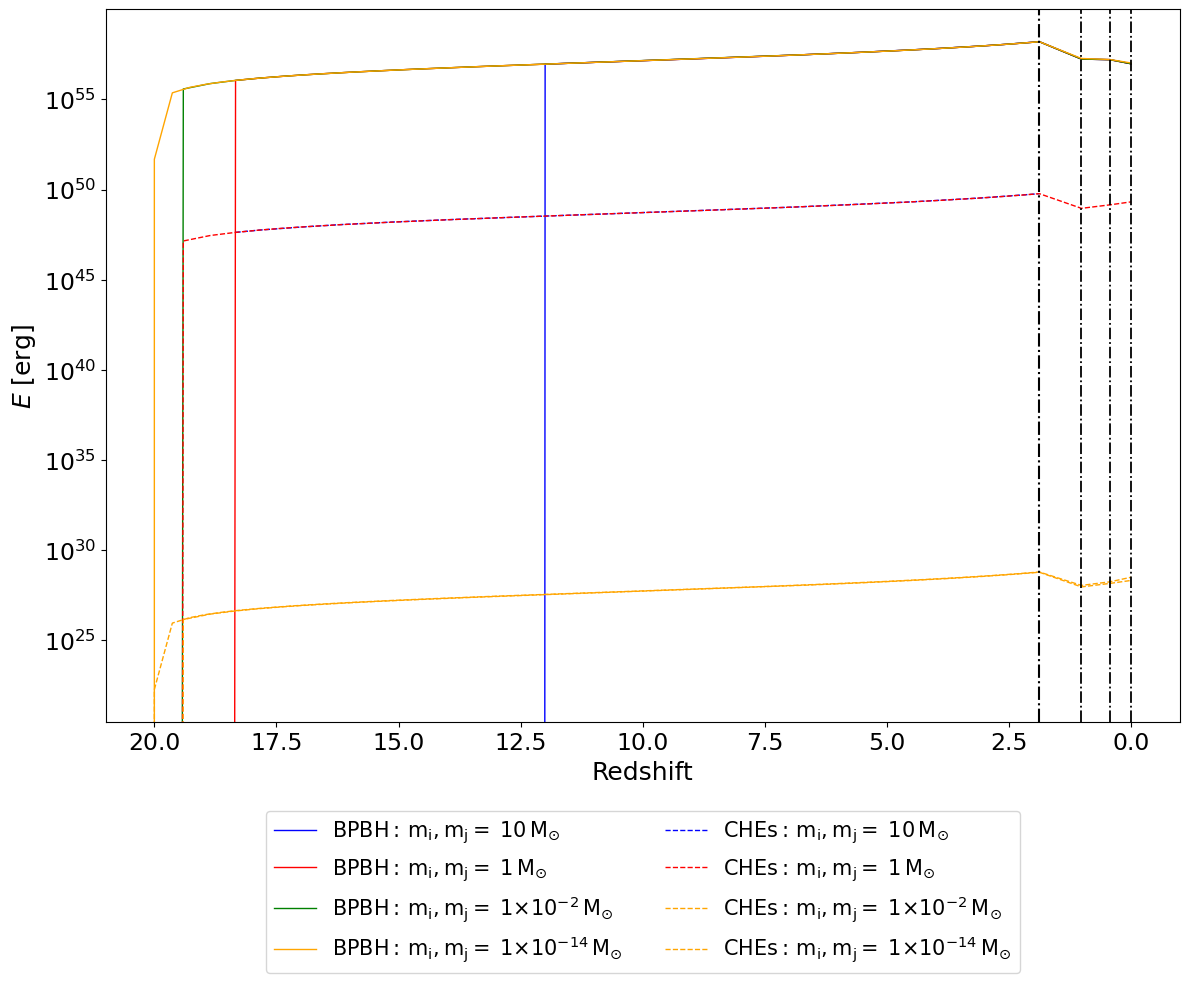

In [56]:
plt.figure(figsize=(12, 10))

plt.plot(z_plot, E_tot_10M_BPBH, linestyle='-', linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$', color='blue')

plt.plot(z_plot_1M, E_tot_1M_BPBH, linestyle='-', linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$', color='red')
plt.plot(z_plot_1e2M, E_tot_1e2M_BPBH, linestyle='-',linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$', color='green')
plt.plot(z_plot_1e14M, E_tot_1e14M_BPBH, linestyle='-',linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$', color='orange')

#plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*', label=r'${\rm CHEs:  \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot, E_tot_10M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='-',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle=':',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


plt.plot(redshift_evaluated_0[4:], E_dot_CHES_0[4:], linestyle='--', linewidth=1,  color='blue',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='--', linewidth=1,  color='red',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='--',linewidth=1,  color='orange',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle='--',linewidth=1,  color='orange',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.5)
    else:
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
#plt.xlim([2.0,0.0])
#plt.ylim([1e20, 1e60])
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
           
           # --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='upper center',
    bbox_to_anchor=(0.5, -.11),  # ajusta altura de la leyenda
    ncol=2
)

#plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all.png')
plt.show()

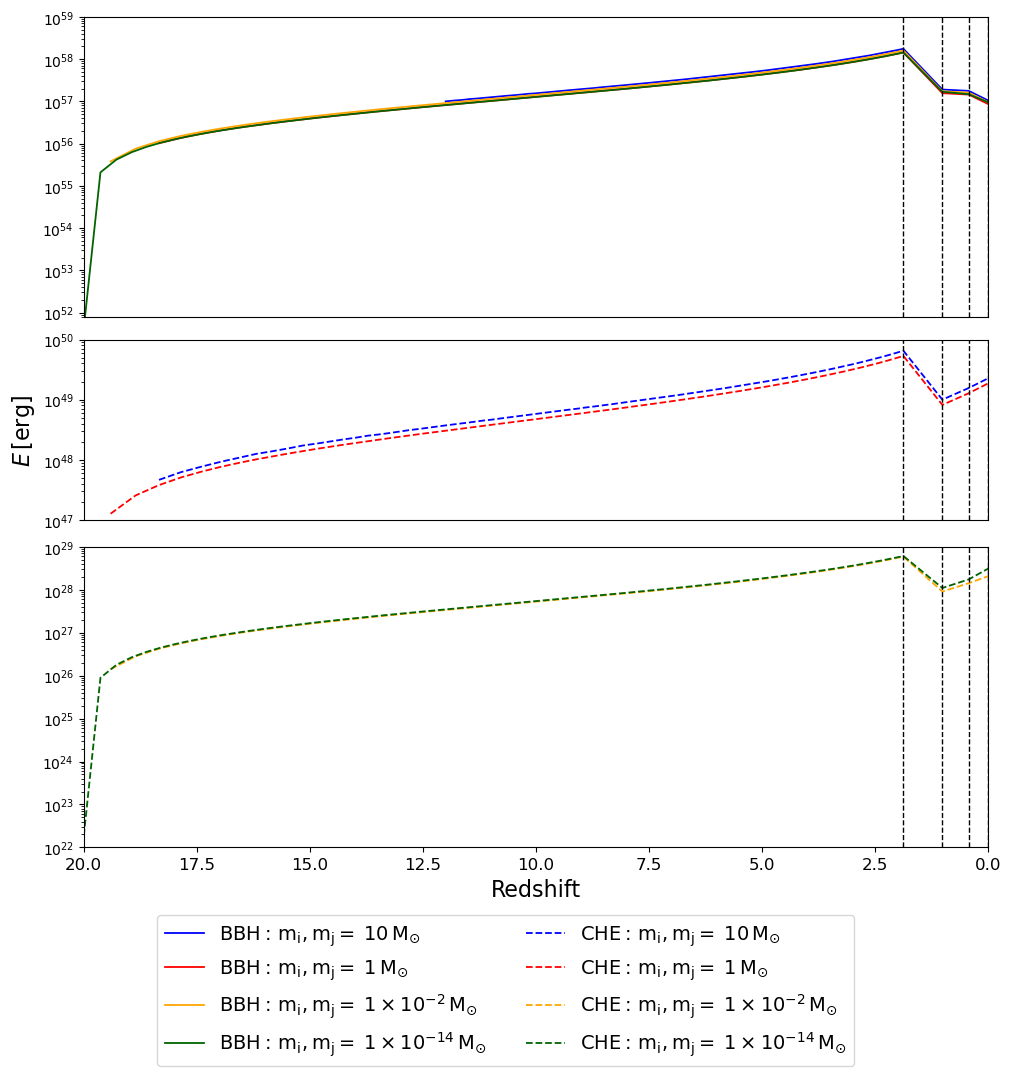

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 9), constrained_layout=True)
gs = gridspec.GridSpec(3, 1, figure=fig, height_ratios=[1, 0.6, 1], hspace=0.001)

# --- Panel superior (parte alta del rango) ---
ax1 = plt.subplot(gs[0])
ax1.set_ylim(7.7e51, 1e59)
ax1.set_yscale('log')

# --- Panel intermedio (zoom en CHEs) ---
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.set_ylim(1e47, 1e50)
ax2.set_yscale('log')

# --- Panel inferior (parte baja del rango) ---
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.set_ylim(1e22, 1e29)
ax3.set_yscale('log')
ax3.set_xlim([20.0, 0.0])  # invertir de 20 → 0

# --- Ocultar ticks del eje X en panel superior e intermedio ---
for ax in [ax1, ax2]:
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.tick_params(axis="x", which="both", bottom=False, top=False)

# --- Panel superior e inferior: BPBH + CHEs ---
for ax in [ax1, ax3]:
    # BPBH
    ax.plot(z_plot[25:], 1.1*E_tot_10M_BPBH[25:], '-', linewidth=1.3, color='blue',
            label=r'${\rm BBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1M[4:], 0.9*E_tot_1M_BPBH[4:], '-', linewidth=1.3, color='red',
            label=r'${\rm BBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e2M[2:], E_tot_1e2M_BPBH[2:], '-', linewidth=1.3, color='orange',
            label=r'${\rm BBH: \, m_{i}, m_{j} =}\;1\times10^{-2}\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e14M[1:], 0.9*E_tot_1e14M_BPBH[1:], '-', linewidth=1.3, color='darkgreen',
            label=r'${\rm BBH: \, m_{i}, m_{j} =}\;1\times10^{-14}\,{\rm M}_{\odot}$')

    # CHEs
    ax.plot(z_plot[4:], E_tot_10M_CHEs[4:], '--', linewidth=1.3, color='blue',
            label=r'${\rm CHE: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1M[4:], E_tot_1M_CHEs[4:], '--', linewidth=1.3, color='red',
            label=r'${\rm CHE: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e2M[2:], E_tot_1e2M_CHEs[2:], '--', linewidth=1.3, color='orange',
            label=r'${\rm CHE: \, m_{i}, m_{j} =}\;1\times10^{-2}\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e14M[1:], E_tot_1e14M_CHEs[1:], '--', linewidth=1.3, color='darkgreen',
            label=r'${\rm CHE: \, m_{i}, m_{j} =}\;1\times10^{-14}\,{\rm M}_{\odot}$')

    # Líneas verticales
    for i, z in enumerate(Z_PERIOD_tot):
        ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# --- Panel intermedio: solo CHEs ---
ax2.plot(z_plot[4:], 1.1*E_tot_10M_CHEs[4:], '--', linewidth=1.3, color='blue',
         label=r'${\rm CHE: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
ax2.plot(z_plot_1M[2:], 0.9*E_tot_1M_CHEs[2:], '--', linewidth=1.3, color='red',
         label=r'${\rm CHE: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
for i, z in enumerate(Z_PERIOD_tot):
    ax2.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# Etiquetas
ax3.set_xlabel('Redshift', fontsize=16)
ax2.set_ylabel(r'$E \,[{\rm erg}]$', fontsize=16)
plt.xticks(fontsize=12)

# --- Leyenda global ---
handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, fontsize=14, loc='upper center',
                 bbox_to_anchor=(0.5, -0.001), ncol=2)

plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all_triple_best.pdf',
            bbox_extra_artists=(leg,), bbox_inches='tight')


plt.show()



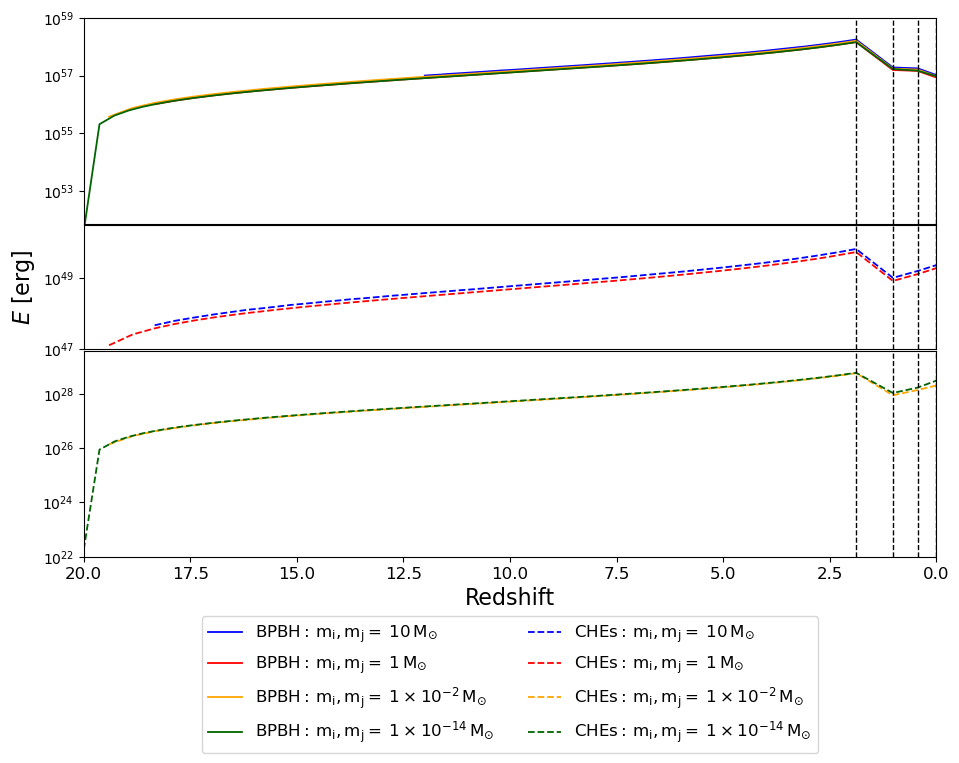

In [58]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11, 7))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.6, 1], hspace=0.01)

# --- Panel superior (parte alta del rango) ---
ax1 = plt.subplot(gs[0])
ax1.set_ylim(7.7e51, 1e59)
ax1.set_yscale('log')

# --- Panel intermedio (zoom en CHEs) ---
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.set_ylim(1e47, 3e50)
ax2.set_yscale('log')

# --- Panel inferior (parte baja del rango) ---
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.set_ylim(1e22, 4e29)
ax3.set_yscale('log')
ax3.set_xlim([20.0, 0.0])  # invertir de 2 → 0

# --- Ocultar ticks del eje X en panel superior e intermedio ---
for ax in [ax1, ax2]:
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.tick_params(axis="x", which="both", bottom=False, top=False)

# --- Panel superior: graficamos todo ---
for ax in [ax1, ax3]:
    ax.plot(z_plot[25:], 1.1*E_tot_10M_BPBH[25:], '-', linewidth=1.3, color='blue',
            label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1M[4:], 0.9*E_tot_1M_BPBH[4:], '-', linewidth=1.3, color='red',
            label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e2M[2:], E_tot_1e2M_BPBH[2:], '-', linewidth=1.3, color='orange',
            label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\times10^{-2}\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e14M[1:], 0.9*E_tot_1e14M_BPBH[1:], '-', linewidth=1.3, color='darkgreen',
            label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\times10^{-14}\,{\rm M}_{\odot}$')

    ax.plot(z_plot[4:], E_tot_10M_CHEs[4:], '--', linewidth=1.3, color='blue',
            label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1M[4:], E_tot_1M_CHEs[4:], '--', linewidth=1.3, color='red',
            label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e2M[2:], E_tot_1e2M_CHEs[2:], '--', linewidth=1.3, color='orange',
            label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\times10^{-2}\,{\rm M}_{\odot}$')
    ax.plot(z_plot_1e14M[1:], E_tot_1e14M_CHEs[1:], '--', linewidth=1.3, color='darkgreen',
            label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\times10^{-14}\,{\rm M}_{\odot}$')
    
    

    for i, z in enumerate(Z_PERIOD_tot):
        ax.axvline(x=z, color='black', linestyle='--', linewidth=1. if i == 0 else 1.)

# --- Panel intermedio: solo CHEs ---
ax2.plot(z_plot[4:], 1.1*E_tot_10M_CHEs[4:], '--', linewidth=1.3, color='blue',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')
ax2.plot(z_plot_1M[2:], 0.9*E_tot_1M_CHEs[2:], '--', linewidth=1.3, color='red',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
for i, z in enumerate(Z_PERIOD_tot):
    ax2.axvline(x=z, color='black', linestyle='--', linewidth=1. if i == 0 else 1.)

# Etiquetas
ax3.set_xlabel('Redshift', fontsize=16)
ax2.set_ylabel(r'$E$ [erg]', fontsize=16)

# Leyenda centrada abajo
ax3.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

#plt.tight_layout()
plt.xticks(fontsize=12)
plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all_triple.pdf')
plt.show()


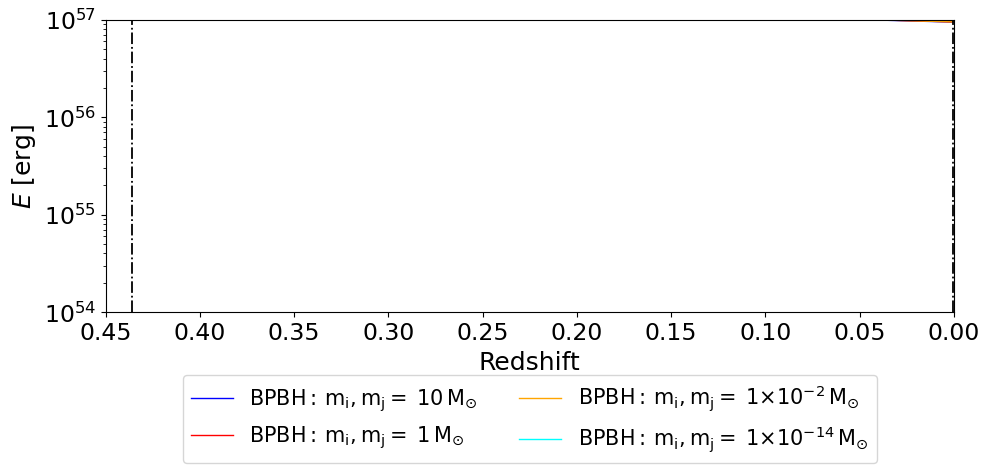

In [59]:
plt.figure(figsize=(10, 5))

plt.plot(z_plot, E_tot_10M_BPBH, linestyle='-', linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$', color='blue')

plt.plot(z_plot_1M, E_tot_1M_BPBH, linestyle='-', linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$', color='red')
plt.plot(z_plot_1e2M, E_tot_1e2M_BPBH, linestyle='-',linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$', color='orange')
plt.plot(z_plot_1e14M, E_tot_1e14M_BPBH, linestyle='-',linewidth=1,
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$', color='cyan')

#plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*', label=r'${\rm CHEs:  \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot, E_tot_10M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='-',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle=':',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


#plt.plot(z_plot, E_tot_10M_CHEs, linestyle='--', linewidth=1,  color='blue',
#         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='--', linewidth=1,  color='red',
#         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='--',linewidth=1,  color='green',
#         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle='--',linewidth=1,  color='orange',
#         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    else:
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.xlim([0.45,0.0])
plt.ylim([1e54, 10e56])
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
           
           # --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='upper center',
    bbox_to_anchor=(0.5, -.18),  # ajusta altura de la leyenda
    ncol=2
)

#plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all_a.png')
plt.show()

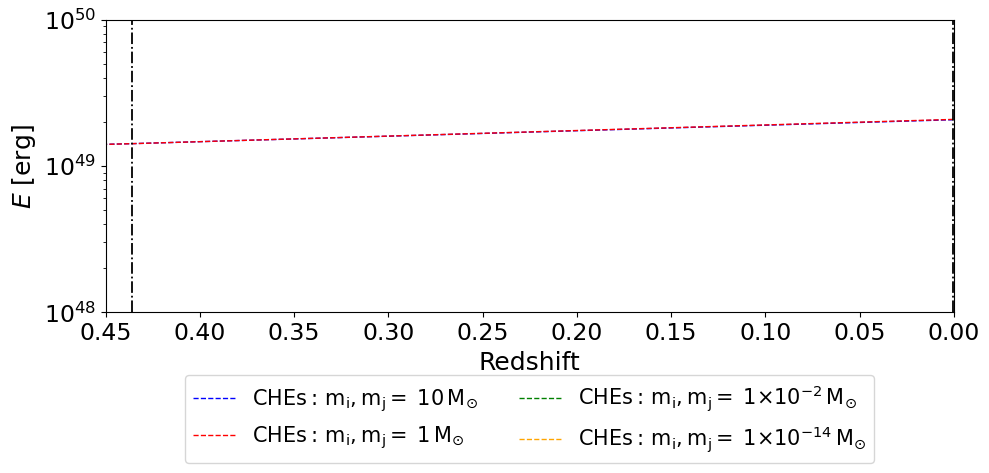

In [60]:
plt.figure(figsize=(10, 5))

#plt.plot(z_plot, E_tot_10M_BPBH, linestyle='-', linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$', color='blue')

#plt.plot(z_plot_1M, E_tot_1M_BPBH, linestyle='-', linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$', color='red')
#plt.plot(z_plot_1e2M, E_tot_1e2M_BPBH, linestyle='-',linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$', color='orange')
#plt.plot(z_plot_1e14M, E_tot_1e14M_BPBH, linestyle='-',linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$', color='cyan')

#plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*', label=r'${\rm CHEs:  \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot, E_tot_10M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='-',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle=':',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


plt.plot(z_plot, E_tot_10M_CHEs, linestyle='--', linewidth=1,  color='blue',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='--', linewidth=1,  color='red',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='--',linewidth=1,  color='green',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle='--',linewidth=1,  color='orange',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    else:
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.xlim([.45,0.0])
plt.ylim([1e48, 1e50])
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
           
           # --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='upper center',
    bbox_to_anchor=(0.5, -.18),  # ajusta altura de la leyenda
    ncol=2
)

#plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all_b.png')
plt.show()

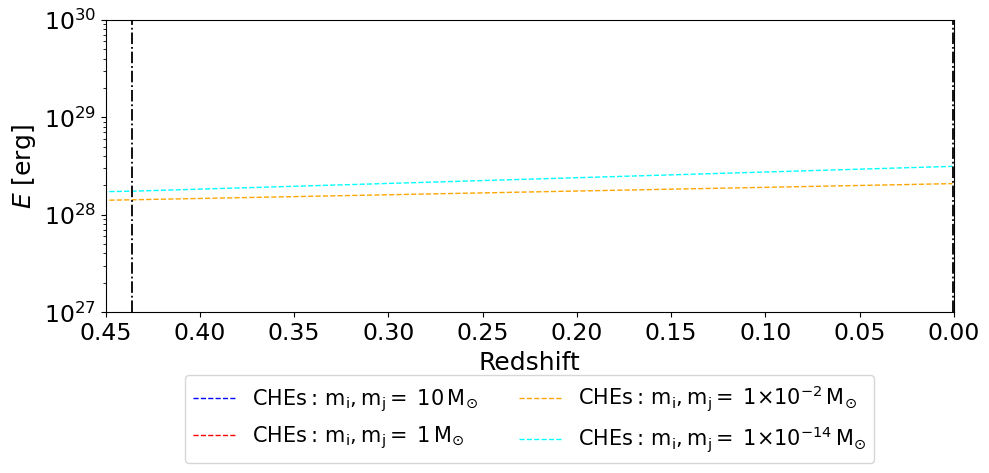

In [61]:
plt.figure(figsize=(10, 5))

#plt.plot(z_plot, E_tot_10M_BPBH, linestyle='-', linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$', color='blue')

#plt.plot(z_plot_1M, E_tot_1M_BPBH, linestyle='-', linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$', color='red')
#plt.plot(z_plot_1e2M, E_tot_1e2M_BPBH, linestyle='-',linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$', color='orange')
#plt.plot(z_plot_1e14M, E_tot_1e14M_BPBH, linestyle='-',linewidth=1,
#         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$', color='cyan')

#plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*', label=r'${\rm CHEs:  \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot, E_tot_10M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

#plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='-', linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='-',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle=':',linewidth=2,
#         label=r'${\rm CHES: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


plt.plot(z_plot, E_tot_10M_CHEs, linestyle='--', linewidth=1,  color='blue',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;10\,{\rm M}_{\odot}$')

plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='--', linewidth=1,  color='red',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='--',linewidth=1,  color='orange',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-2}}\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle='--',linewidth=1,  color='cyan',
         label=r'${\rm CHEs: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    else:
        plt.axvline(x=z, color='black', linestyle='-.', linewidth=1.3)
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.xlim([.45,0.0])
plt.ylim([1e27, 1e30])
plt.yscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
           
           # --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='upper center',
    bbox_to_anchor=(0.5, -.18),  # ajusta altura de la leyenda
    ncol=2
)

#plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_Masses_with_periods_all_c.png')
plt.show()

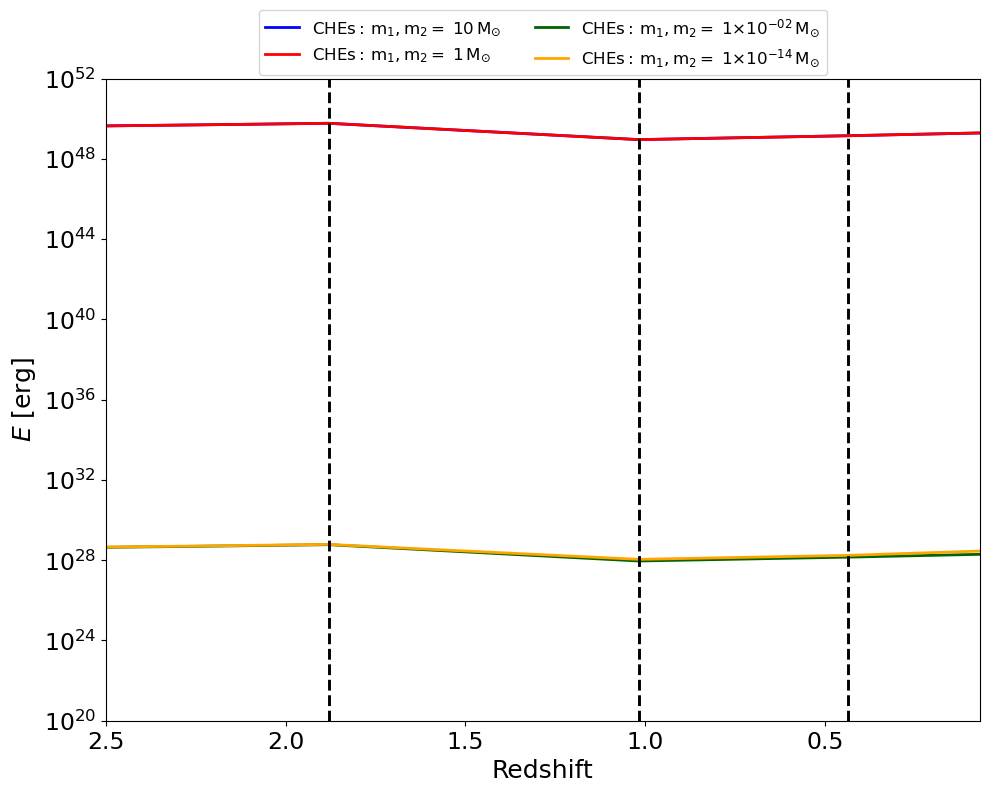

In [62]:
plt.figure(figsize=(10, 8))


plt.plot(z_plot, E_tot_10M_CHEs, linestyle='-', linewidth=2,  color='blue',
         label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')

plt.plot(z_plot_1M, E_tot_1M_CHEs, linestyle='-', linewidth=2,  color='red',
         label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e2M, E_tot_1e2M_CHEs, linestyle='-',linewidth=2,  color='darkgreen',
         label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e14M, E_tot_1e14M_CHEs, linestyle='-',linewidth=2,  color='orange',
         label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=2.1)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=2.1)
        
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.xlim([2.5,0.07])
plt.ylim([1e20,1e52])
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
# --- Leyenda centrada arriba ---
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),  # ajusta altura de la leyenda
    ncol=2
)

# --- Guardado ev
plt.tight_layout()
plt.savefig('Updates/W_power_vs_redshift_CHES_with_periods.pdf')
plt.show()

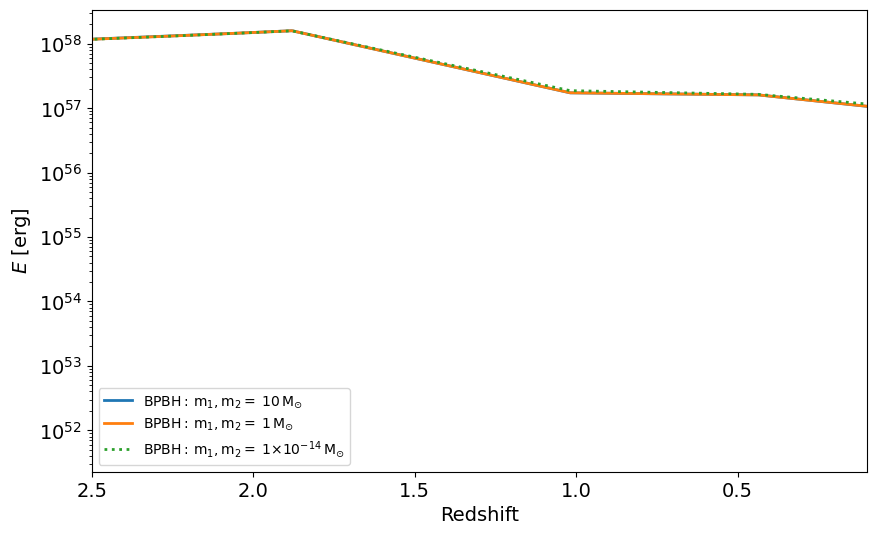

In [63]:
plt.figure(figsize=(10, 6))

plt.plot(z_plot, E_tot_10M_BPBH, linestyle='-', linewidth=2,
         label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;10\,{\rm M}_{\odot}$')
plt.plot(z_plot_1M, E_tot_1M_BPBH, linestyle='-', linewidth=2,
         label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;1\,{\rm M}_{\odot}$')
#plt.plot(z_plot_1e2M, E_tot_1e2M_BPBH, linestyle='-',linewidth=2,
#         label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;1{\times10^{-02}}\,{\rm M}_{\odot}$')
plt.plot(z_plot_1e14M, E_tot_1e14M_BPBH, linestyle=':',linewidth=2,
         label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
#for i, z in enumerate(Z_PERIOD_tot):
#    if i == 0:  # solo la primera con leyenda
#        plt.axvline(x=z+(9e-3), color='black', linestyle='--',
#                    label="Epochs")
#    else:
#        plt.axvline(x=z+(9e-3), color='black', linestyle='--')
    
plt.gca().invert_xaxis()
plt.xlabel('Redshift', fontsize=14)
plt.ylabel(r'$E$ [erg]', fontsize=14)
plt.xlim([2.5,0.1])
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()#(fontsize=15)
#plt.savefig('GW_power_vs_redshift_Masses_with_periods_A.pdf')
plt.show()

In [64]:
import matplotlib.pyplot as plt
import numpy as np

#%%

#Now going to define constants
yr = 365*24*60*60 #in seconds
H0 = 100*0.67*10**(3)/(3.086*10**(22)) #1/seconds
pi = np.pi
c = 3e8
fetstar = 10**(-2)
fi = 0.4*10**(-3)

# For the LISA mission they have designed the
# arms to be length L = 2.5*10^(6)
T = 3*yr
snr5 = 5
#L = 2.5e9
L = 25/3 #units?


fLisa = 1/(2*pi*L)
ffmin = 10**(-5)
ffmax = 445
elmin = np.log10(ffmin)
elmax = np.log10(ffmax)

###############
#Change this value for how many 'steps' you want in the range of values

itera = 2000

##########

elminL = (np.log10(ffmin))
elmaxL = (np.log10(10**(-0.9)))
elminet = np.log10(1.6)
elmaxet = (np.log10(ffmax))
ntmin = -9/2
ntmax = 9/2
step = (ntmax-ntmin)/itera


def sigp(f):
    f0 = 1
    t1 = ((9*((f/f0)**(-30))) + (5.5e-6*((f/f0)**(-4.5))) +(0.28e-11*((f/f0)**3.2)))*(0.5-0.5*(np.tanh(0.06*((f/f0)-42))))
    t2 = ((1e-13*((f/f0)**(1.9))) + (20e-13*((f/f0)**(2.8))))*0.5*(np.tanh(0.06*((f/f0)-42)))
    t3 = 1-(0.475*np.exp(-(((f/f0)-25)**2)/50))
    t4 = 1-(5e-4*np.exp(-(((f/f0)-20)**2)/100))
    t5 = 1-(0.2*np.exp(-((((f/f0)-47)**2)**0.85)/100))
    t6 = 1-(0.12*np.exp(-((((f/f0)-50)**2)**0.7)/100))-(0.2*np.exp(-(((f/f0)-45)**2)/250))+(0.15*np.exp(-(((f/f0)-85)**2)/400))
    res = 0.88*(t1+t2)*t3*t4*t5*t6
    return 0.816**2 * res



def etnomonly(f):
    res = sigp(f)
    if res > 10**(-5):
        return
    return res

#%%
fvalsET = np.logspace(0, 3,2000)#frequency values
sigETvals = np.array(list(map(etnomonly, fvalsET)))#The Omega_gw values from the ET data


#Plots both curves overlayed each other

P = 15
A = 3

def P_acc(f):
    res = A**2 *(1e-15)**2 * (1+(0.4e-3 / f)**2)*(1+(f/8e-3)**4)*1/(2*pi*f)**(4)*(2*pi*f/c)**2
    return res

def P_ims(f):
    res = P**2 * (1e-12)**2 *(1+(2e-3/f)**4)*(2*pi*f/c)**2
    return res



def N_xx(f):
    con = 2*pi*f*L
    res = 16 * (np.sin(con))**2 * ((3+np.cos(2*con))*P_acc(f)+P_ims(f))
    return res

def R_XX(f):#this is Rxx
    res = 16*(np.sin(2*pi*f*L))**2  * (2*pi*f*L)**2 * 3/10 * 1/(1+0.6*(2*pi*f*L)**2)
    return res

def S_n(f):
    res = 1/np.sqrt(2)*N_xx(f)/R_XX(f)
    return res

def Ohms(f):
    const = 4*pi**2/(3*H0**2)
    res = const*f**3*S_n(f)
    return res


# For LIGO:

def LIGO_Ohms(f):
    f_ref = 1*yr
    beta = 2/3
    A_alpha = 1e-14
    Omega_beta = ( (2 * pi**2 )/(3 * H0**2) ) * ( (f_ref**2) * (A_alpha**2) )
    Omega_LIGO = Omega_beta * (f/f_ref)**(beta)
    return Omega_LIGO

fvalsLIGO = np.logspace(0, 5,2000)#frequency values
Omega_LIGO = np.array(list(map(LIGO_Ohms, fvalsLIGO)))#The Omega_gw values from the ET data


# ----------------- CHEs -------------------
freqs = np.logspace(-12, 3,1000)#frequency values
freqs_ETJ = np.logspace(-12, 3,1000)#frequency values

def Omega_CHEs(f):
    h70 = 0.7
    Om_M = 0.3
    Om_DM = 0.25
    delta_loc = 1e8
    year = 3.154e7 #s
    G =  39.478 * year**(-2) # Au^3 * M_sun * s^-2 #4.300917270038e-6 # Kpc Km^2 / M_sun s^2 #6.6743e-11 #m^3 / (kg s^2) # 1e-14
    m1 = 300 #100 # Solar mass
    m2 = 300 #100 # Solar Mass
    v0 = 0.103 * (6.68459e-9) # km/s to AU/s
    a = G * (m1 + m2) / v0**2
    #a = 5e7 # In AU
    y = 1e-5 #np.sqrt(e**2 -1)
    const = 9.81e-13 * h70 * ((Om_M/0.3)**(-0.5) ) * ( (Om_DM/0.25)**2) * (delta_loc/1e8) *(a/0.1) *(y/0.01) * (m1/100)*(m2/100)
    nu0 = np.sqrt( (a**3) / (G*(m1 + m2)) )
    x0 = 2*pi *nu0 * f 
    xi = y - np.arctan(y) #(y**3)/3 #
    exp_term = np.exp(- 2*x0*xi)
    I_curl = (1 - y**2 + (4* y**4)  + (3/2)*( x0* y**6 /xi)) / ((1+ y**2)**2 )
    Omega_CHES = const*( (f/10)**2 ) * exp_term * I_curl
    return Omega_CHES


def Omega_CHEs_ETJ(f,m1,m2,V0, N_PBH):
    h70 = 0.7
    Om_M = 0.3
    Om_DM = 0.25
    m_PBH = m1 * (1.989e30) # Solar masses to Kg
    R_c = 1.1 * 3.086e16 # Pc to m
    n_m = (3/4*pi) * N_PBH * (1/R_c)**3 # number density of PBHS in m^-3
    rho_c = 9e-27 # Kg/m^3
    delta_loc2 = n_m * m_PBH / (Om_DM*rho_c)
    year = 3.154e7 #s
    G =  39.478 * year**(-2) # Au^3 * M_sun * s^-2 #4.300917270038e-6 # Kpc Km^2 / M_sun s^2 #6.6743e-11 #m^3 / (kg s^2) # 1e-14
    #m1 = 10 #100 # Solar mass
    #m2 = 10 #100 # Solar Mass 
    v0 = V0 * 6.68459e-9 # km/s to AU/s
    a = G * (m1 + m2) / v0**2 # Should be in AU
    e = 1.000001#1.01
    y = np.sqrt(e**2 -1)
    const = 9.81e-13 * h70 * ((Om_M/0.3)**(-0.5) ) * ( (Om_DM/0.25)**2) * (delta_loc2/1e8) *(a/0.1) *(y/0.01) * (m1/100)*(m2/100)
    nu0 = np.sqrt( (a**3) / (G*(m1 + m2)) )
    x0 = 2*pi *nu0 * f 
    xi = y - np.arctan(y) #(y**3)/3 #
    exp_term = np.exp(- 2*x0*xi)
    I_curl = (1 - y**2 + (4* y**4)  + (3/2)*( x0* y**6 /xi)) / ((1+ y**2)**2 )
    Omega_CHES_ETJ = const* ( (f/10)**2 ) * exp_term * I_curl
    return Omega_CHES_ETJ

def Omega_BBH_SGWB(f,m1,m2,V0):
    h70 = 0.7
    Om_DM = 0.25
    delta_loc2 =1e8 # n_m * m_PBH / (Om_DM*rho_c)
    z = 20
    f_max = 1.9e-6 * (1/(1+z)) * (1e10/m1) # Valid only for equal-mass spinless binaries
    const = 2.39e-13 * h70 * ( (Om_DM/0.25)**2 ) * (delta_loc2/1e8) * ( (V0/10)**(-11/7) )
    Mass_integral = ((m1 + m2)**(23/21) )*( (m1*m2)**(2/7) )
    #if f<f_max:
    #    Omega_BBHs = const* Mass_integral * ( f**(2/3) ) 
    #else:
    Omega_BBHs = const* Mass_integral * ( (f/f_max)**(2/3) )* np.exp(- (f - f_max) / (0.6 * f_max))
    return Omega_BBHs

def Omega_BBH_SGWB_ETJ(f,m1,m2,V0, N_PBH):
    h70 = 0.7
    Om_DM = 0.25
    m_PBH = m1 * (1.989e30) # Solar masses to Kg
    #N_PBH = 1e4
    n_m = (3/4*pi) * N_PBH * (1/3.086e16)**3 # number density of PBHS in m^-3
    rho_c = 9e-27 # Kg/m^3
    delta_loc2 = n_m * m_PBH / (Om_DM*rho_c)
    z = 0.6
    f_max = 1.9e-6 * (1/(1+z)) * (1e10/m1) # Valid only for equal-mass spinless binaries
    const = 2.39e-13 * h70 * ( (Om_DM/0.25)**2 ) * (delta_loc2/1e8) * ( (V0/10)**(-11/7) )
    Mass_integral = ((m1 + m2)**(23/21) )*( (m1*m2)**(2/7) )
    #if f<f_max:
    #    Omega_BBHs = const* Mass_integral * ( f**(2/3) ) 
    #else:
    Omega_BBHs = const* Mass_integral * ( (f/f_max)**(2/3) )* np.exp(- (f - f_max) / (0.6 * f_max))
    return Omega_BBHs


sigvals_CHEs = np.array(list(map(Omega_CHEs, freqs)))

m1 = 10 #100 # Solar mass
m2 = 10 #100 # Solar Mass 
V0 = 50
#f = lambda q: Omega_CHEs_ETJ(q,m1,m2,V0)
#OmegasCHEs_ET = vmap(f)(freqs_ETJ)

z = 1
f_max = 1.9e-6 * (1/(1+z)) * (1e10/m1)
print('fmax: ',f_max)


test1 = lambda f: Omega_CHEs_ETJ(f,10,10,13, 1e4)
sigvals_CHEs_ETJ_1 = np.array(list(map(test1, freqs_ETJ)))

#sigvals_CHEs_ETJ = np.array(list(map(Omega_CHEs_ETJ, freqs_ETJ,10,10,50)))

Om_DM = 0.25
m_PBH = (10) * (1.989e30) # Solar masses to Kg
n_m = (3/4*pi) * 1e4 * (1/3.086e16)**3
rho_c = 1e-26 # Kg/m^3
delta_loc2 = round(n_m * m_PBH / (Om_DM*rho_c))
print(delta_loc2)


# ==========================================

# ---------- LISA -----------------
freqvals = np.logspace(elminL, elmaxL, itera)   
sigvalsLISA = np.array(list(map(Ohms, freqvals)))
# og = np.array(list(map(sigtab, freqvals)))


# plt.figure(figsize=(6,9)) 
#plt.figure(figsize=(9,6)) 
#plt.loglog(fvalsET, sigETvals, '-',label = "ET", linewidth = 2.5,color = "cornflowerblue" )
#plt.loglog(freqvals, sigvalsLISA, color = "orchid", label = r"LISA", linewidth=2.5)
#plt.loglog(fvalsLIGO, Omega_LIGO, color = "lightblue", label = r"LIGO", linewidth=1.5)


#plt.loglog(freqs, sigvals_CHEs,'--', color = "darkviolet", label = r"Garcia-Bellido", linewidth=2.5)
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_1,'-.', color = "skyblue", label = r"This work", linewidth=2.5)

#plt.grid(True)

#plt.ylim(1e-25,1e-6)
#plt.xlim(1e-9,1.5e3)
#plt.legend(fontsize = 16, loc = 2)
#plt.ylabel(r"$\Omega_{gw}$", fontsize = 20)
#plt.tick_params(axis='both', which='major', labelsize=14) 
#plt.xlabel(r"$f$ (Hz)", fontsize = 20)
#plt.title("SGWB spectrum ", fontsize = 16)
#plt.savefig('CHEs_LISA-ET.png', bbox_inches='tight')
#plt.show()

# ================ Icluding PTA and SKA ======================

# From PhysRevLett.126.041305
fyr = 1/(365*24*60*60)

def platomeg(A, gamma, f):
    res = 2*np.pi**2/(3*H0**2)*fyr**2*A**2*(f/fyr)**(5-gamma)
    return res

fplats = np.logspace(-12,3,1000)
test1 = lambda f: platomeg(9.25e-16,5.13,f)
po1 = np.array(list(map(test1, fplats)))
#%%

h2 = 0.68**2
IPTA = np.loadtxt("strain_IPTA.dat", skiprows=10)
freqipta = 10**IPTA[:,0]
omegipta = 10**IPTA[:,1]/h2**2

ix1, ix2 = freqipta[0], freqipta[-1]
iy1, iy2 = omegipta[0], omegipta[-1]


# arxiv 2002.04615
SKA = np.loadtxt("strain_SKA.dat", skiprows=10)
freqska = 10**SKA[:,0]
omegska = 10**SKA[:,1]

x1, x2 = freqska[0], freqska[-1]
y1, y2 = omegska[0], omegska[-1]


# ================ NANOGrav sensitivity curves ===========================

PTA = np.loadtxt("sensitivity_curves_NG15yr_fullPTA.txt",delimiter=',', skiprows=1)
freqs = PTA[:, 0]
h_c = PTA[:, 1] # characteristic strain
S_eff = PTA[:, 2] #strain power spectral density
Omega_GW = PTA[:, 3] #calculated using H0=67.4 km/s/Mpc = 67.4*1e3/1/3e22 s^-1 to match the paper 



fmax:  950.0
6378493912135


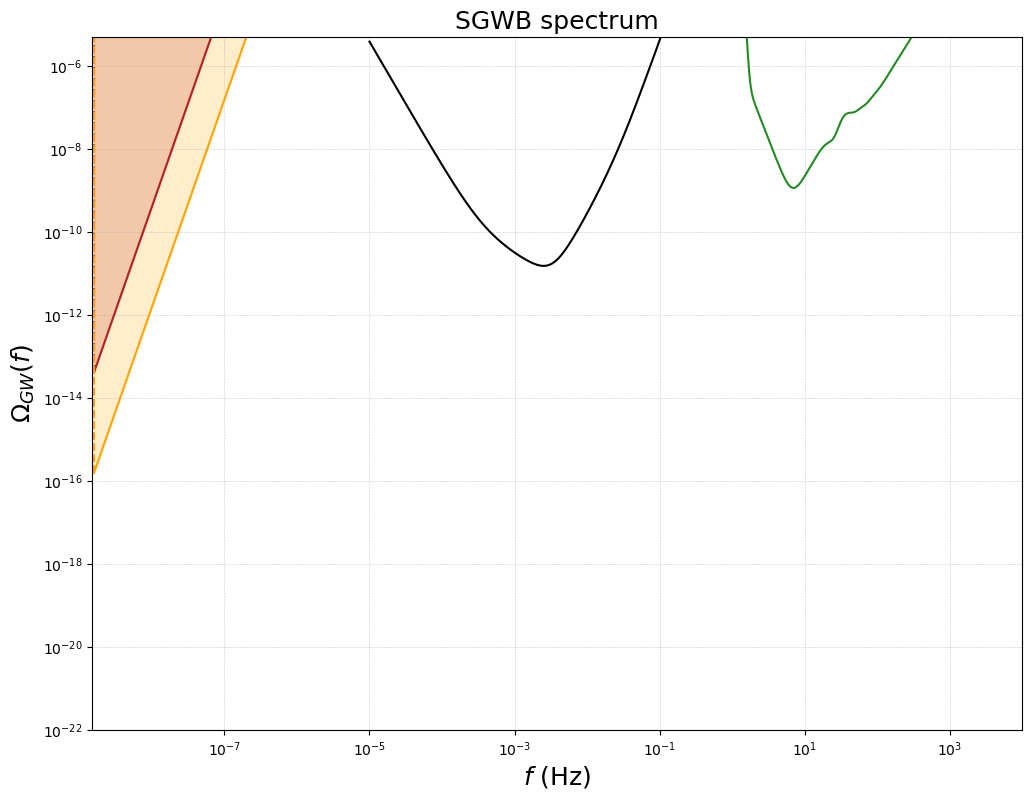

In [65]:
freqs = np.logspace(-9, 6,3000)#frequency values
freqs_ETJ = np.logspace(-10, 5,3000)#frequency values

fvalsLIGO = np.logspace(-9, 5,3000)#frequency values
Omega_LIGO = np.array(list(map(LIGO_Ohms, fvalsLIGO)))#The Omega_gw values from the ET data

plt.figure(figsize=(12,9)) 

# PTA / SKA sensitivity
plt.loglog(freqipta, omegipta, label = r"IPTA", color = "firebrick")
plt.loglog(freqska, omegska, label = r"SKA", color = "orange")

# ET and LISA sensitivity
plt.loglog(fvalsET, sigETvals, '-',label = r"ET", linewidth = 1.5,color = "forestgreen" )
plt.loglog(freqvals, sigvalsLISA, color = "black", label = r"LISA", linewidth=1.5)
# CHE channels
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_1,'--', color = "blue",  label = r"$CHE: (10,10)\,M_{\odot}$", linewidth=1.5)
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_2,'--', color = "gold",  label = r"$CHE: (18,18)\,M_{\odot}$", linewidth=1.5)
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_3,'--', color = "cyan",  label = r"$CHE: (18,27)\,M_{\odot}$", linewidth=1.5)
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_4,'--', color = "gray",  label = r"$CHE: (10,27)\,M_{\odot}$", linewidth=1.5)
#plt.loglog(freqs_ETJ, sigvals_CHEs_ETJ_5,'--', color = "green", label = r"$CHE: (10,18)\,M_{\odot}$", linewidth=1.5)

# PTA/NANOGrav extra shading
plt.vlines(ix1, iy1, iy1 + 2, linestyle='--', color = 'firebrick')
plt.vlines(x1, y1, y1 + 2, linestyle='--', color = 'orange')
plt.fill_between(freqipta, omegipta, y2=max(omegipta), where=(freqipta >= ix1) & (freqipta <= ix2), color='firebrick', alpha=0.2)
plt.fill_between(freqska, omegska, y2=max(omegska), where=(freqska >= x1) & (freqska <= x2), color='orange', alpha=0.2)

# Labels and formatting
plt.ylabel(r"$\Omega_{GW} (f)$", fontsize = 18)
plt.xlabel(r"$f$ (Hz)", fontsize = 18)
plt.title("SGWB spectrum", fontsize = 18)
plt.ylim(1e-22,5e-6)
plt.xlim(1.5e-9,1e4)
plt.grid(True, which='major', linestyle='--', linewidth=0.4, alpha=0.7) 

# Legend (instead of labellines)
#plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
plt.show()